### Essential Libraries
Import the essential Python libraries.

NumPy : Library for Numeric Computations in Python

Pandas : Library for Data Acquisition and Preparation

Matplotlib : Low-level library for Data Visualization

Seaborn : Higher-level library for Data Visualization

In [27]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


import re
import plotly.figure_factory as ff
import plotly.express as px

In [28]:
df = pd.read_csv('steam_cleaned.csv')
df

Unnamed: 0    appid                        name  \
0               0       10              Counter-Strike   
1               1       20       Team Fortress Classic   
2               2       30               Day of Defeat   
3               3       40          Deathmatch Classic   
4               4       50   Half-Life: Opposing Force   
...           ...      ...                         ...   
26559       27070  1065230             Room of Pandora   
26560       27071  1065570                   Cyber Gun   
26561       27072  1065650            Super Star Blast   
26562       27073  1066700  New Yankee 7: Deer Hunters   
26563       27074  1069460                   Rune Lord   

                       genres  achievements  positive_ratings  \
0                      Action             0            124534   
1                      Action             0              3318   
2                      Action             0              3416   
3                      Action             0              1273   
4                      Action             0              5250   
...                       ...           ...               ...   
26559  Adventure;Casual;Indie             7                 3   
26560  Action;Adventure;Indie             0                 8   
26561     Action;Casual;Indie            24                 0   
26562  Adventure;Casual;Indie             0                 2   
26563  Adventure;Casual;Indie             0                 4   

       negative_ratings  average_playtime  median_playtime    owners  ...  \
0                  3339             17612              317  15000000  ...   
1                   633               277               62   7500000  ...   
2                   398               187               34   7500000  ...   
3                   267               258              184   7500000  ...   
4                   288               624              415   7500000  ...   
...                 ...               ...              ...       ...  ...   
26559                 0                 0                0     10000  ...   
26560                 1                 0                0     10000  ...   
26561                 1                 0                0     10000  ...   
26562                 0                 0                0     10000  ...   
26563                 0                 0                0     10000  ...   

       SteamVR Collectibles  Online Co-op  Shared/Split Screen  Local Co-op  \
0                         0             0                    0            0   
1                         0             0                    0            0   
2                         0             0                    0            0   
3                         0             0                    0            0   
4                         0             0                    0            0   
...                     ...           ...                  ...          ...   
26559                     0             0                    0            0   
26560                     0             0                    0            0   
26561                     0             0                    1            0   
26562                     0             0                    0            0   
26563                     0             0                    0            0   

       MMO  VR Support  Mods  Mods (require HL2)  Steam Turn Notifications  \
0        0           0     0                   0                         0   
1        0           0     0                   0                         0   
2        0           0     0                   0                         0   
3        0           0     0                   0                         0   
4        0           0     0                   0                         0   
...    ...         ...   ...                 ...                       ...   
26559    0           0     0                   0                         0   
26560    0           0     0   

Our question is : is single or multiplayer game more popular ?

We are using steamspytag to predict average_playtime.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26564 entries, 0 to 26563
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  26564 non-null  int64  
 1   appid                       26564 non-null  int64  
 2   name                        26564 non-null  object 
 3   genres                      26564 non-null  object 
 4   achievements                26564 non-null  int64  
 5   positive_ratings            26564 non-null  int64  
 6   negative_ratings            26564 non-null  int64  
 7   average_playtime            26564 non-null  int64  
 8   median_playtime             26564 non-null  int64  
 9   owners                      26564 non-null  int64  
 10  price                       26564 non-null  float64
 11  Multi-player                26564 non-null  int64  
 12  Online Multi-Player         26564 non-null  int64  
 13  Local Multi-Player          265

Drop the unnamed first column which was added automatically during export of cleaned data file.

In [30]:
df = df.drop(df.columns[0], axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26564 entries, 0 to 26563
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   appid                       26564 non-null  int64  
 1   name                        26564 non-null  object 
 2   genres                      26564 non-null  object 
 3   achievements                26564 non-null  int64  
 4   positive_ratings            26564 non-null  int64  
 5   negative_ratings            26564 non-null  int64  
 6   average_playtime            26564 non-null  int64  
 7   median_playtime             26564 non-null  int64  
 8   owners                      26564 non-null  int64  
 9   price                       26564 non-null  float64
 10  Multi-player                26564 non-null  int64  
 11  Online Multi-Player         26564 non-null  int64  
 12  Local Multi-Player          26564 non-null  int64  
 13  Valve Anti-Cheat enabled    265

In [32]:
for col in df:
    print(col, ":", df[col].nunique())

appid : 26564
name : 26523
genres : 1528
achievements : 409
positive_ratings : 2789
negative_ratings : 1489
average_playtime : 1337
median_playtime : 1302
owners : 13
price : 278
Multi-player : 2
Online Multi-Player : 2
Local Multi-Player : 2
Valve Anti-Cheat enabled : 2
Single-player : 2
Steam Cloud : 2
Steam Achievements : 2
Steam Trading Cards : 2
Captions available : 2
Partial Controller Support : 2
Includes Source SDK : 2
Cross-Platform Multiplayer : 2
Stats : 2
Commentary available : 2
Includes level editor : 2
Steam Workshop : 2
In-App Purchases : 2
Co-op : 2
Full controller support : 2
Steam Leaderboards : 2
SteamVR Collectibles : 2
Online Co-op : 2
Shared/Split Screen : 2
Local Co-op : 2
MMO : 2
VR Support : 2
Mods : 2
Mods (require HL2) : 2
Steam Turn Notifications : 2
age : 2619


### Categories

In [33]:
category_columns = ['categories_Multi-player', 'categories_Online Multi-Player', 'categories_Local Multi-Player', 'categories_Valve Anti-Cheat enabled',
                        'categories_Single-player', 'categories_Steam Cloud', 'categories_Steam Achievements', 'categories_Steam Trading Cards',
                        'categories_Captions available', 'categories_Partial Controller Support', 'categories_Includes Source SDK',
                        'categories_Cross-Platform Multiplayer', 'categories_Stats', 'categories_Commentary available',
                        'categories_Includes level editor', 'categories_Steam Workshop', 'categories_In-App Purchases',
                        'categories_Co-op', 'categories_Full controller support', 'categories_Steam Leaderboards',
                        'categories_SteamVR Collectibles', 'categories_Online Co-op', 'categories_Shared/Split Screen',
                        'categories_Local Co-op', 'categories_MMO', 'categories_VR Support',
                        'categories_Mods', 'categories_Mods (require HL2)', 'categories_Steam Turn Notifications']

cat_col_names = []

for col in sorted(category_columns):
    col_name = re.sub(r'[\s\-\/]', '_', col.lower())
    col_name = re.sub(r'[()]', '', col_name)
    cat_col_names.append(col_name)

#cat_counts = df[cat_col_names].sum()

In [34]:
eda_df = pd.DataFrame(zip(df['Multi-player'], df['Online Multi-Player'], df['Local Multi-Player'], df['Valve Anti-Cheat enabled'],
                        df['Single-player'], df['Steam Cloud'], df['Steam Achievements'], df['Steam Trading Cards'],
                        df['Captions available'], df['Partial Controller Support'], df['Includes Source SDK'],
                        df['Cross-Platform Multiplayer'], df['Stats'], df['Commentary available'],
                        df['Includes level editor'], df['Steam Workshop'], df['In-App Purchases'],
                        df['Co-op'], df['Full controller support'], df['Steam Leaderboards'],
                        df['SteamVR Collectibles'], df['Online Co-op'], df['Shared/Split Screen'],
                        df['Local Co-op'], df['MMO'], df['VR Support'],
                        df['Mods'], df['Mods (require HL2)'], df['Steam Turn Notifications']
                         ),
                      columns=['Multi-player', 'Online Multi-Player', 'Local Multi-Player', 'Valve Anti-Cheat enabled',
                        'Single-player', 'Steam Cloud', 'Steam Achievements', 'Steam Trading Cards',
                        'Captions available', 'Partial Controller Support', 'Includes Source SDK',
                        'Cross-Platform Multiplayer', 'Stats', 'Commentary available',
                        'Includes level editor', 'Steam Workshop', 'In-App Purchases',
                        'Co-op', 'Full controller support', 'Steam Leaderboards',
                        'SteamVR Collectibles', 'Online Co-op', 'Shared/Split Screen',
                        'Local Co-op', 'MMO', 'VR Support',
                        'Mods', 'Mods (require HL2)', 'Steam Turn Notifications'])

In [35]:
eda_df

Multi-player  Online Multi-Player  Local Multi-Player  \
0                 1                    1                   1   
1                 1                    1                   1   
2                 1                    0                   0   
3                 1                    1                   1   
4                 1                    0                   0   
...             ...                  ...                 ...   
26559             0                    0                   0   
26560             0                    0                   0   
26561             1                    0                   0   
26562             0                    0                   0   
26563             0                    0                   0   

       Valve Anti-Cheat enabled  Single-player  Steam Cloud  \
0                             1              0            0   
1                             1              0            0   
2                             1              0            0   
3                             1              0            0   
4                             1              1            0   
...                         ...            ...          ...   
26559                         0              1            0   
26560                         0              1            0   
26561                         0              1            1   
26562                         0              1            1   
26563                         0              1            1   

       Steam Achievements  Steam Trading Cards  Captions available  \
0                       0                    0                   0   
1                       0                    0                   0   
2                       0                    0                   0   
3                       0                    0                   0   
4                       0                    0                   0   
...                   ...                  ...                 ...   
26559                   1                    0                   0   
26560                   0                    0                   0   
26561                   1                    0                   0   
26562                   0                    0                   0   
26563                   0                    0                   0   

       Partial Controller Support  ...  Steam Leaderboards  \
0                               0  ...                   0   
1                               0  ...                   0   
2                               0  ...                   0   
3                               0  ...                   0   
4                               0  ...                   0   
...                           ...  ...                 ...   
26559                           0  ...                   0   
26560                           0  ...                   0   
26561                           0  ...                   0   
26562                           0  ...                   0   
26563                           0  ...                   0   

       SteamVR Collectibles  Online Co-op  Shared/Split Screen  Local Co-op  \
0                         0             0                    0            0   
1                         0             0                    0            0   
2                         0             0                    0            0   
3                         0             0                    0            0   
4                         0             0                    0            0   
...                     ...           ...                  ...          ...   
26559                     0             0                    0            0   
26560                     0             0                    0            0   
26561                     0             0                    1            0   
26562                     0             0                    0            0   
26563                     

In [36]:
dfCorr = eda_df.corr()
fig = ff.create_annotated_heatmap(
    z=dfCorr.values,
    x=list(dfCorr.columns),
    y=list(dfCorr.index),
    colorscale=px.colors.diverging.RdBu,
    annotation_text=dfCorr.round(2).values,
    showscale=True, reversescale=True)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 8

#plt.rcParams['figure.figsize'] = [100, 30]
fig.show()

We try to analyze the correlation between the categories to see if any relations between them. e don't use categories as a variable because the correlation between them is bad. So we cannot find any way to cluster the categories together.

Instead we will be looking at steamspy tags.

In [37]:
df.head()

appid                       name  genres  achievements  positive_ratings  \
0     10             Counter-Strike  Action             0            124534   
1     20      Team Fortress Classic  Action             0              3318   
2     30              Day of Defeat  Action             0              3416   
3     40         Deathmatch Classic  Action             0              1273   
4     50  Half-Life: Opposing Force  Action             0              5250   

   negative_ratings  average_playtime  median_playtime    owners  price  ...  \
0              3339             17612              317  15000000   7.19  ...   
1               633               277               62   7500000   3.99  ...   
2               398               187               34   7500000   3.99  ...   
3               267               258              184   7500000   3.99  ...   
4               288               624              415   7500000   3.99  ...   

   SteamVR Collectibles  Online Co-op  Shared/Split Screen  Local Co-op  MMO  \
0                     0             0                    0            0    0   
1                     0             0                    0            0    0   
2                     0             0                    0            0    0   
3                     0             0                    0            0    0   
4                     0             0                    0            0    0   

   VR Support  Mods  Mods (require HL2)  Steam Turn Notifications   age  
0           0     0                   0                         0  8461  
1           0     0                   0                         0  9041  
2           0     0                   0                         0  7550  
3           0     0                   0                         0  8249  
4           0     0                   0                         0  8827  

[5 rows x 40 columns]

In [38]:
steamspy = pd.read_csv('steamspy_tag_data.csv')
steamspy

appid  1980s  1990s  2.5d  2d  2d_fighter  360_video  3d  \
0           10    144    564     0   0           0          0   0   
1           20      0     71     0   0           0          0   0   
2           30      0      0     0   0           0          0   0   
3           40      0      0     0   0           0          0   0   
4           50      0     77     0   0           0          0   0   
...        ...    ...    ...   ...  ..         ...        ...  ..   
29017  1065230      0      0     0   0           0          0   0   
29018  1065570      0      0     0   0           0          0   0   
29019  1065650      0      0     0   0           0          0   0   
29020  1066700      0      0     0   0           0          0   0   
29021  1069460      0      0     0   0           0          0   0   

       3d_platformer  3d_vision  ...  warhammer_40k  web_publishing  \
0                  0          0  ...              0               0   
1                  0          0  ...              0               0   
2                  0          0  ...              0               0   
3                  0          0  ...              0               0   
4                  0          0  ...              0               0   
...              ...        ...  ...            ...             ...   
29017              0          0  ...              0               0   
29018             12          0  ...              0               0   
29019              0          0  ...              0               0   
29020              0          0  ...              0               0   
29021              0          0  ...              0               0   

       werewolves  western  word_game  world_war_i  world_war_ii  wrestling  \
0               0        0          0            0             0          0   
1               0        0          0            0             0          0   
2               0        0          0            5           122          0   
3               0        0          0            0             0          0   
4               0        0          0            0             0          0   
...           ...      ...        ...          ...           ...        ...   
29017           0        0          0            0             0          0   
29018           0        0          0            0             0          0   
29019           0        0          0            0             0          0   
29020           0        0          0            0             0          0   
29021           0        0          0            0             0          0   

       zombies  e_sports  
0            0       550  
1            0         0  
2            0         0  
3            0         0  
4            0         0  
...        ...       ...  
29017        0         0  
29018        0         0  
29019        0         0  
29020        0         0  
29021        0         0  

[29022 rows x 372 columns]

The steamspy dataframe has 29022 rows, more than the 26564 rows in the actual dataframe (df). Using the appid as primary key, compare and remove those games not in the actual dataframe.

In [39]:
steamspy = steamspy[steamspy['appid'].isin(df['appid'])]
steamspy

appid  1980s  1990s  2.5d  2d  2d_fighter  360_video  3d  \
0           10    144    564     0   0           0          0   0   
1           20      0     71     0   0           0          0   0   
2           30      0      0     0   0           0          0   0   
3           40      0      0     0   0           0          0   0   
4           50      0     77     0   0           0          0   0   
...        ...    ...    ...   ...  ..         ...        ...  ..   
29017  1065230      0      0     0   0           0          0   0   
29018  1065570      0      0     0   0           0          0   0   
29019  1065650      0      0     0   0           0          0   0   
29020  1066700      0      0     0   0           0          0   0   
29021  1069460      0      0     0   0           0          0   0   

       3d_platformer  3d_vision  ...  warhammer_40k  web_publishing  \
0                  0          0  ...              0               0   
1                  0          0  ...              0               0   
2                  0          0  ...              0               0   
3                  0          0  ...              0               0   
4                  0          0  ...              0               0   
...              ...        ...  ...            ...             ...   
29017              0          0  ...              0               0   
29018             12          0  ...              0               0   
29019              0          0  ...              0               0   
29020              0          0  ...              0               0   
29021              0          0  ...              0               0   

       werewolves  western  word_game  world_war_i  world_war_ii  wrestling  \
0               0        0          0            0             0          0   
1               0        0          0            0             0          0   
2               0        0          0            5           122          0   
3               0        0          0            0             0          0   
4               0        0          0            0             0          0   
...           ...      ...        ...          ...           ...        ...   
29017           0        0          0            0             0          0   
29018           0        0          0            0             0          0   
29019           0        0          0            0             0          0   
29020           0        0          0            0             0          0   
29021           0        0          0            0             0          0   

       zombies  e_sports  
0            0       550  
1            0         0  
2            0         0  
3            0         0  
4            0         0  
...        ...       ...  
29017        0         0  
29018        0         0  
29019        0         0  
29020        0         0  
29021        0         0  

[26564 rows x 372 columns]

Now both dataframes are equal as each has 26564 rows.

In [40]:
# Add price to the dataframe
steamspy = pd.concat([steamspy, df['average_playtime']], axis = 1).reindex(steamspy.index)
steamspy

appid  1980s  1990s  2.5d   2d  2d_fighter  360_video   3d  \
0           10.0  144.0  564.0   0.0  0.0         0.0        0.0  0.0   
1           20.0    0.0   71.0   0.0  0.0         0.0        0.0  0.0   
2           30.0    0.0    0.0   0.0  0.0         0.0        0.0  0.0   
3           40.0    0.0    0.0   0.0  0.0         0.0        0.0  0.0   
4           50.0    0.0   77.0   0.0  0.0         0.0        0.0  0.0   
...          ...    ...    ...   ...  ...         ...        ...  ...   
29017  1065230.0    0.0    0.0   0.0  0.0         0.0        0.0  0.0   
29018  1065570.0    0.0    0.0   0.0  0.0         0.0        0.0  0.0   
29019  1065650.0    0.0    0.0   0.0  0.0         0.0        0.0  0.0   
29020  1066700.0    0.0    0.0   0.0  0.0         0.0        0.0  0.0   
29021  1069460.0    0.0    0.0   0.0  0.0         0.0        0.0  0.0   

       3d_platformer  3d_vision  ...  web_publishing  werewolves  western  \
0                0.0        0.0  ...             0.0         0.0      0.0   
1                0.0        0.0  ...             0.0         0.0      0.0   
2                0.0        0.0  ...             0.0         0.0      0.0   
3                0.0        0.0  ...             0.0         0.0      0.0   
4                0.0        0.0  ...             0.0         0.0      0.0   
...              ...        ...  ...             ...         ...      ...   
29017            0.0        0.0  ...             0.0         0.0      0.0   
29018           12.0        0.0  ...             0.0         0.0      0.0   
29019            0.0        0.0  ...             0.0         0.0      0.0   
29020            0.0        0.0  ...             0.0         0.0      0.0   
29021            0.0        0.0  ...             0.0         0.0      0.0   

       word_game  world_war_i  world_war_ii  wrestling  zombies  e_sports  \
0            0.0          0.0           0.0        0.0      0.0     550.0   
1            0.0          0.0           0.0        0.0      0.0       0.0   
2            0.0          5.0         122.0        0.0      0.0       0.0   
3            0.0          0.0           0.0        0.0      0.0       0.0   
4            0.0          0.0           0.0        0.0      0.0       0.0   
...          ...          ...           ...        ...      ...       ...   
29017        0.0          0.0           0.0        0.0      0.0       0.0   
29018        0.0          0.0           0.0        0.0      0.0       0.0   
29019        0.0          0.0           0.0        0.0      0.0       0.0   
29020        0.0          0.0           0.0        0.0      0.0       0.0   
29021        0.0          0.0           0.0        0.0      0.0       0.0   

       average_playtime  
0               17612.0  
1                 277.0  
2                 187.0  
3                 258.0  
4                 624.0  
...                 ...  
29017               NaN  
29018               NaN  
29019               NaN  
29020               NaN  
29021               NaN  

[26564 rows x 373 columns]

Check the distribution of <s>price</s> <b><u>average playtime</u></b> across the 23 different categories using box-plots. (chanbakjsd)

In [41]:
playtimeDF = steamspy[(steamspy["average_playtime"] > 10000)]

playtimeDF

appid  1980s  1990s  2.5d     2d  2d_fighter  360_video   3d  \
0          10.0  144.0  564.0   0.0    0.0         0.0        0.0  0.0   
22        570.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
25        730.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
121      3570.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
245      8330.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
744     34830.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
1127    70110.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
1477   208630.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
2022   241910.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
2433   260570.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
2489   262790.0    0.0    0.0   0.0    5.0         0.0        0.0  0.0   
2735   271370.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
2793   274170.0  629.0  310.0   0.0  417.0         0.0        0.0  0.0   
2946   281370.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
3148   288270.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
3389   296150.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
3513   300080.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
3798   310740.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
3925   314050.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
4217   322980.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
4508   331980.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
4700   337280.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
4701   337290.0    0.0    0.0  10.0    0.0         0.0        0.0  0.0   
4919   341910.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
5999   367660.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
7006   393200.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
7486   406110.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
7554   407980.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
7627   410050.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
7793   414950.0    0.0    0.0   0.0   15.0         0.0        0.0  0.0   
8771   443980.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
8943   448140.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
9607   464350.0    0.0    0.0   0.0   24.0         0.0        0.0  0.0   
10669  499890.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
11510  520810.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
12136  536920.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
12769  553340.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
12922  556860.0    0.0    0.0   0.0   15.0        11.0        0.0  0.0   
13605  575460.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
13621  575690.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
14252  592020.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
15110  617430.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
16023  649630.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
16061  650750.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   
16289  656260.0    0.0    0.0   0.0    0.0         0.0        0.0  0.0   

       3d_platformer  3d_vision  ...  web_publishing  werewolves  western  \
0                0.0        0.0  ...             0.0         0.0      0.0   
22               0.0        0.0  ...             0.0         0.0      0.0   
25               0.0        0.0  ...             0.0         0.0      0.0   
121              0.0        0.0  ...             0.0         0.0      0.0   
245              0.0        0.0  ...             0.0         0.0      0.0   
744              0.0        0.0  ...             0.0         0.0      0.0   
1127             0.0        0.0  ...             0.0         0.0  

C:\Users\graph\AppData\Local\Temp\ipykernel_19968\2240361365.py:7: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



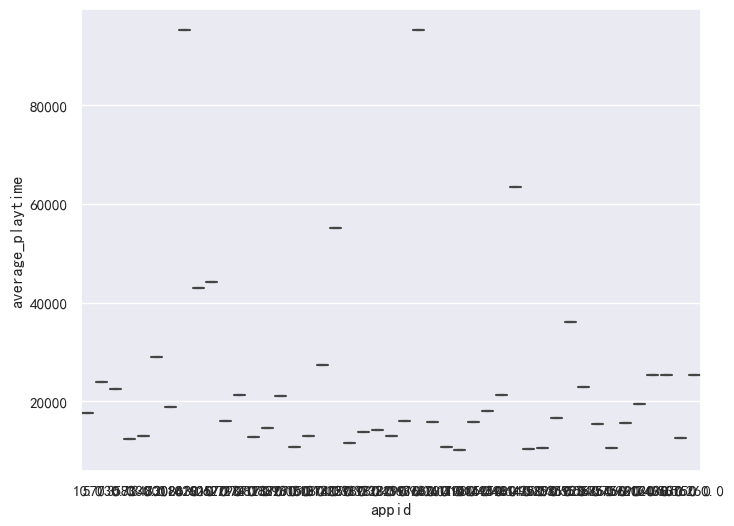

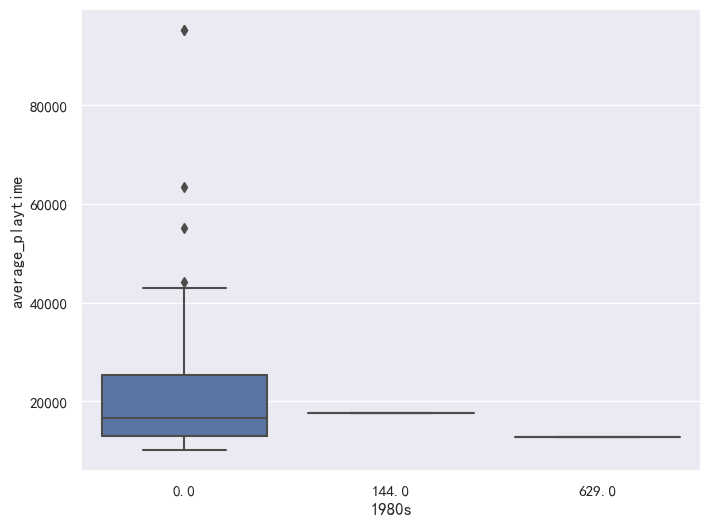

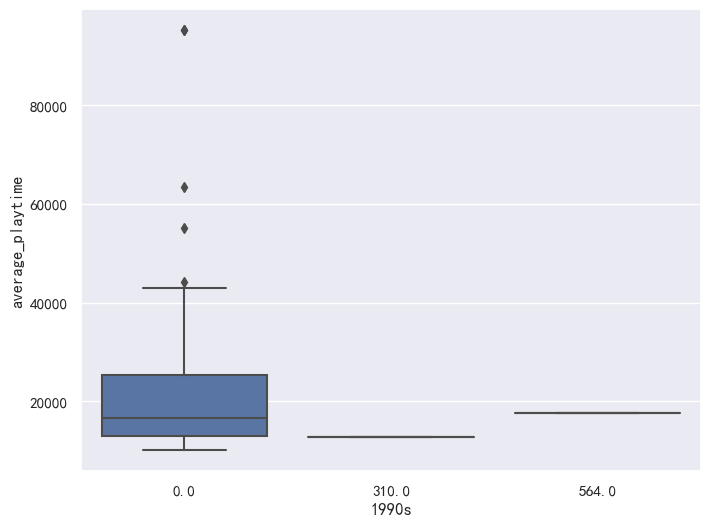

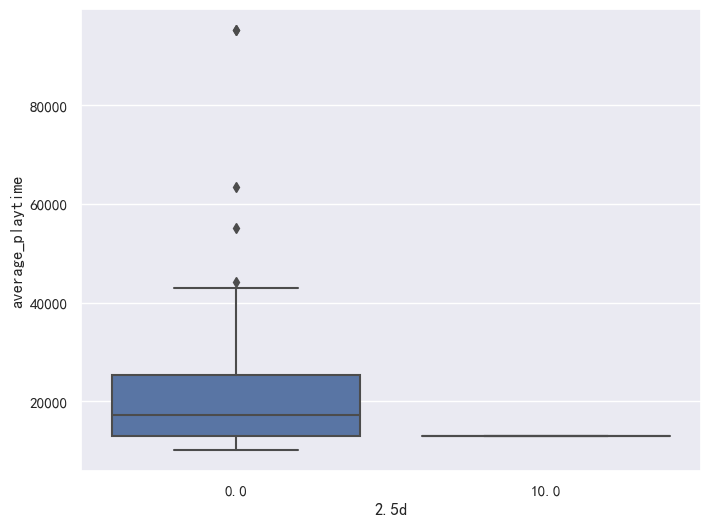

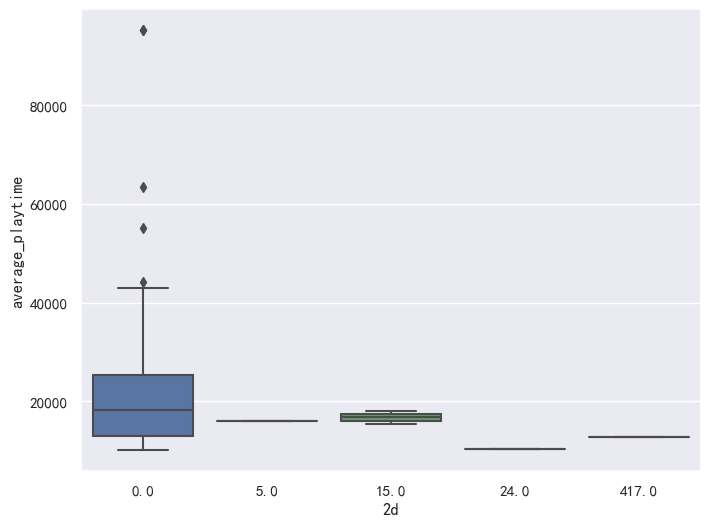

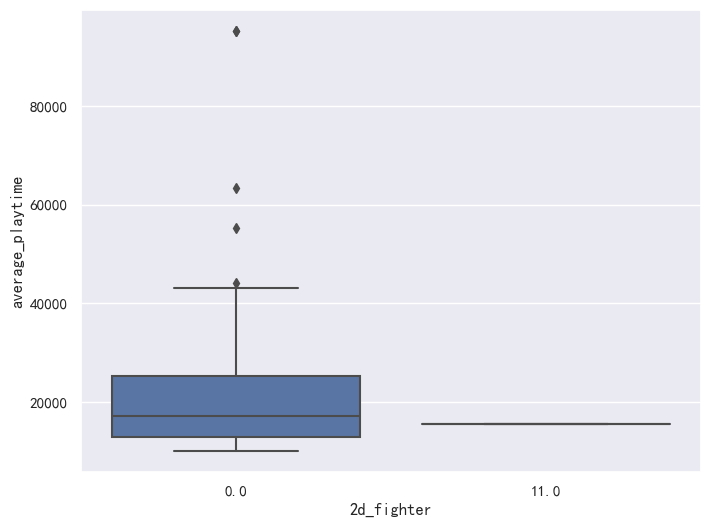

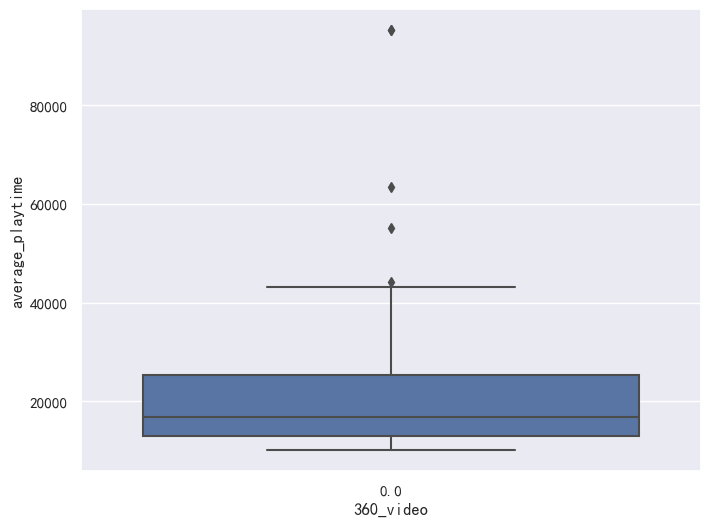

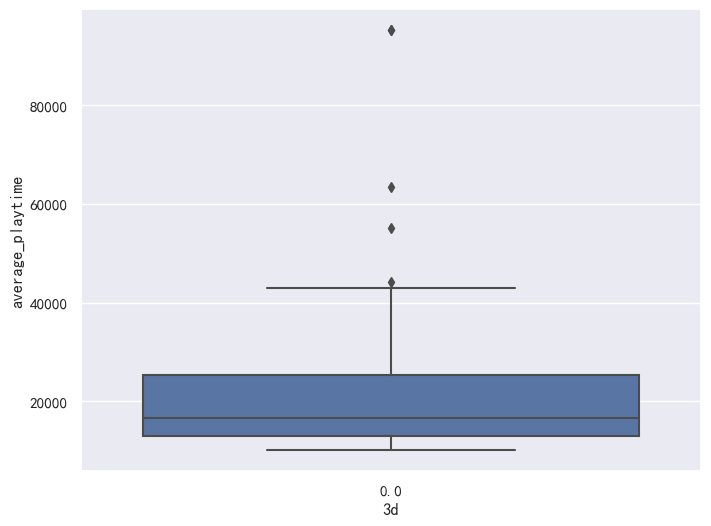

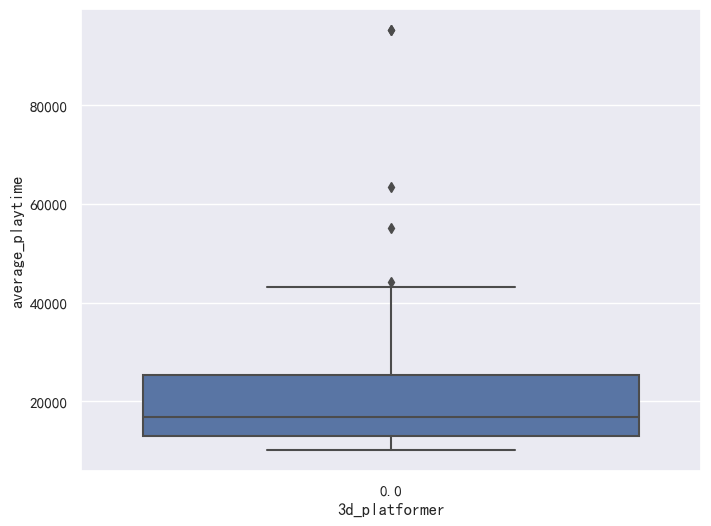

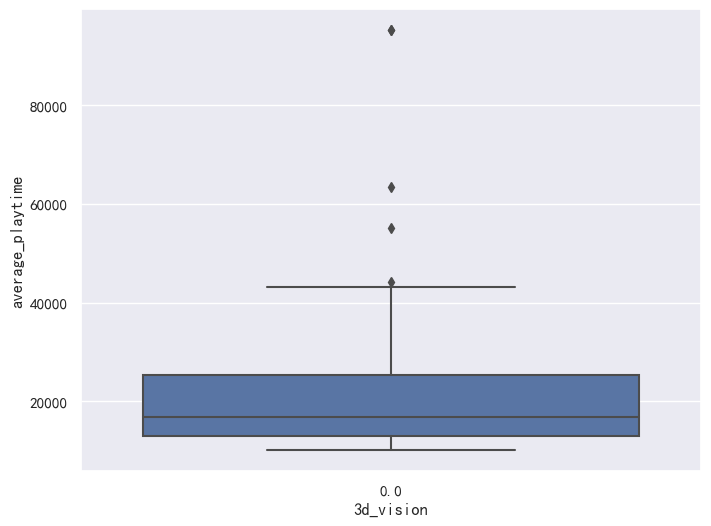

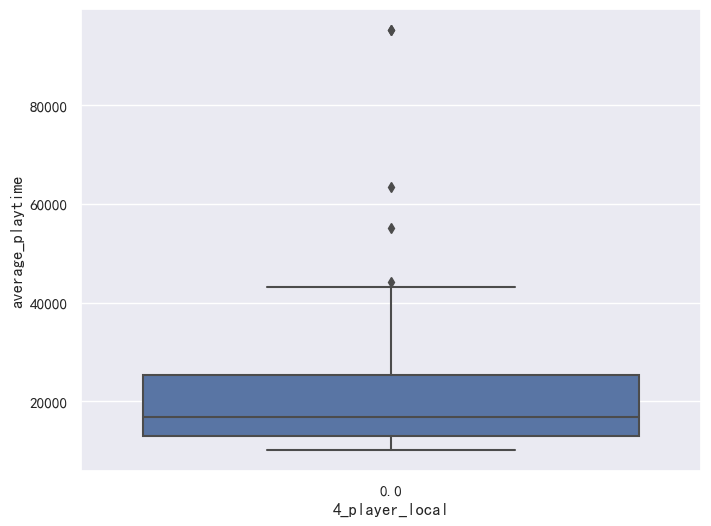

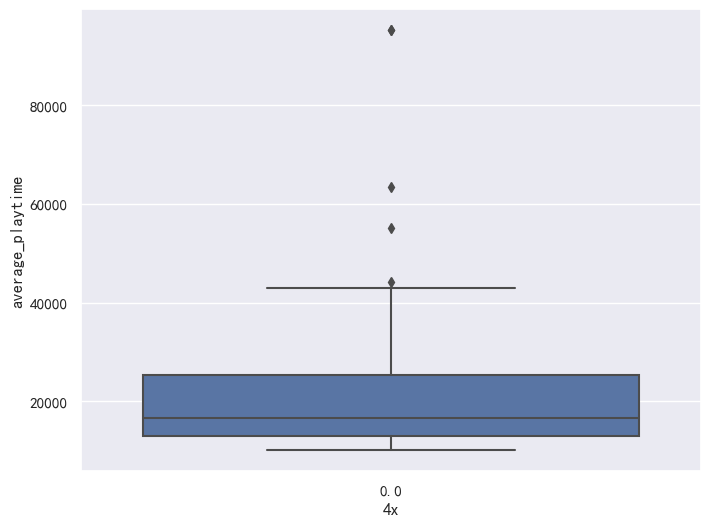

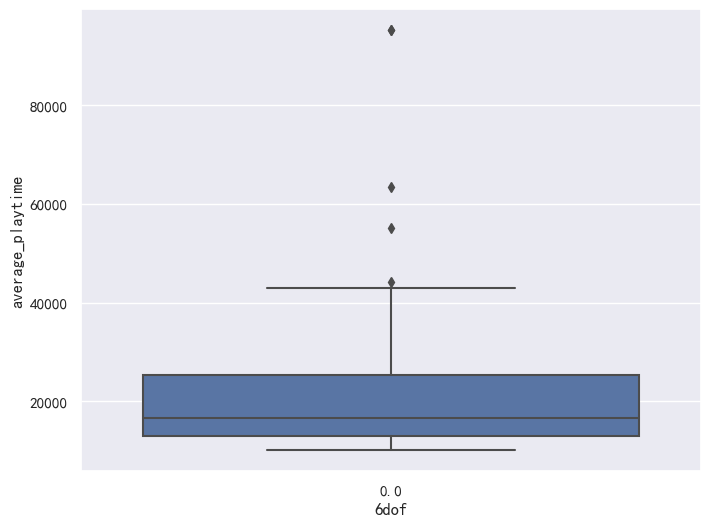

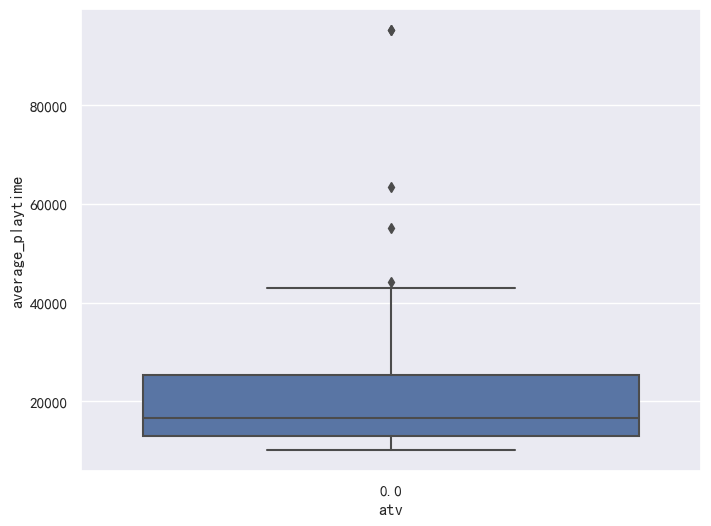

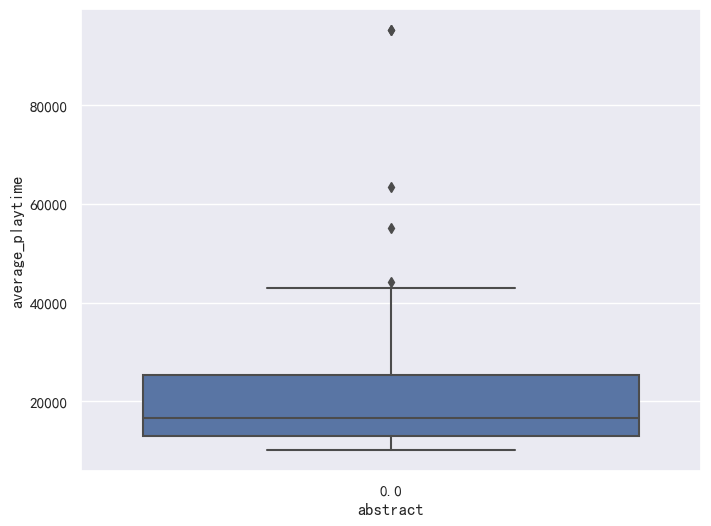

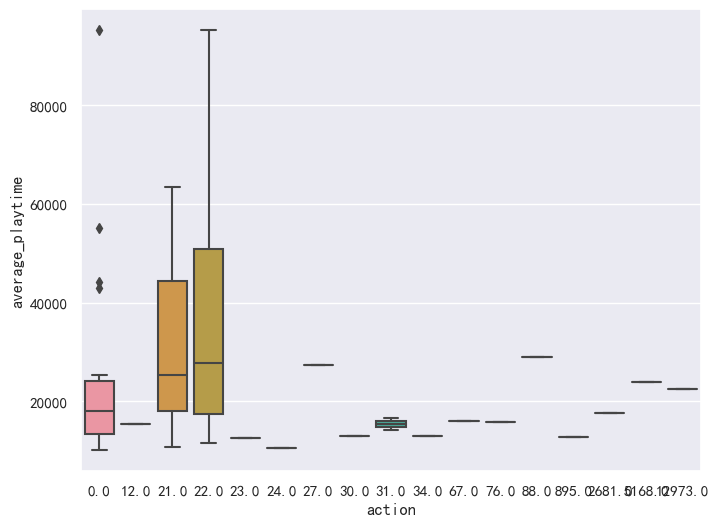

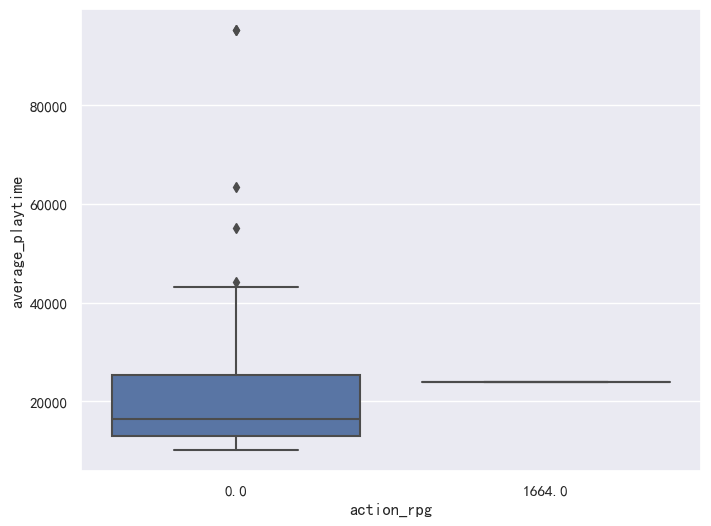

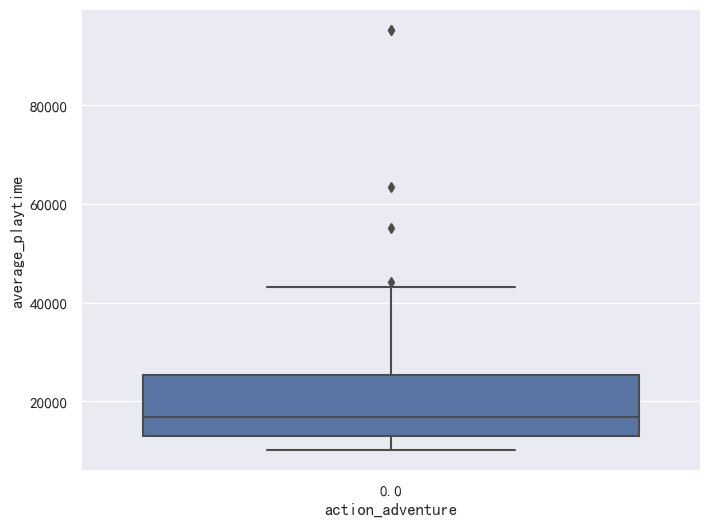

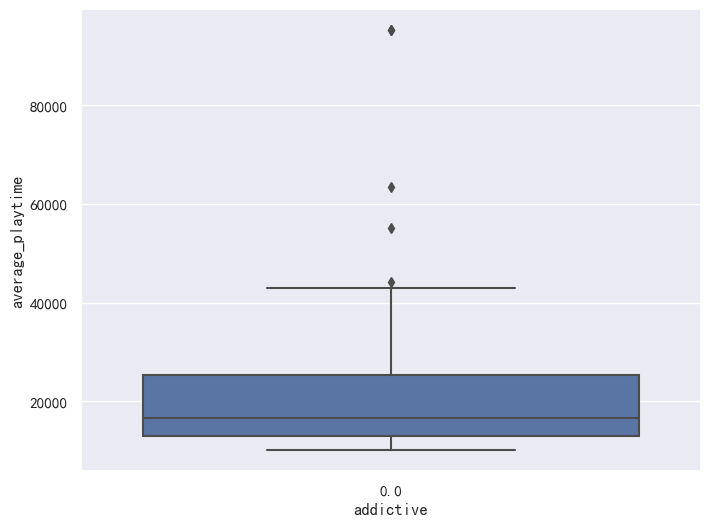

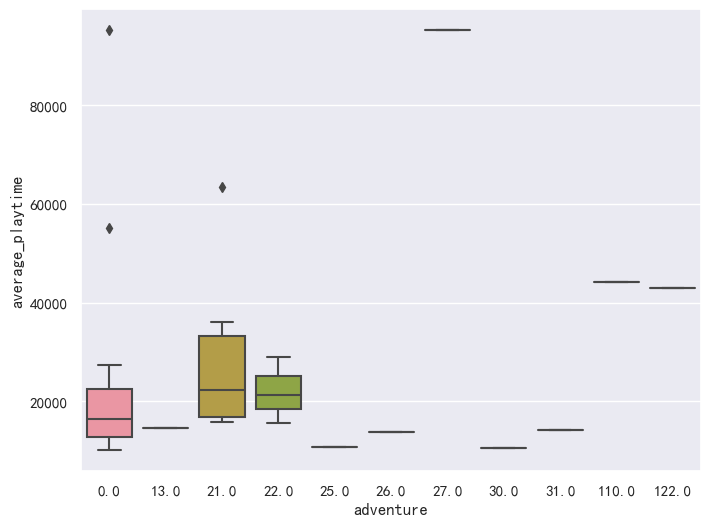

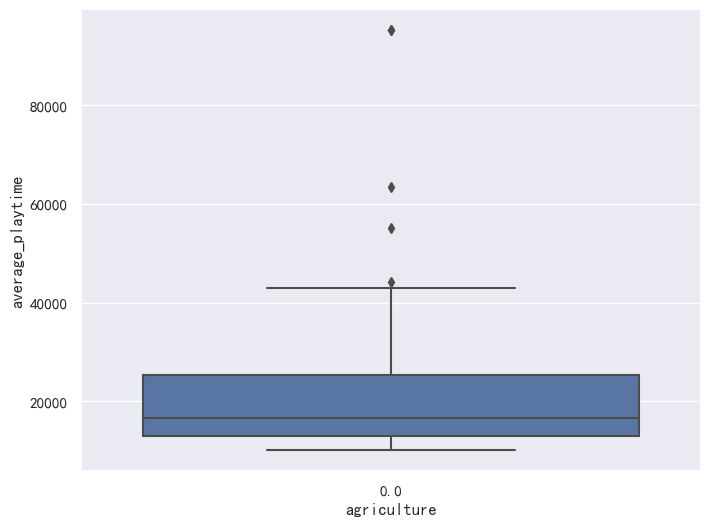

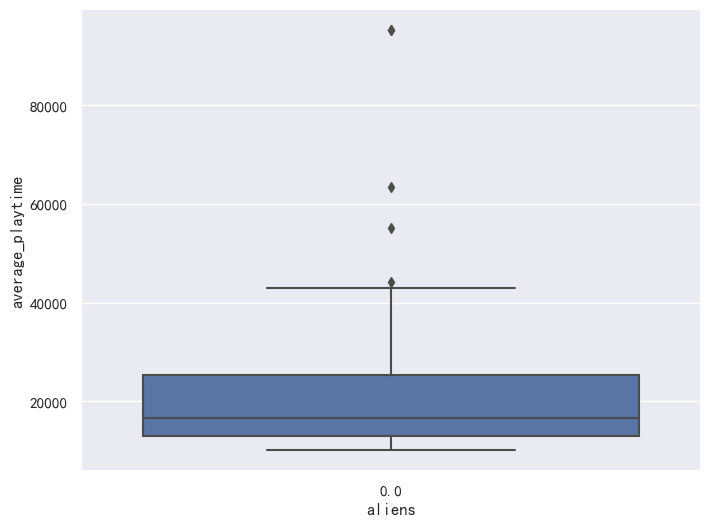

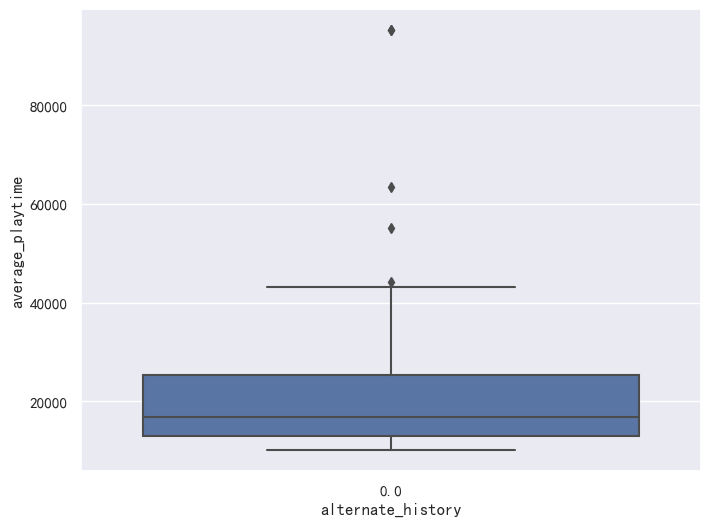

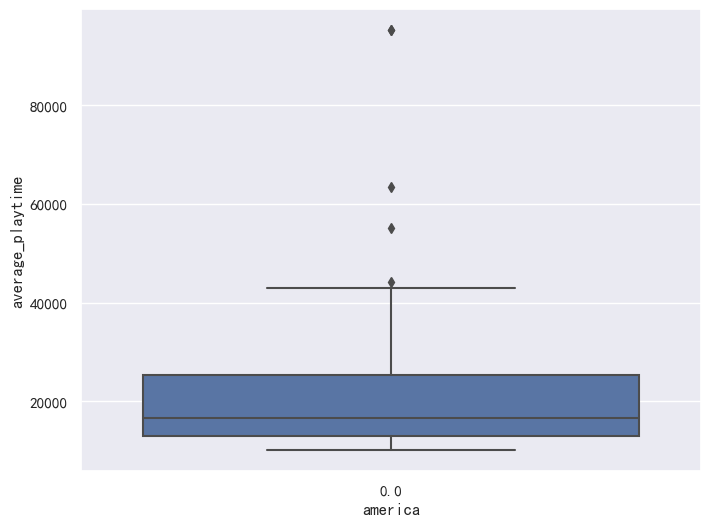

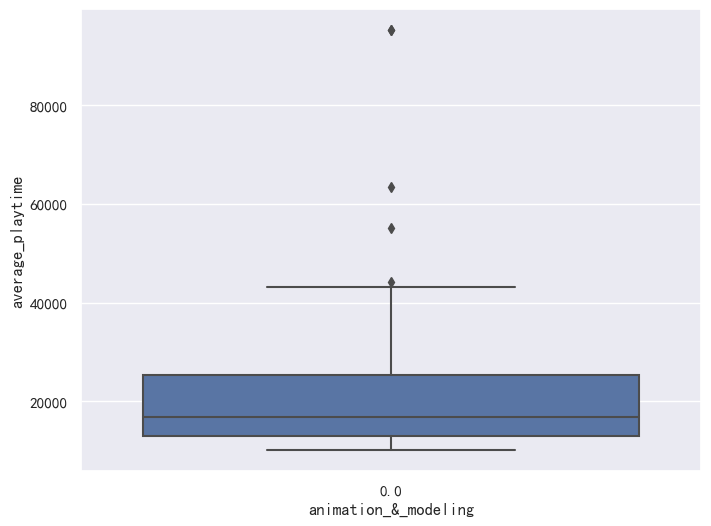

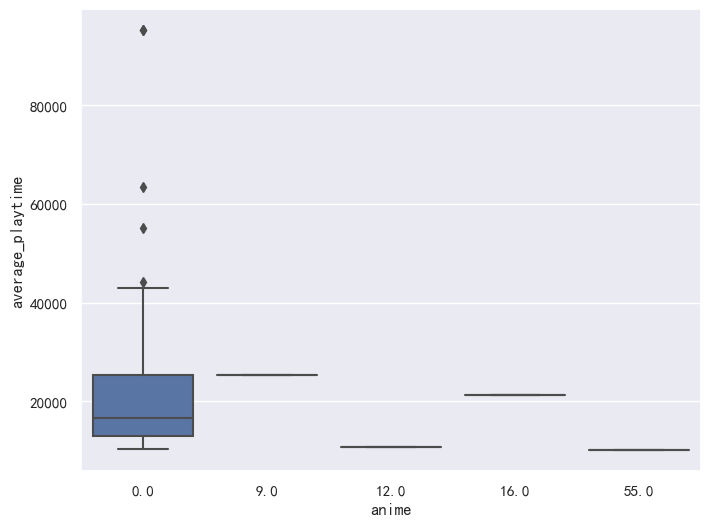

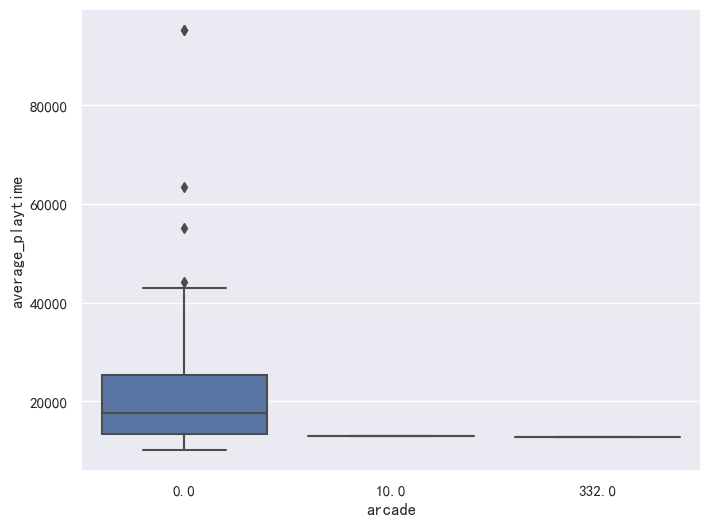

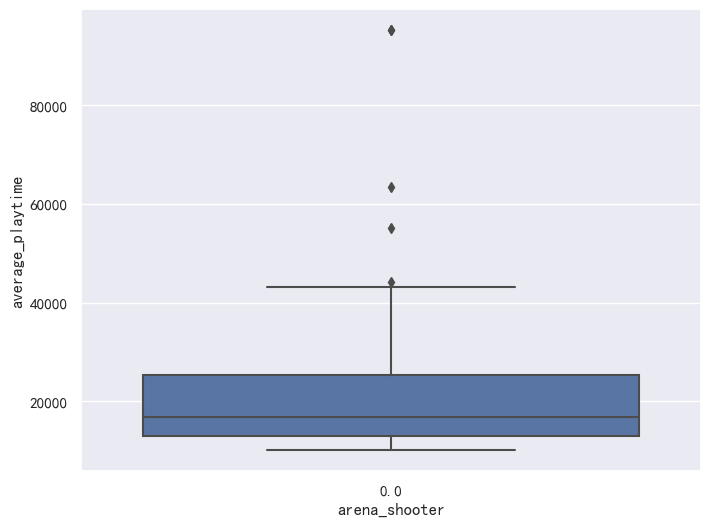

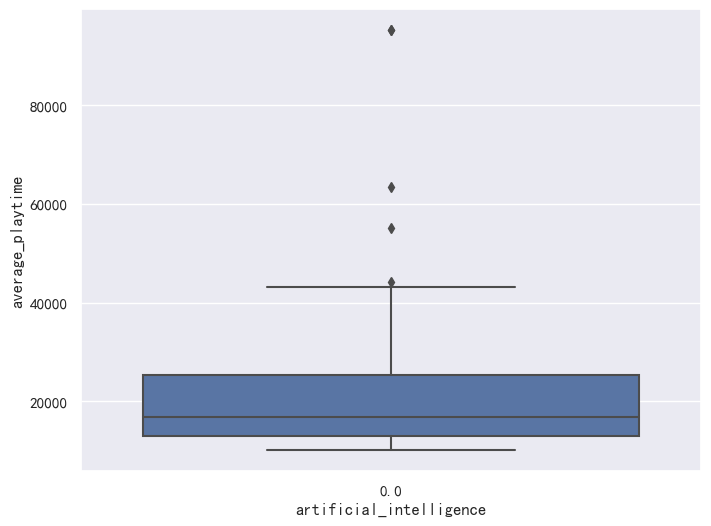

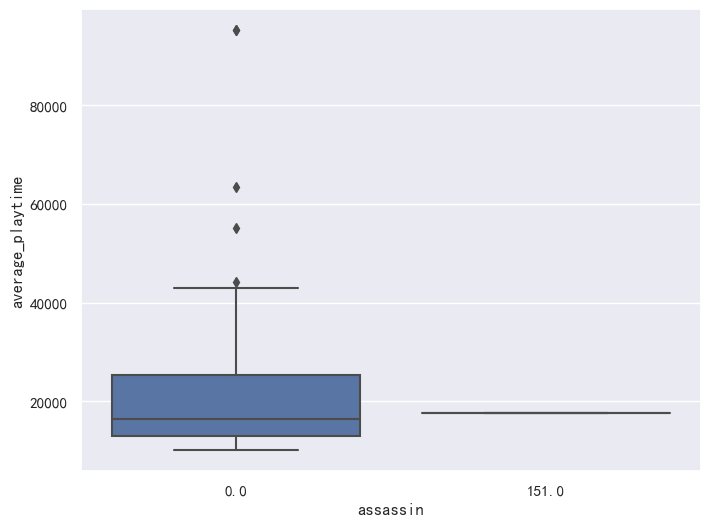

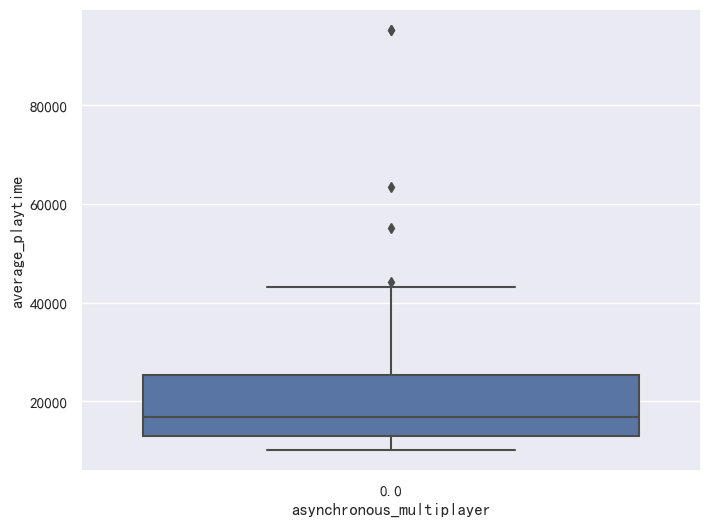

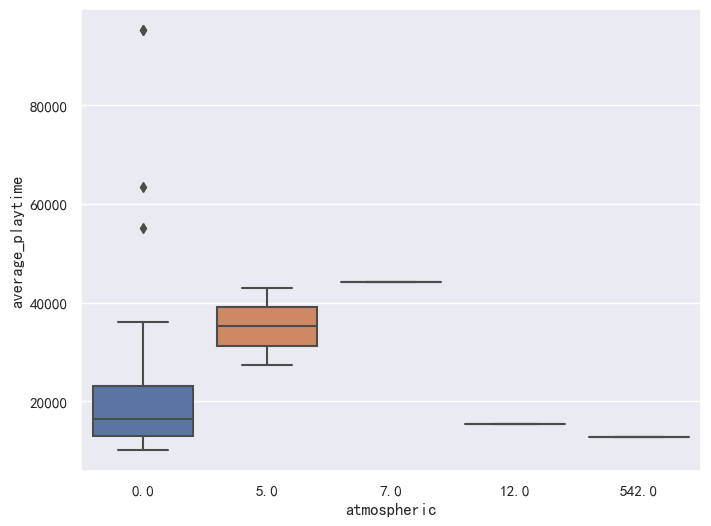

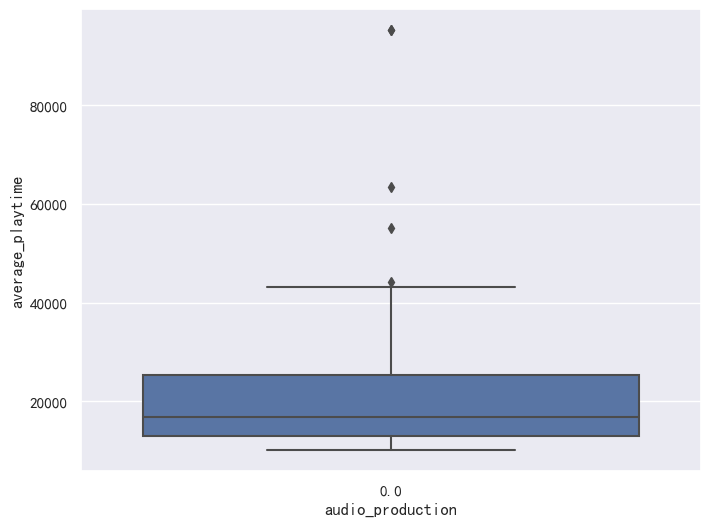

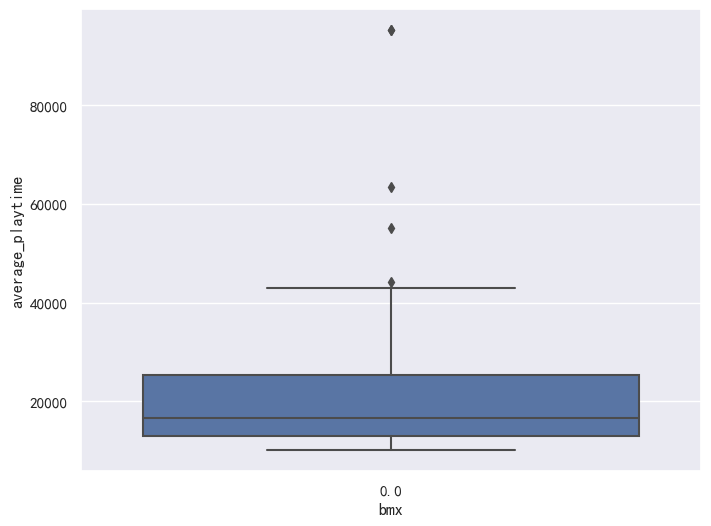

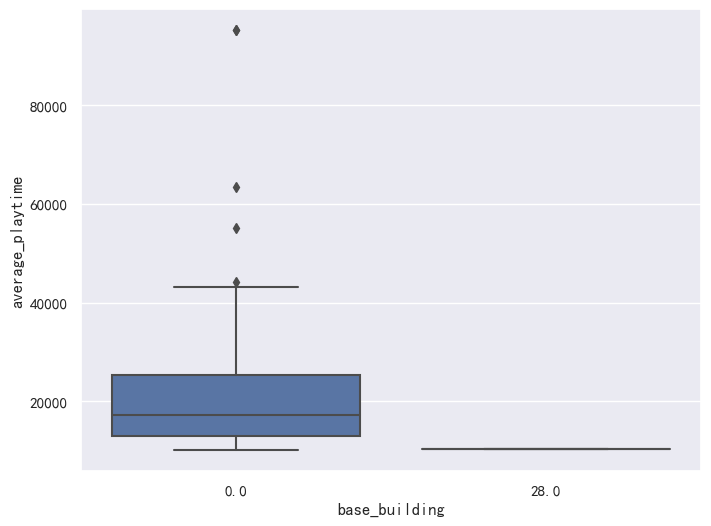

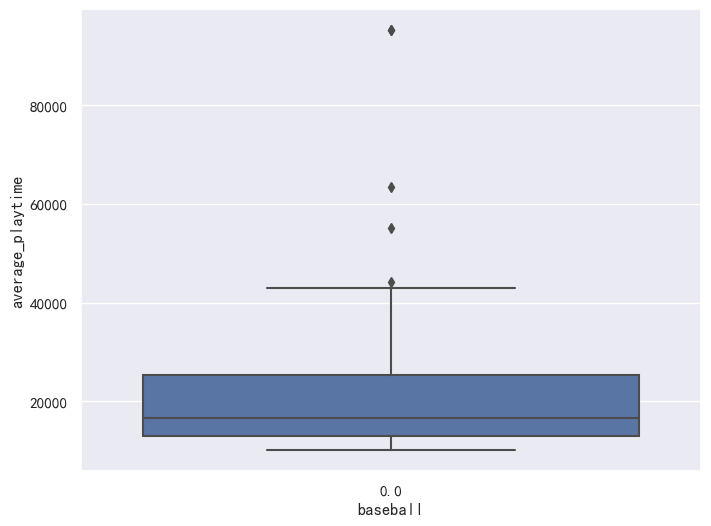

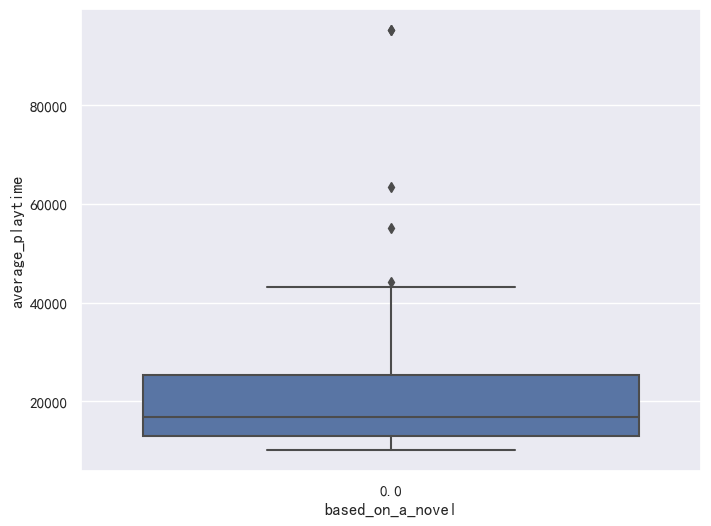

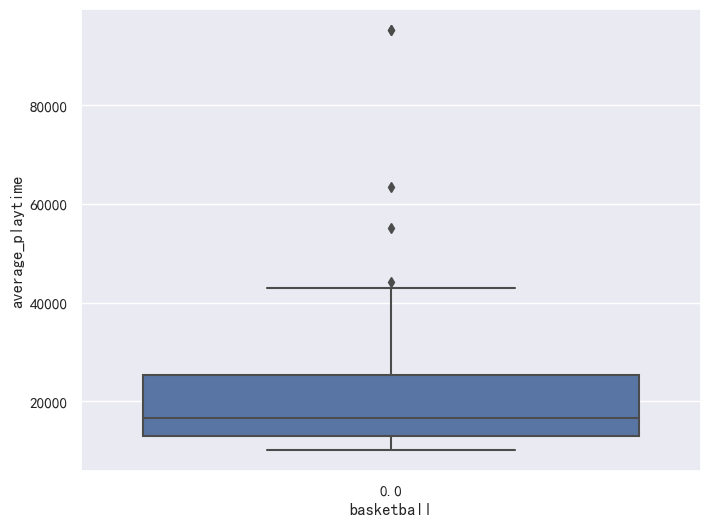

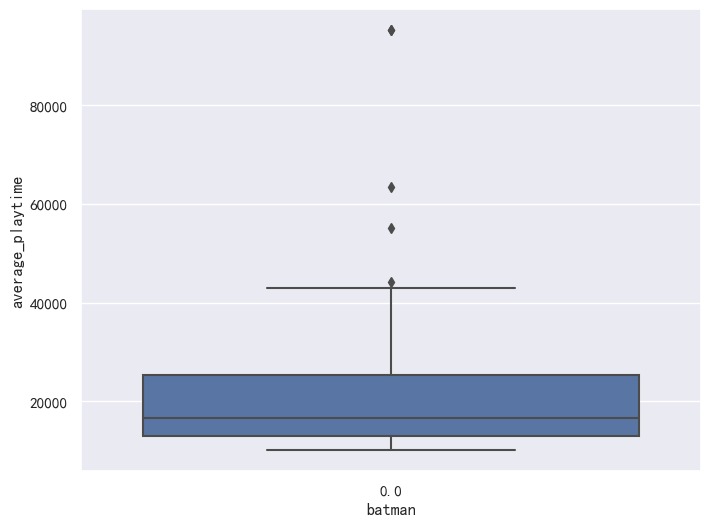

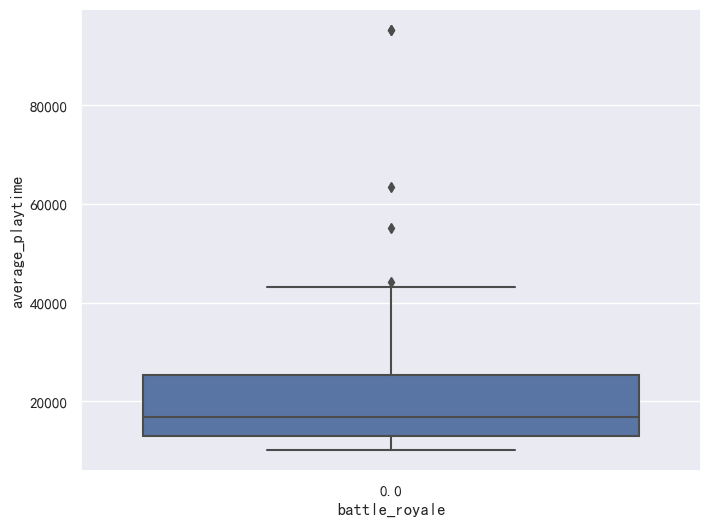

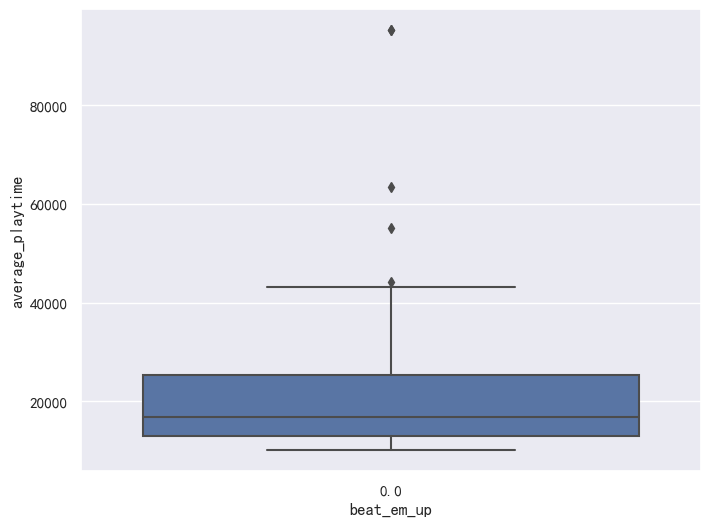

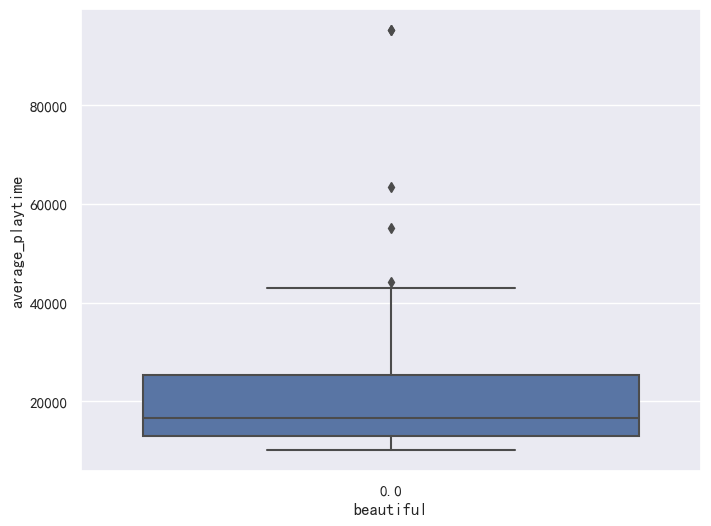

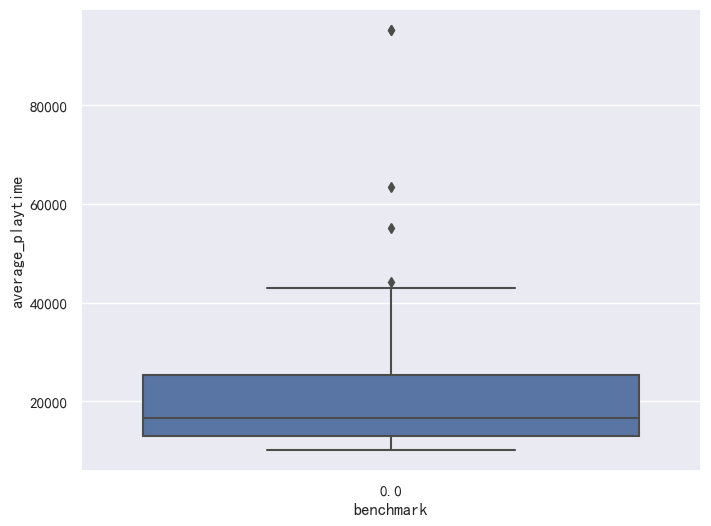

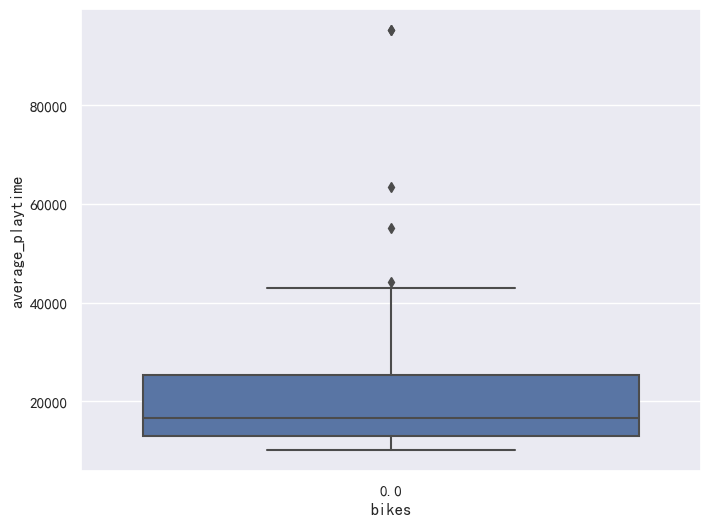

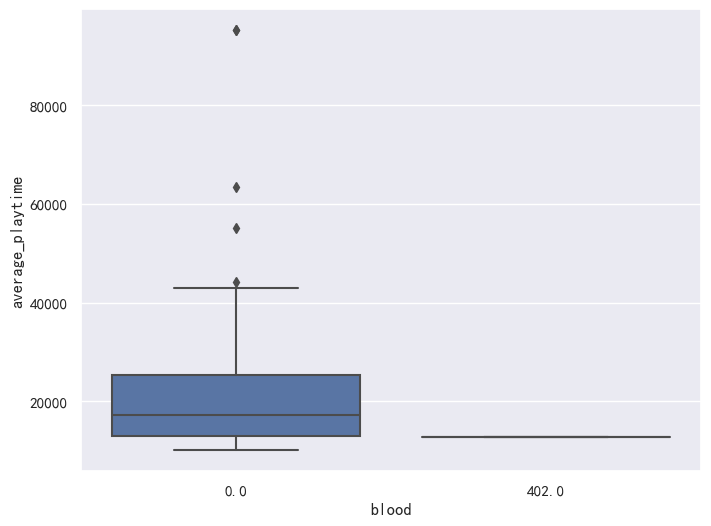

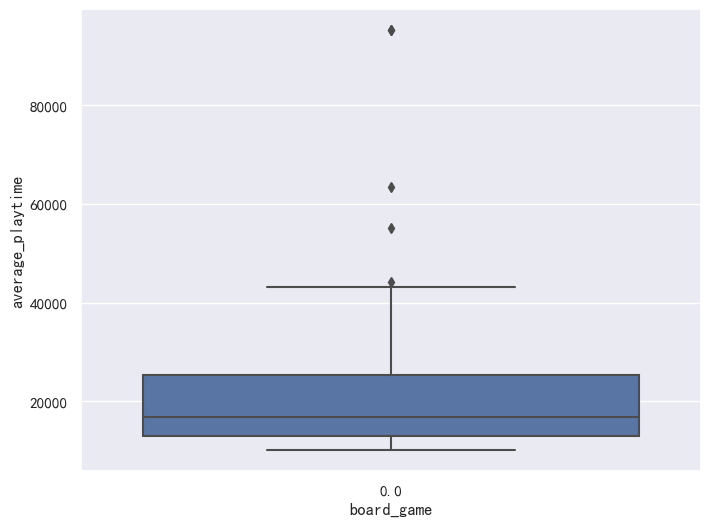

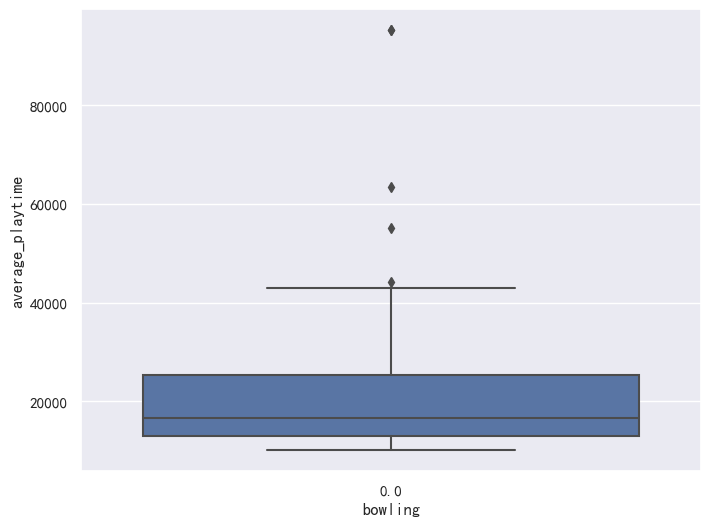

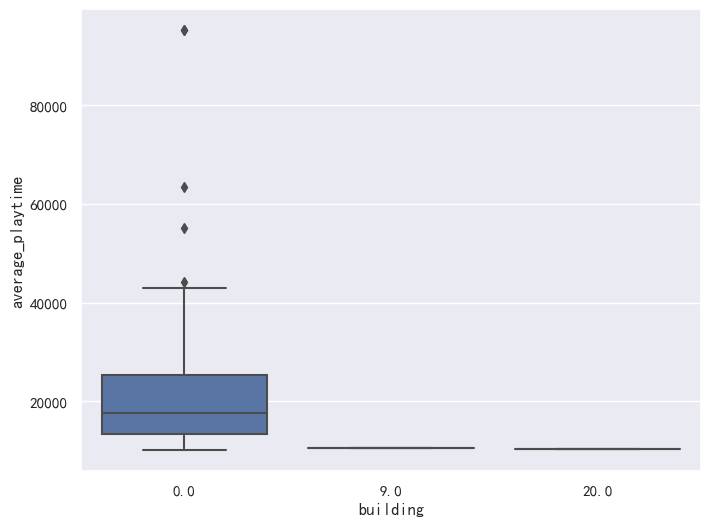

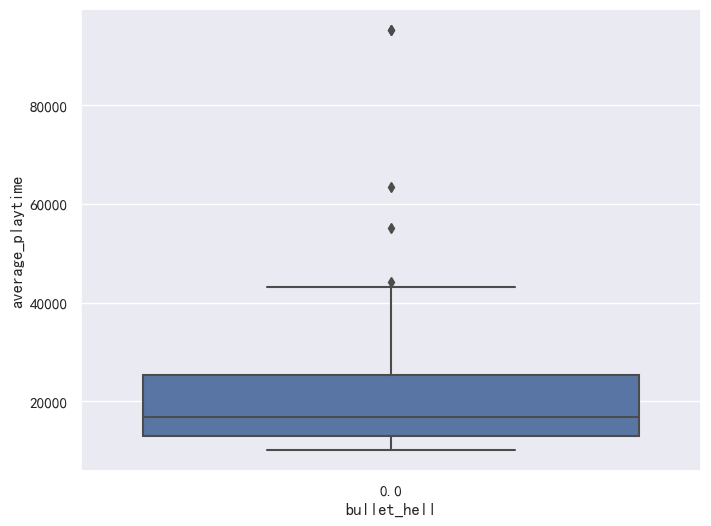

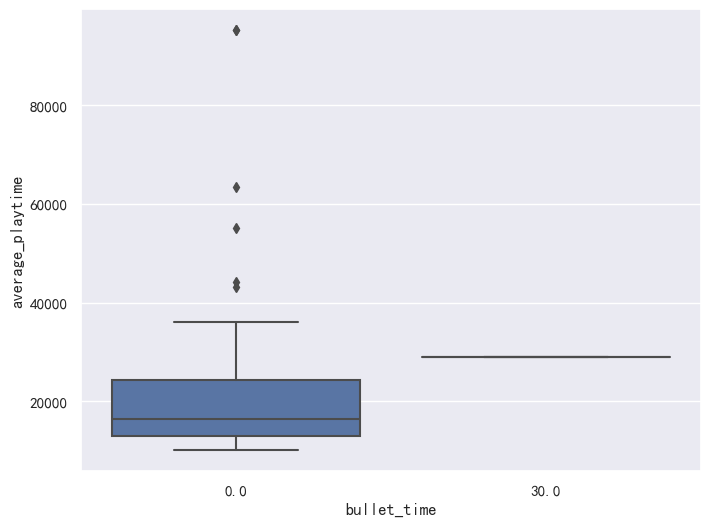

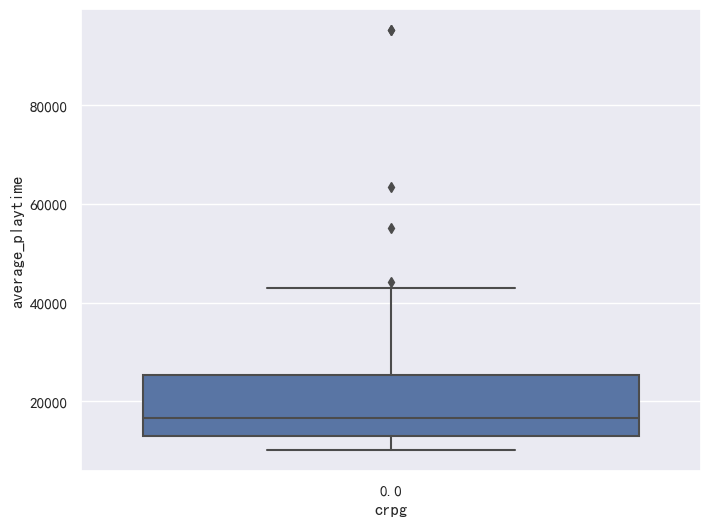

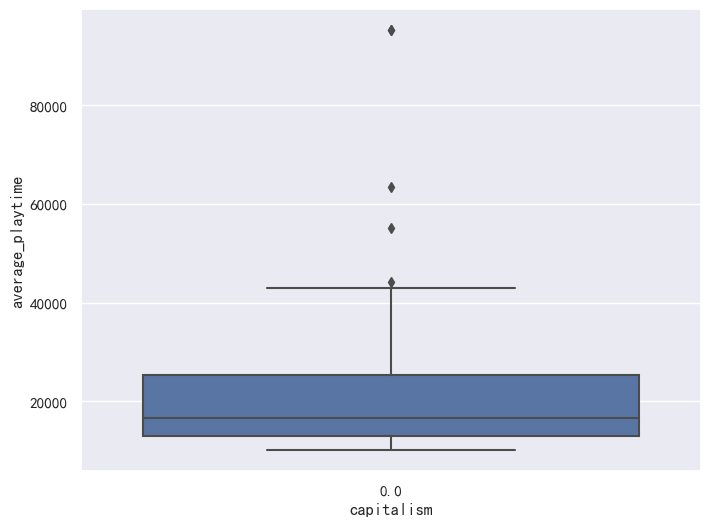

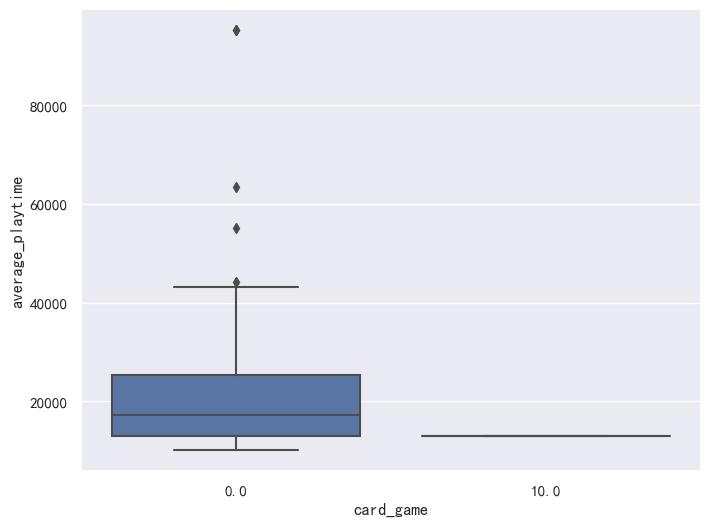

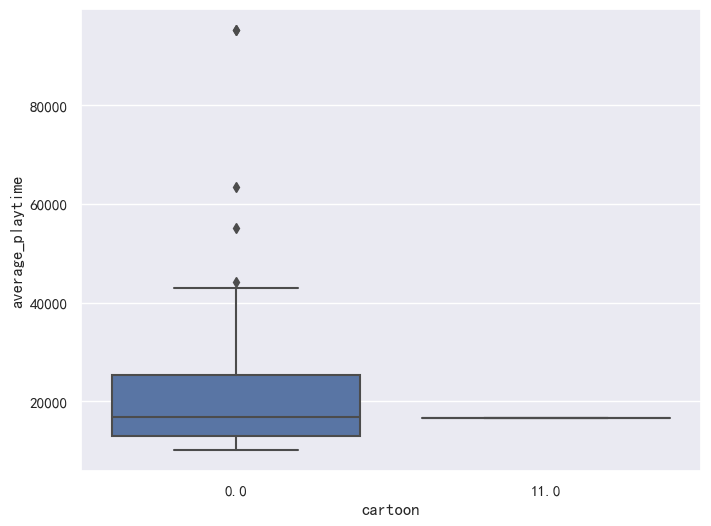

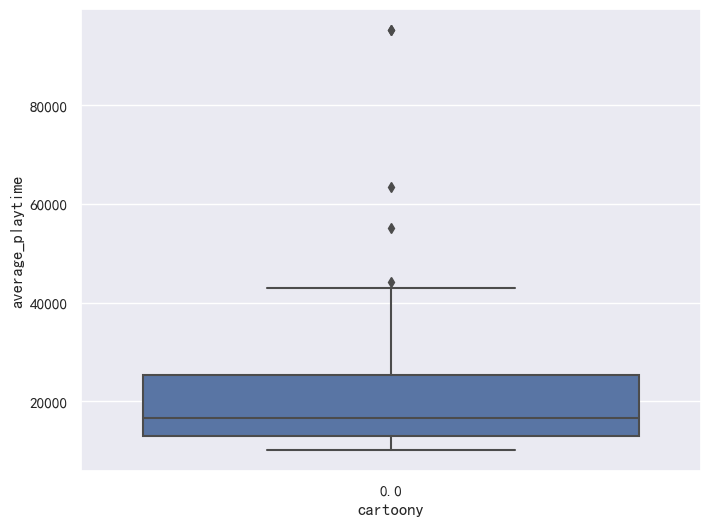

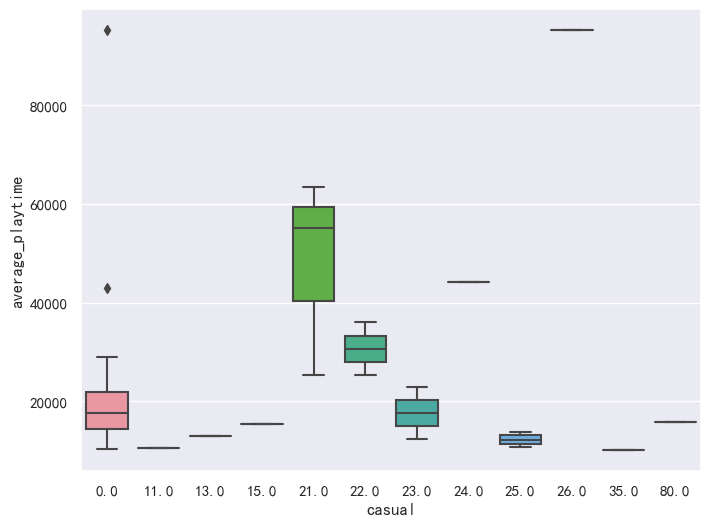

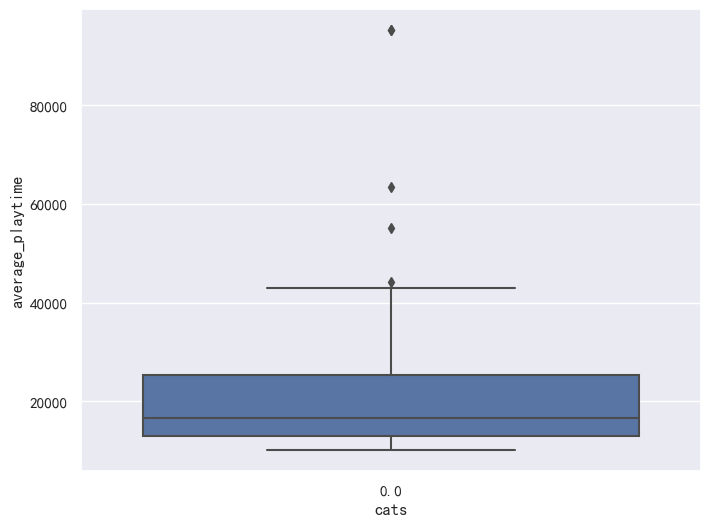

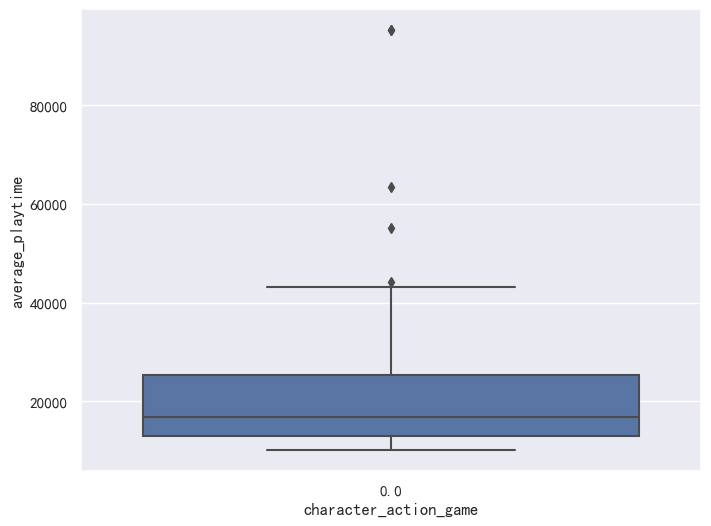

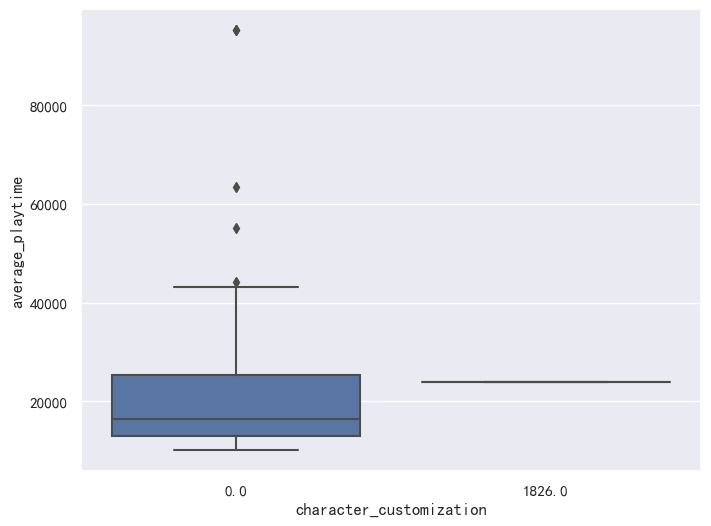

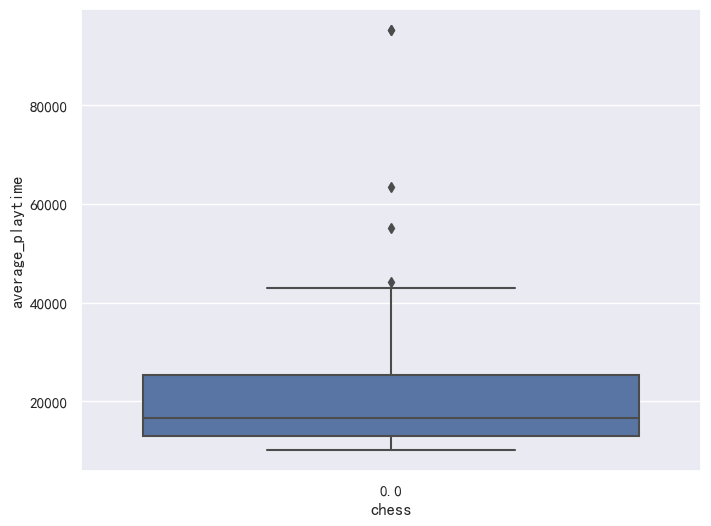

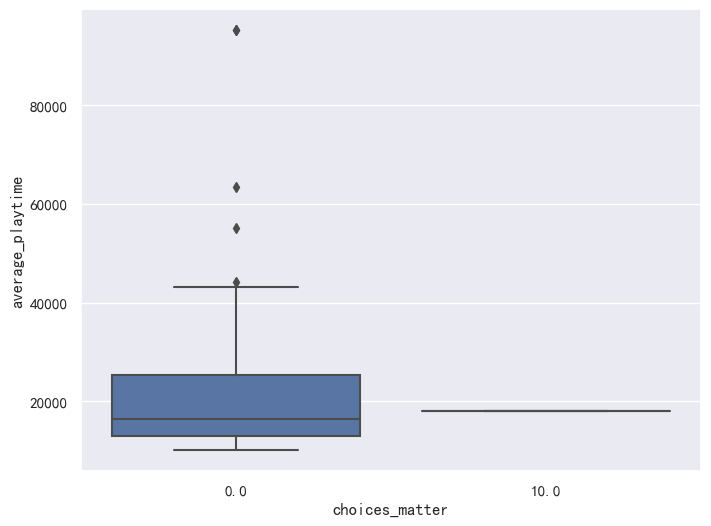

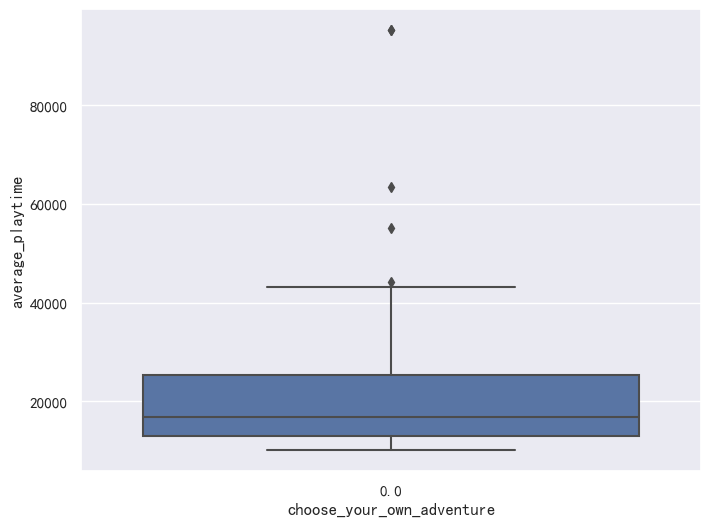

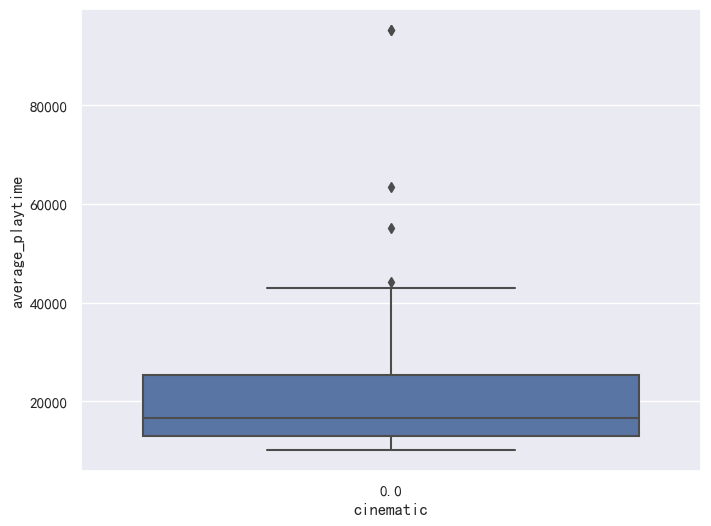

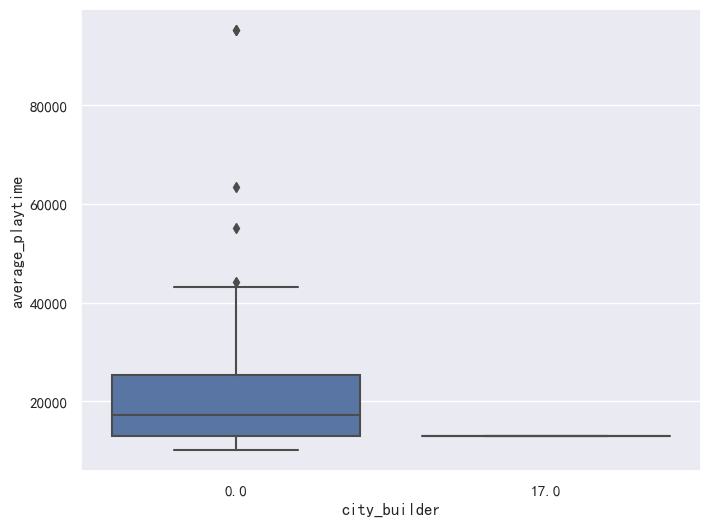

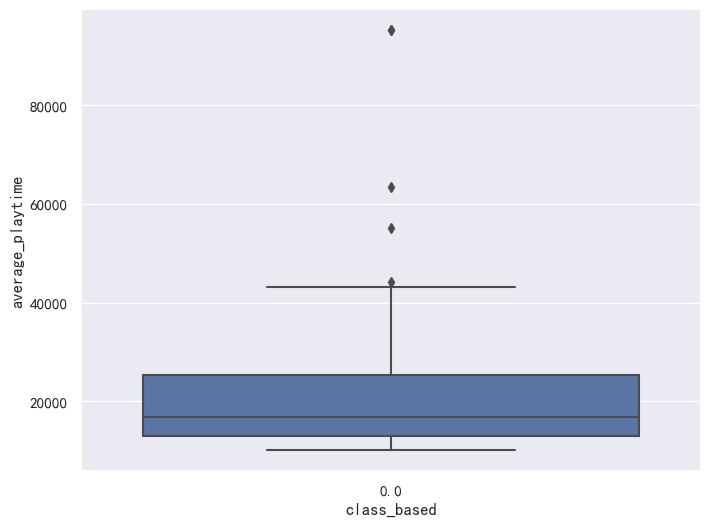

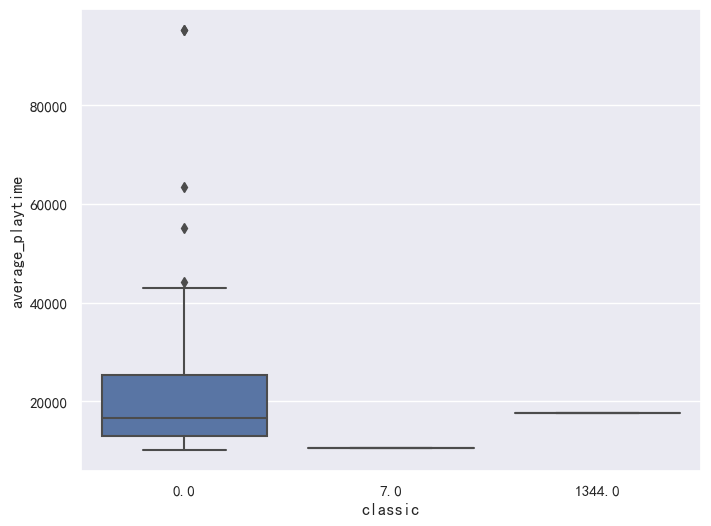

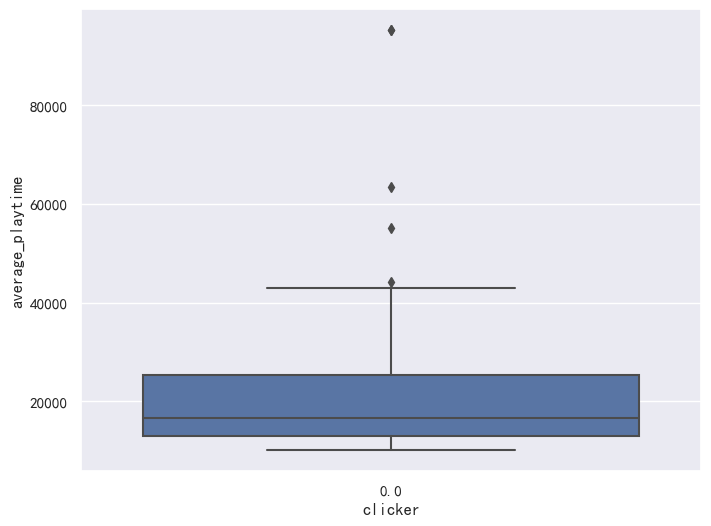

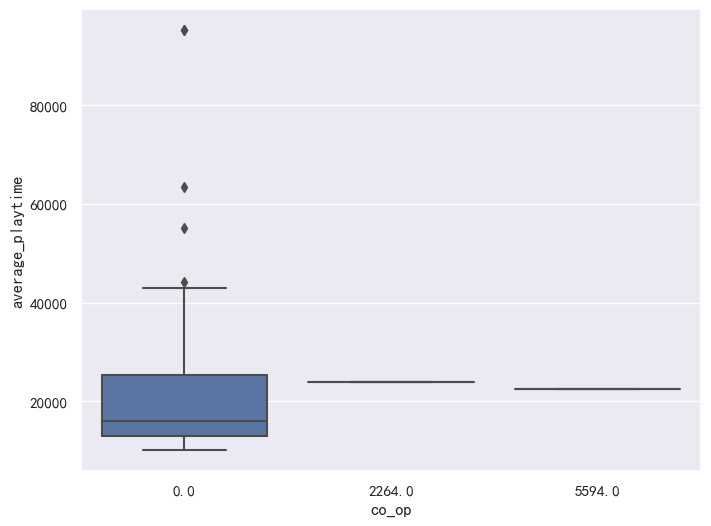

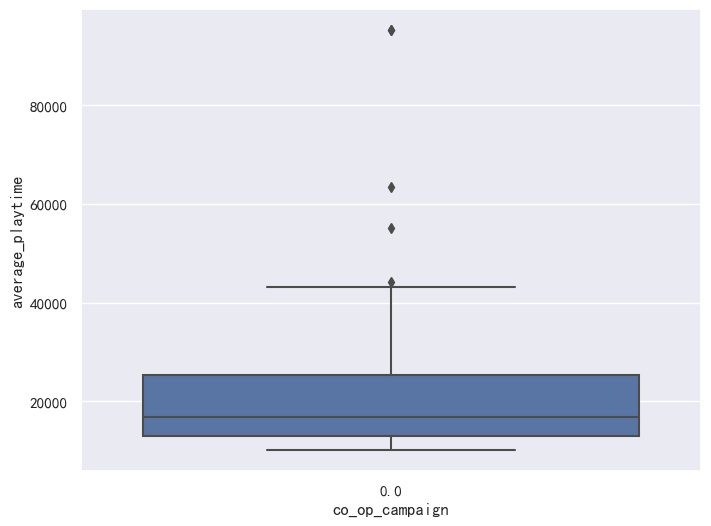

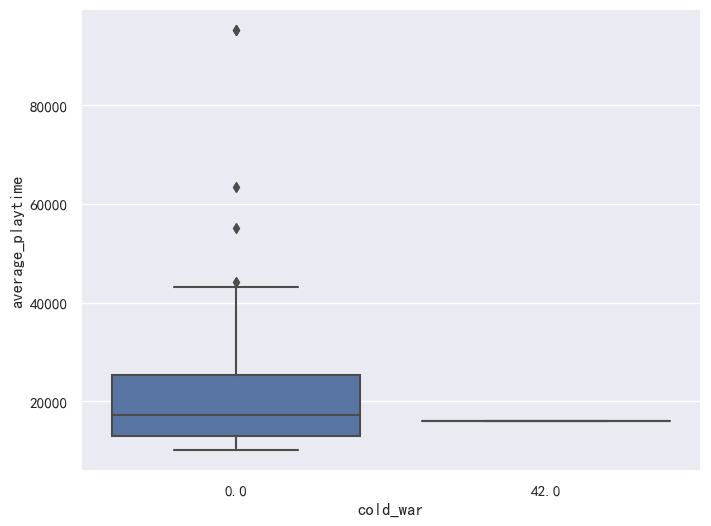

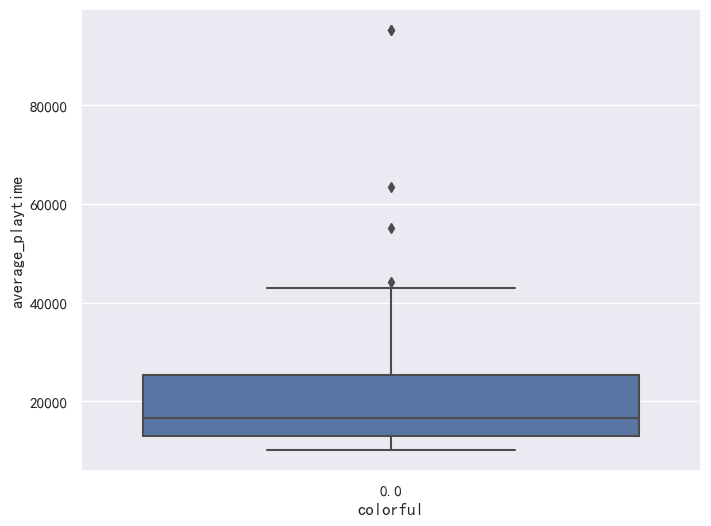

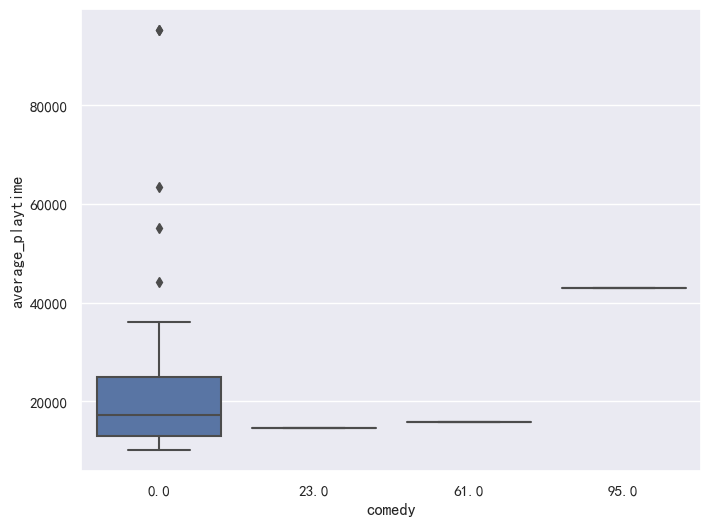

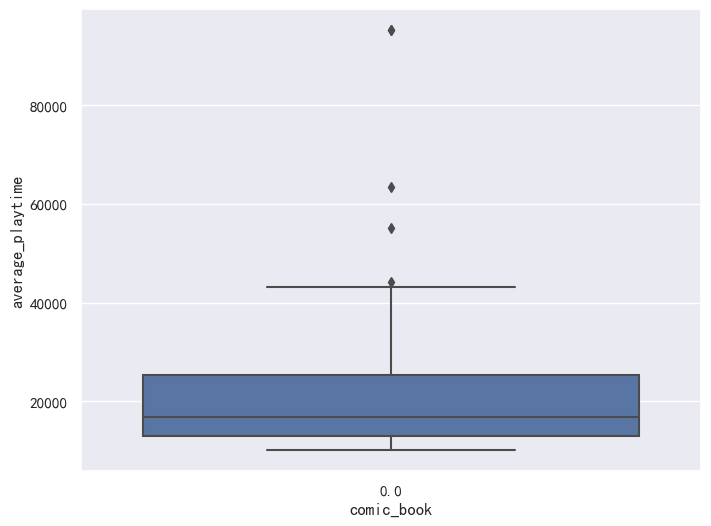

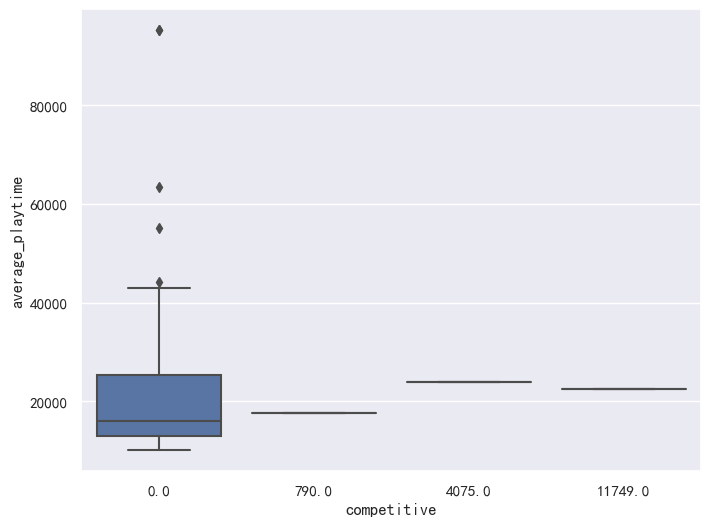

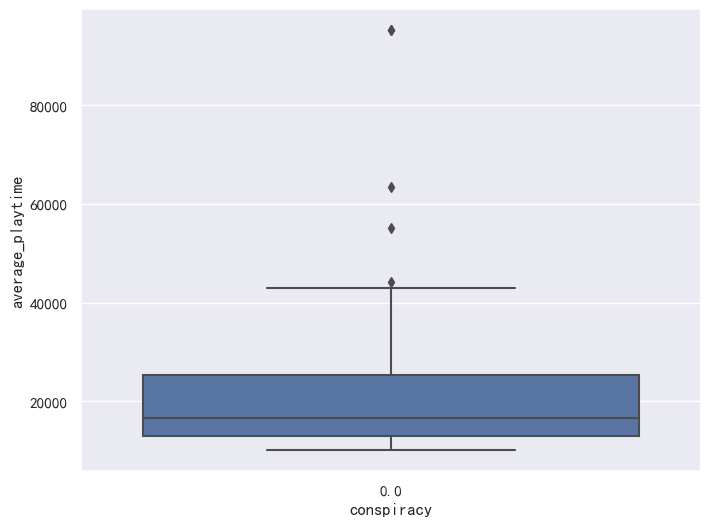

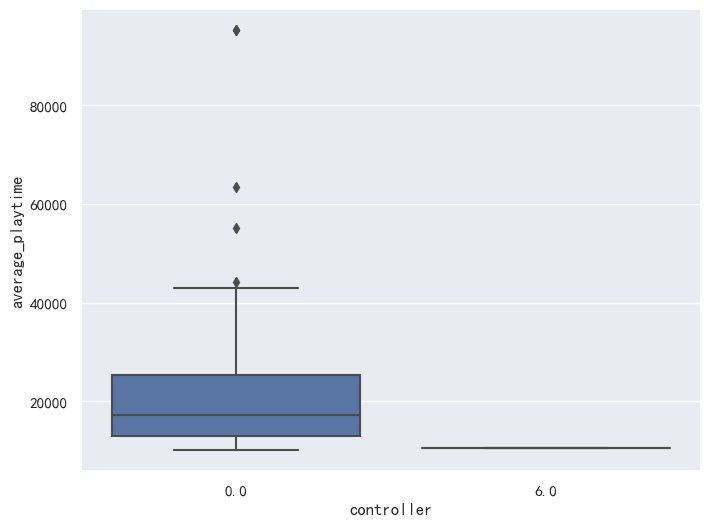

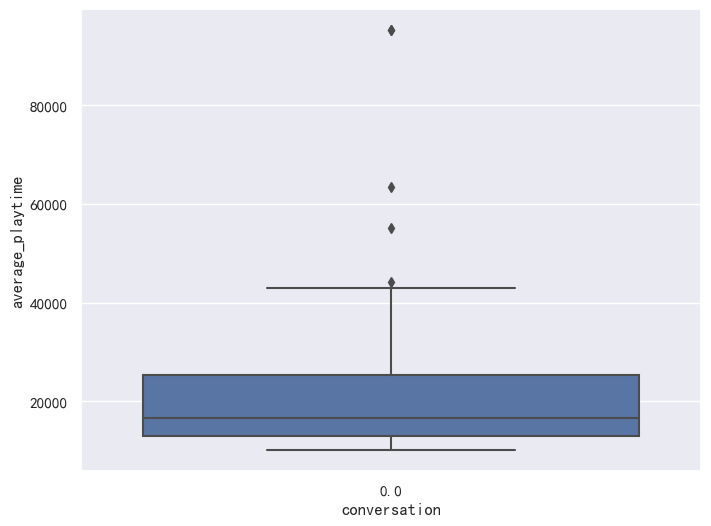

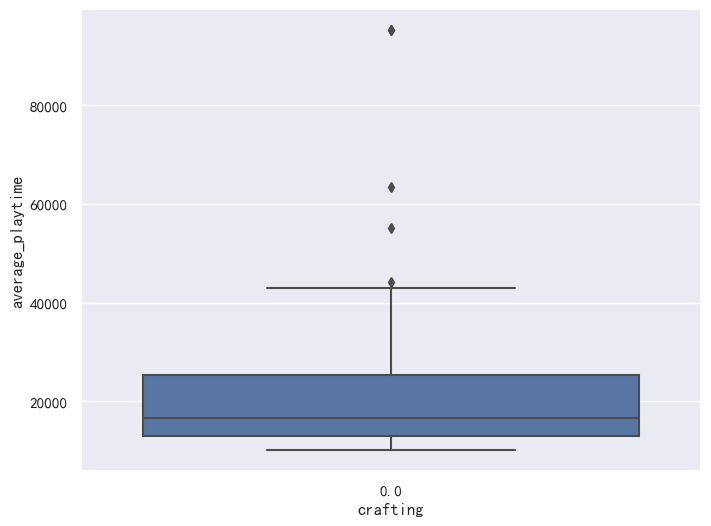

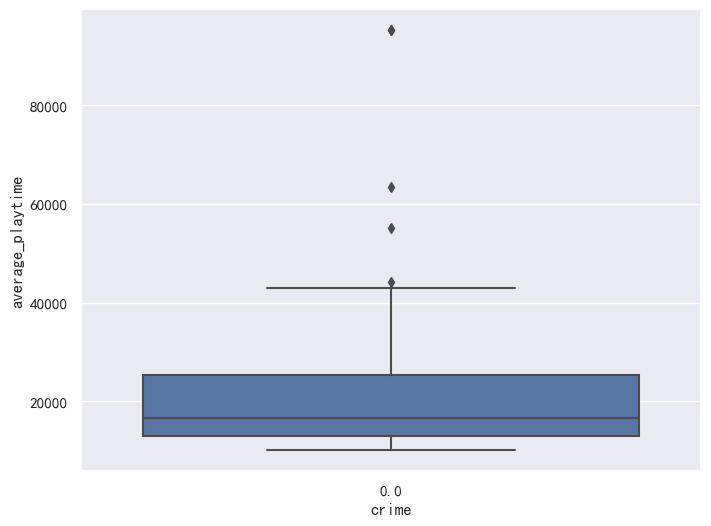

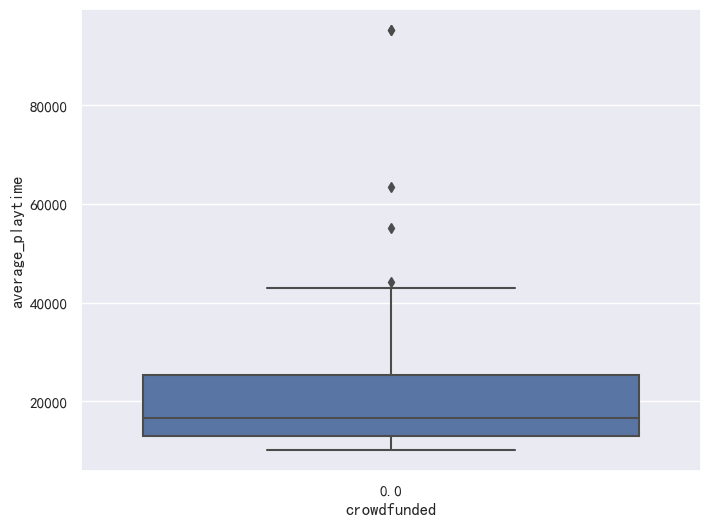

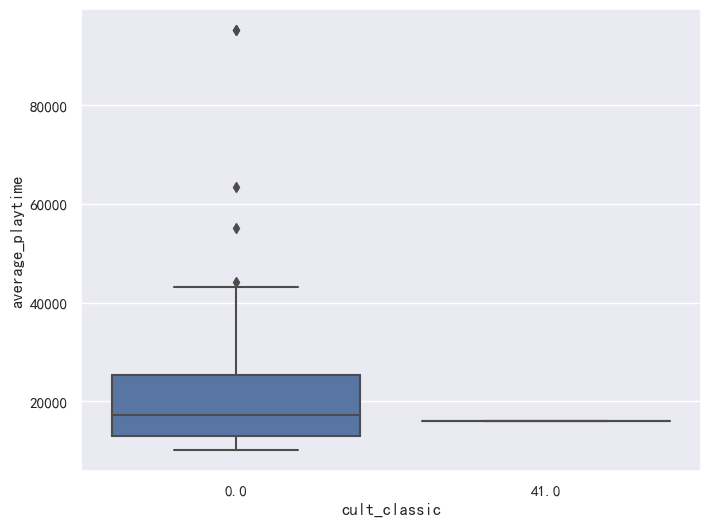

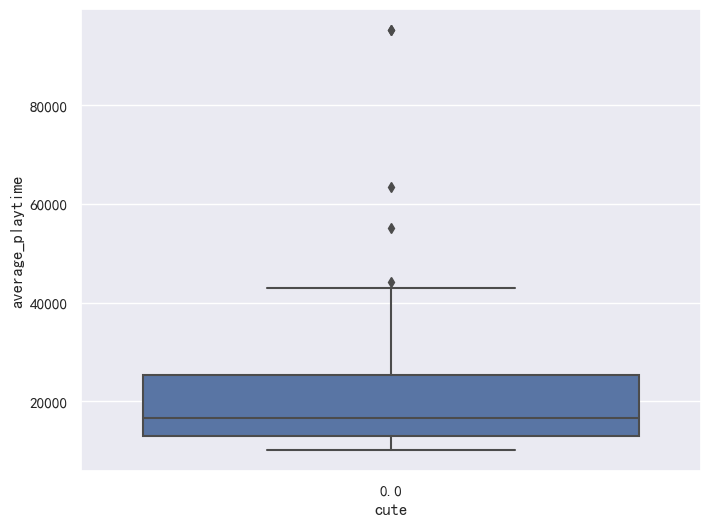

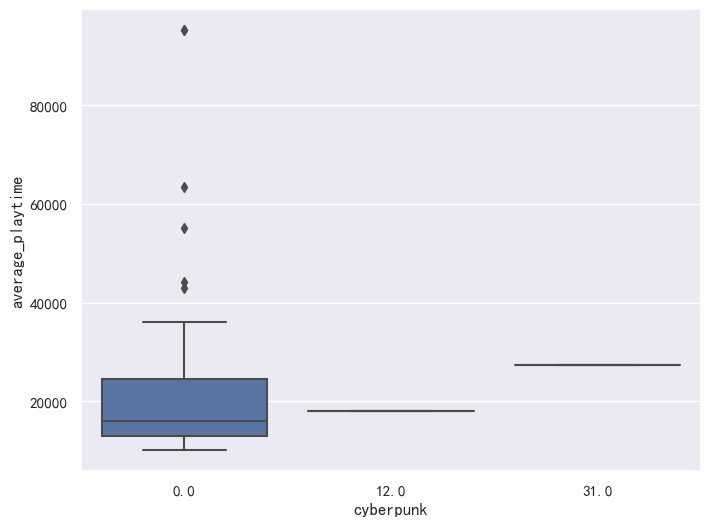

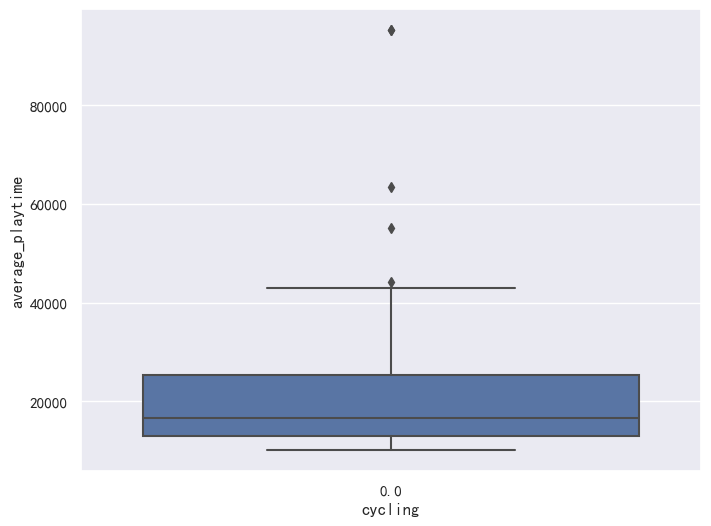

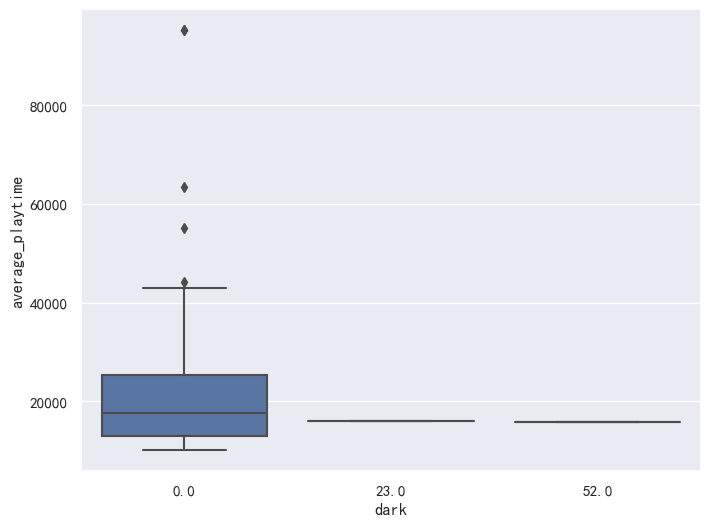

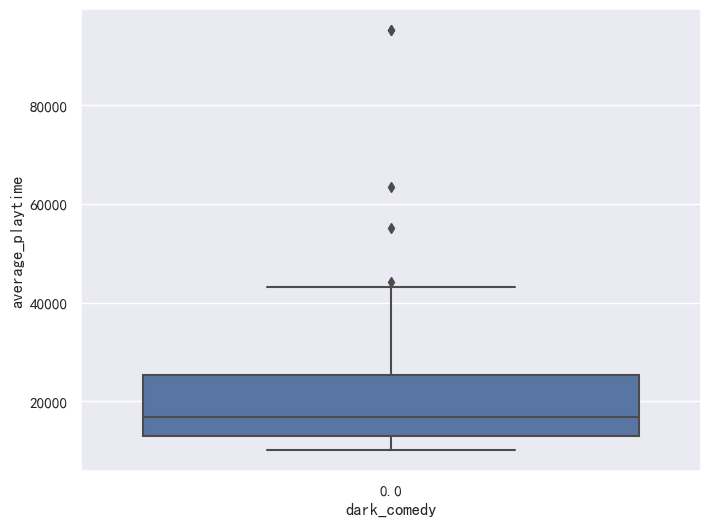

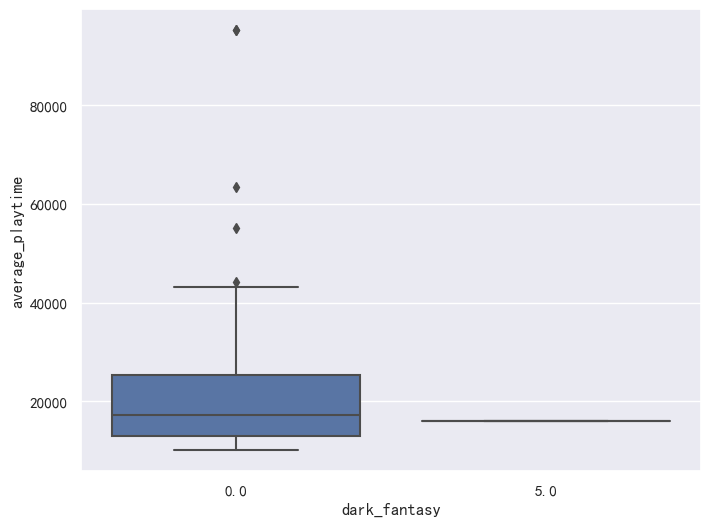

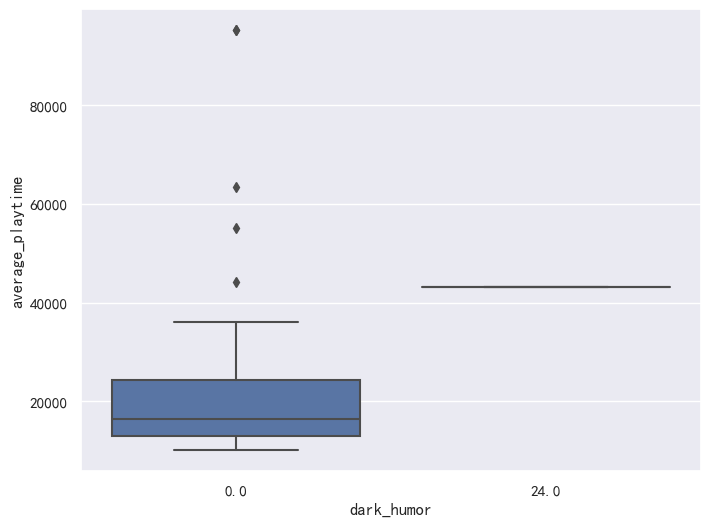

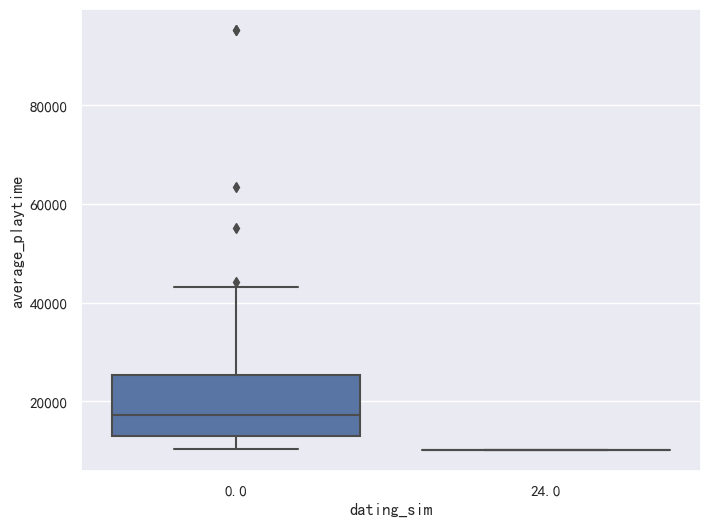

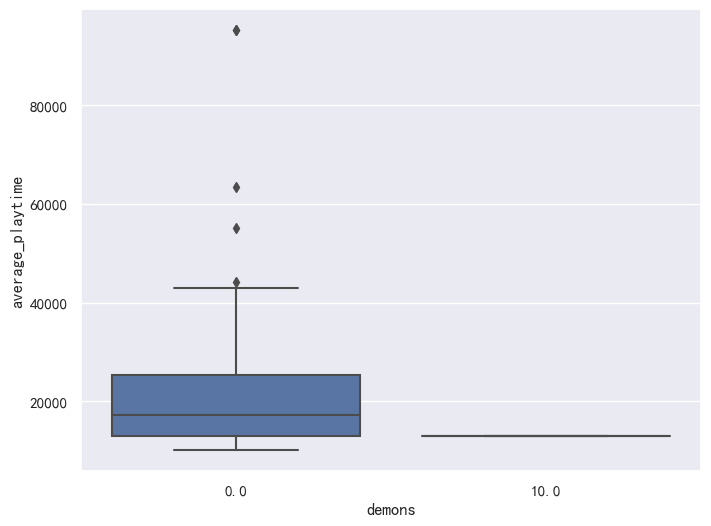

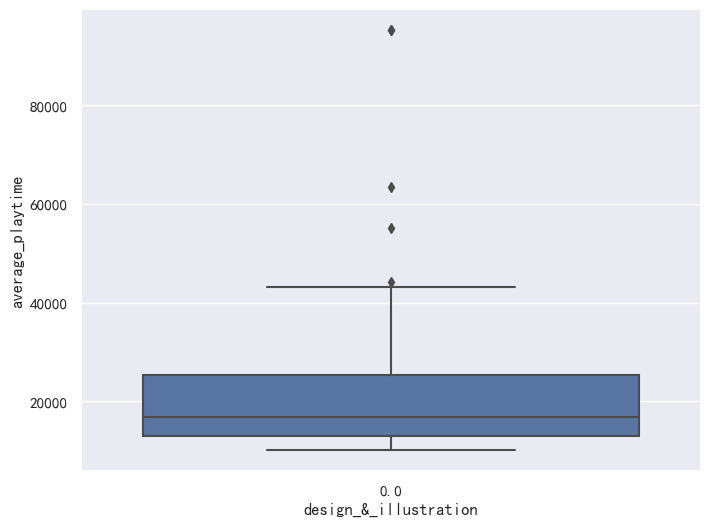

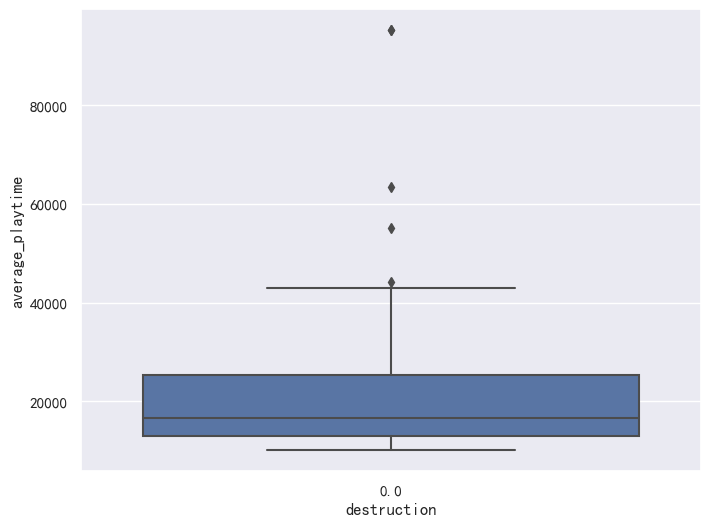

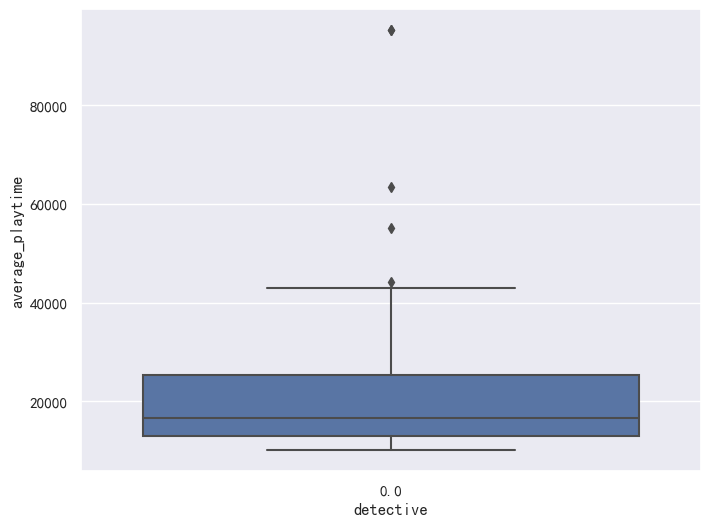

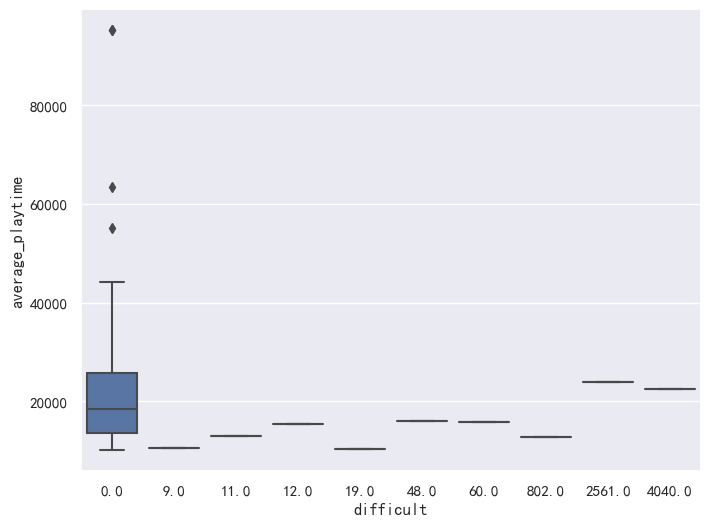

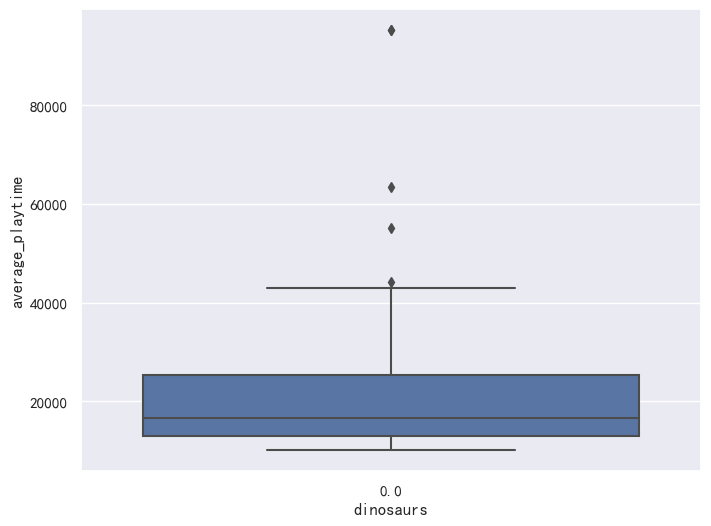

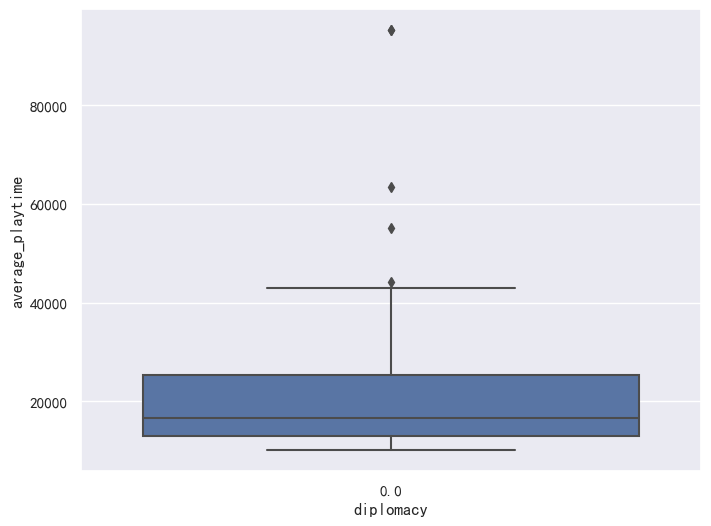

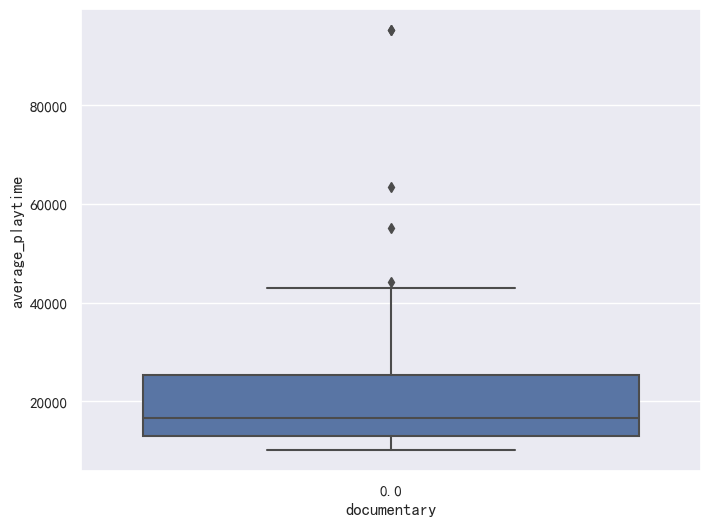

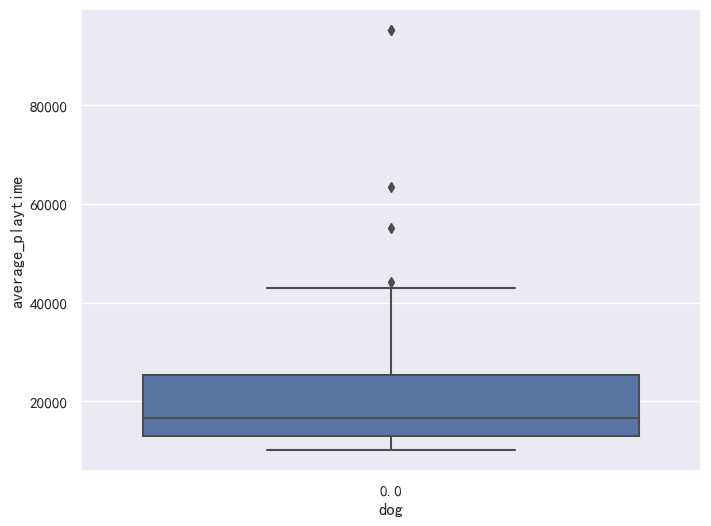

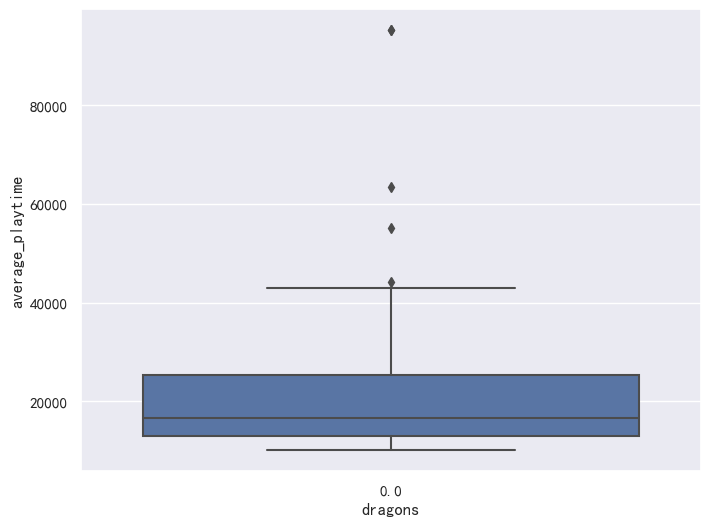

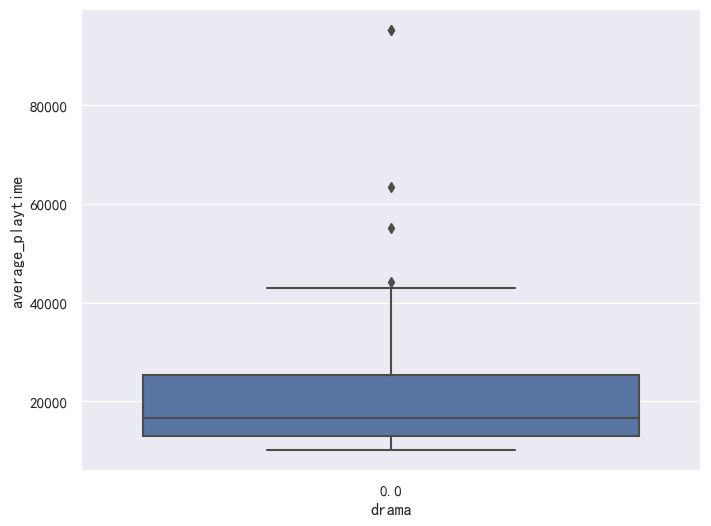

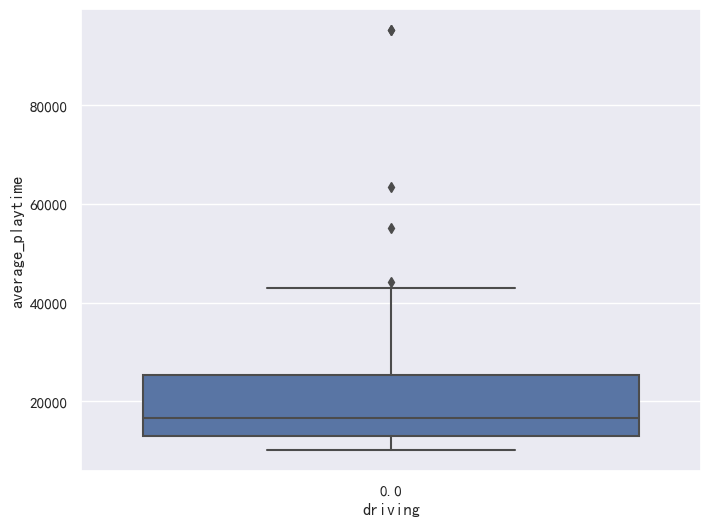

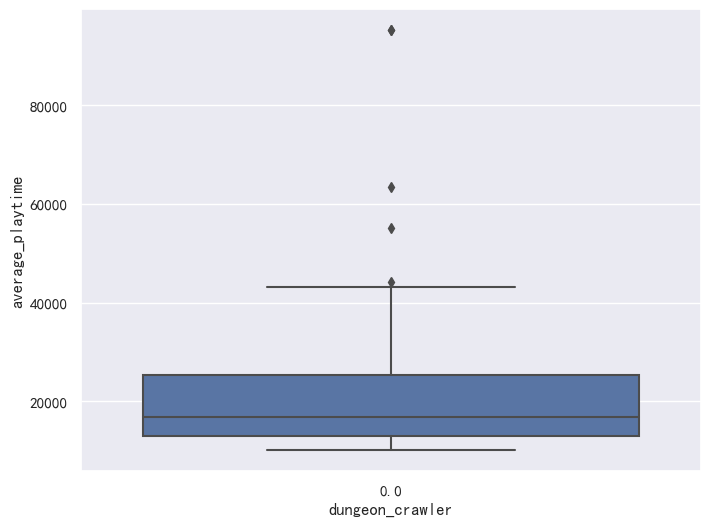

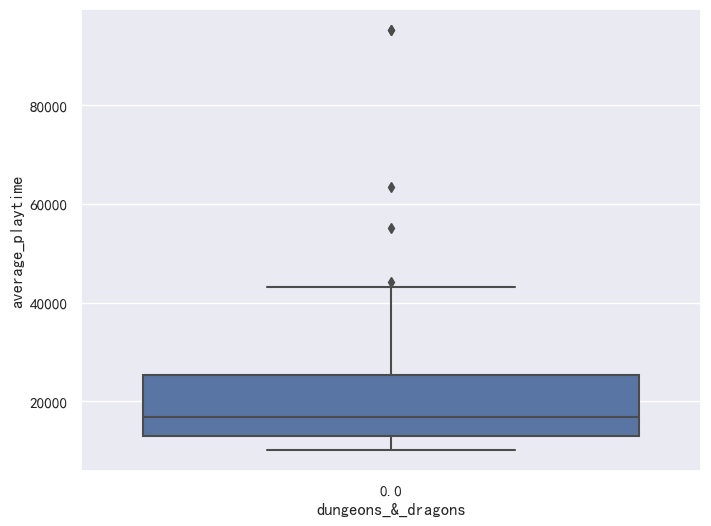

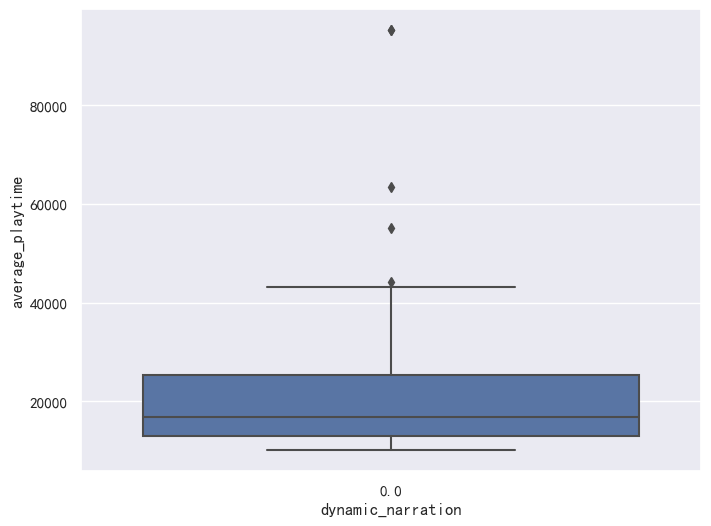

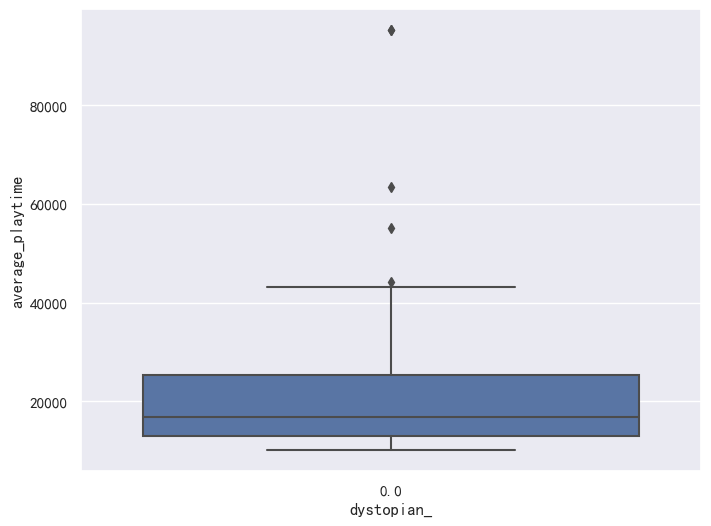

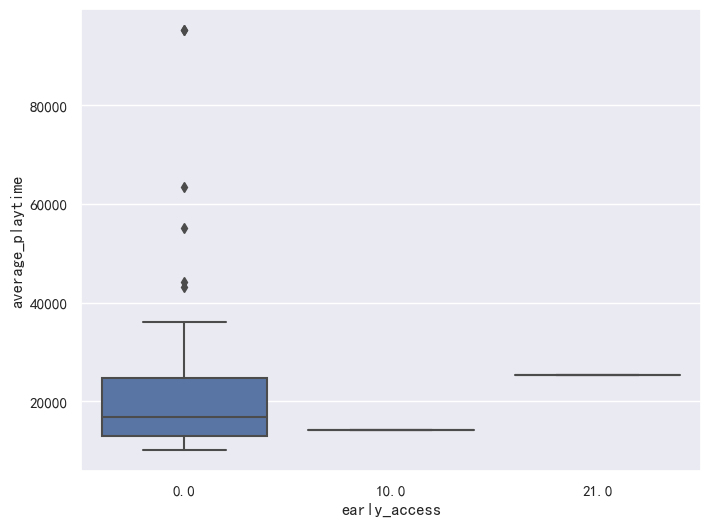

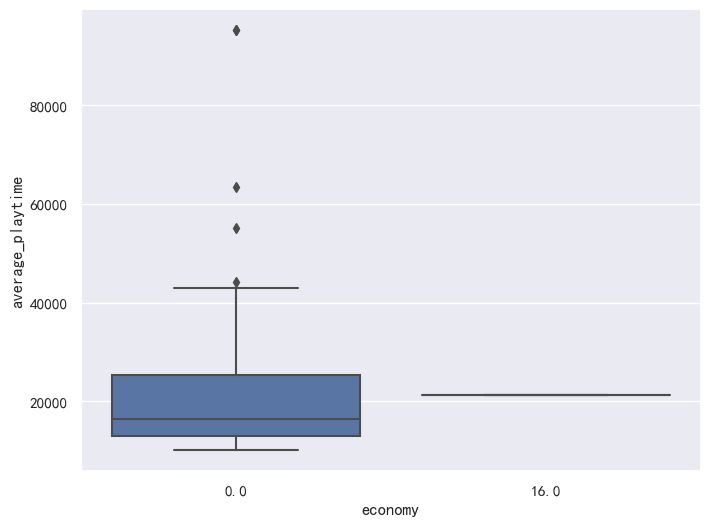

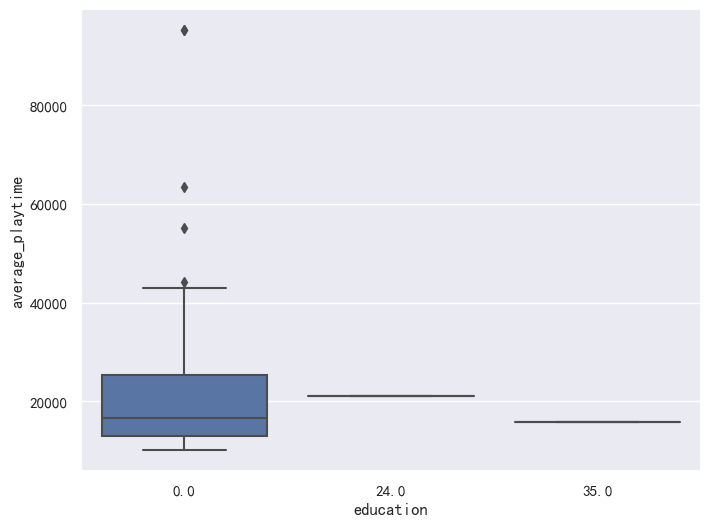

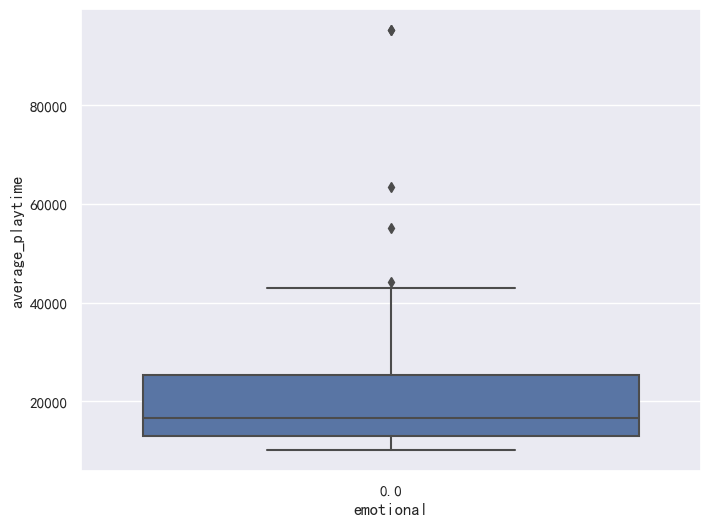

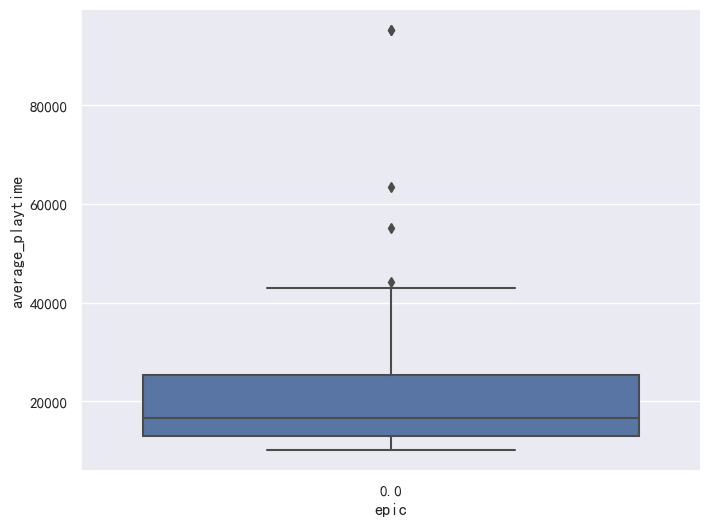

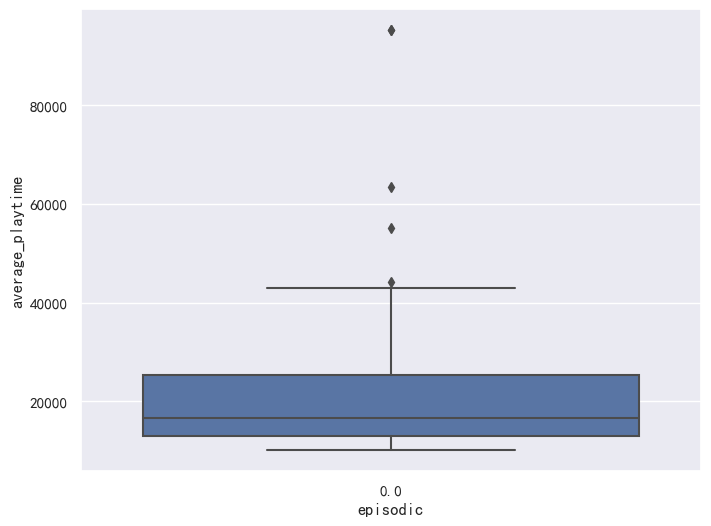

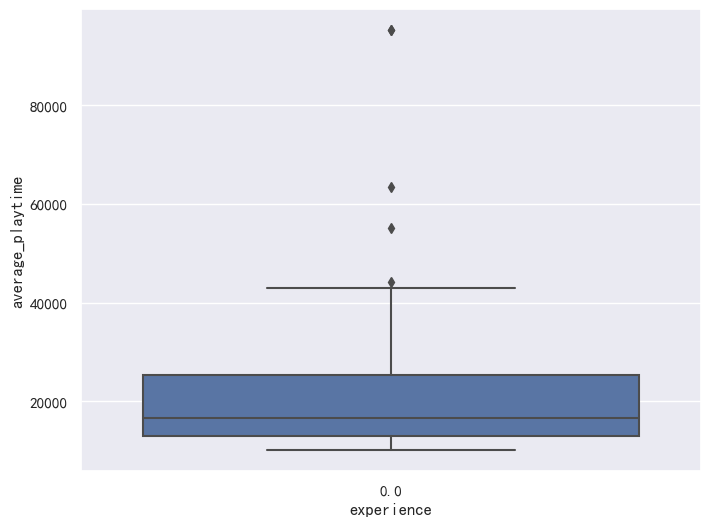

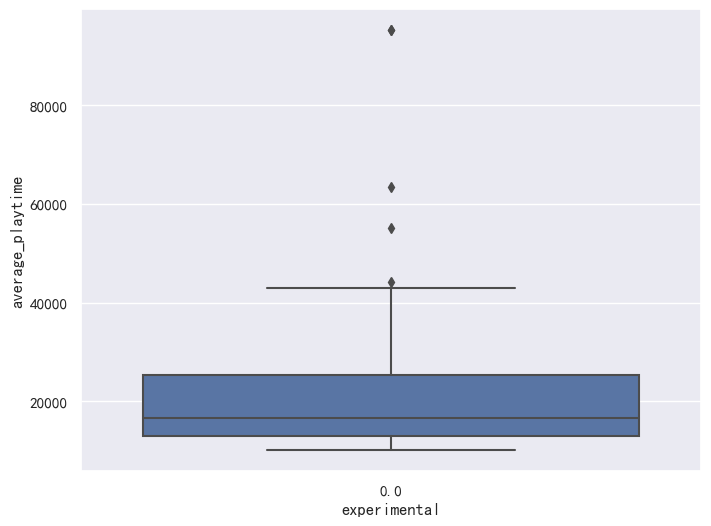

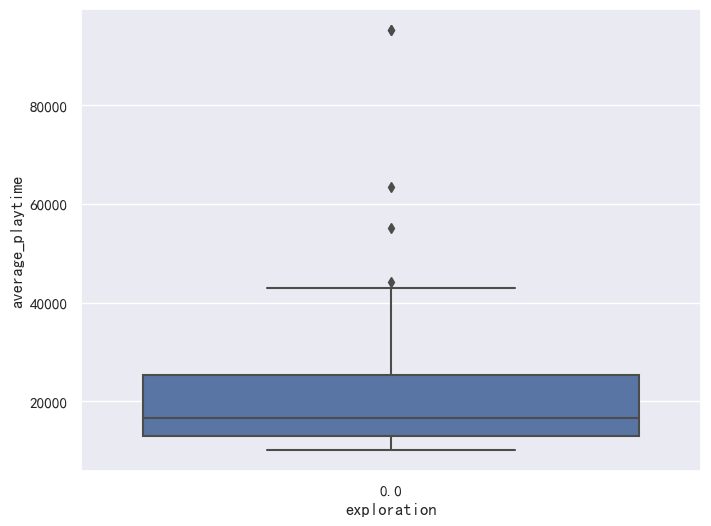

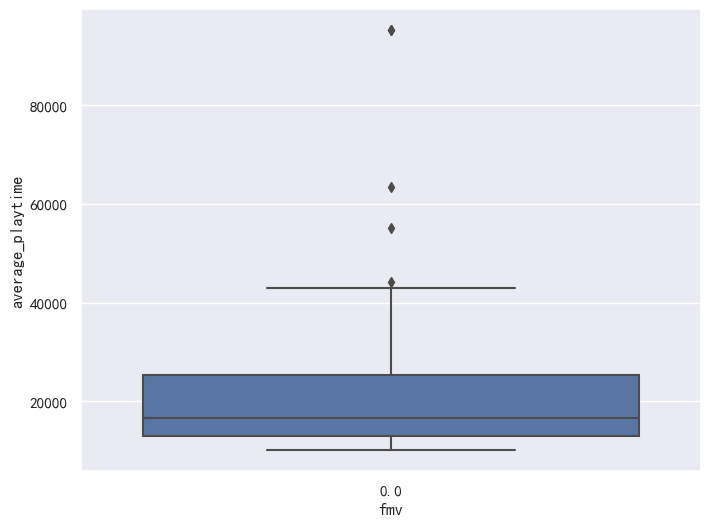

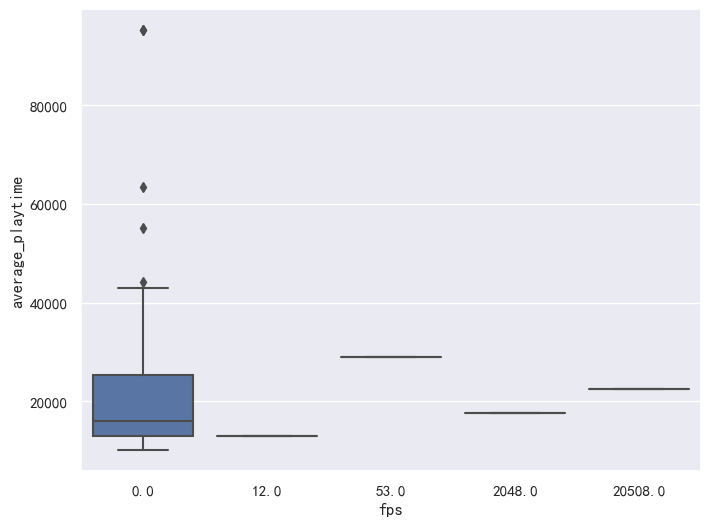

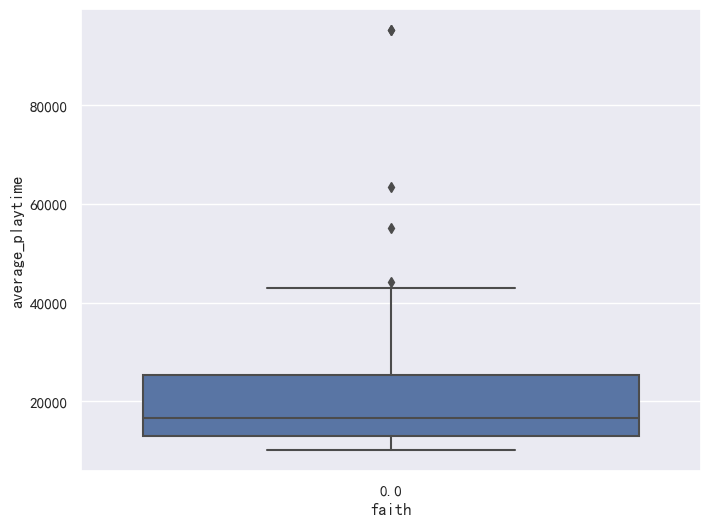

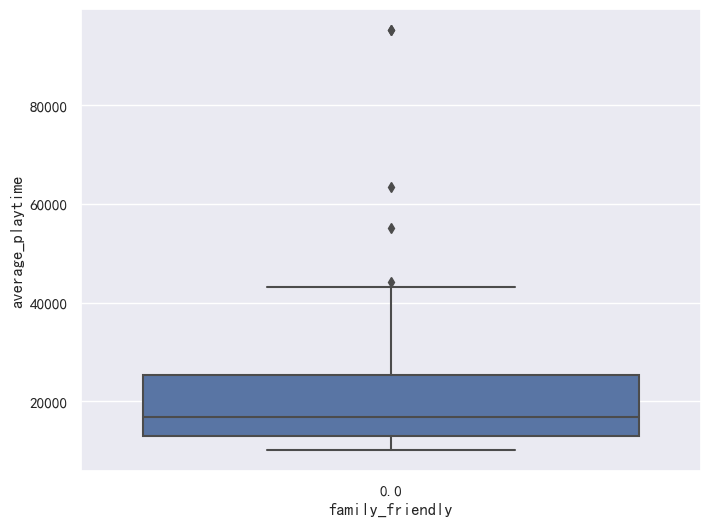

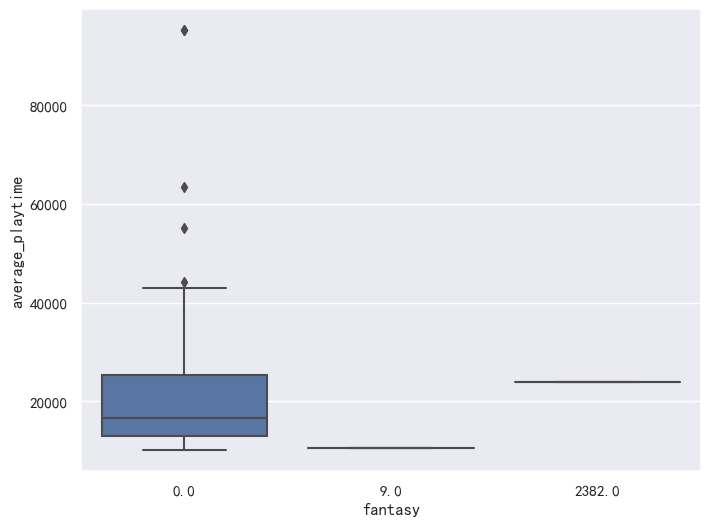

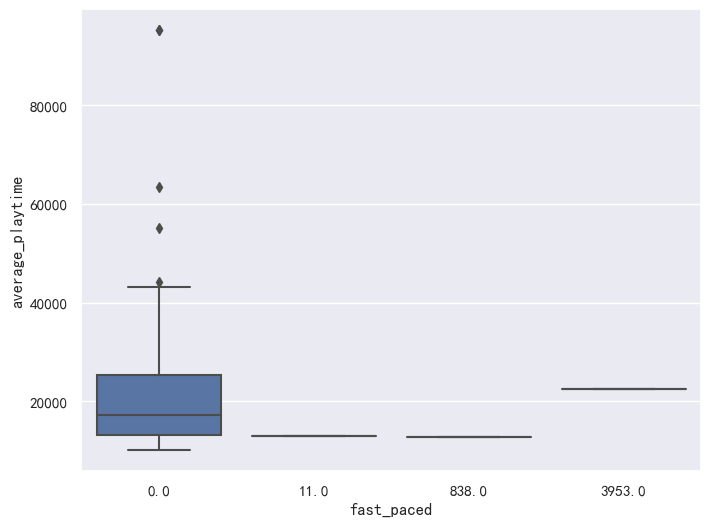

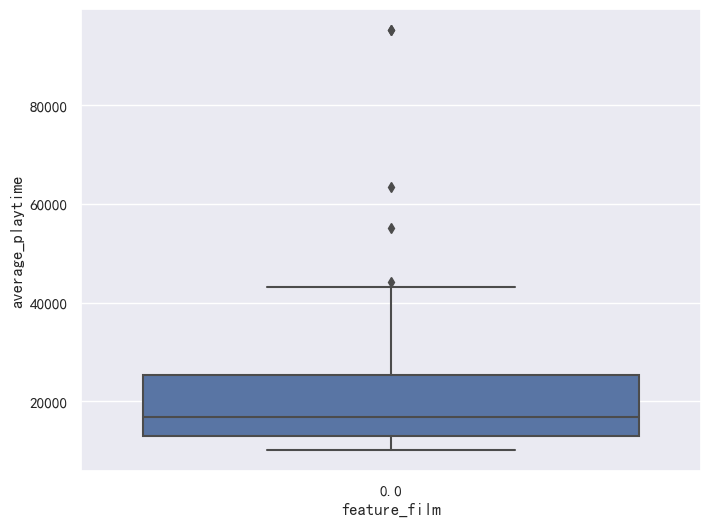

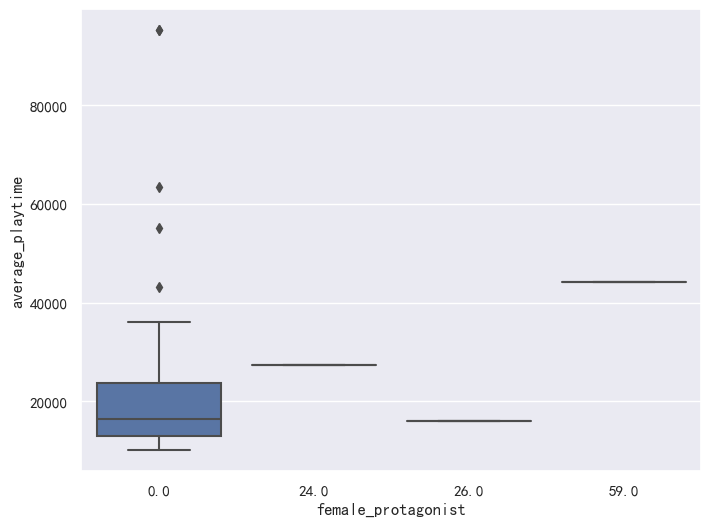

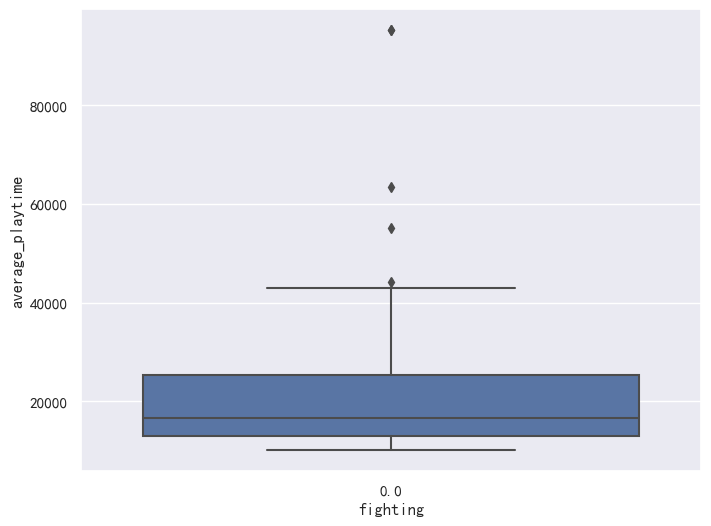

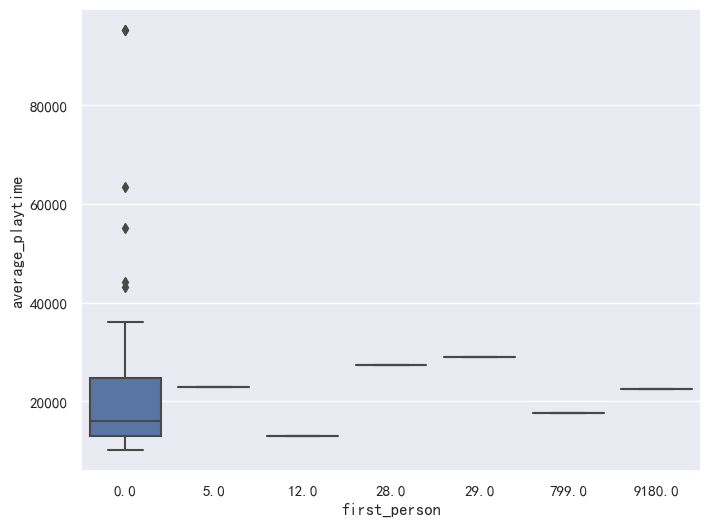

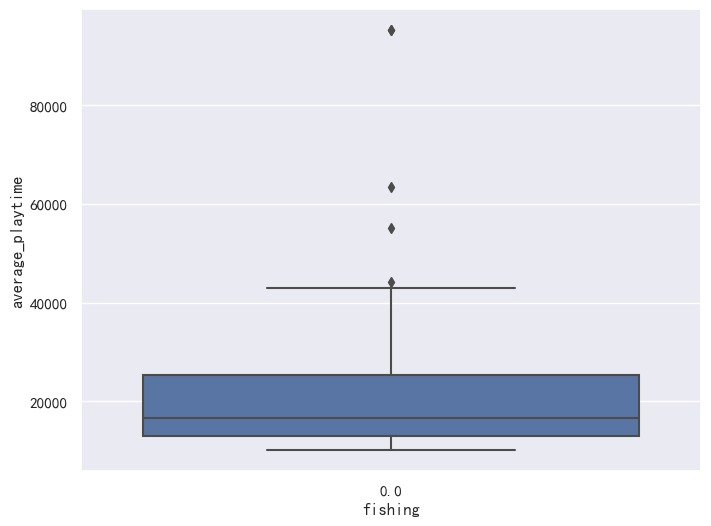

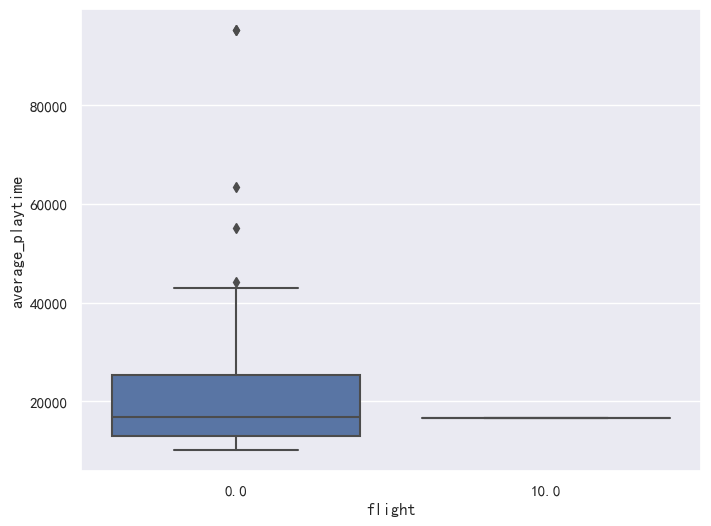

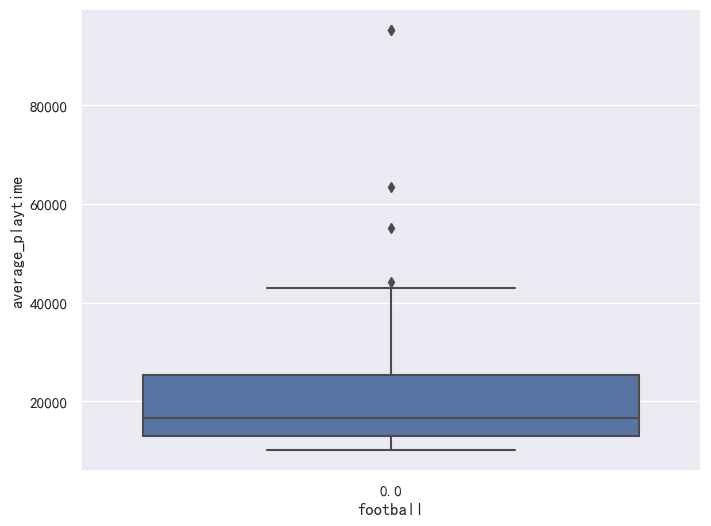

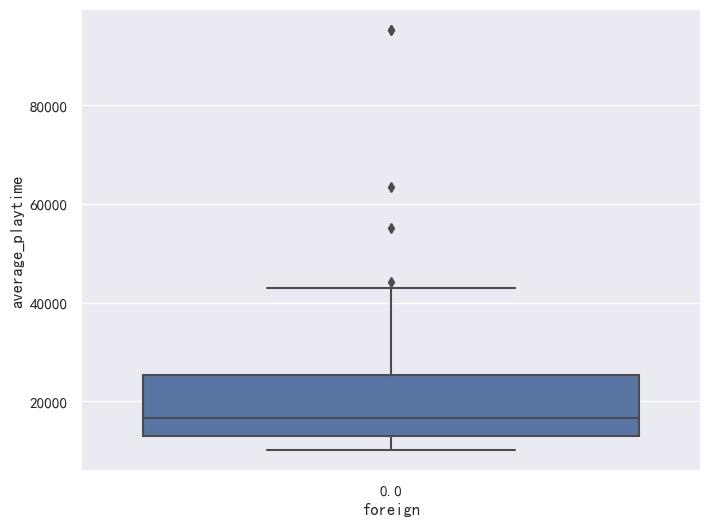

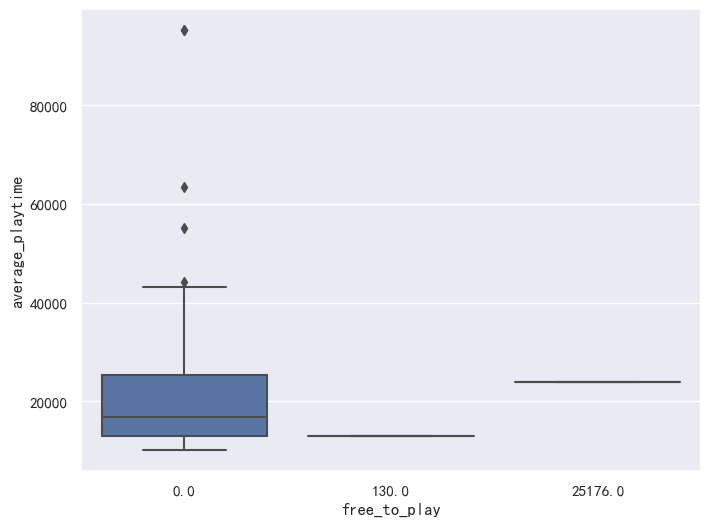

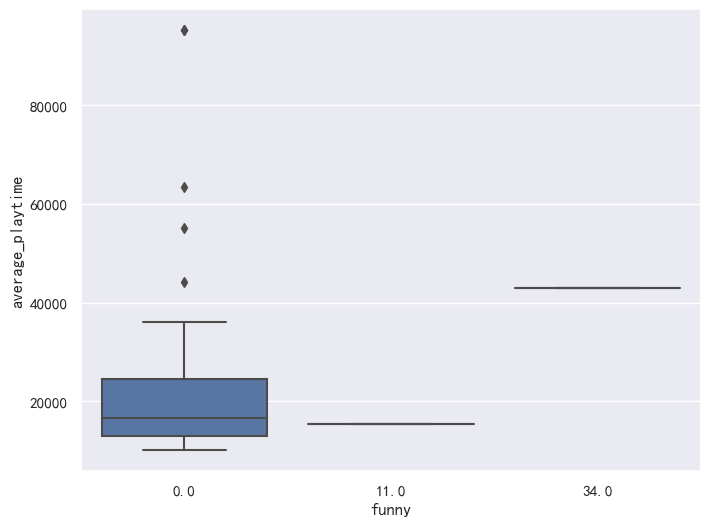

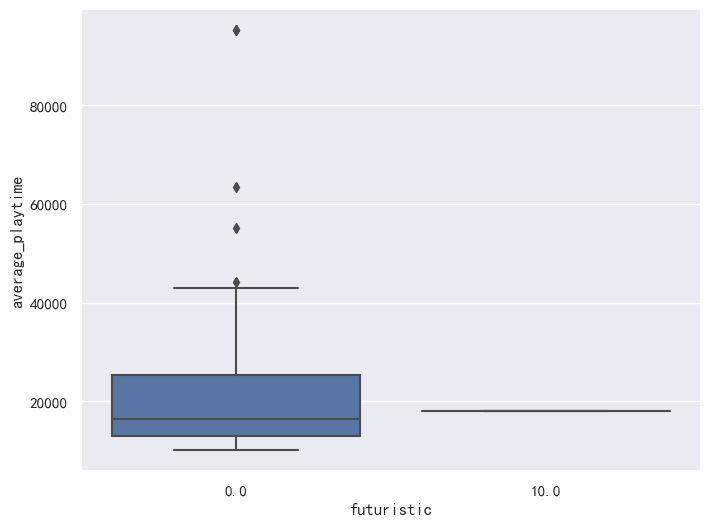

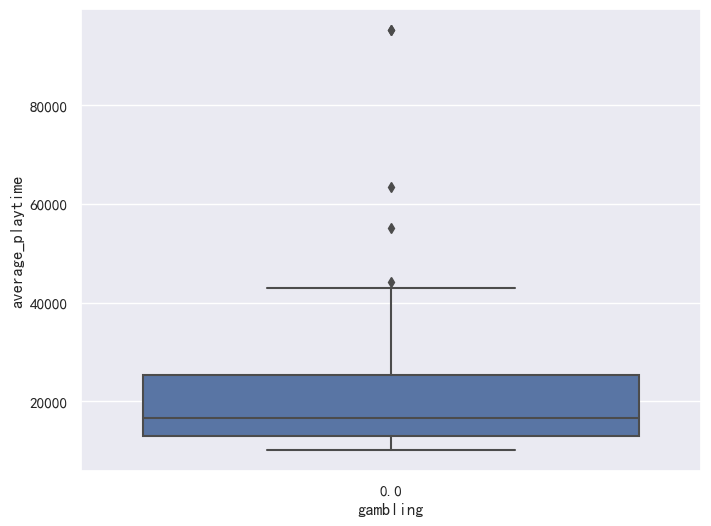

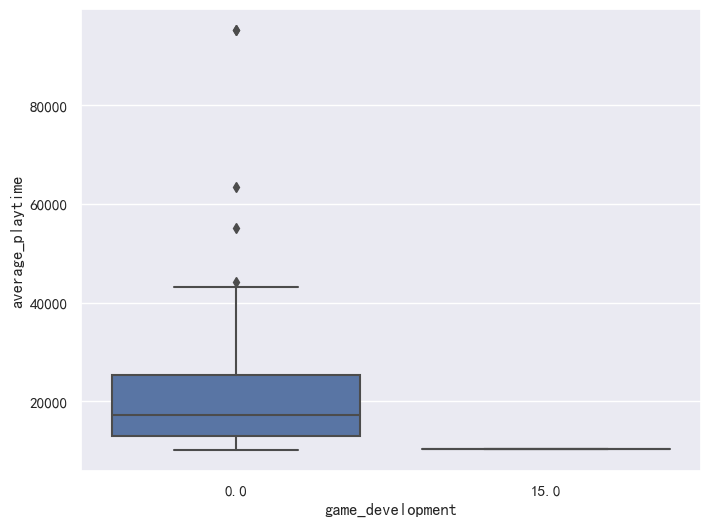

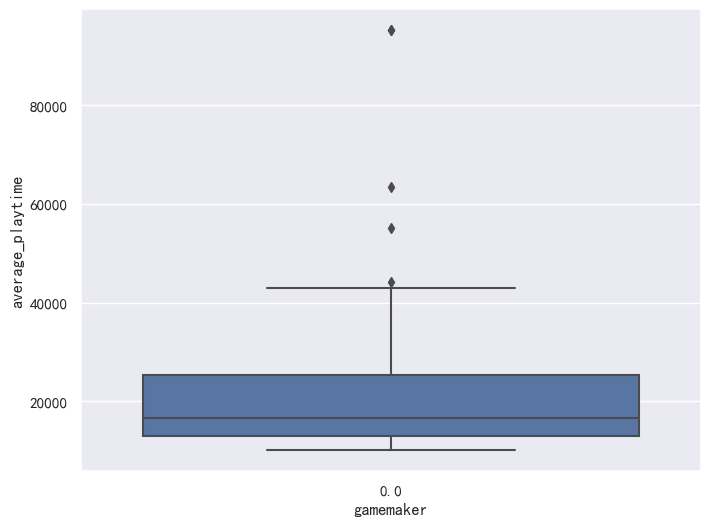

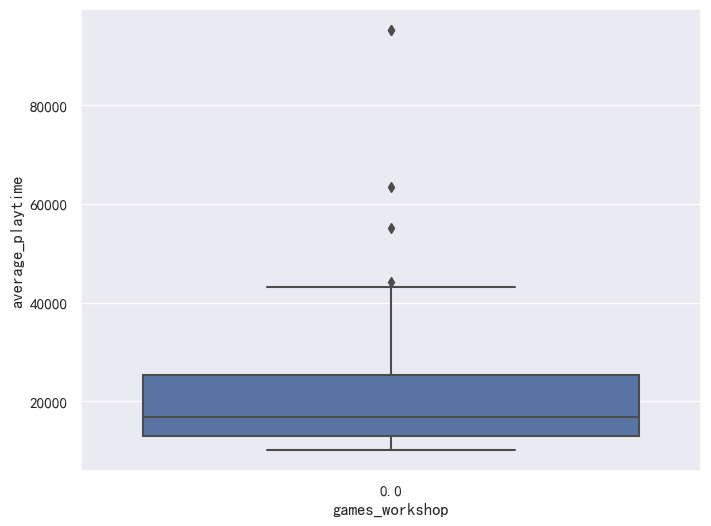

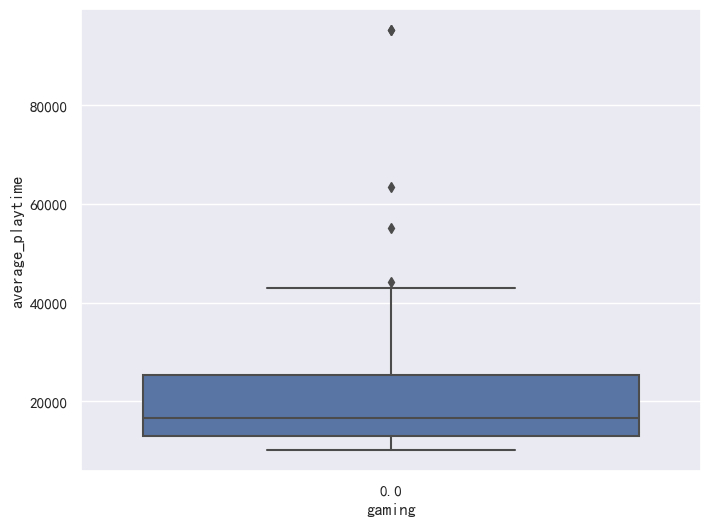

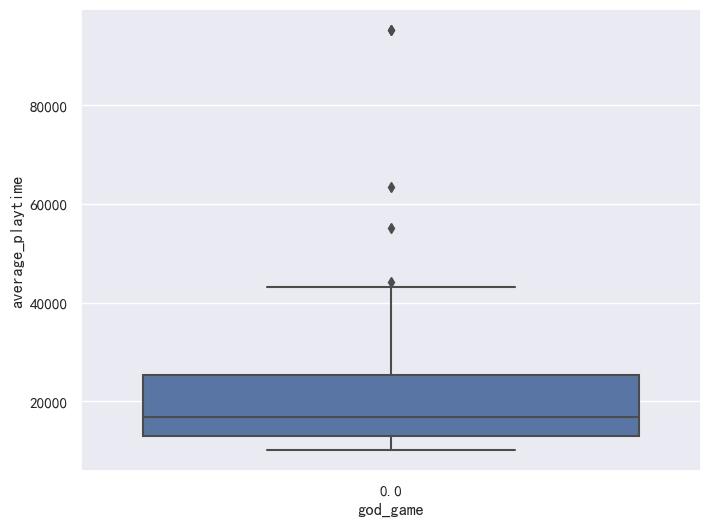

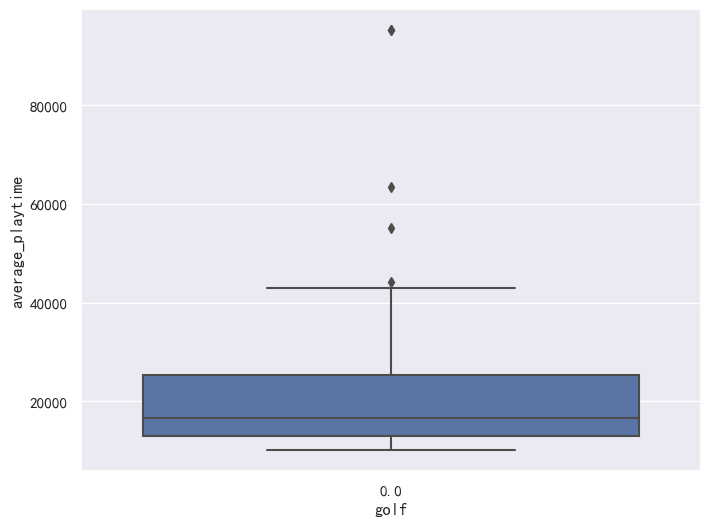

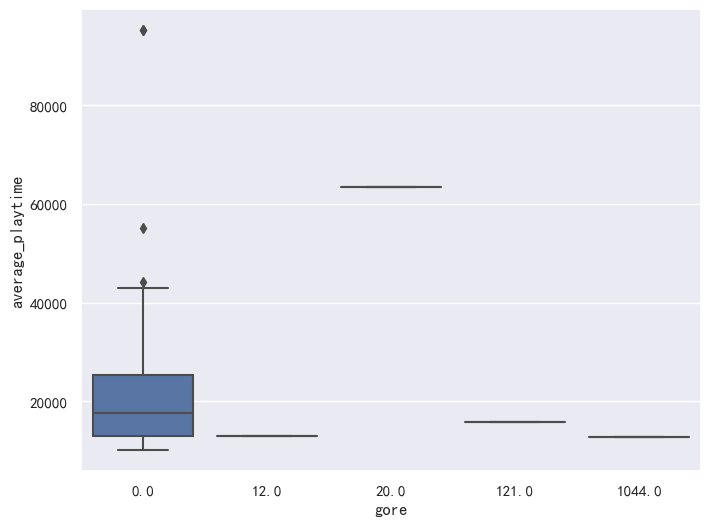

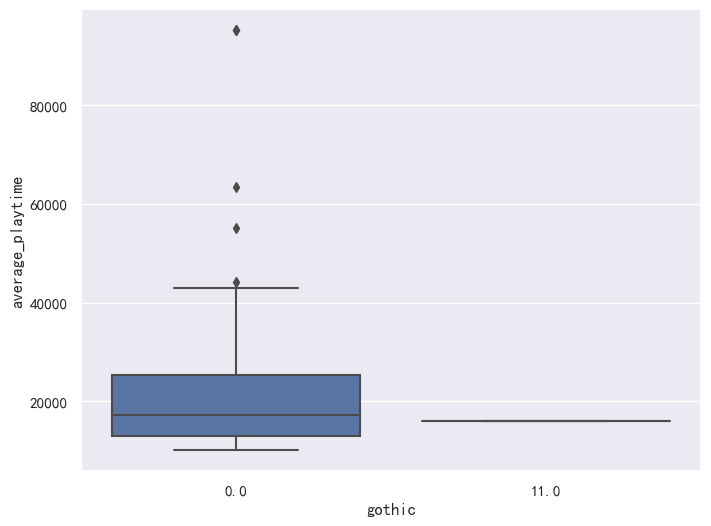

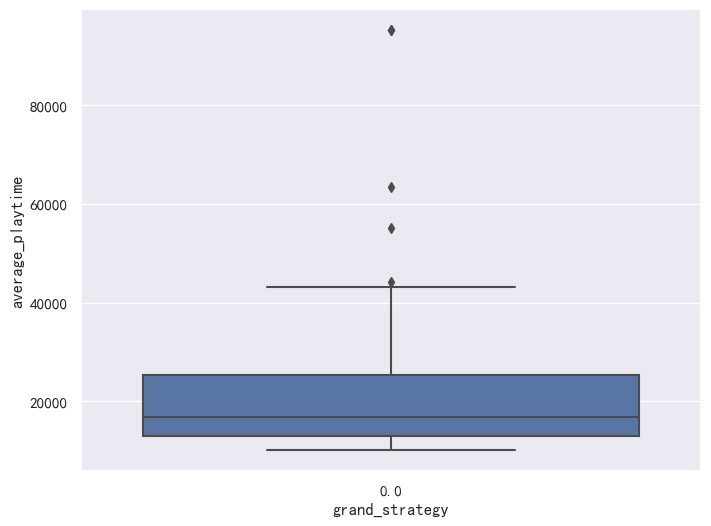

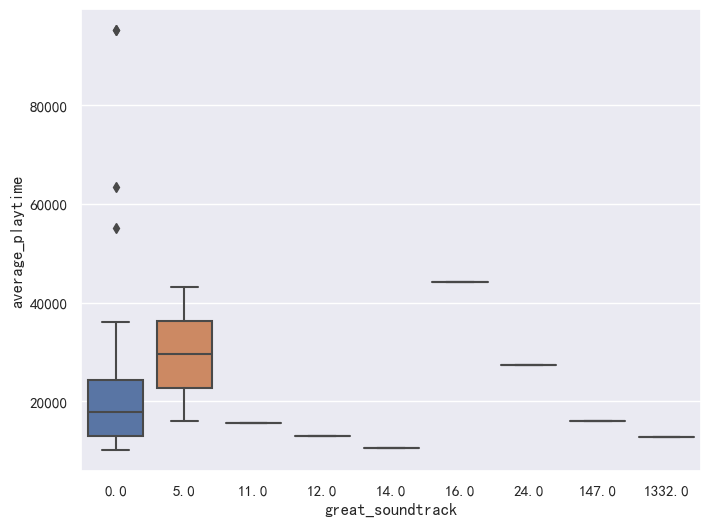

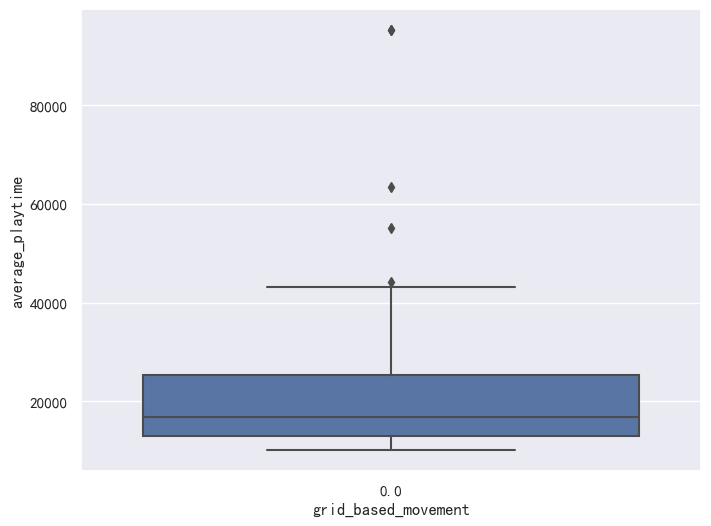

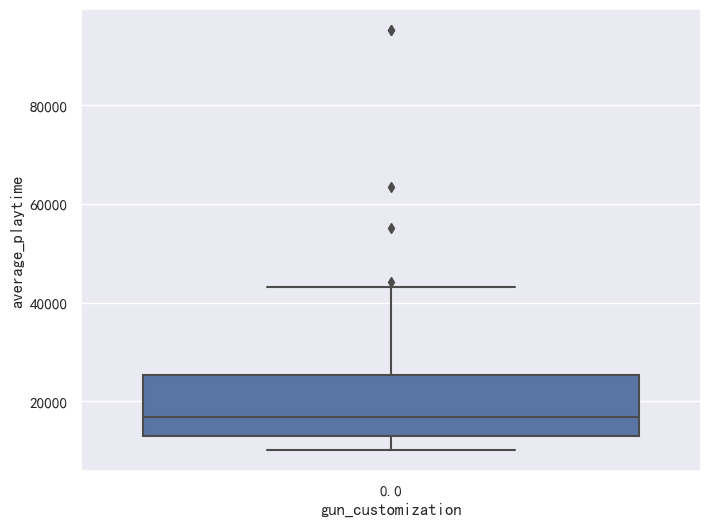

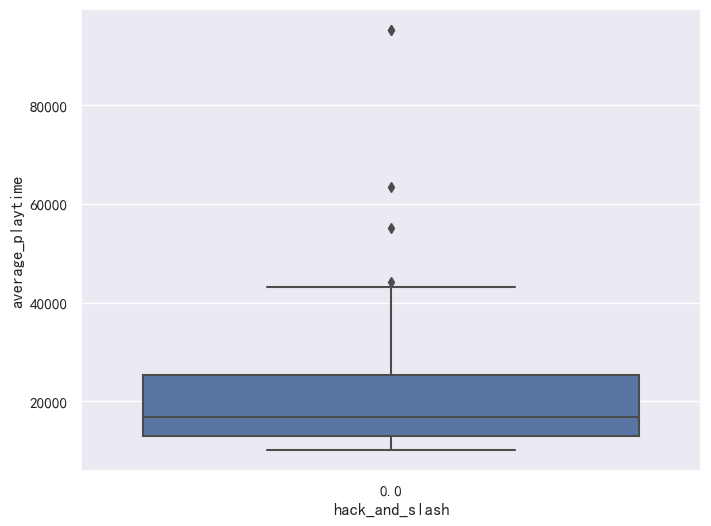

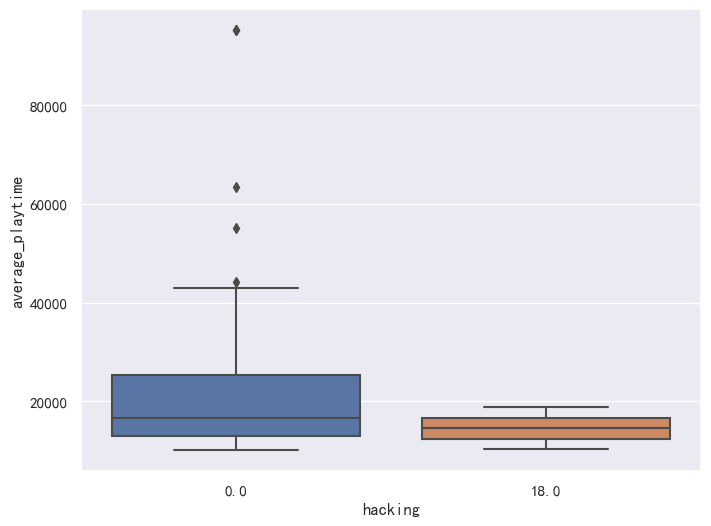

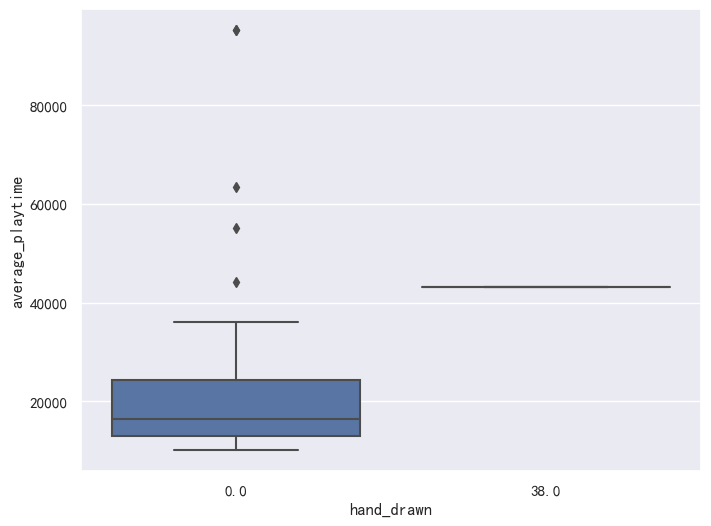

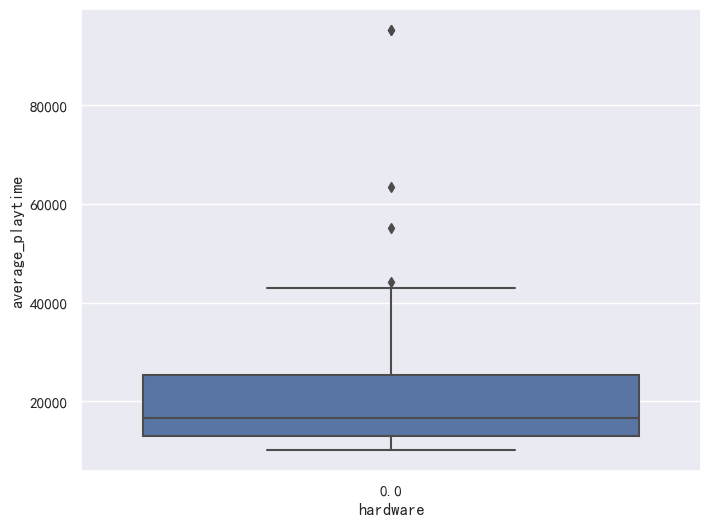

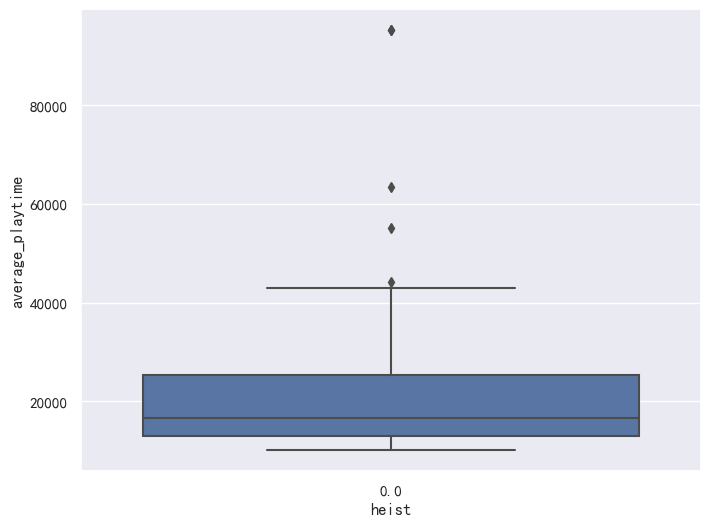

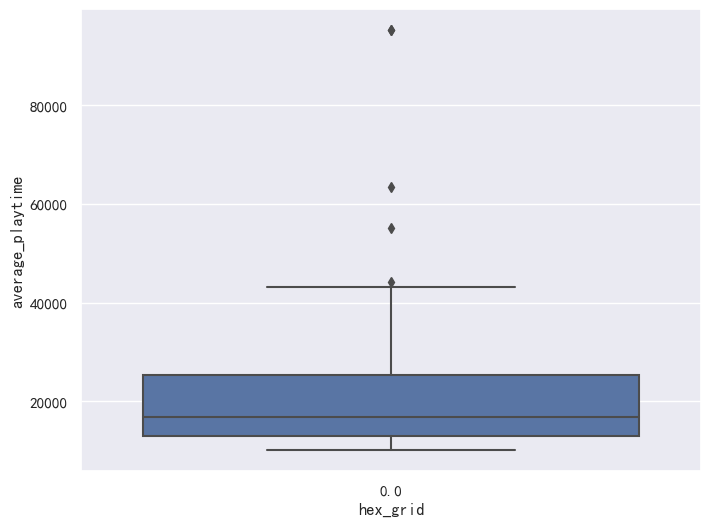

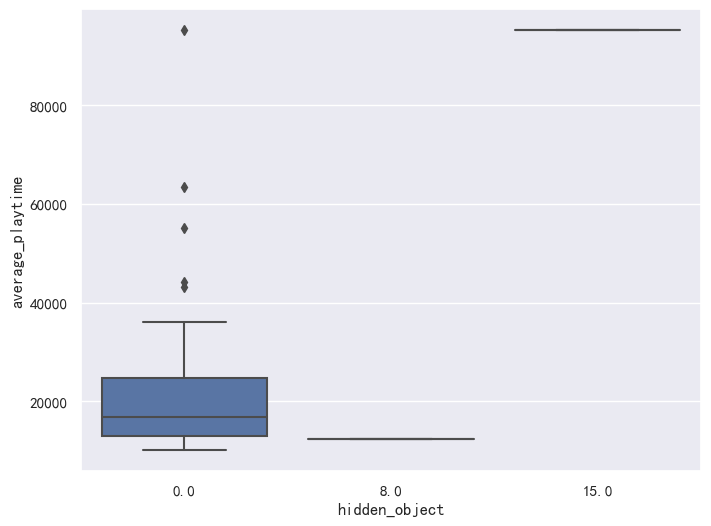

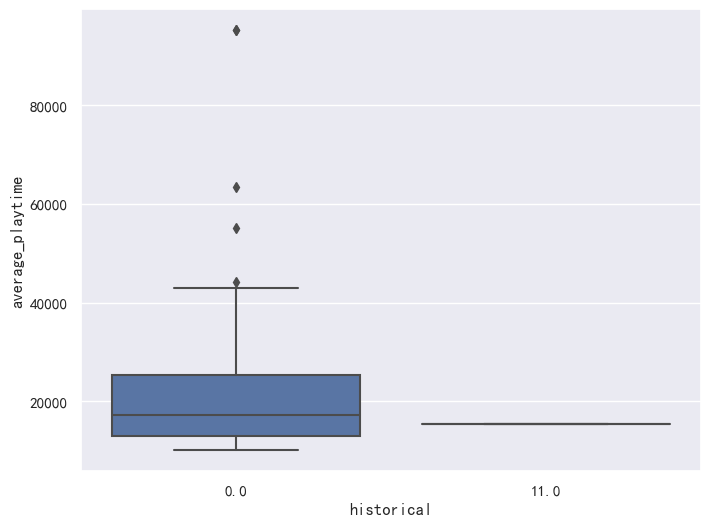

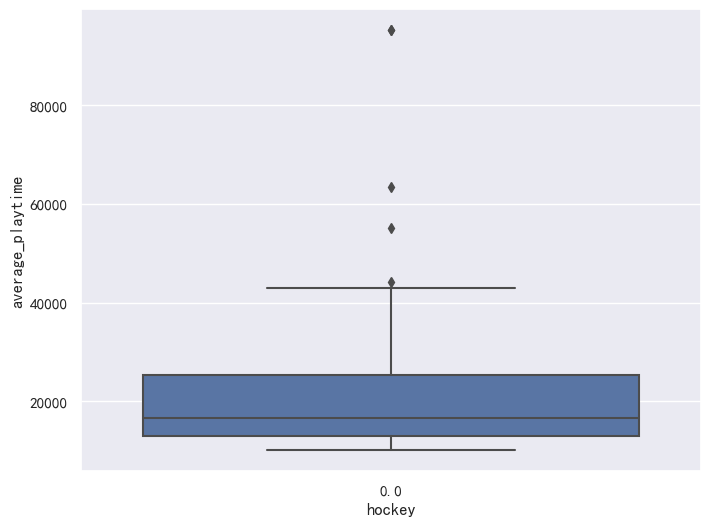

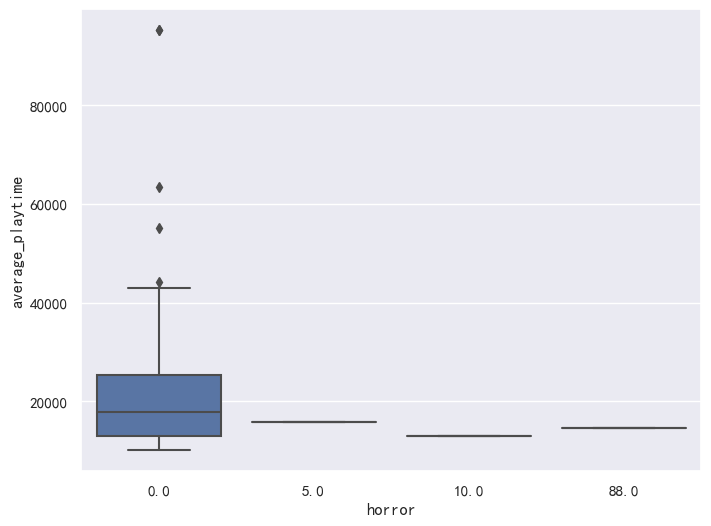

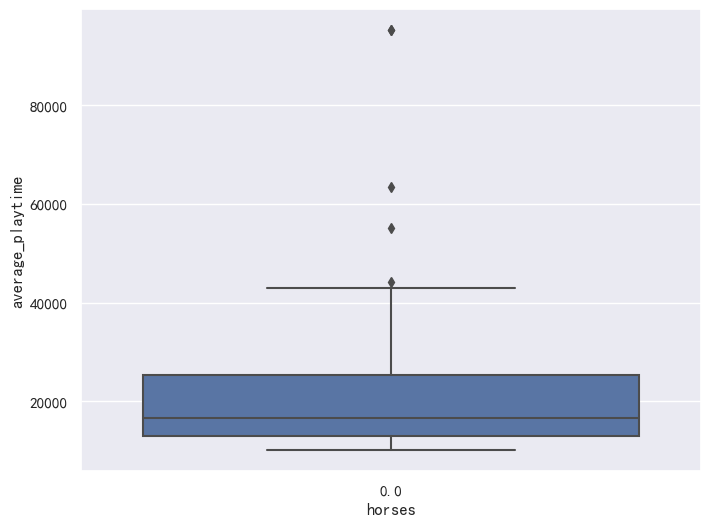

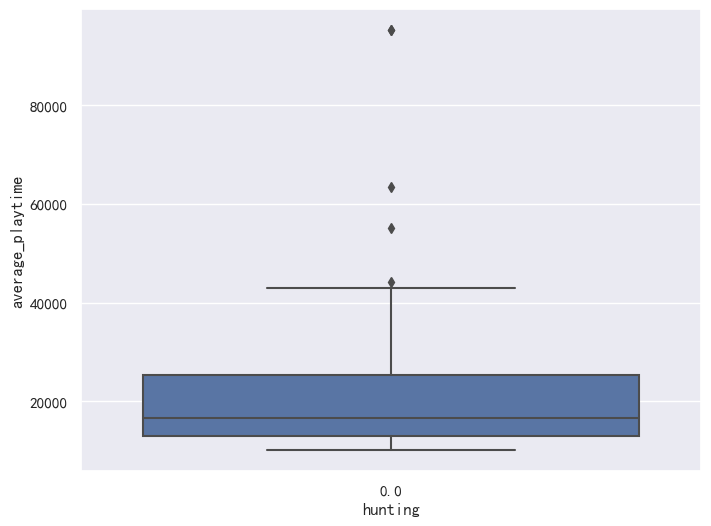

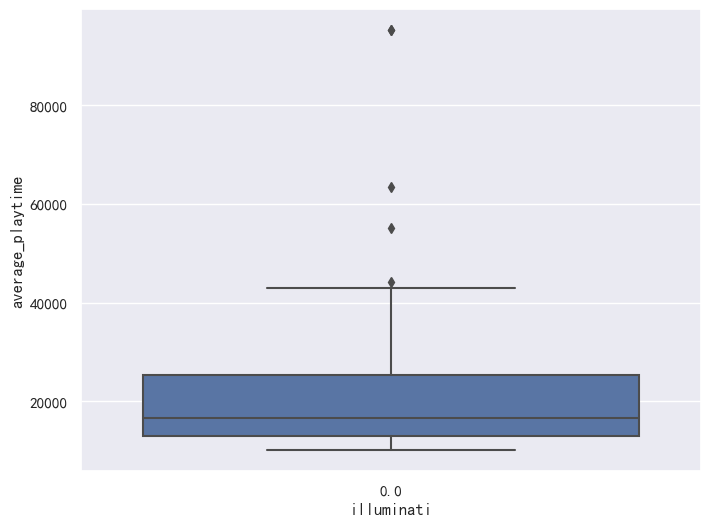

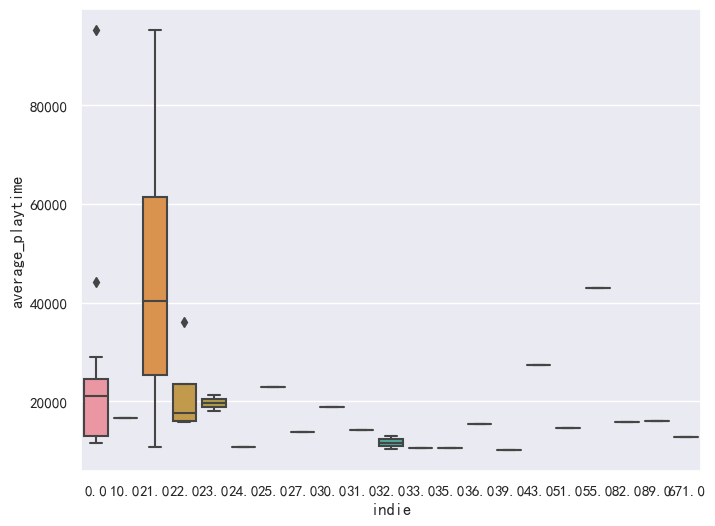

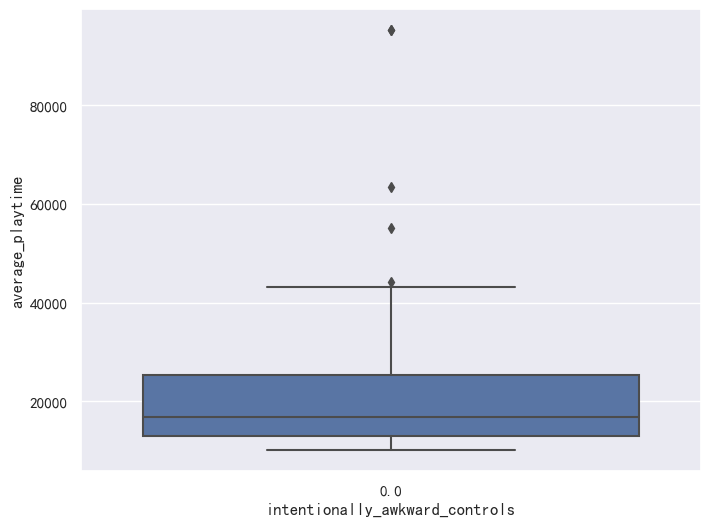

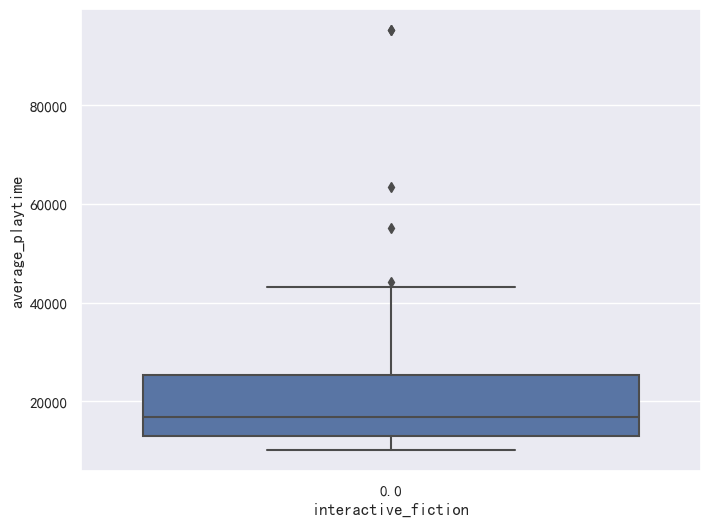

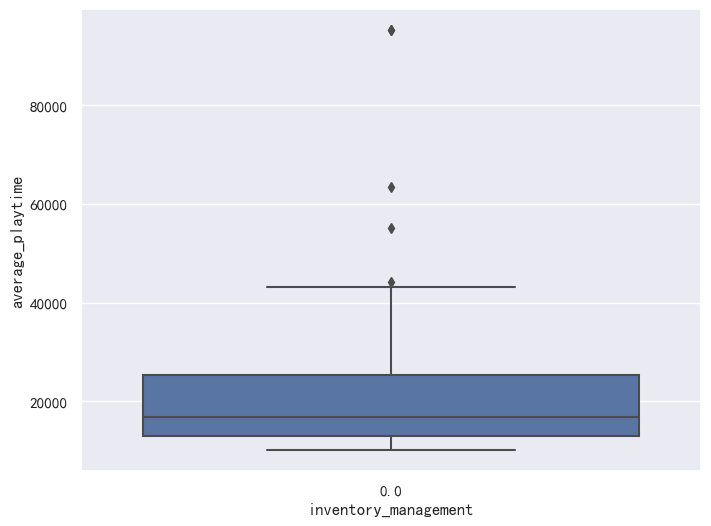

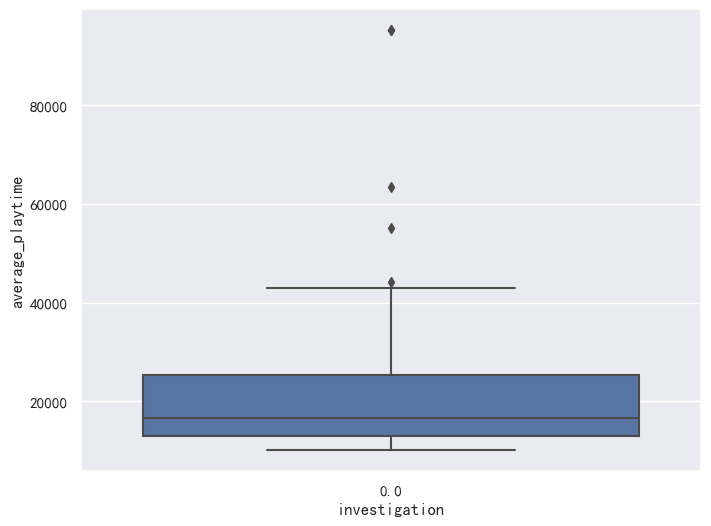

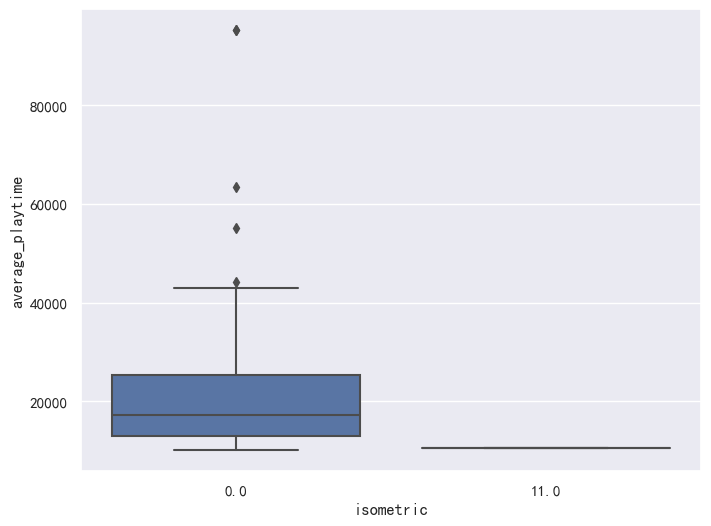

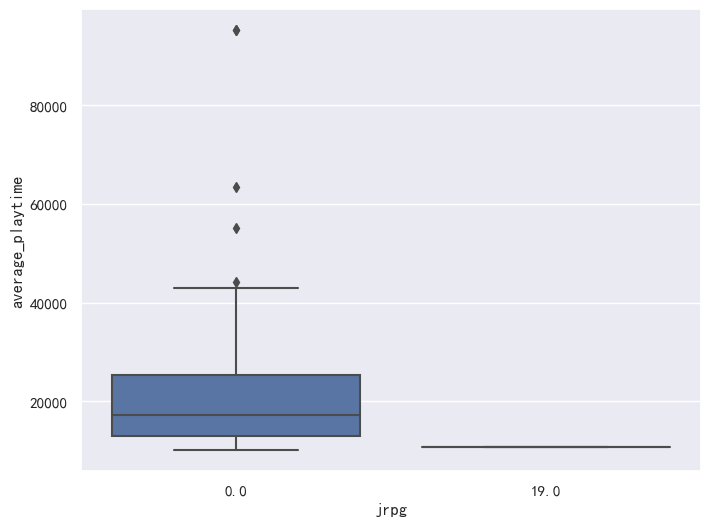

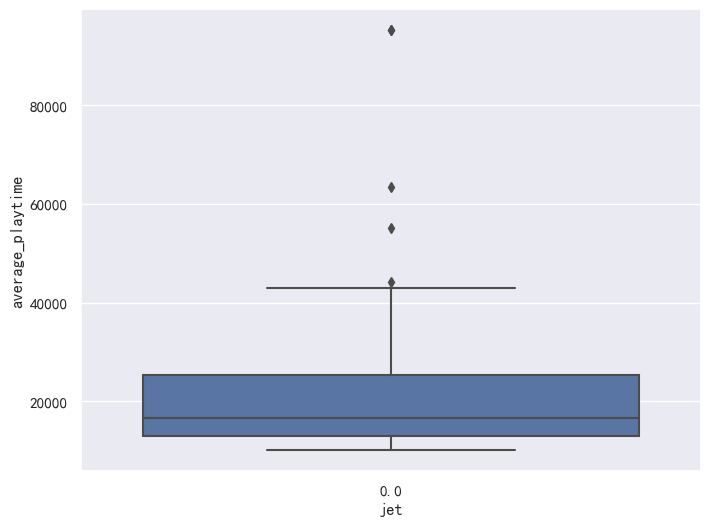

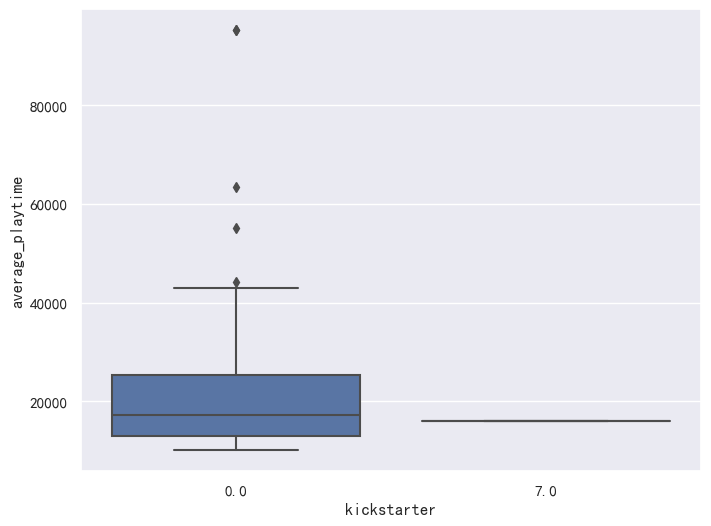

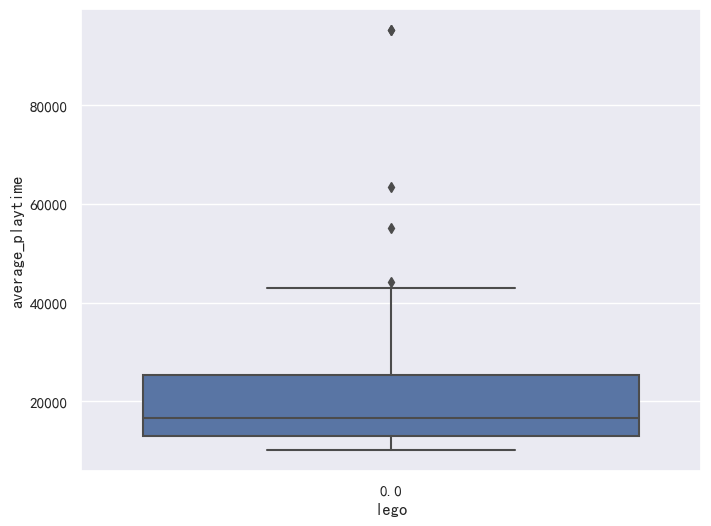

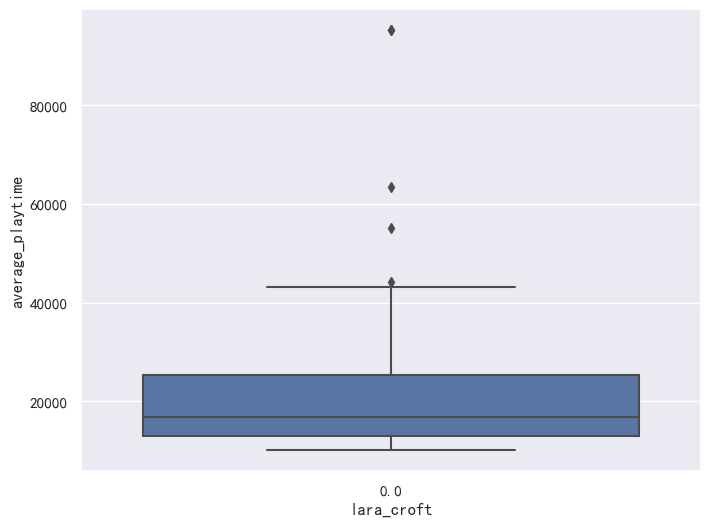

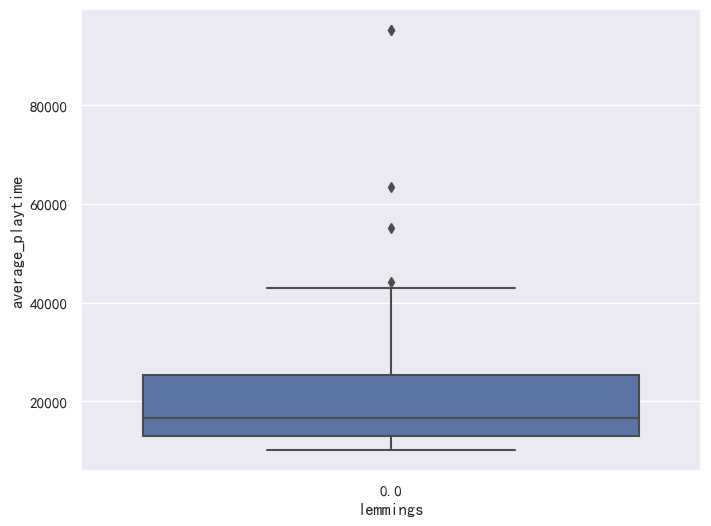

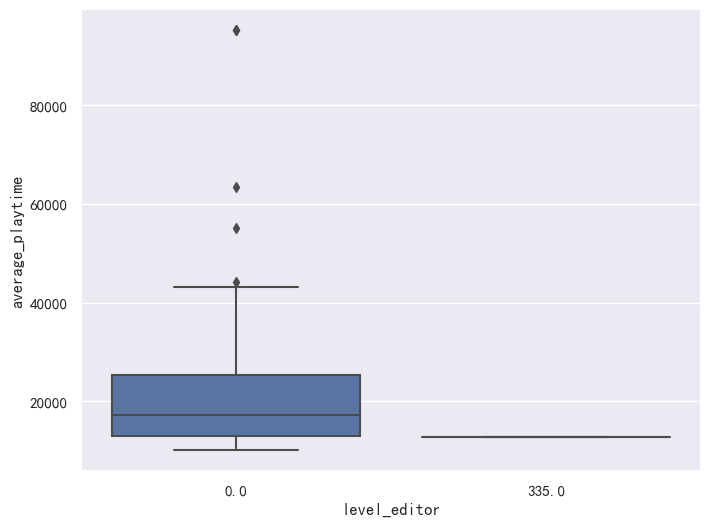

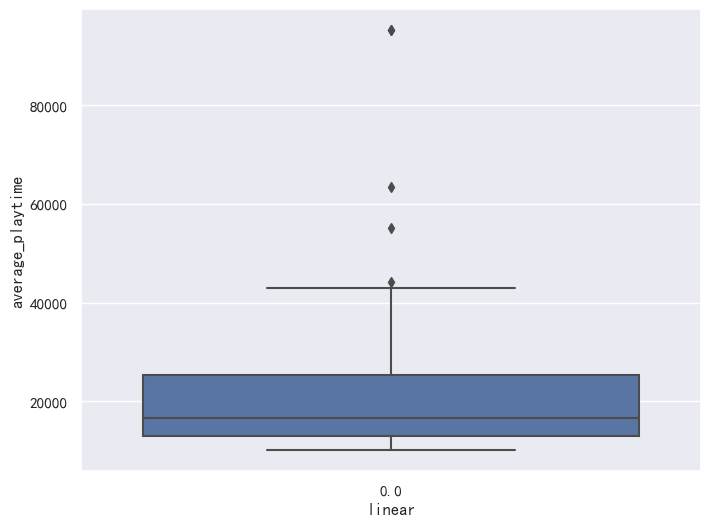

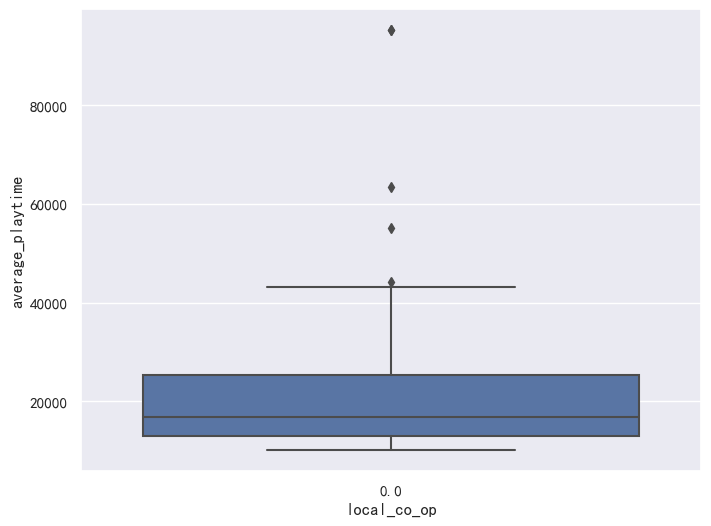

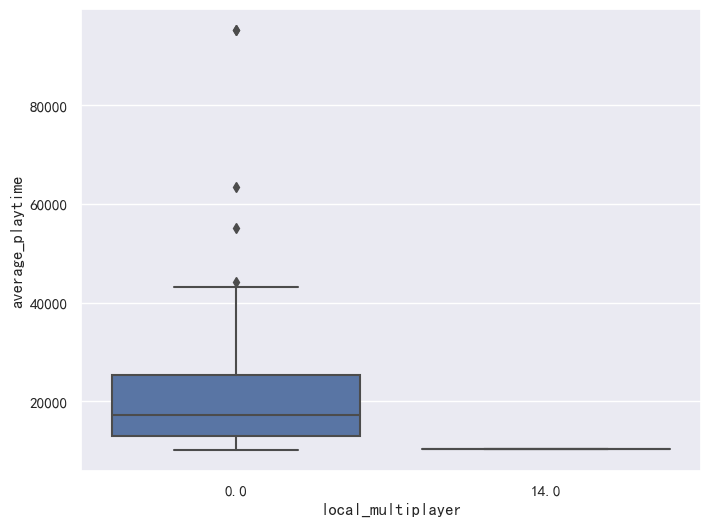

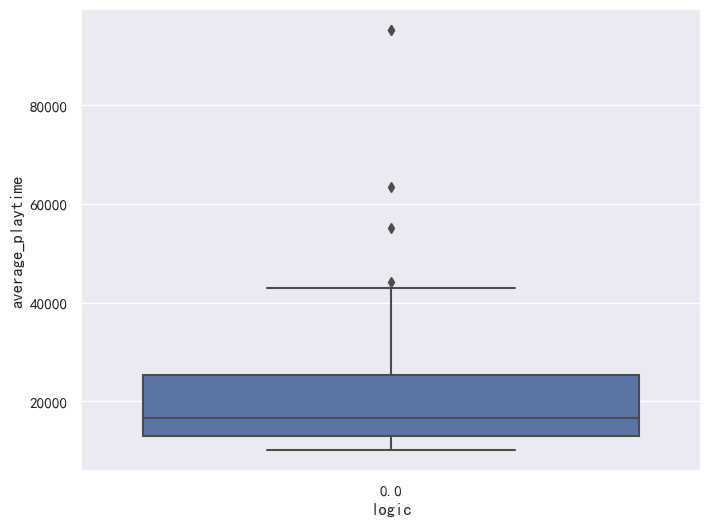

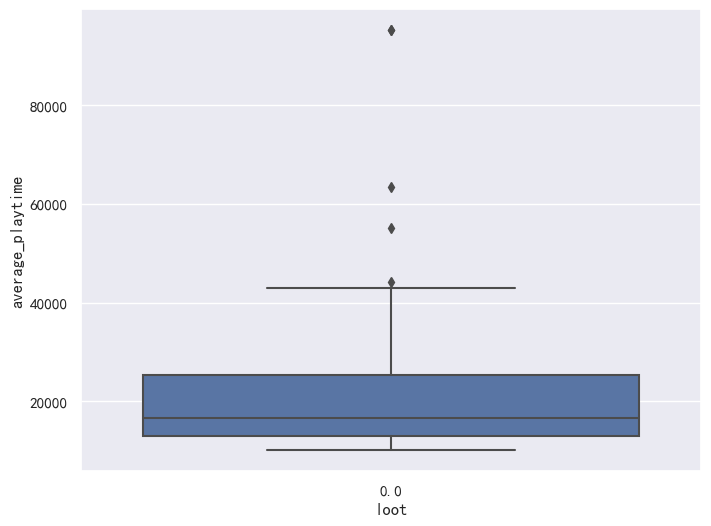

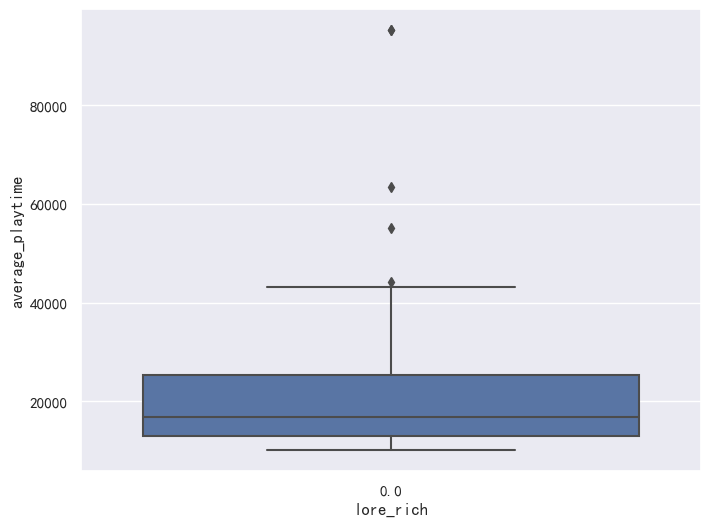

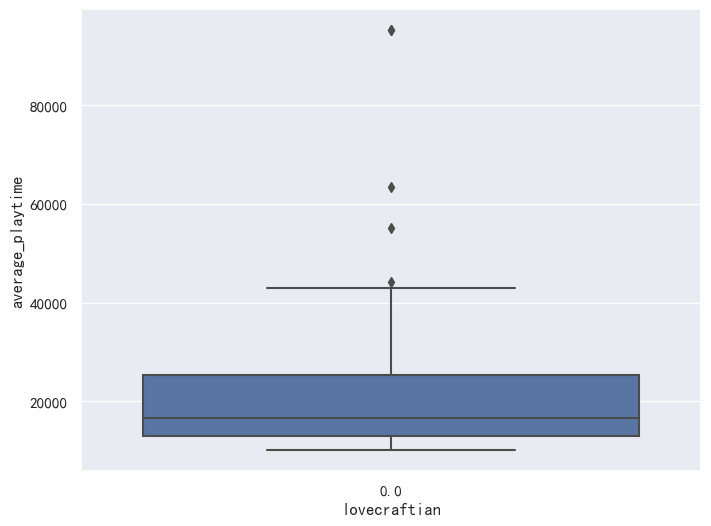

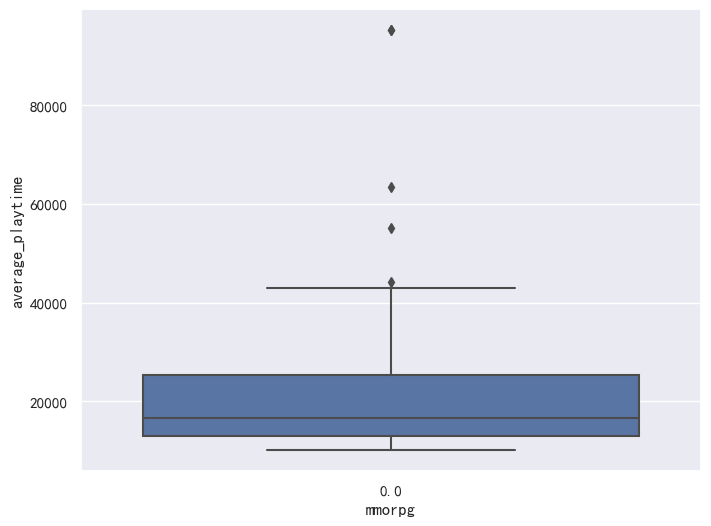

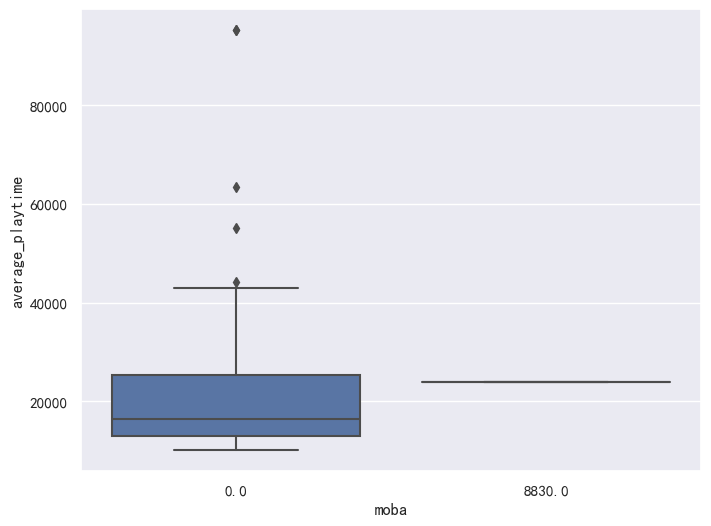

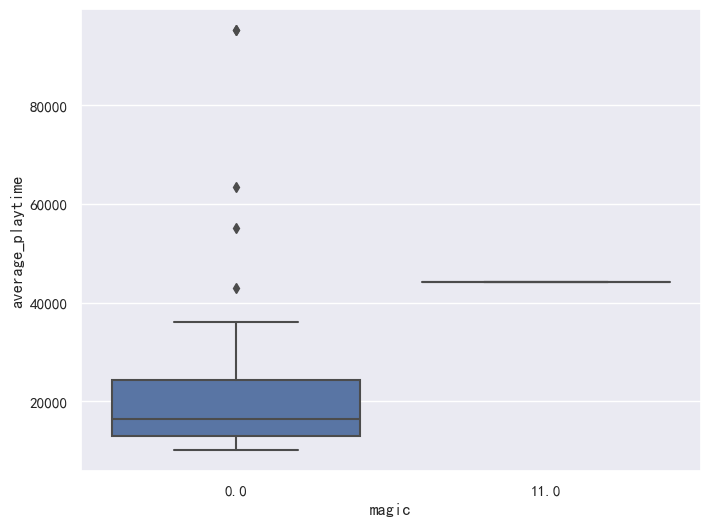

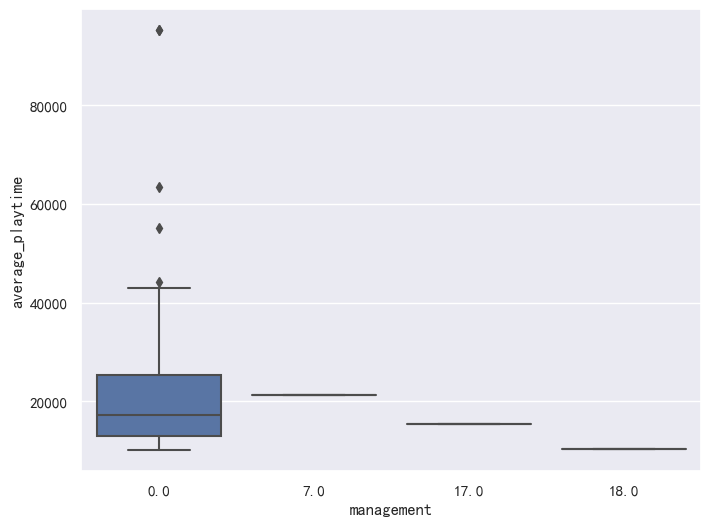

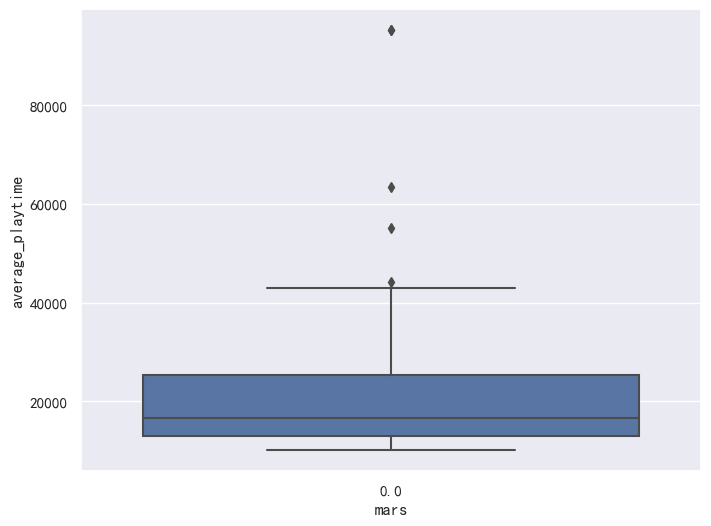

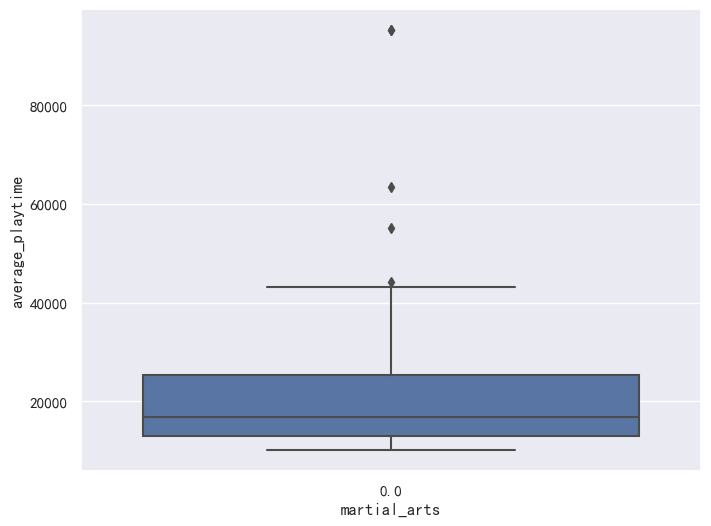

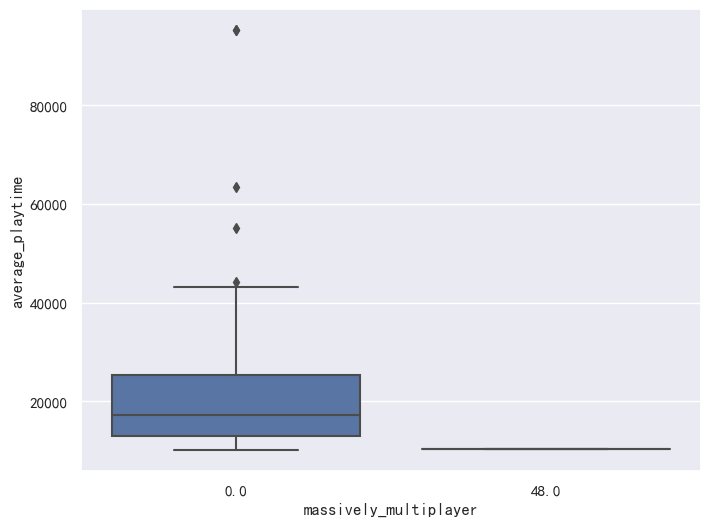

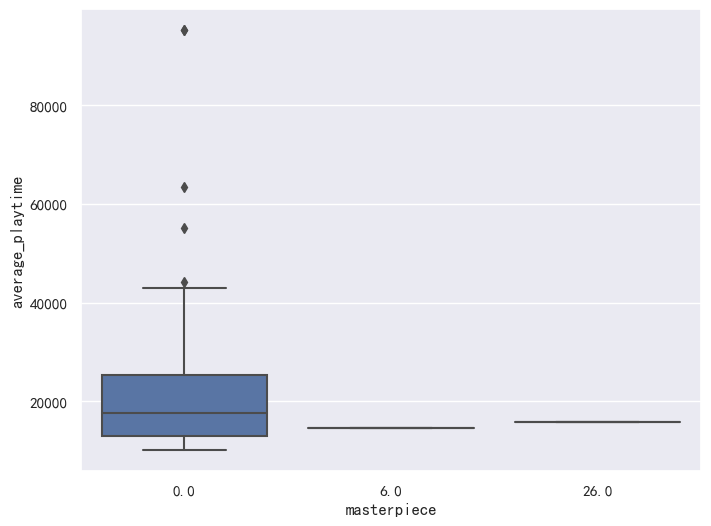

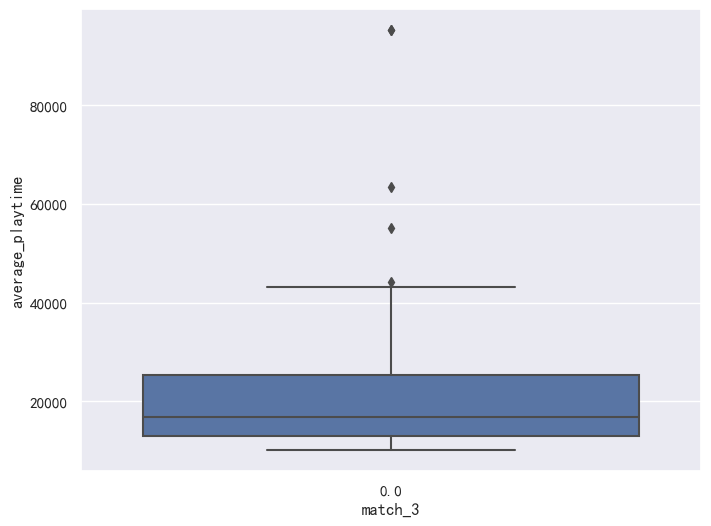

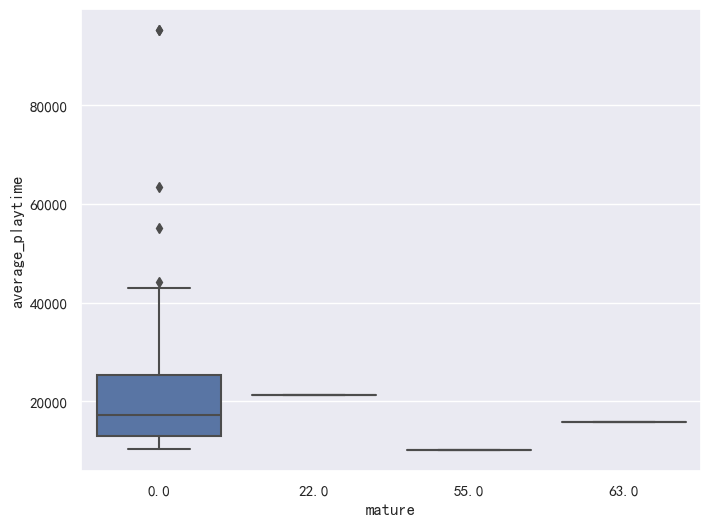

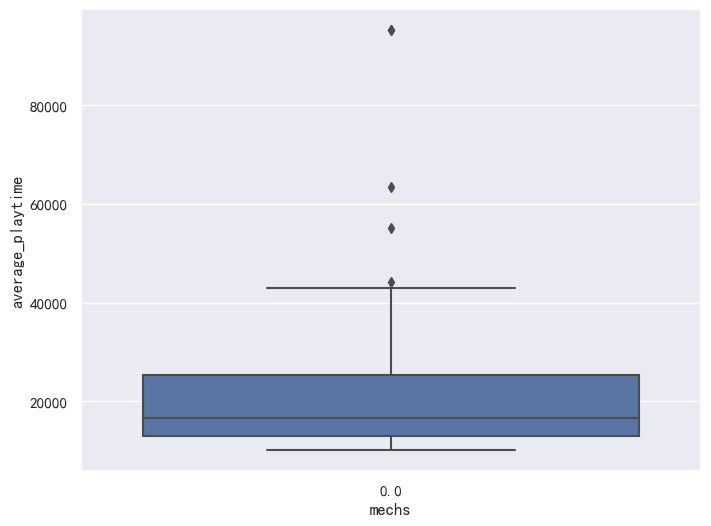

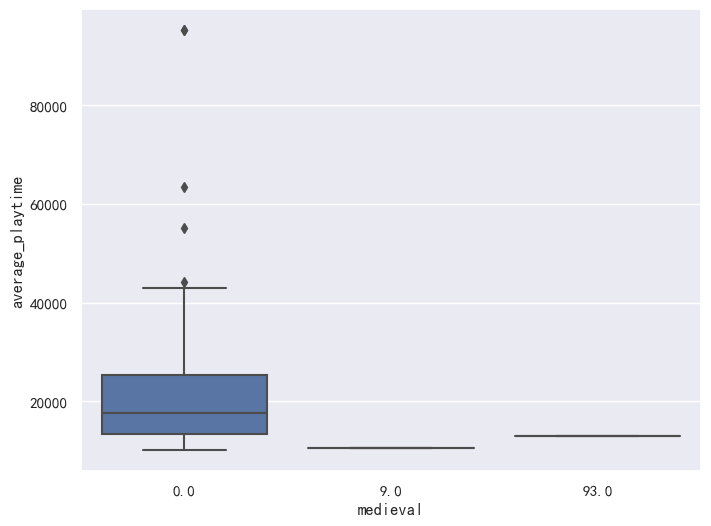

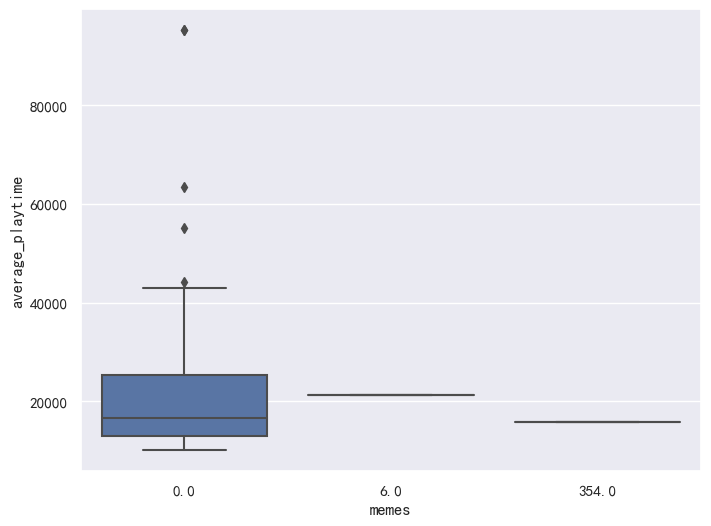

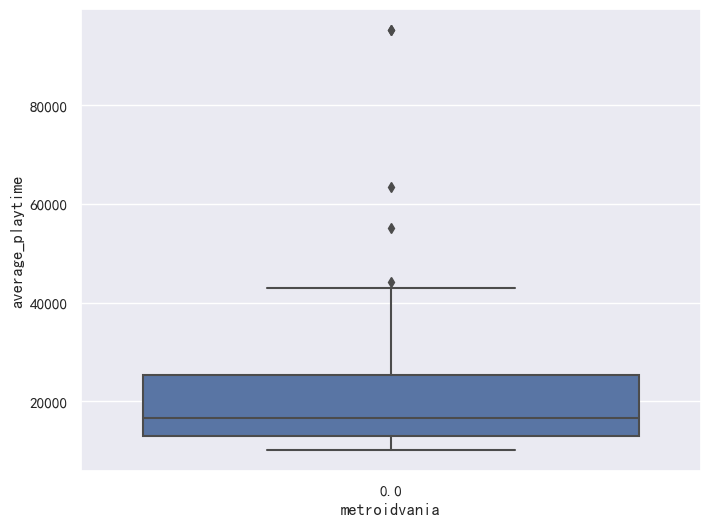

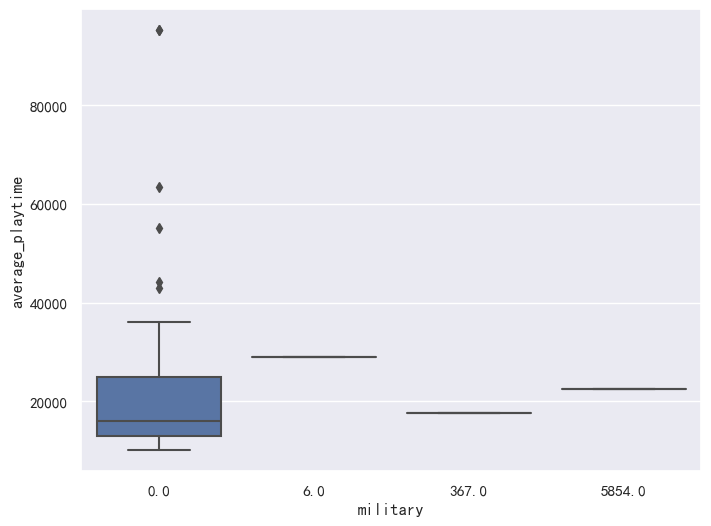

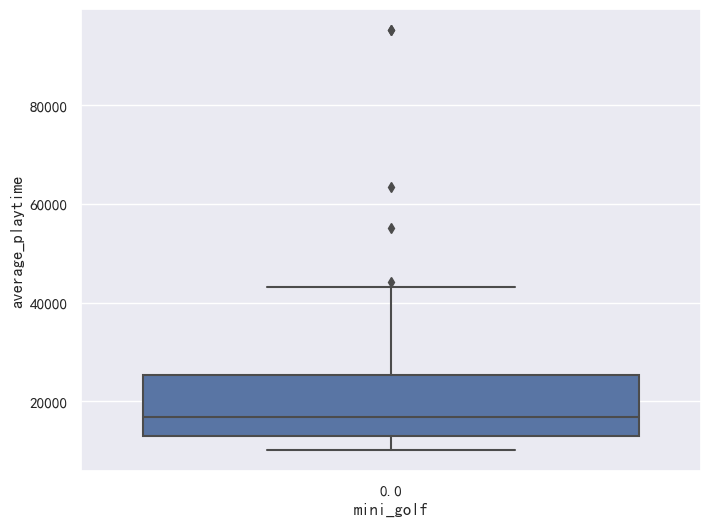

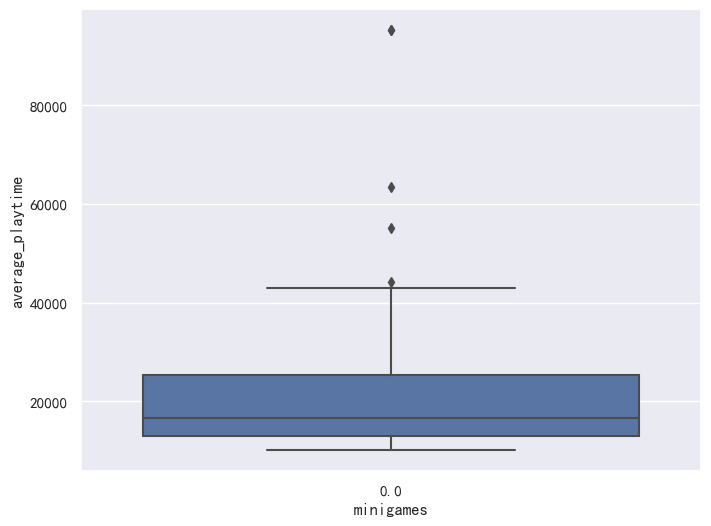

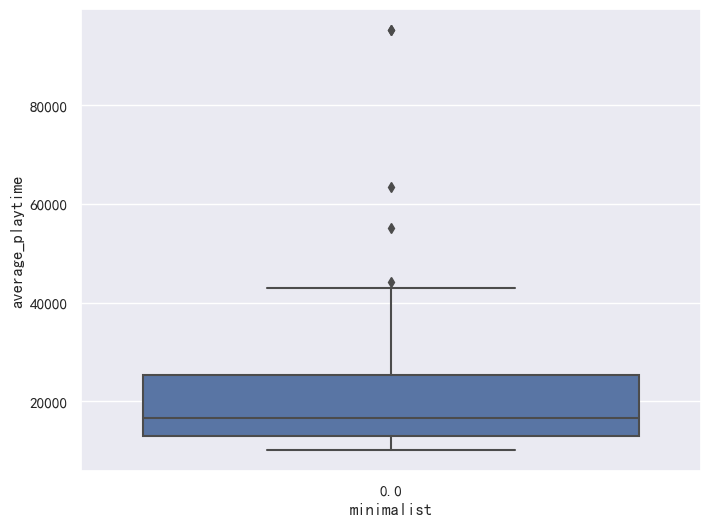

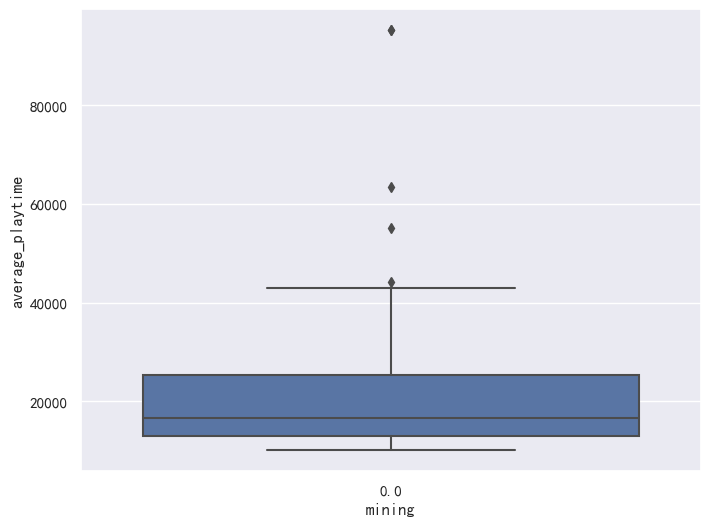

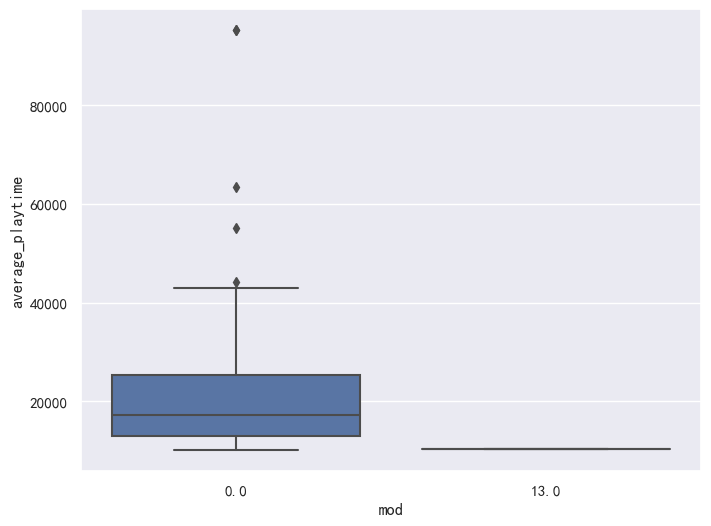

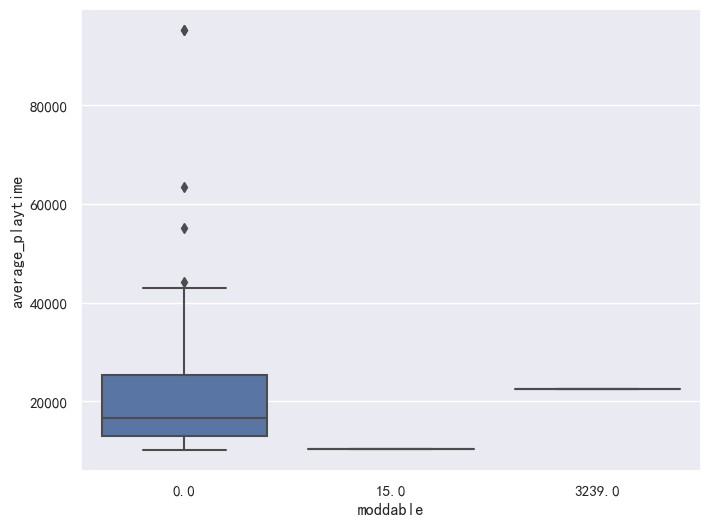

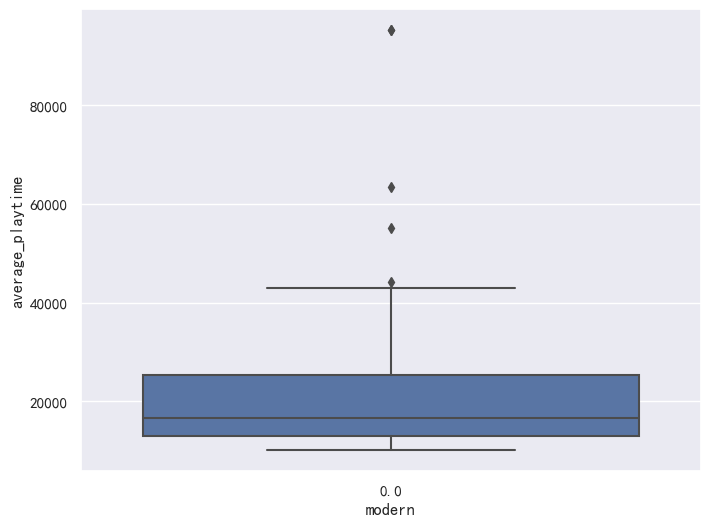

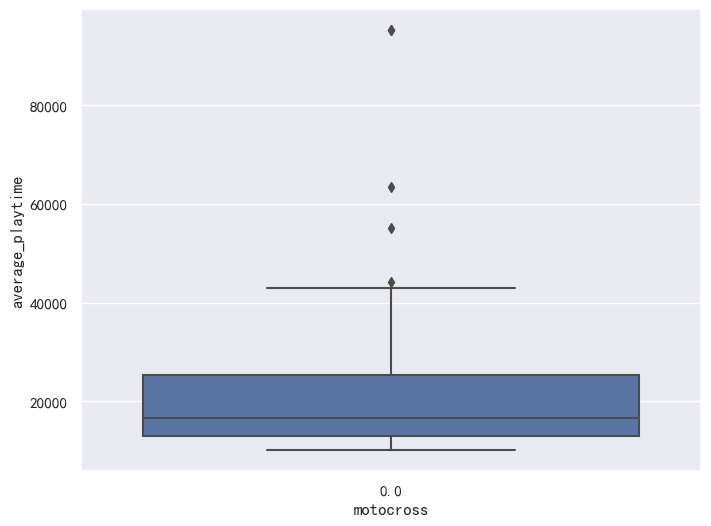

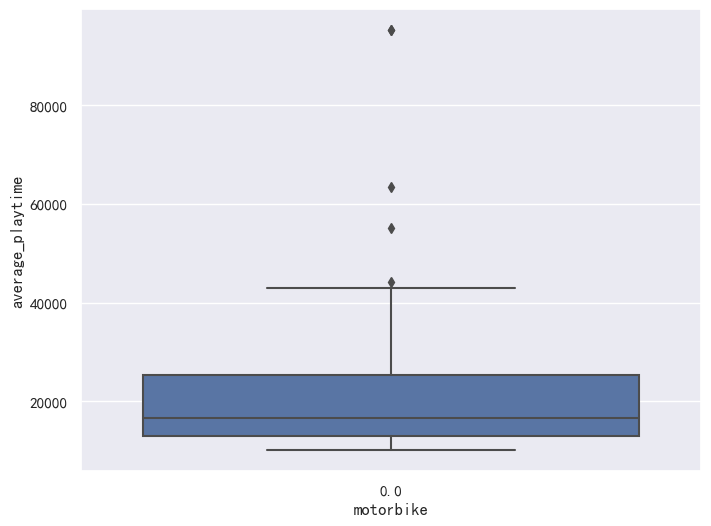

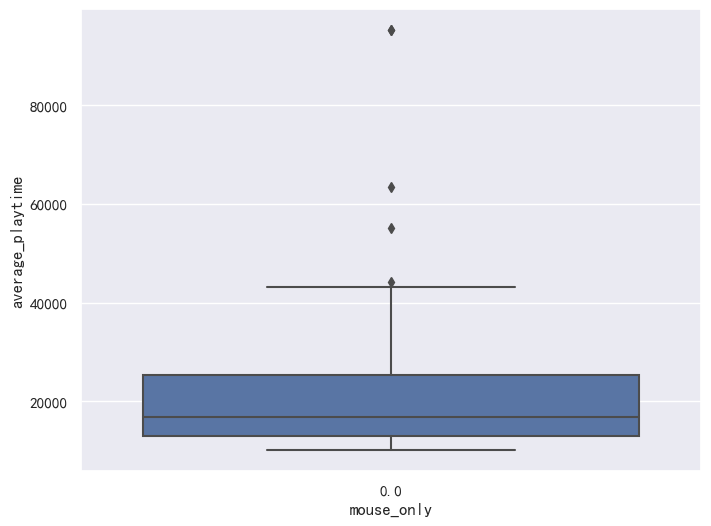

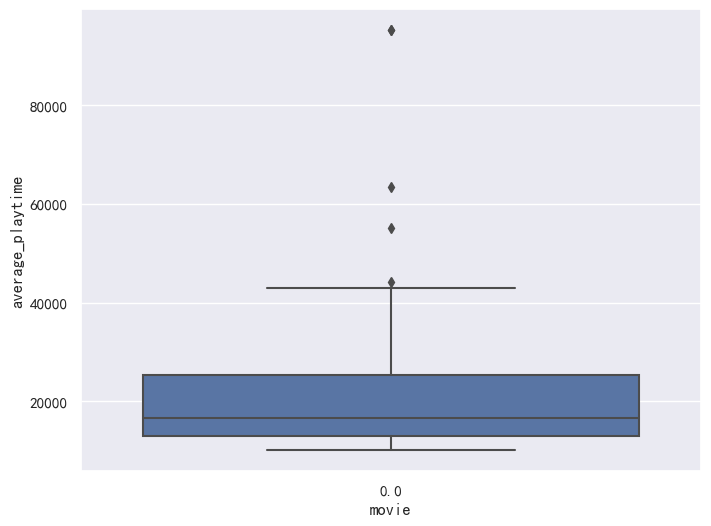

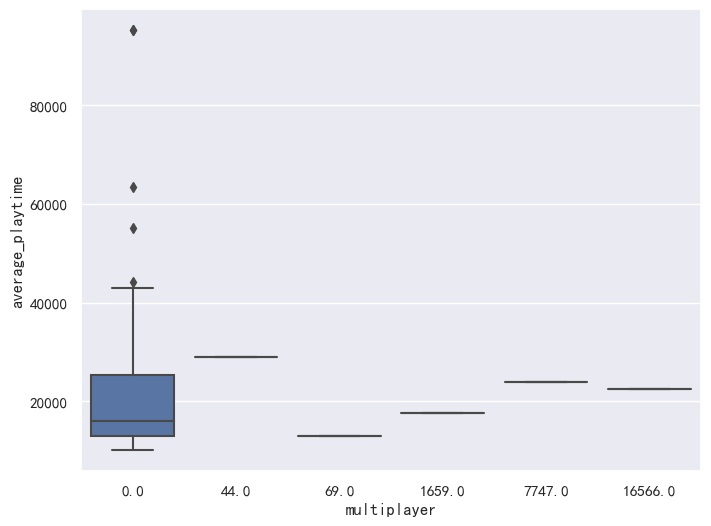

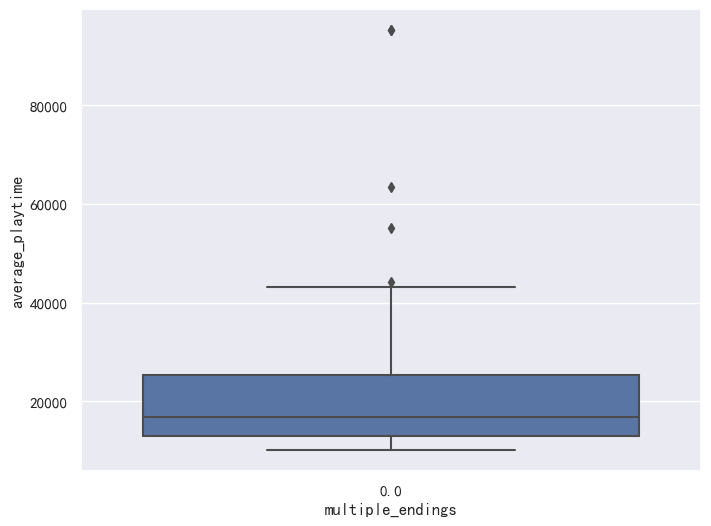

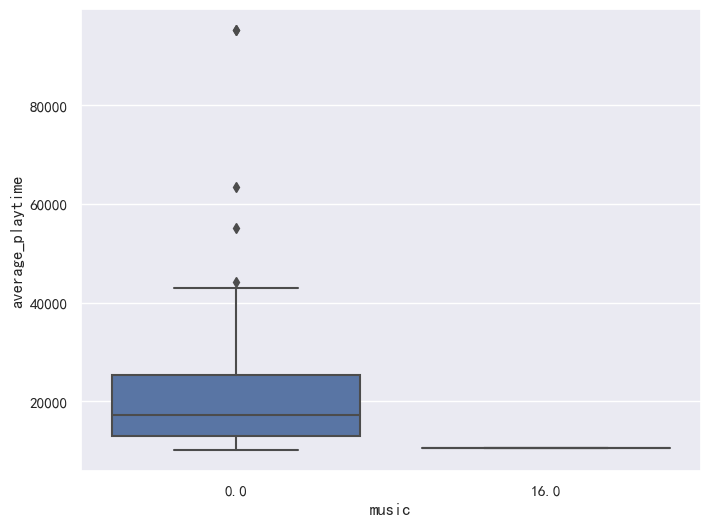

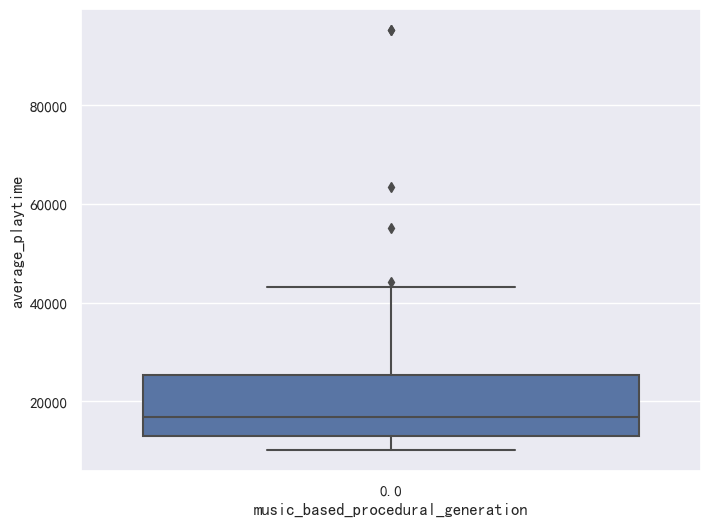

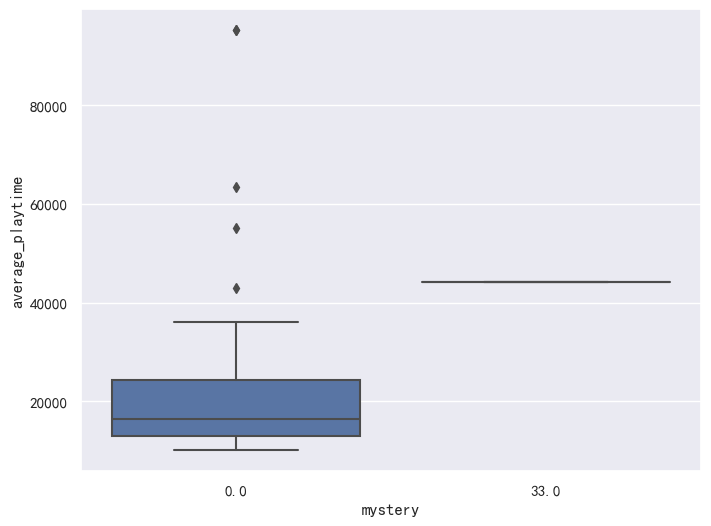

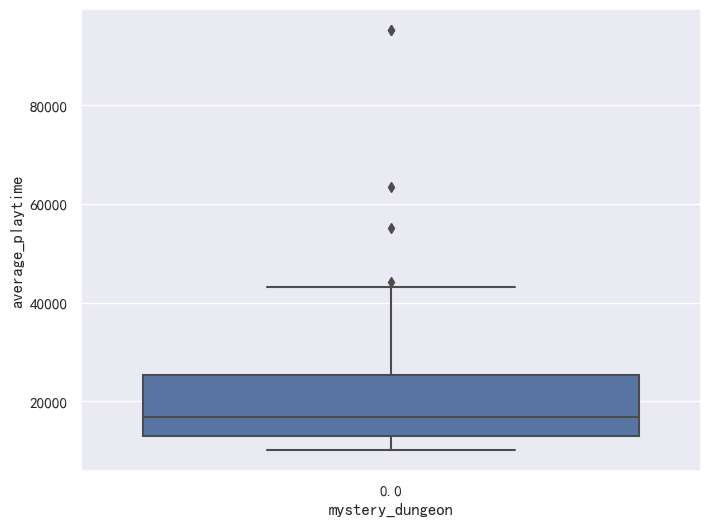

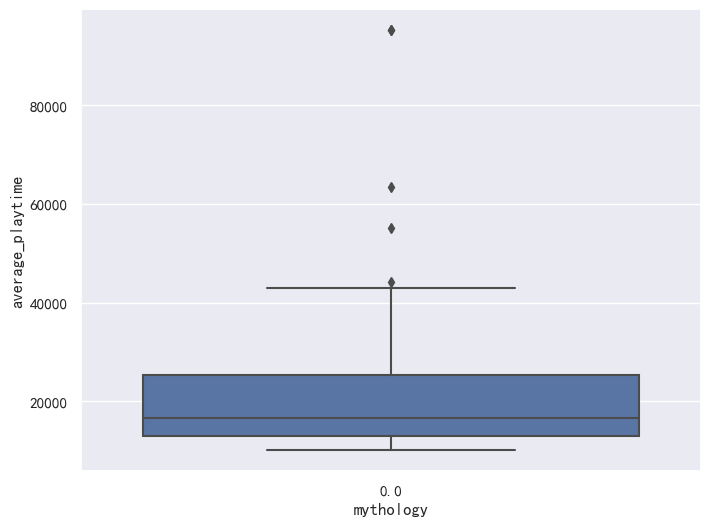

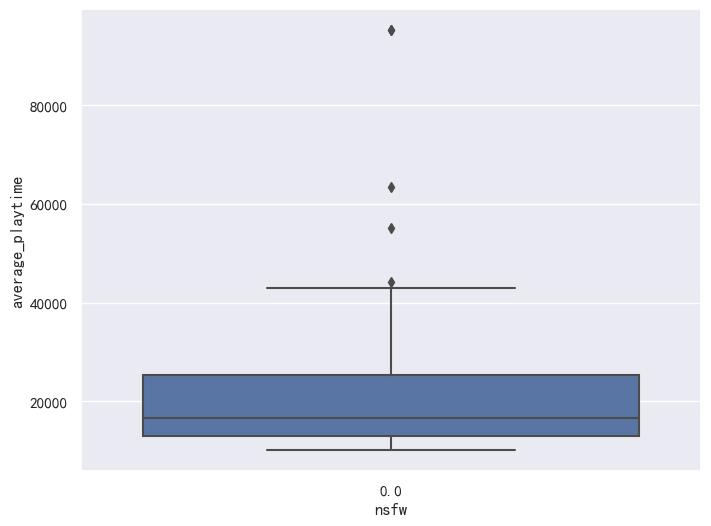

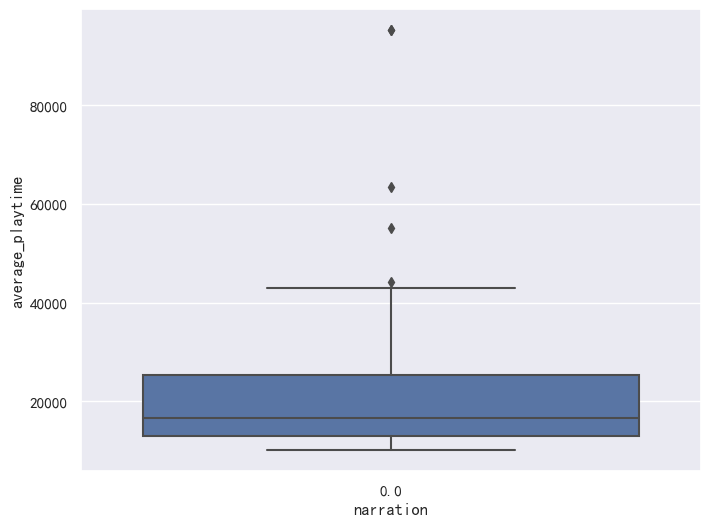

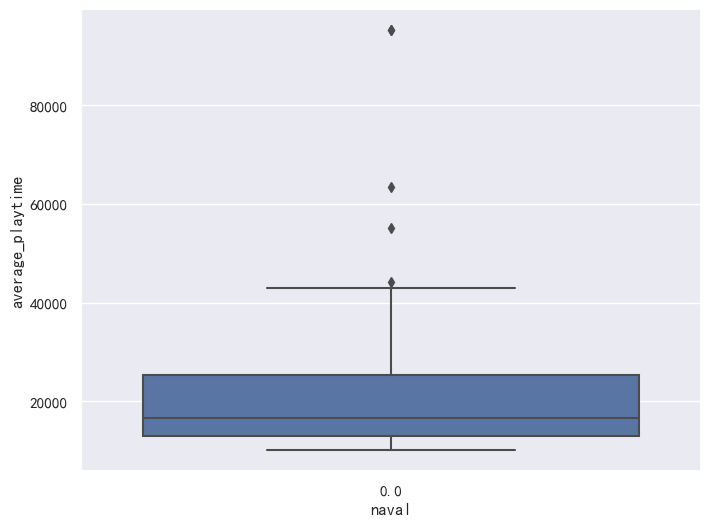

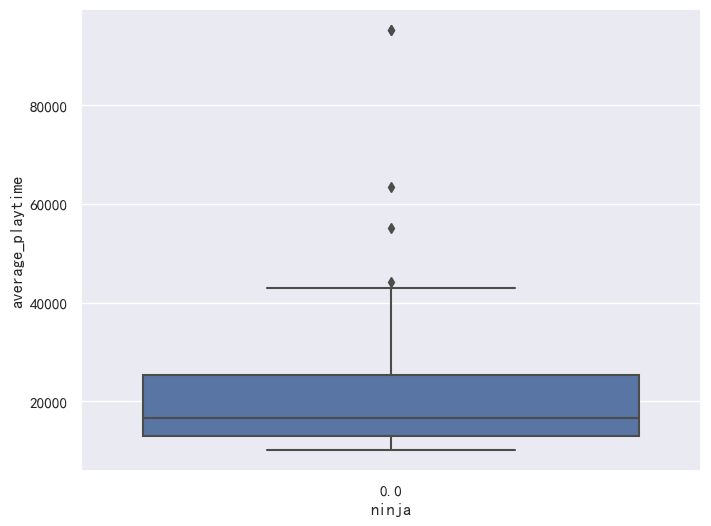

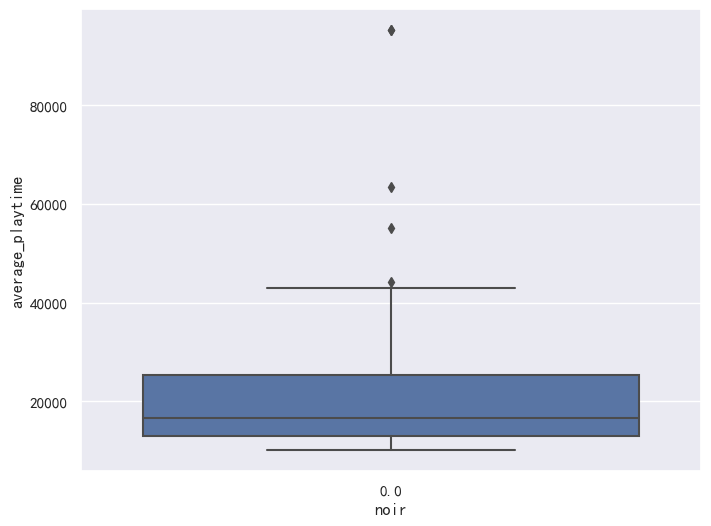

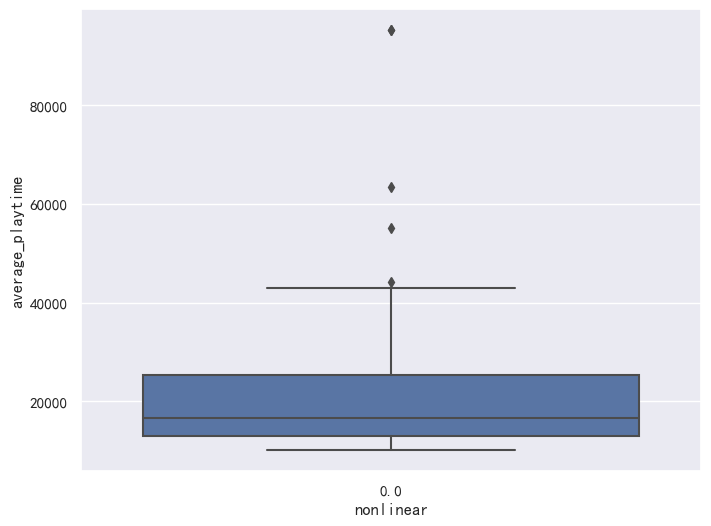

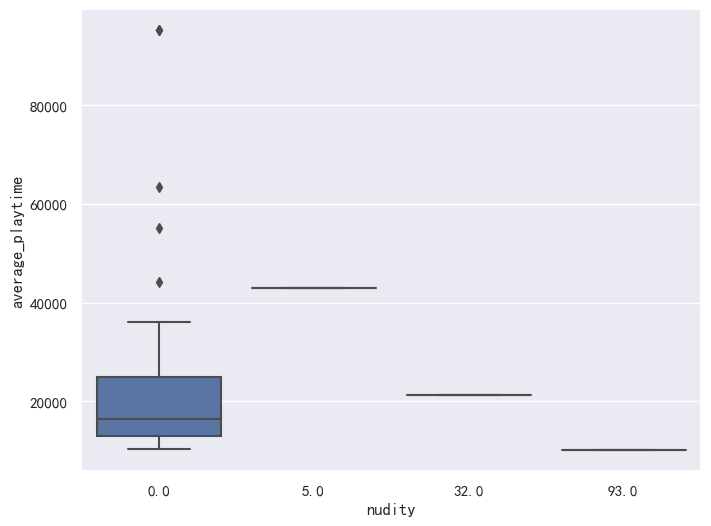

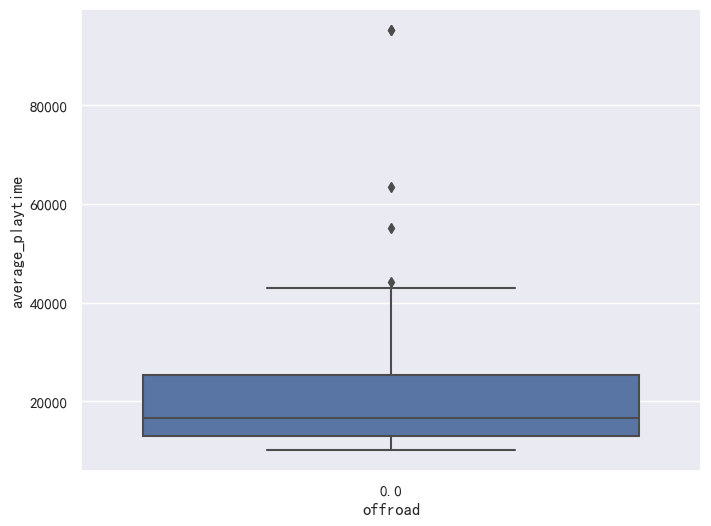

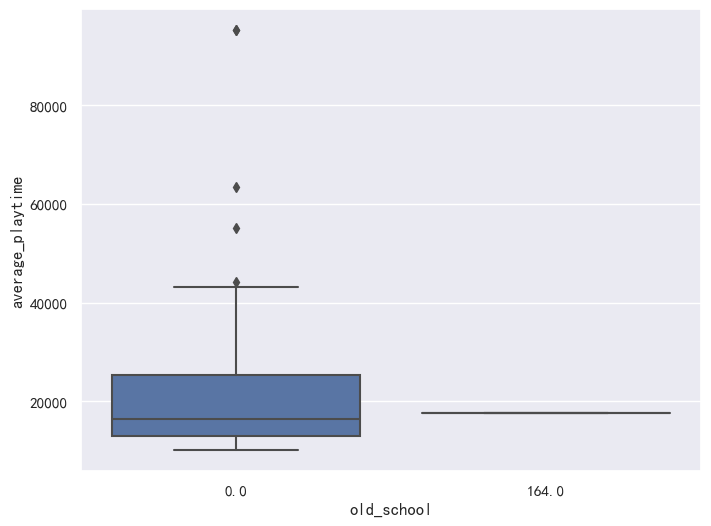

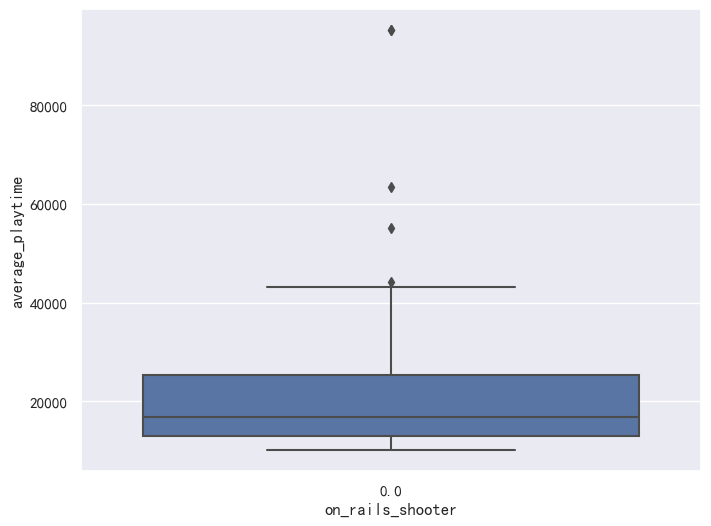

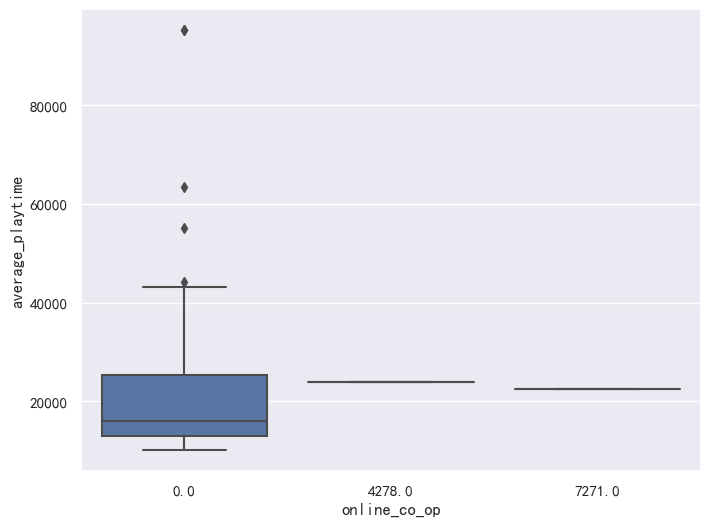

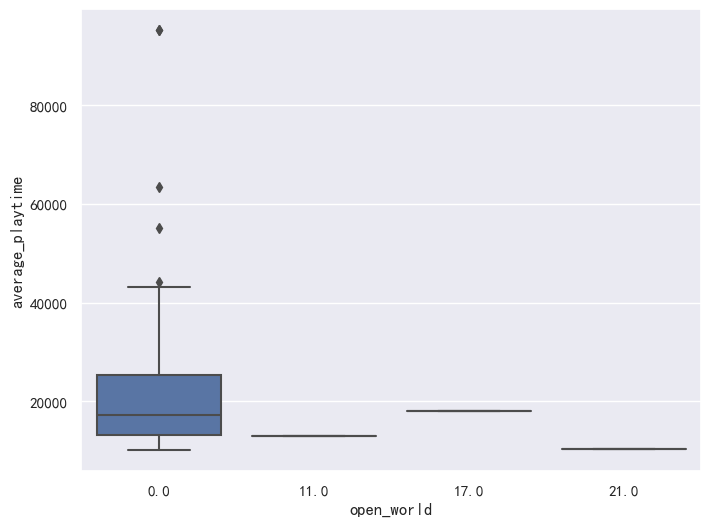

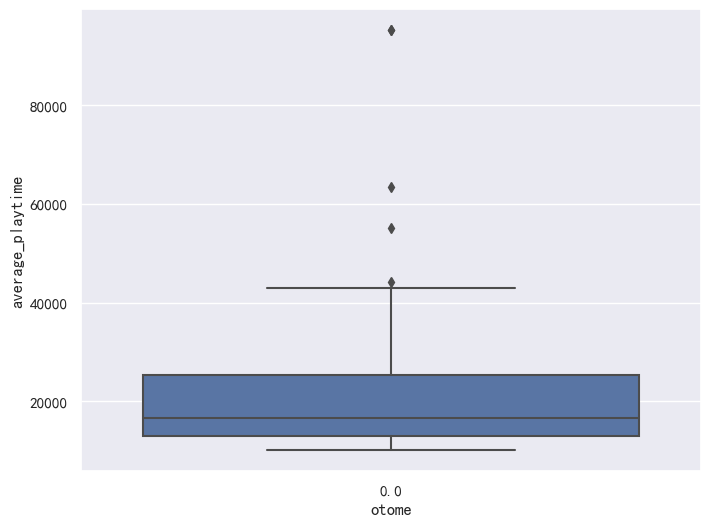

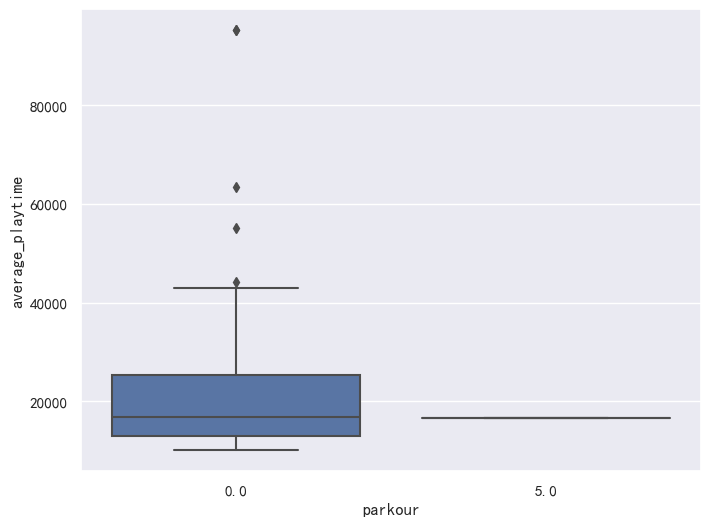

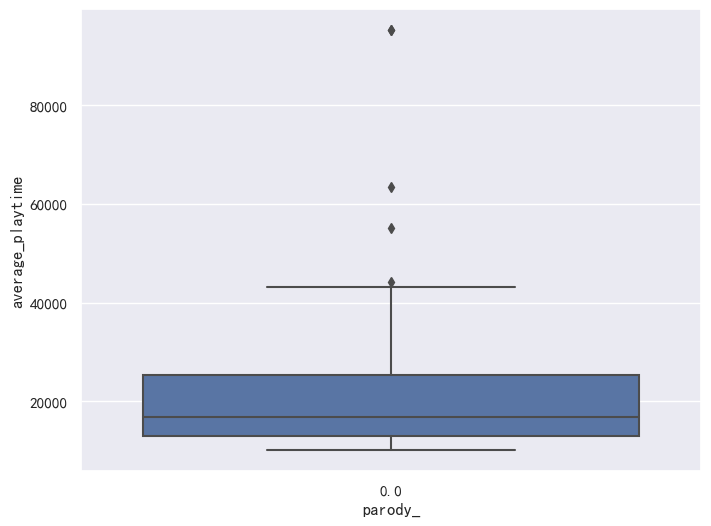

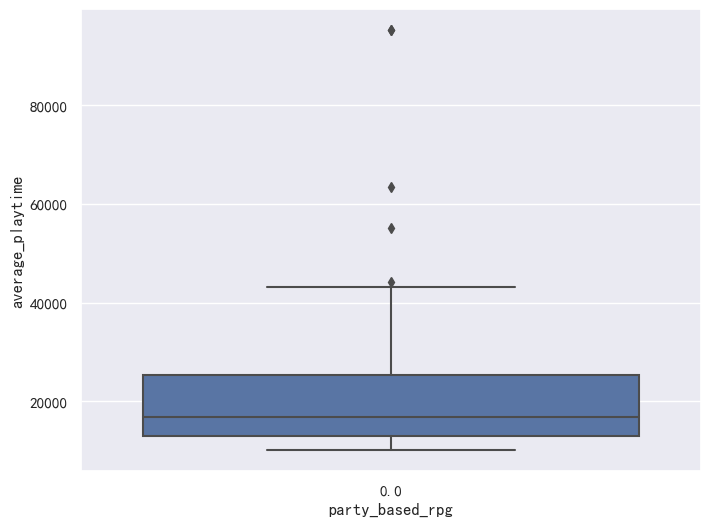

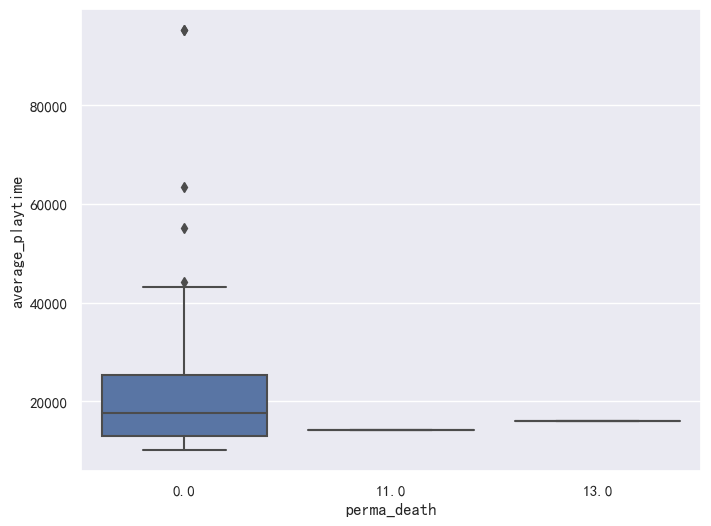

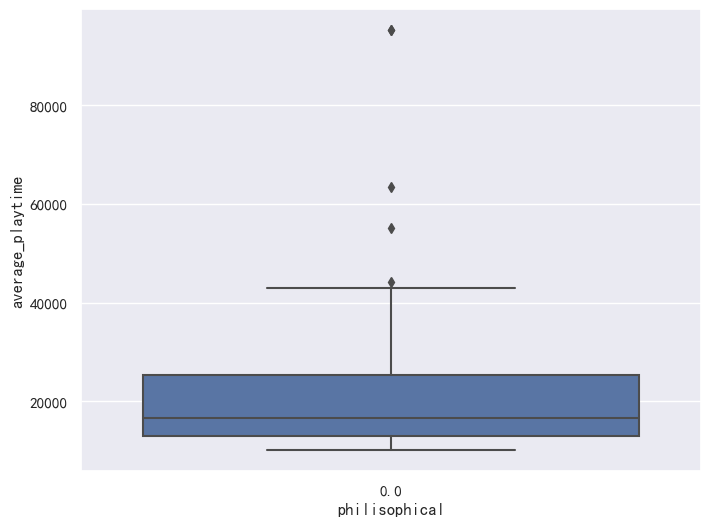

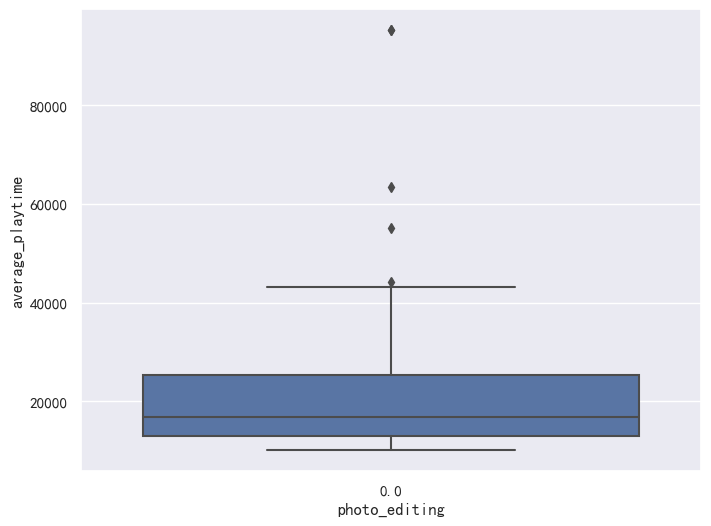

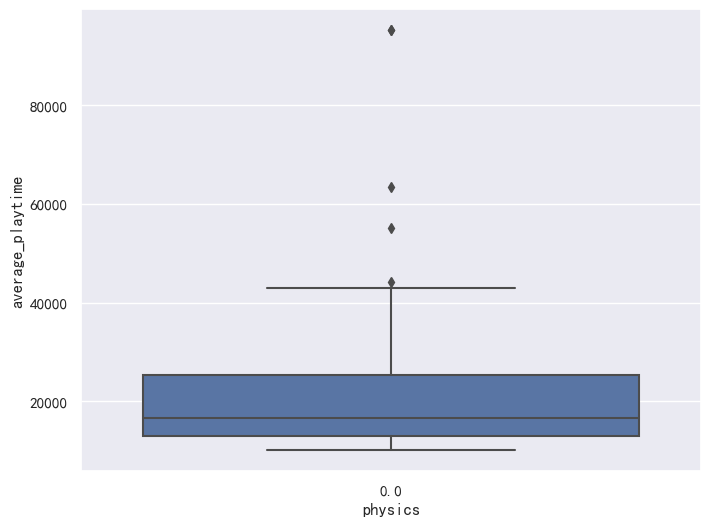

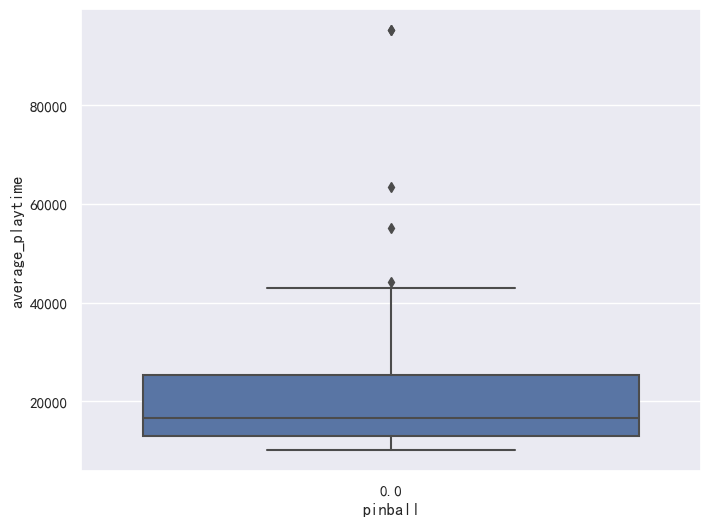

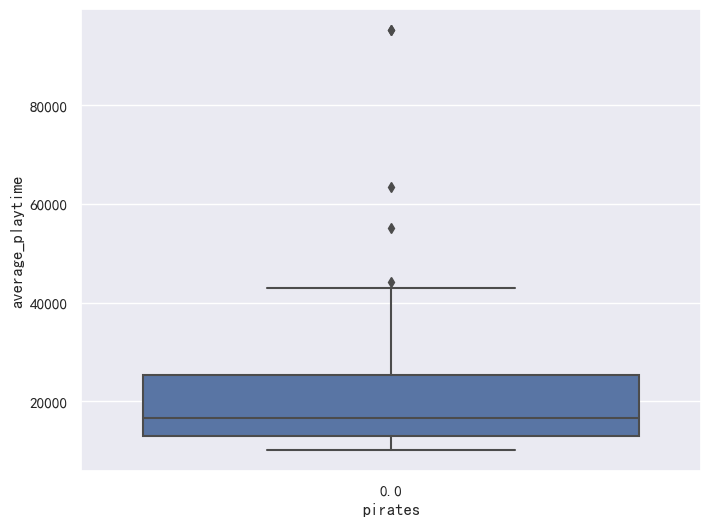

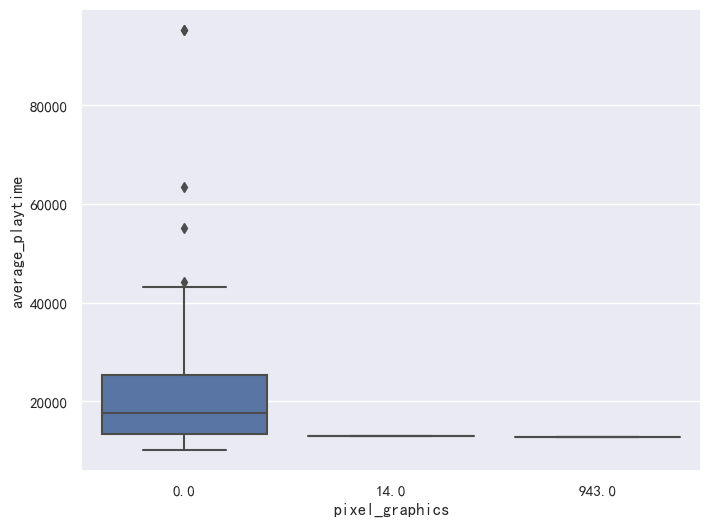

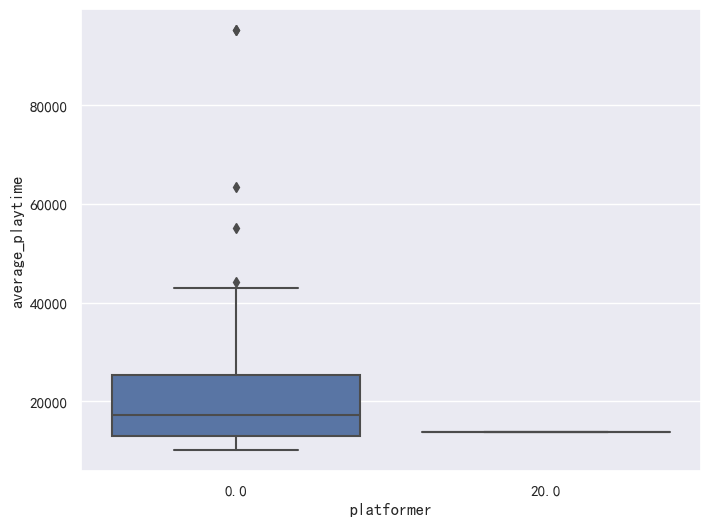

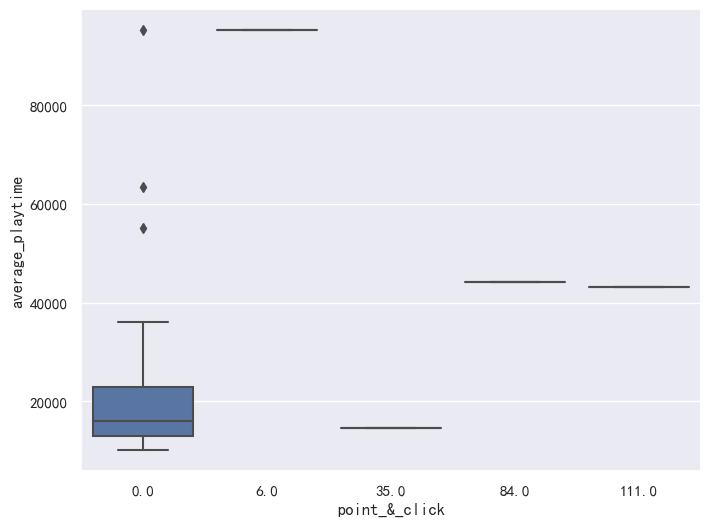

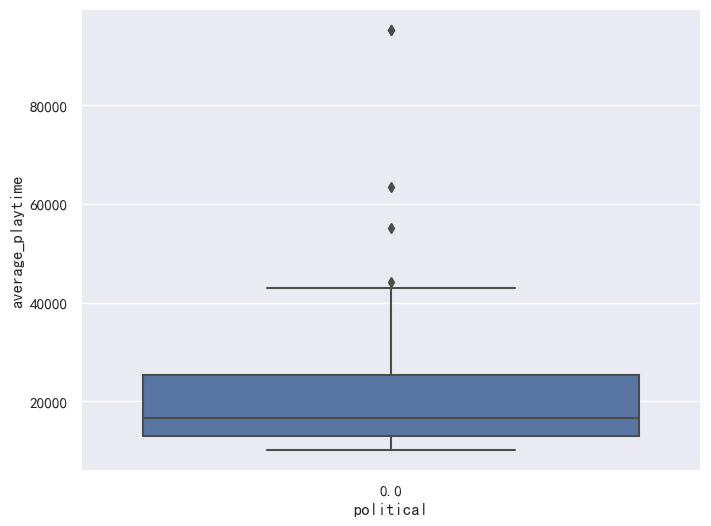

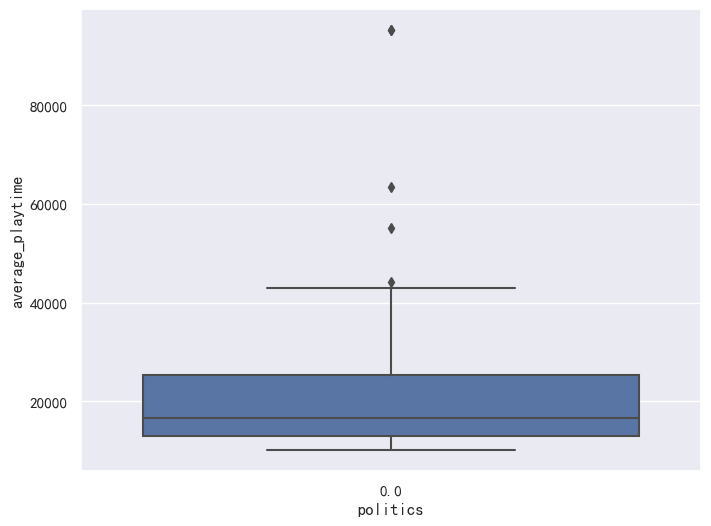

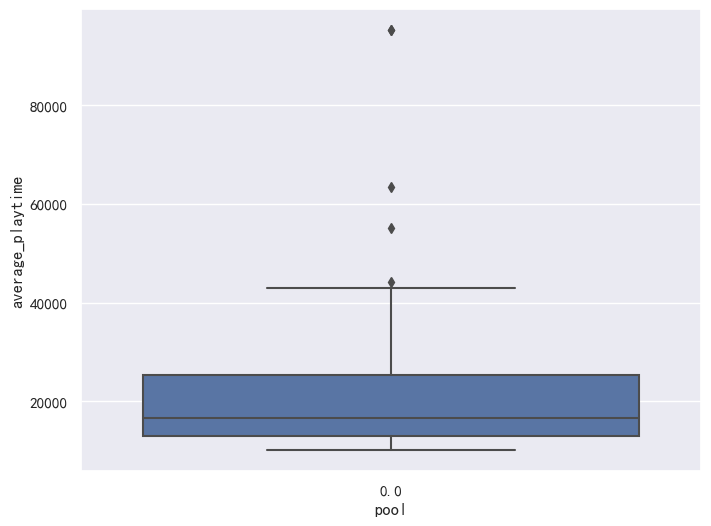

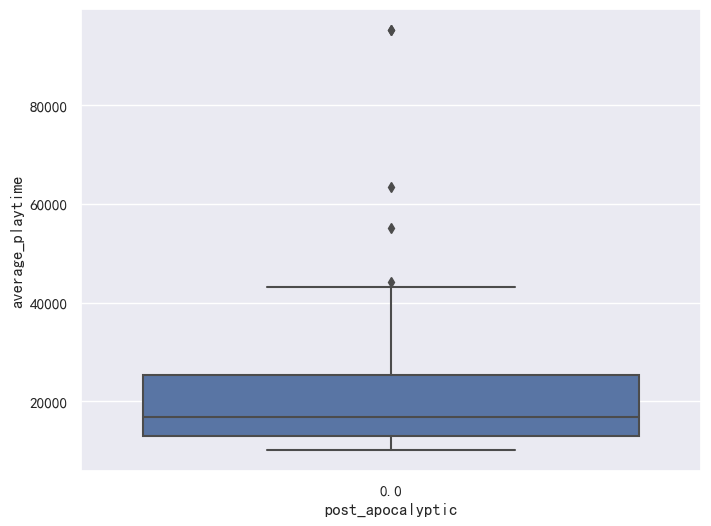

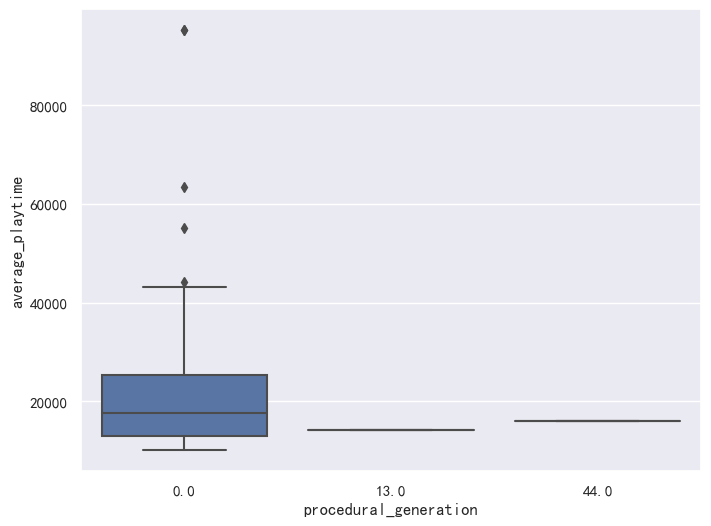

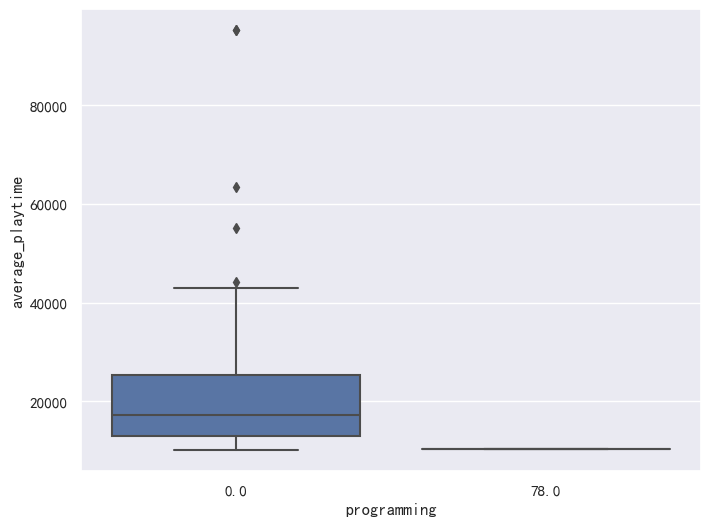

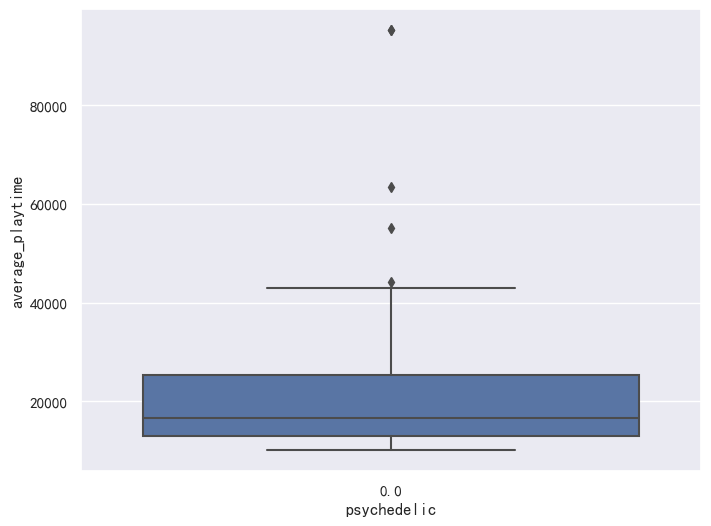

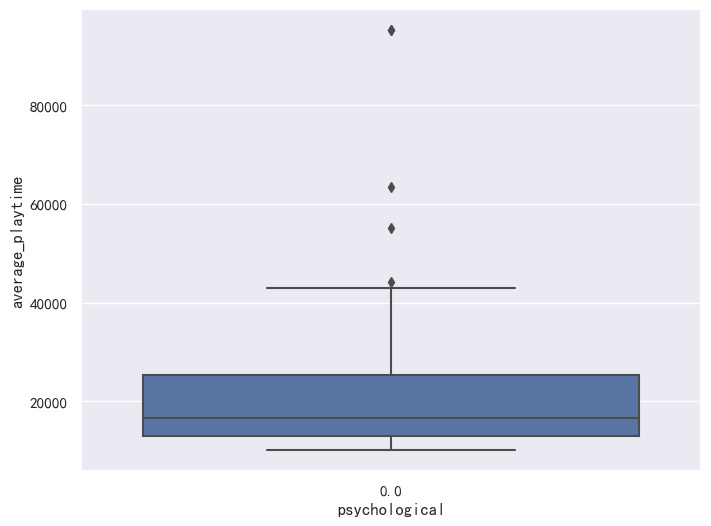

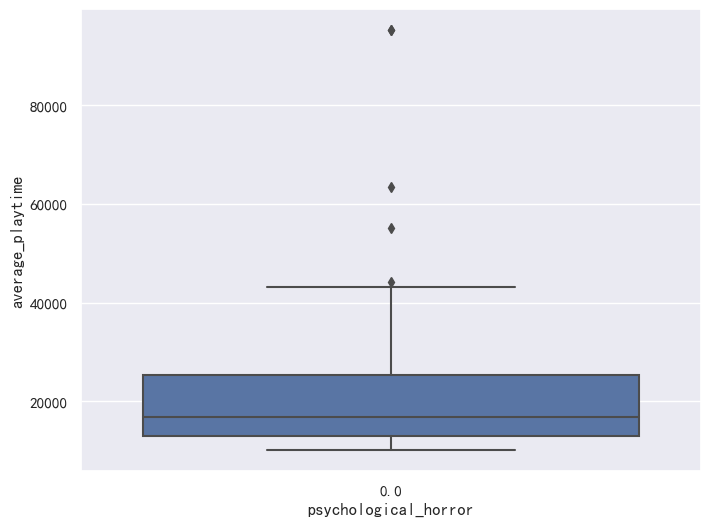

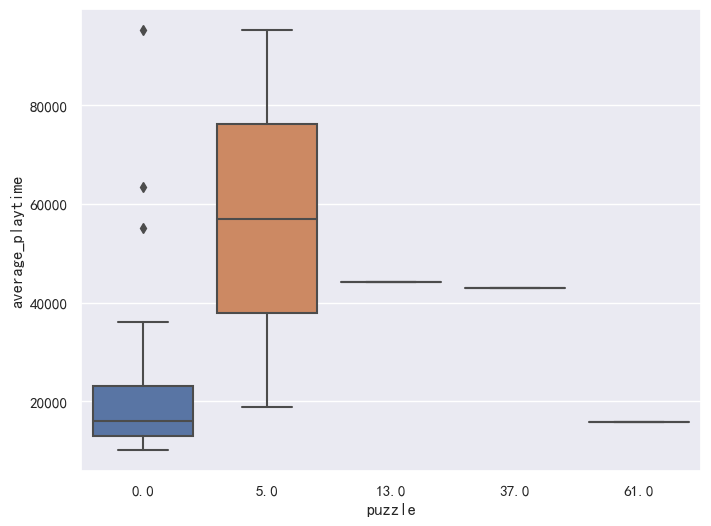

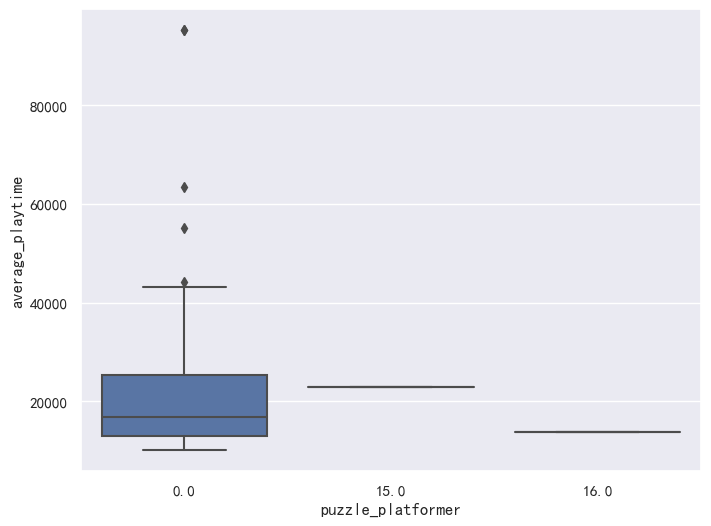

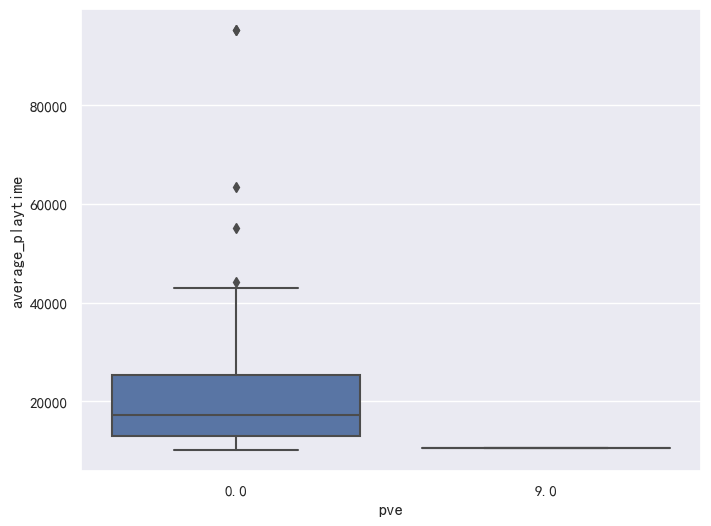

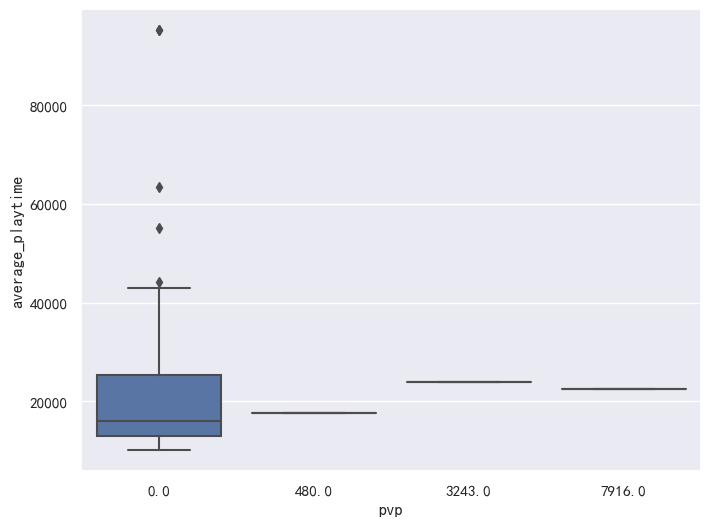

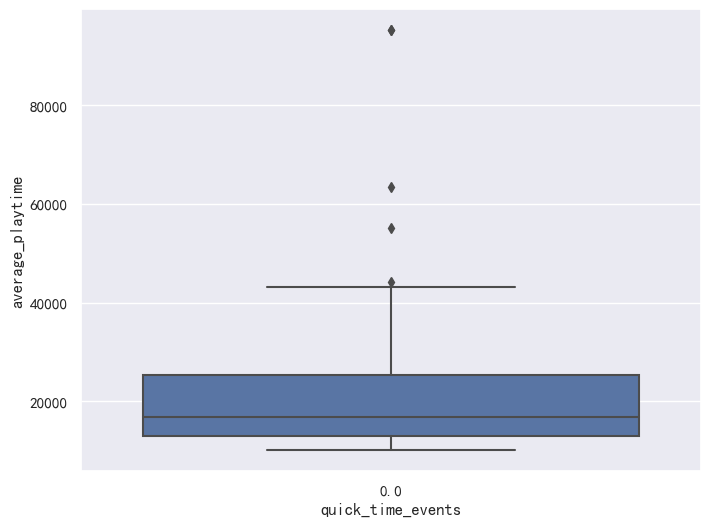

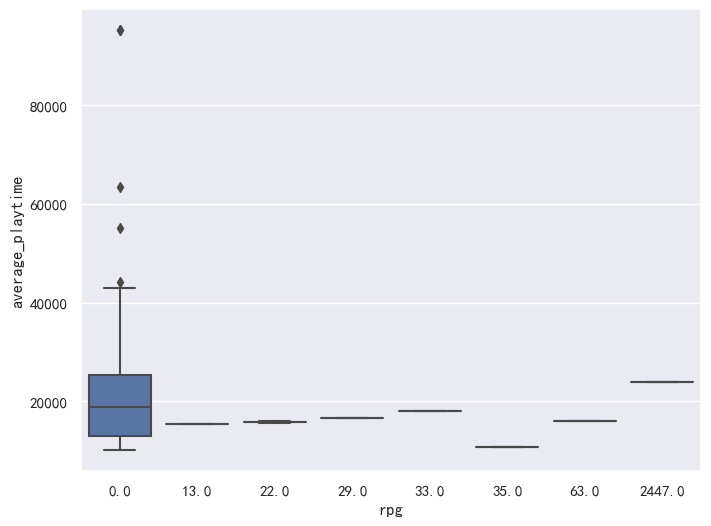

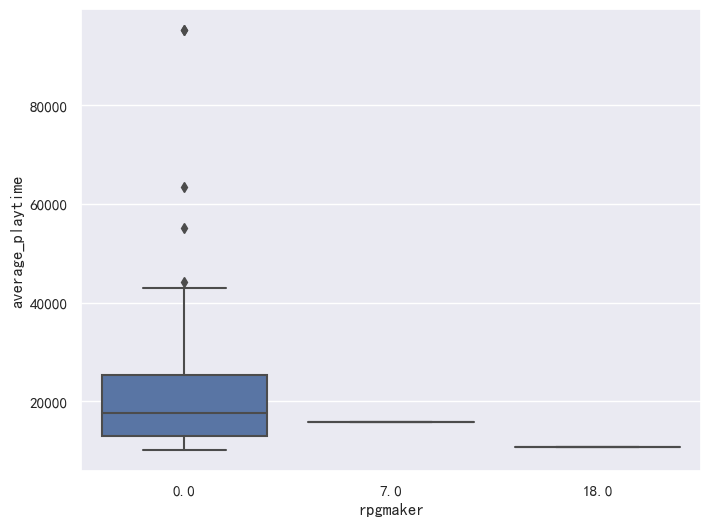

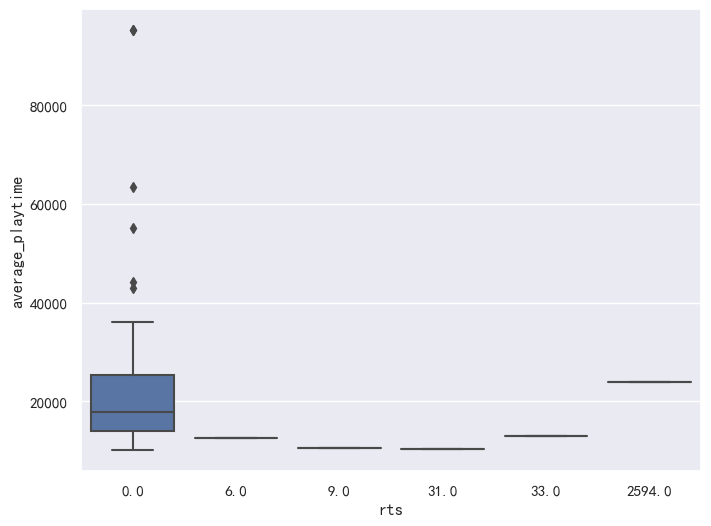

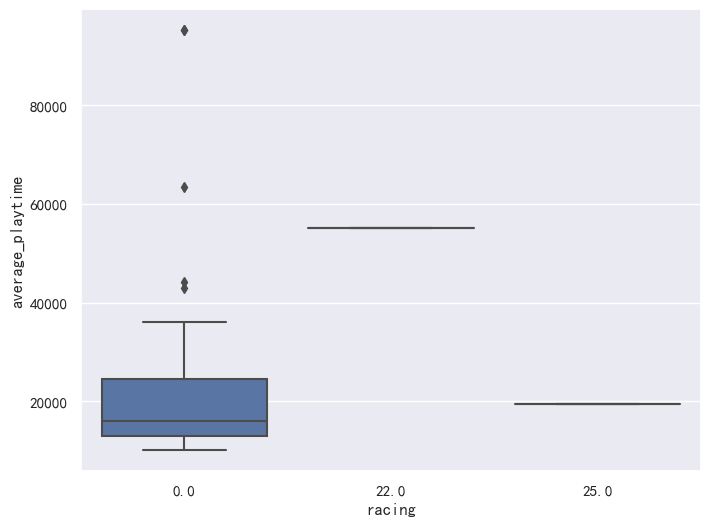

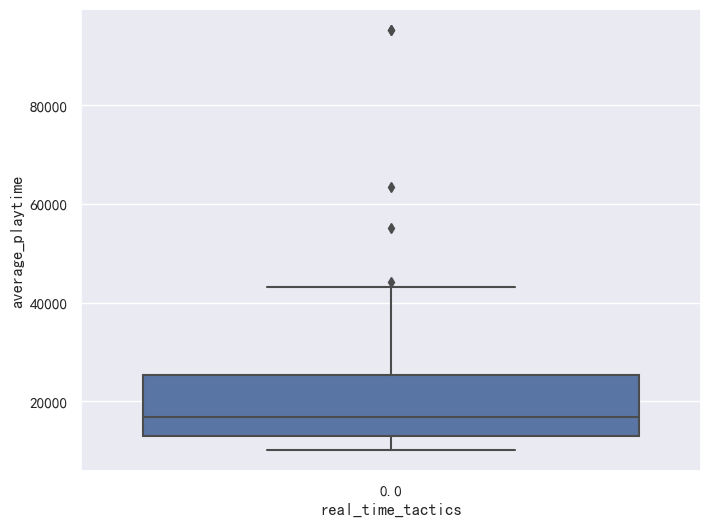

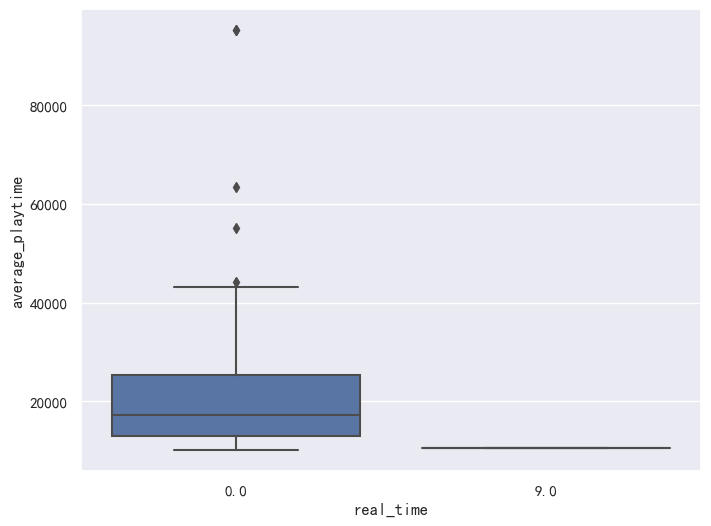

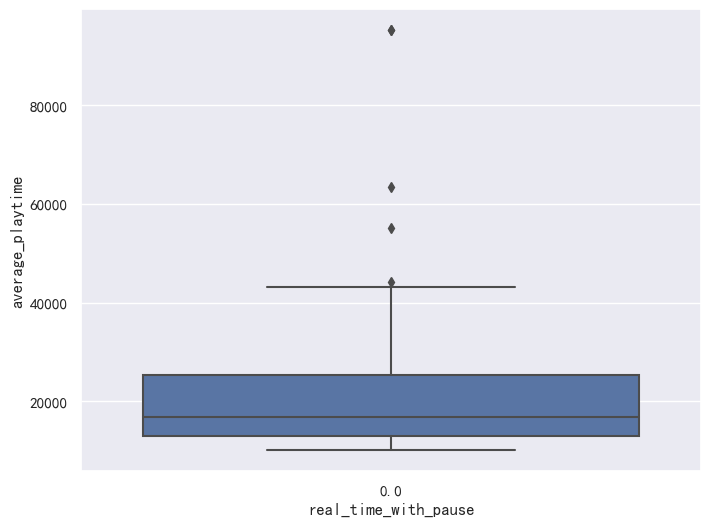

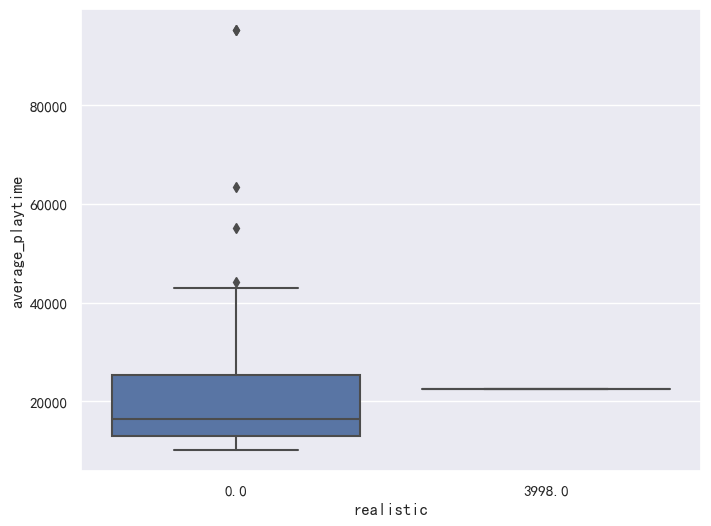

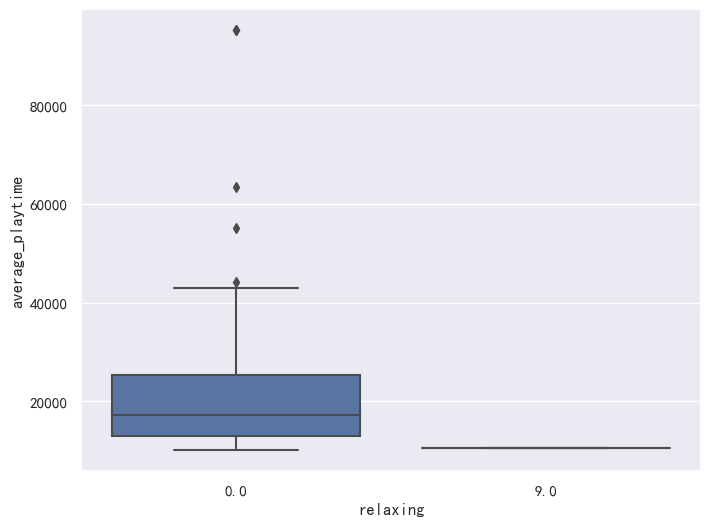

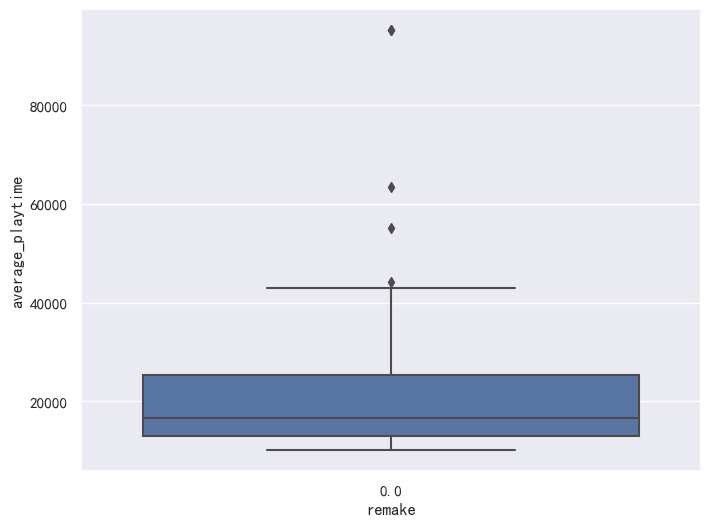

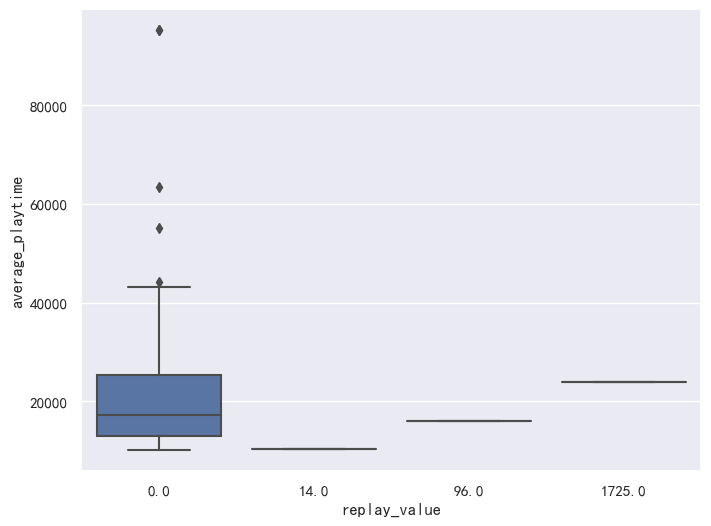

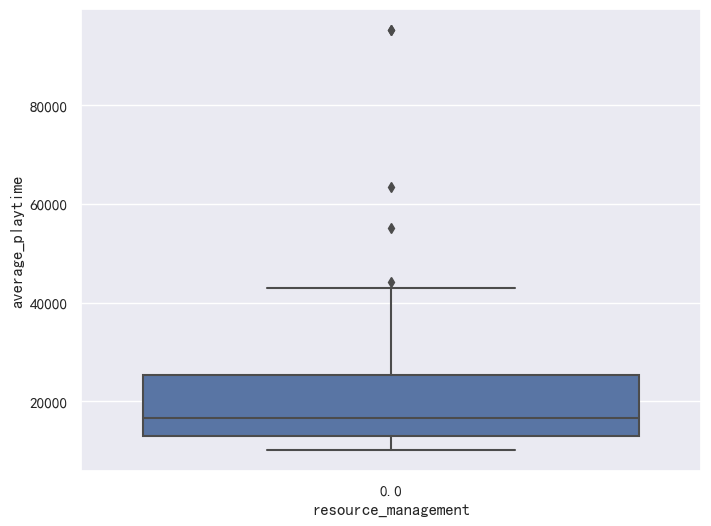

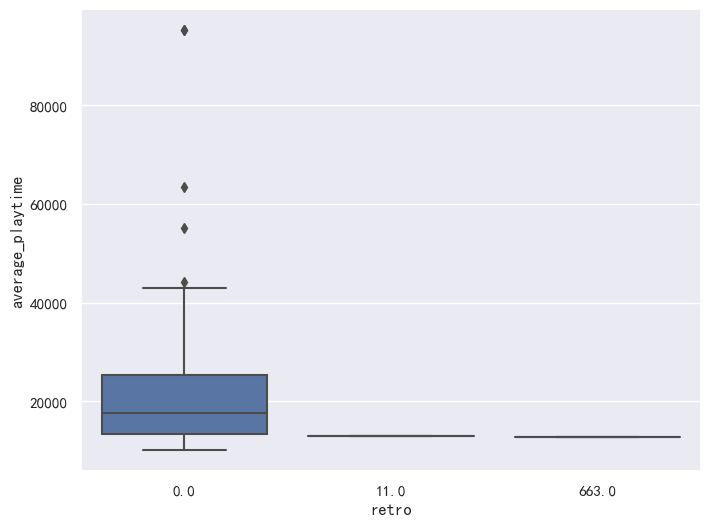

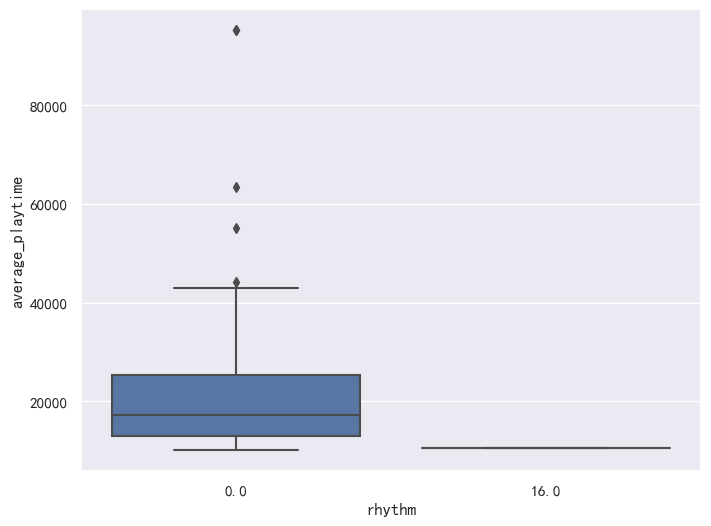

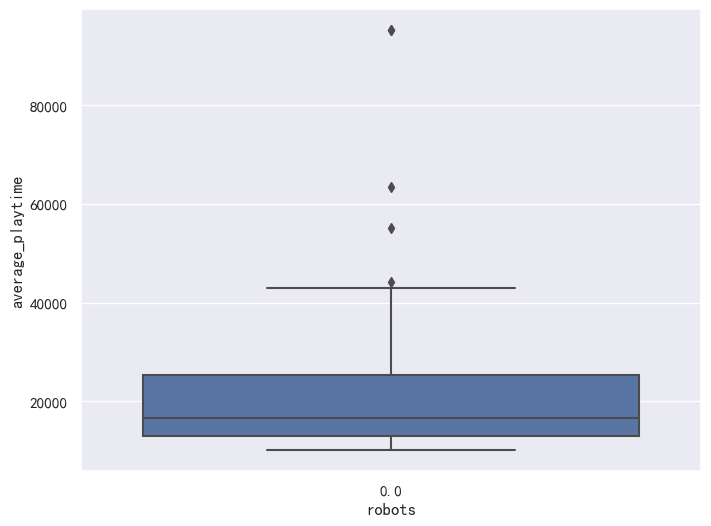

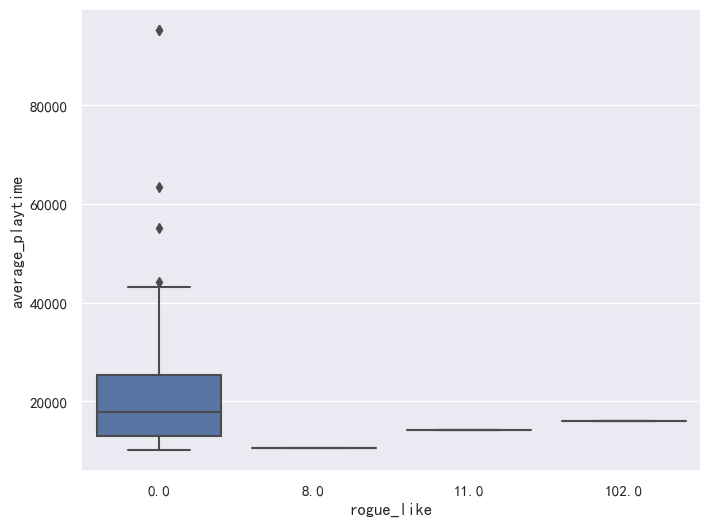

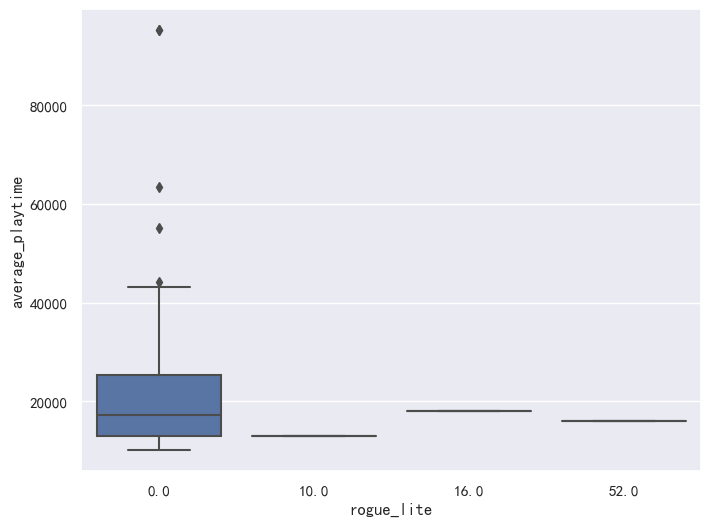

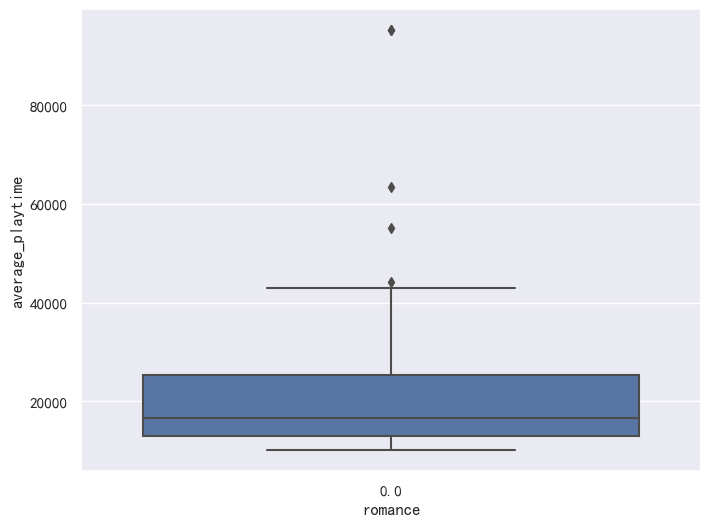

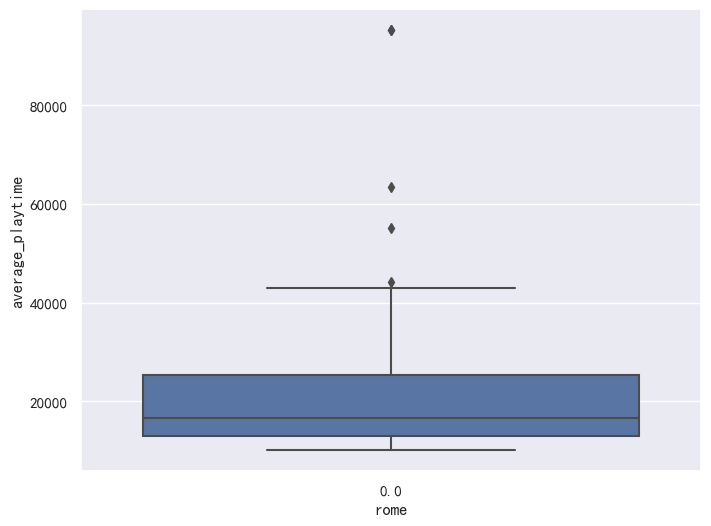

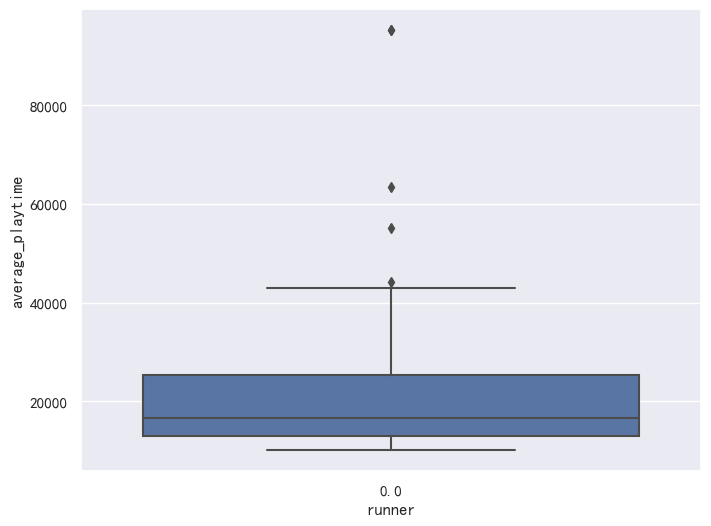

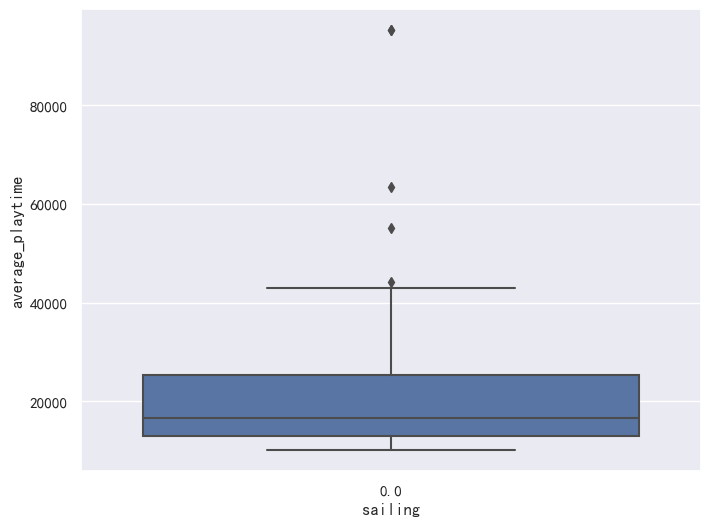

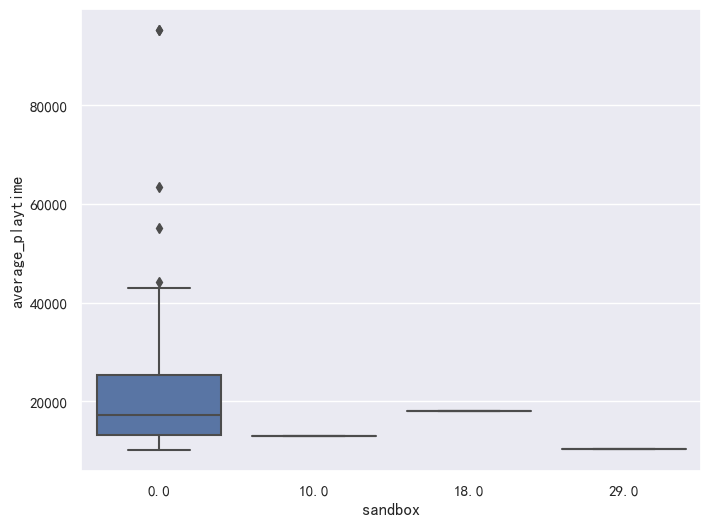

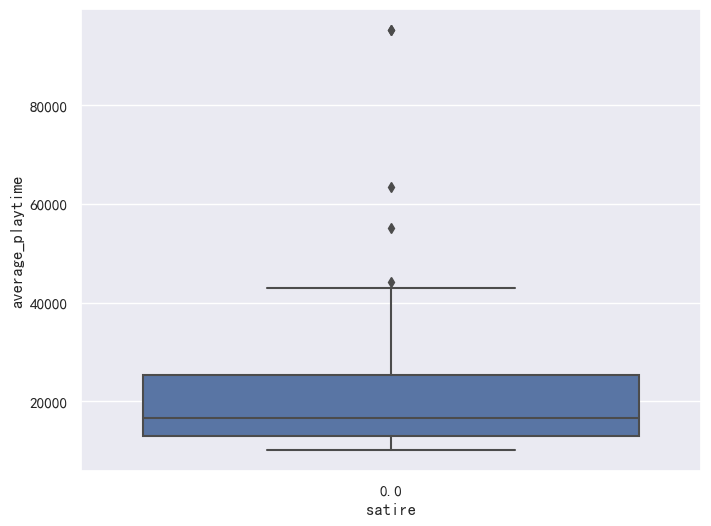

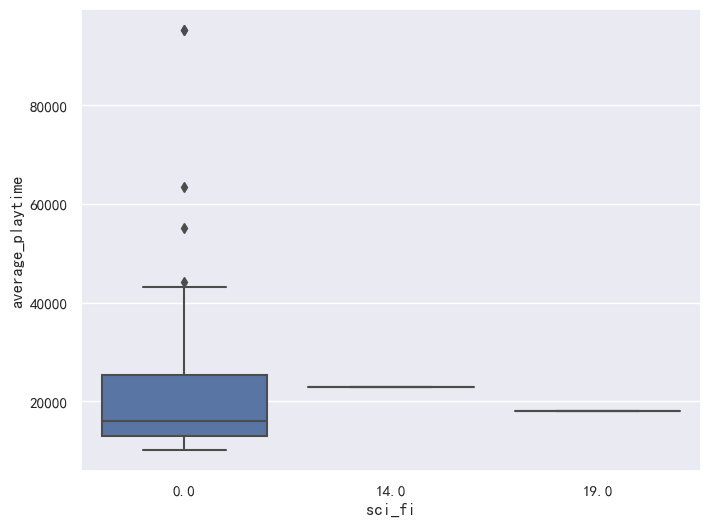

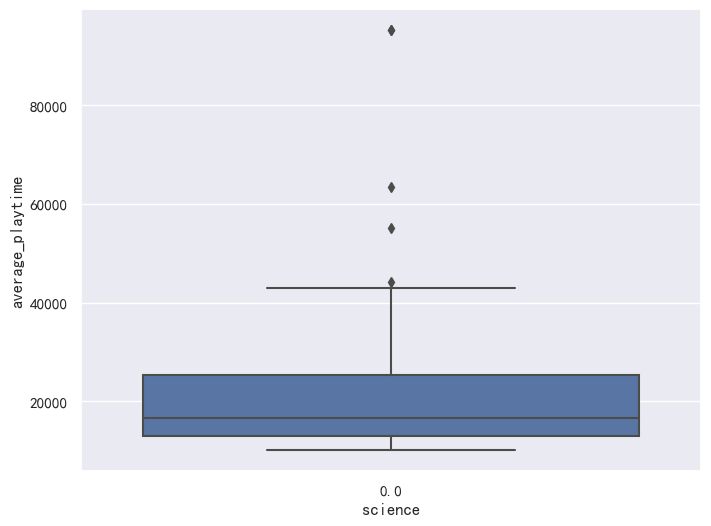

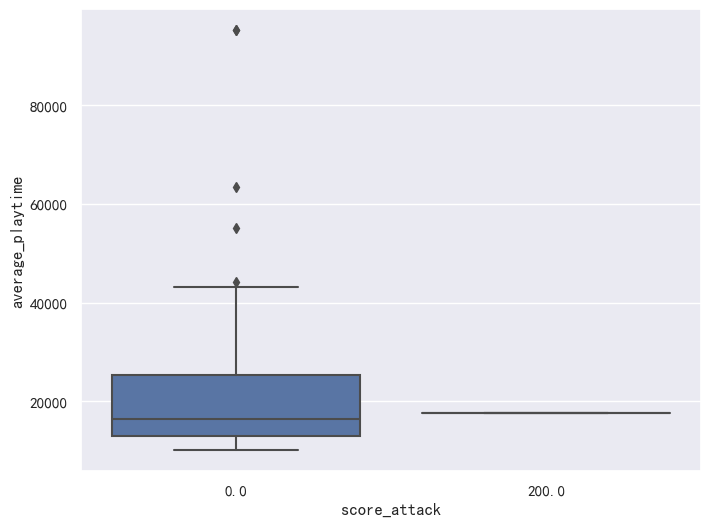

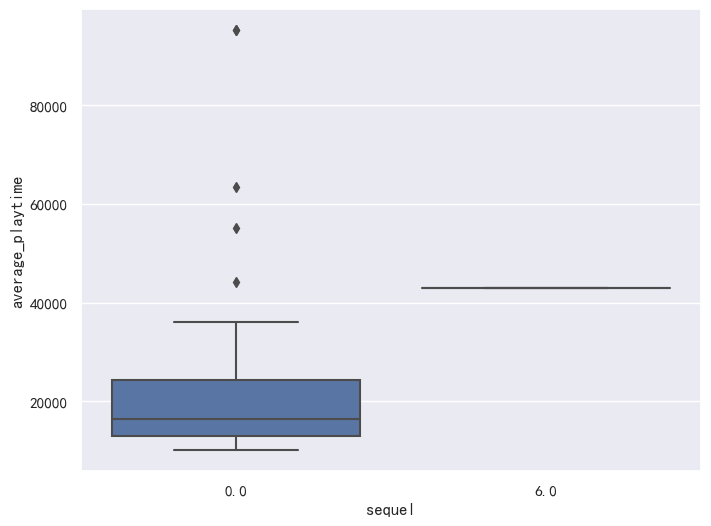

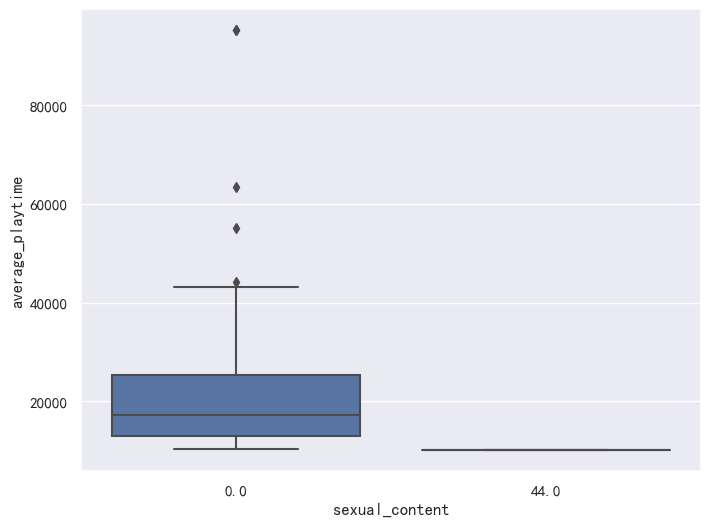

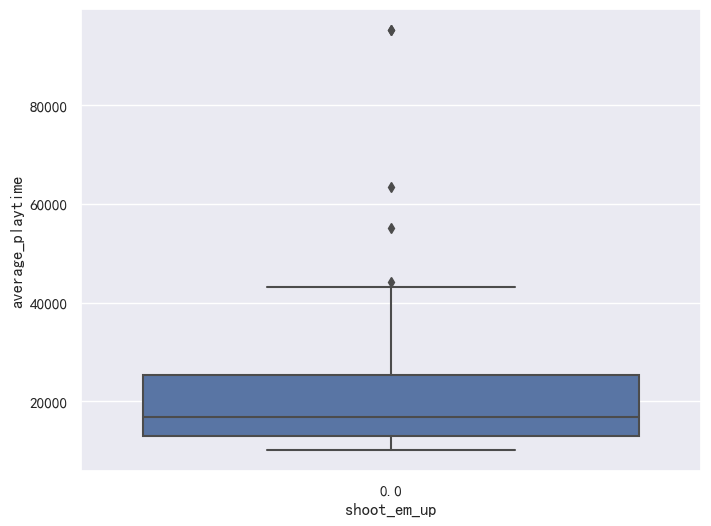

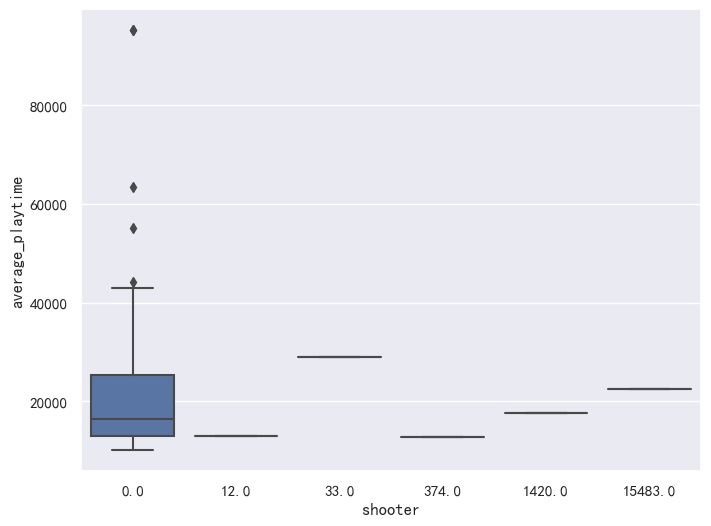

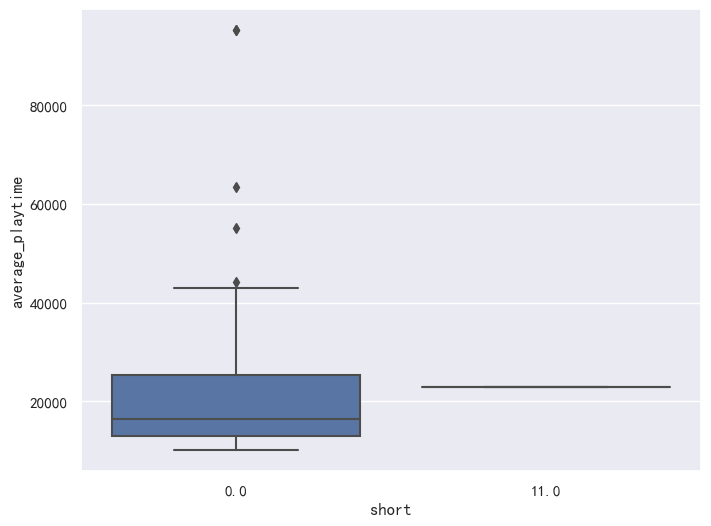

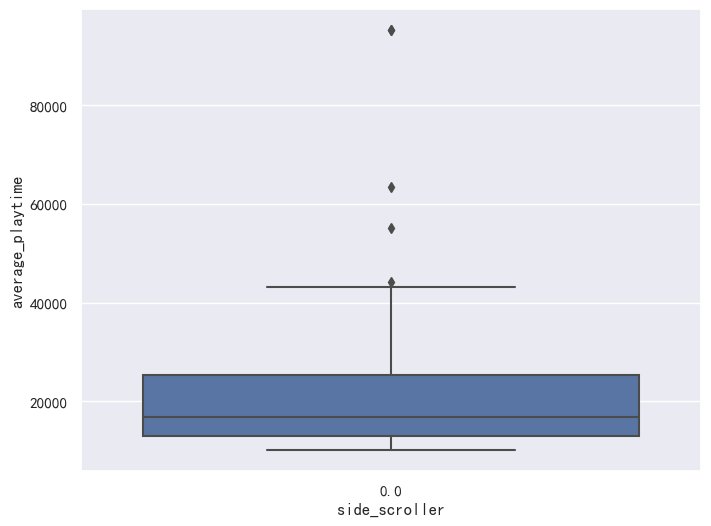

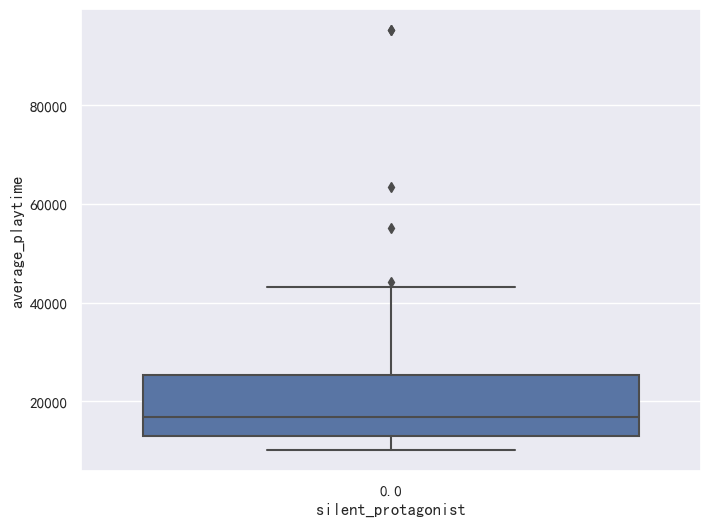

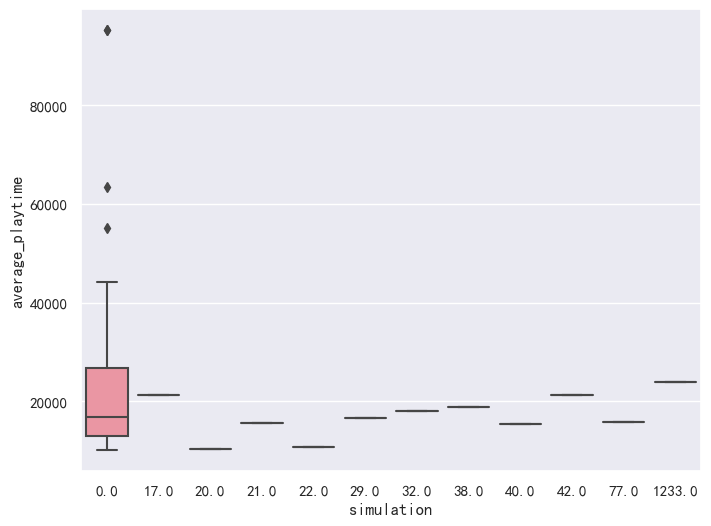

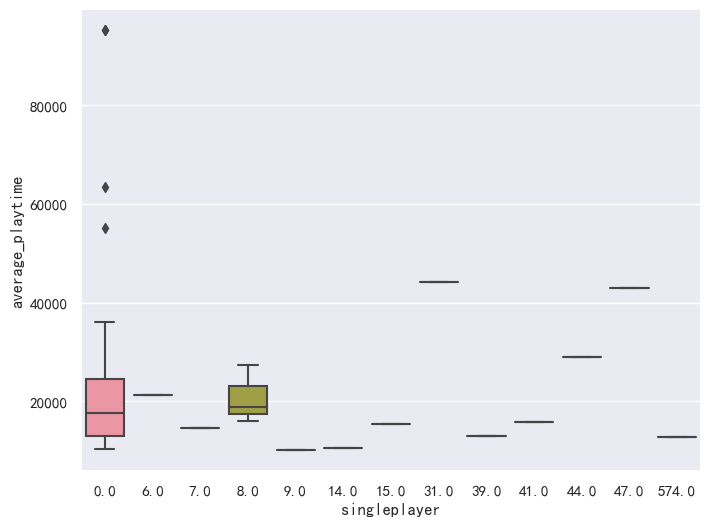

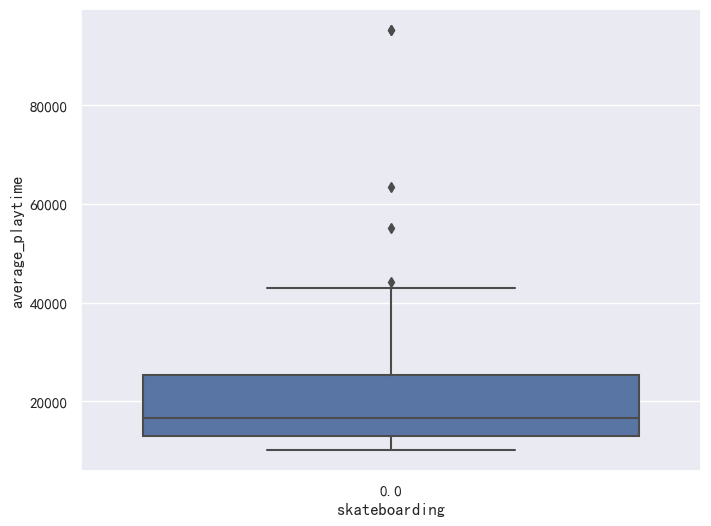

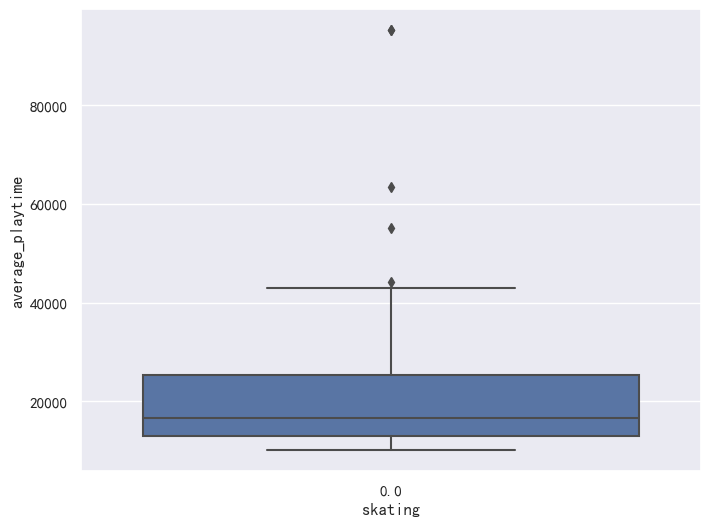

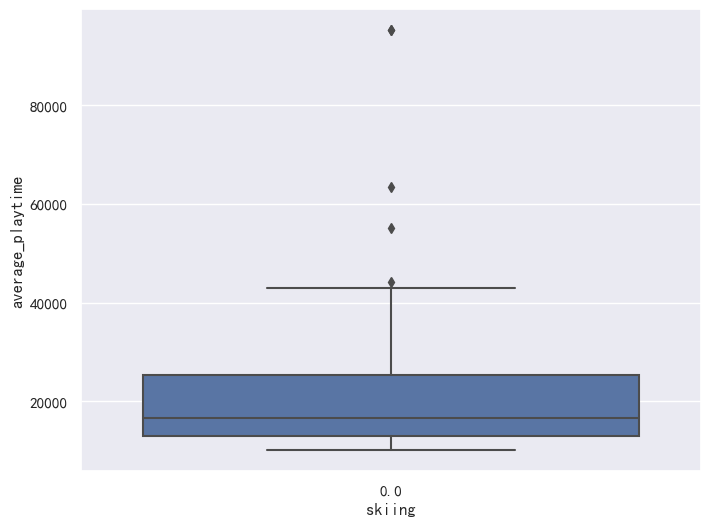

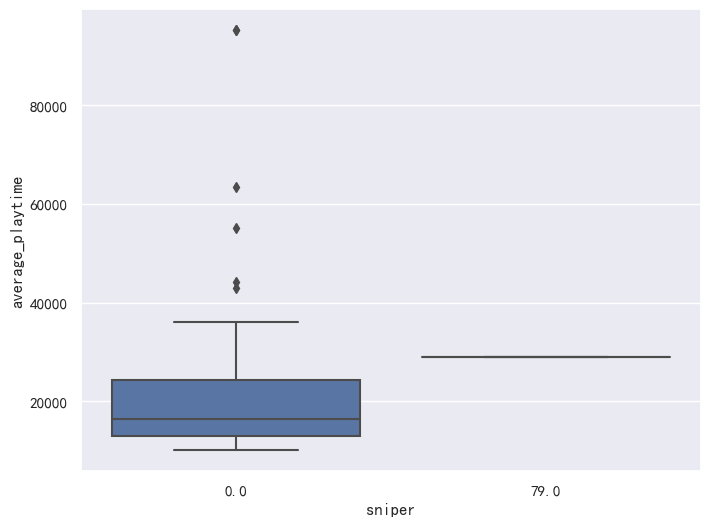

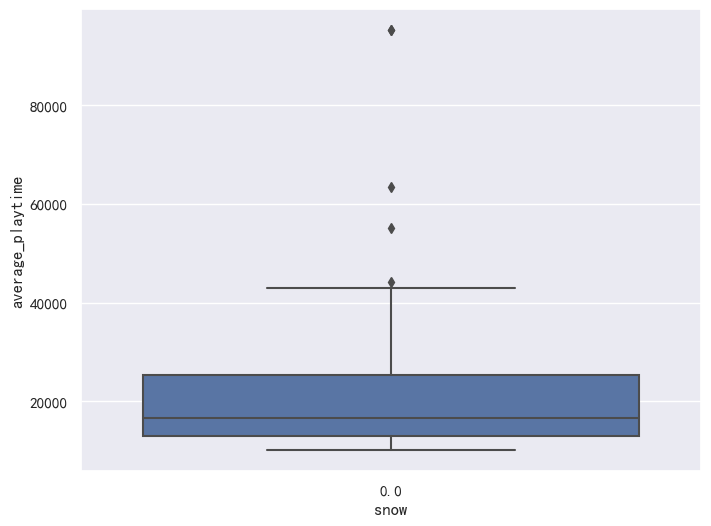

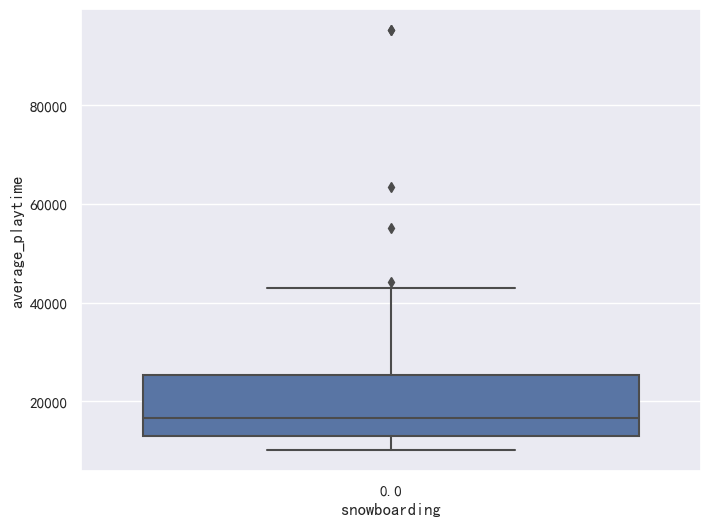

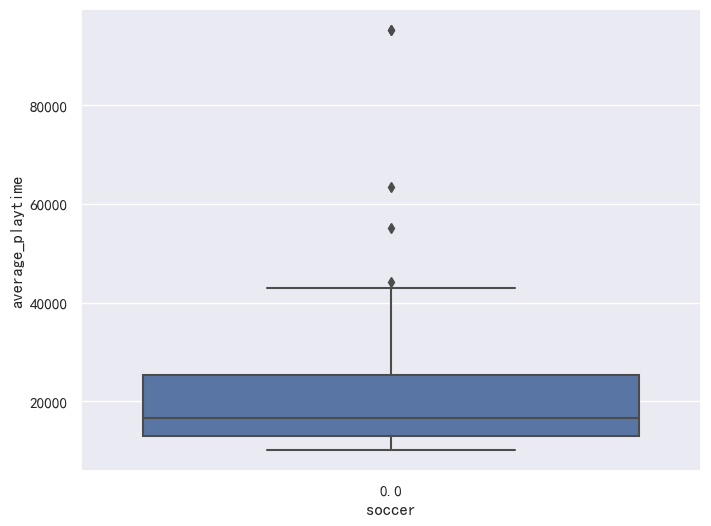

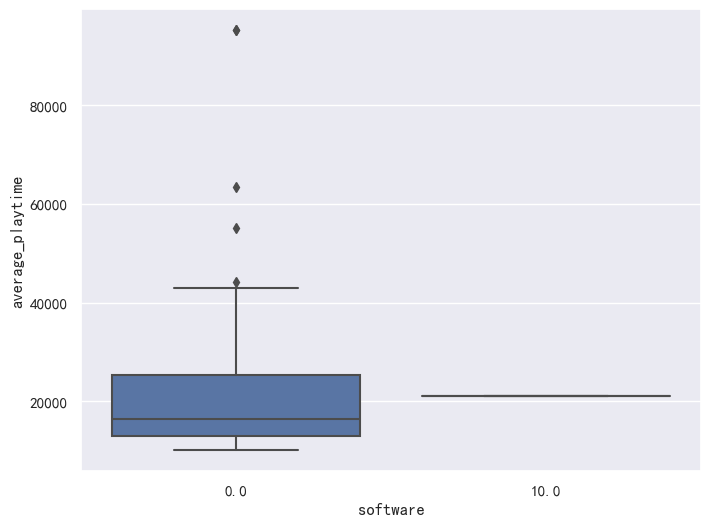

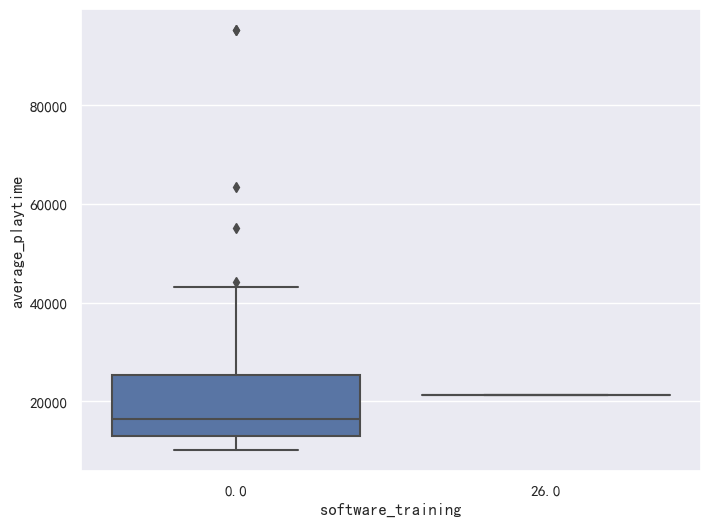

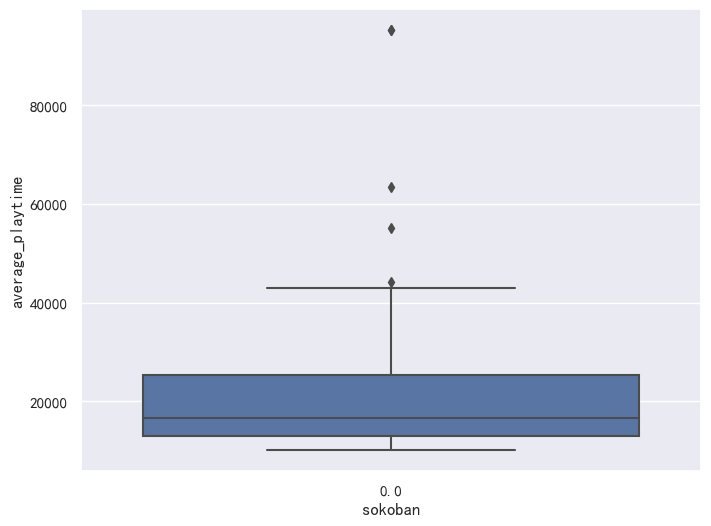

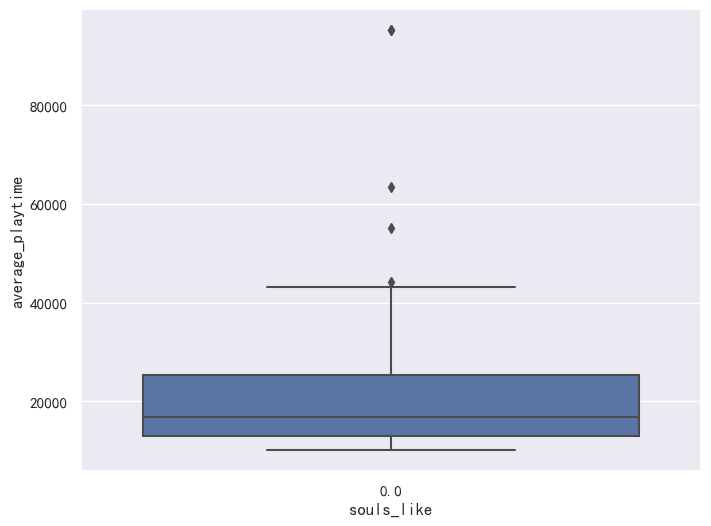

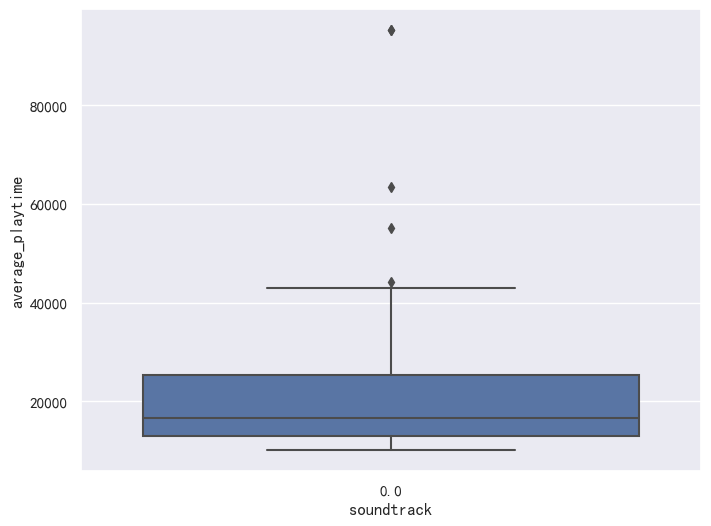

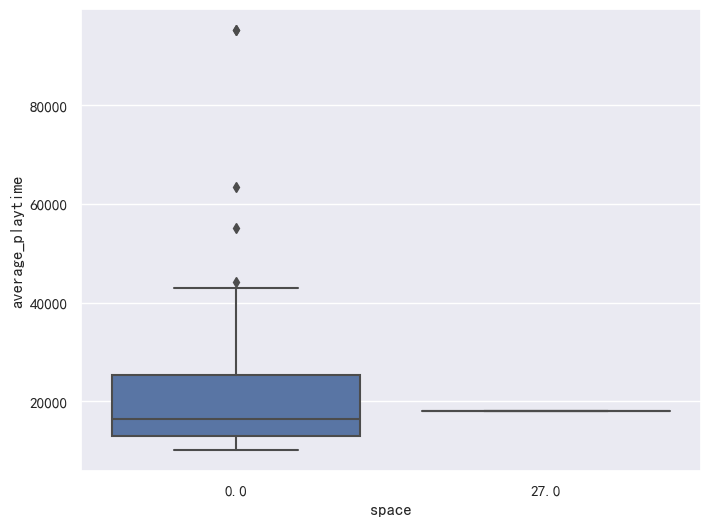

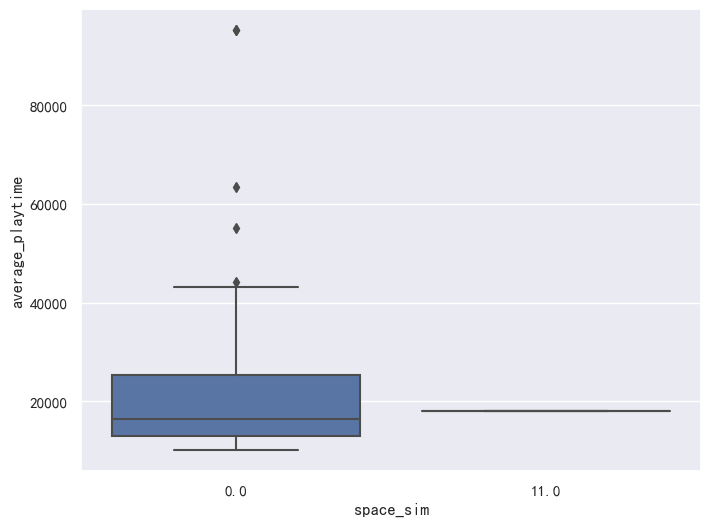

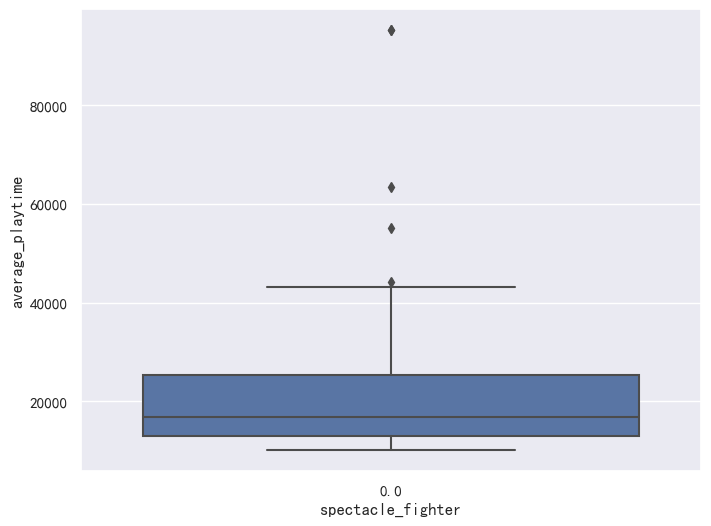

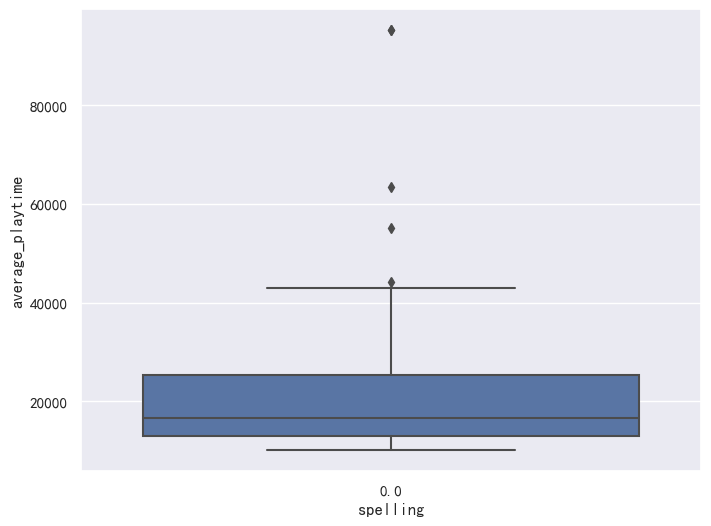

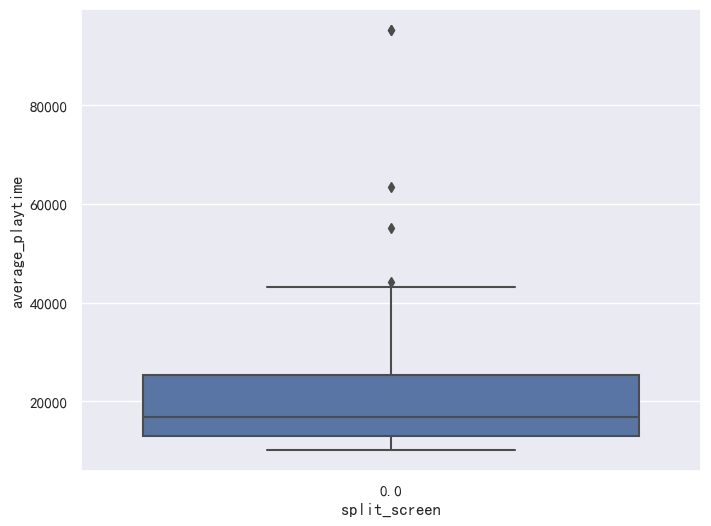

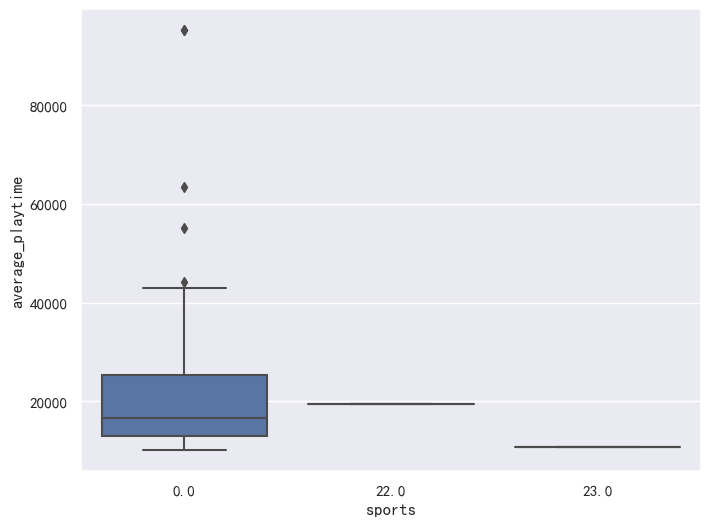

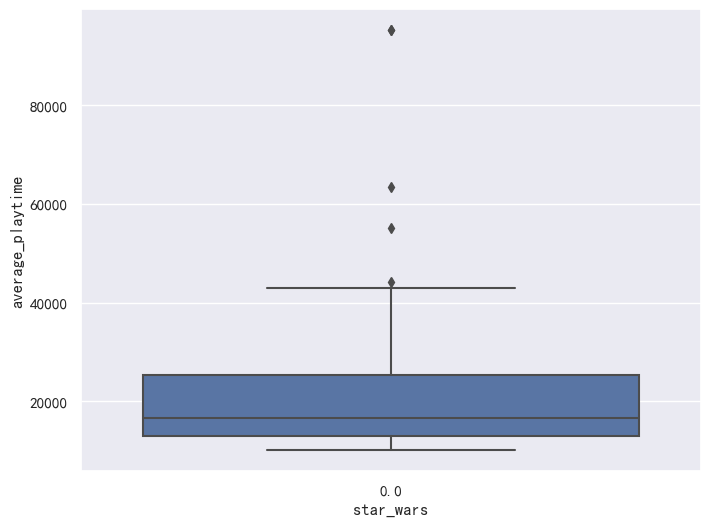

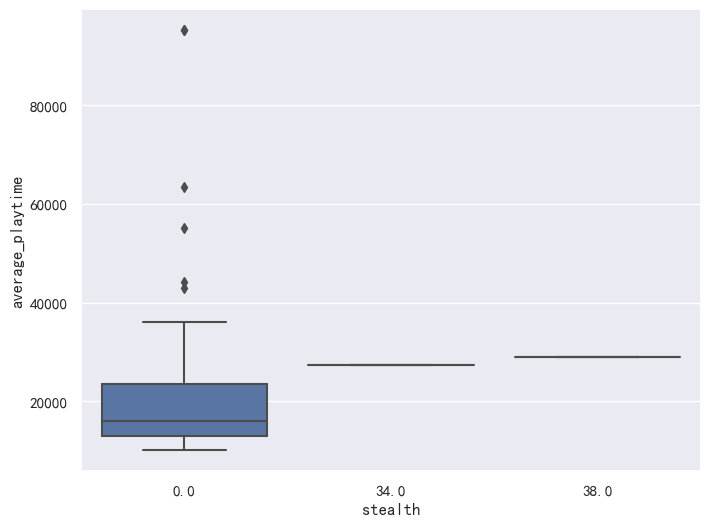

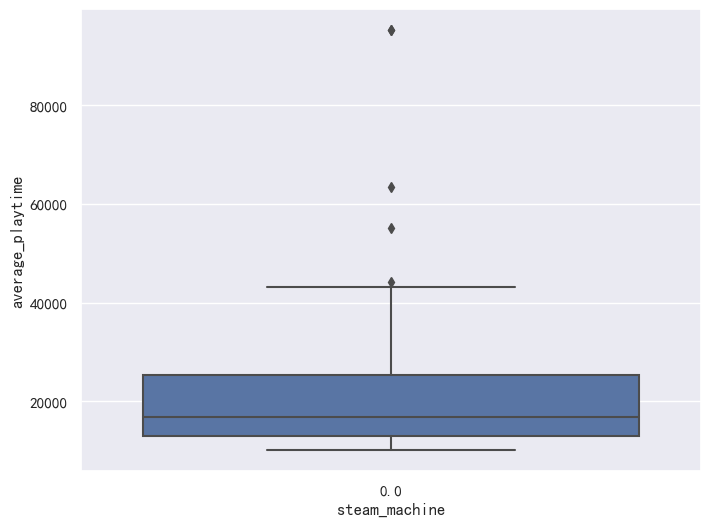

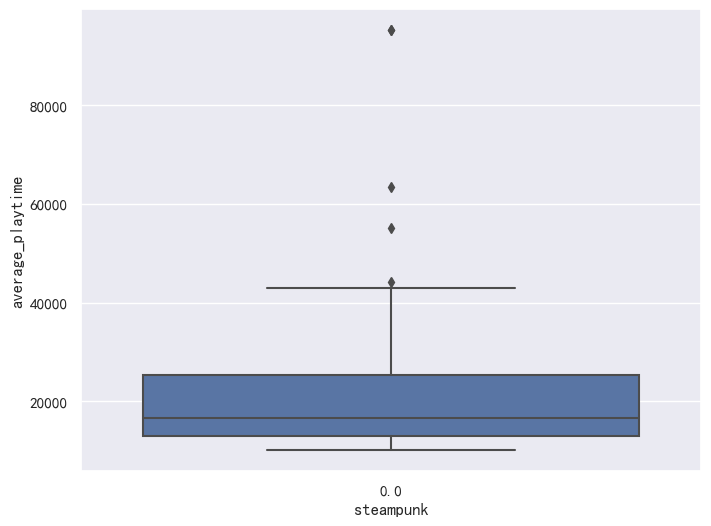

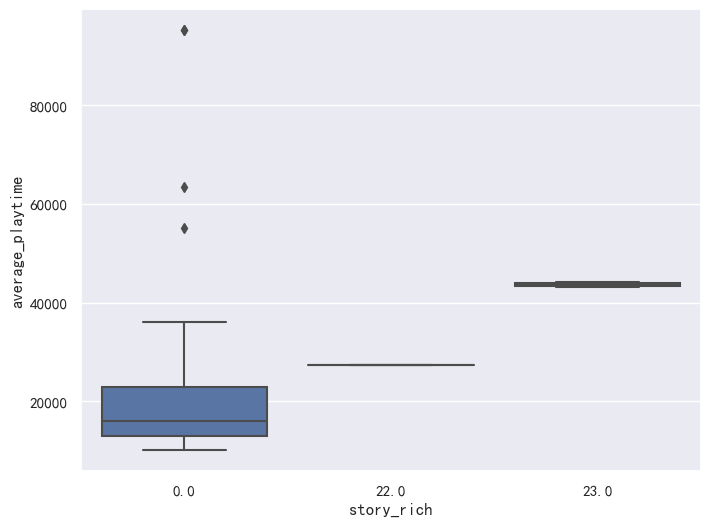

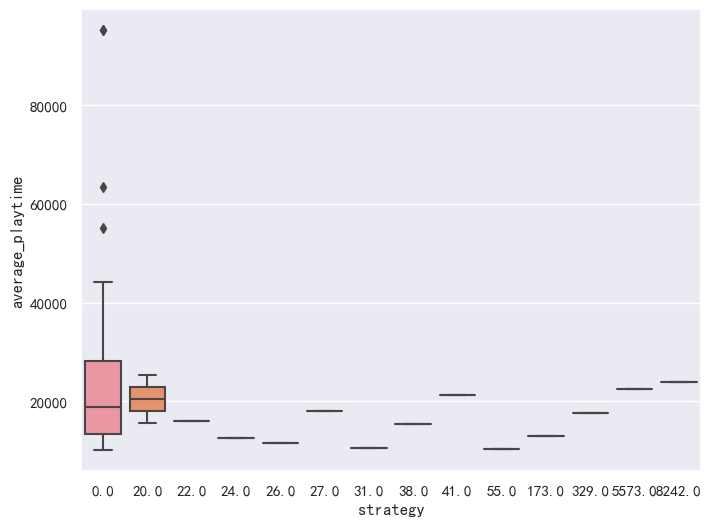

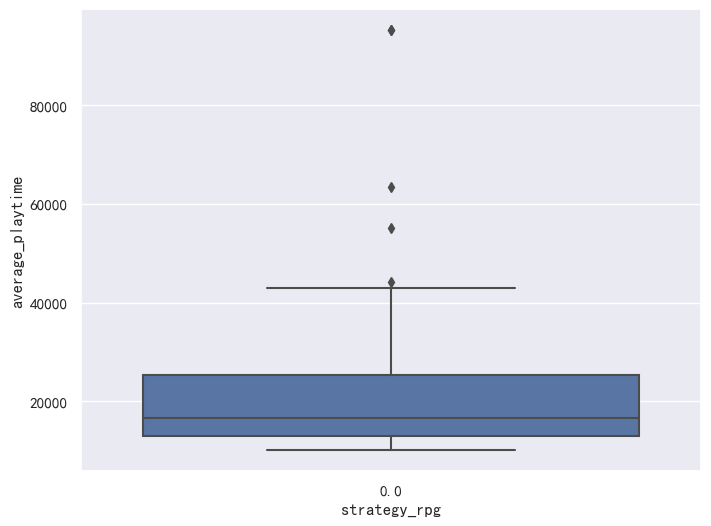

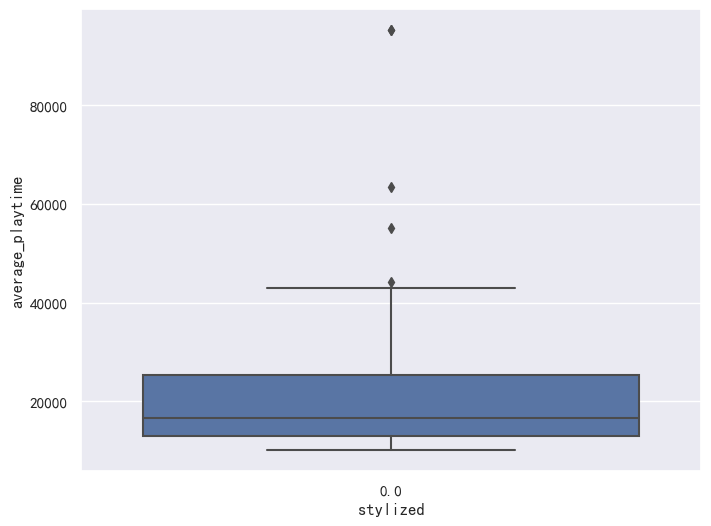

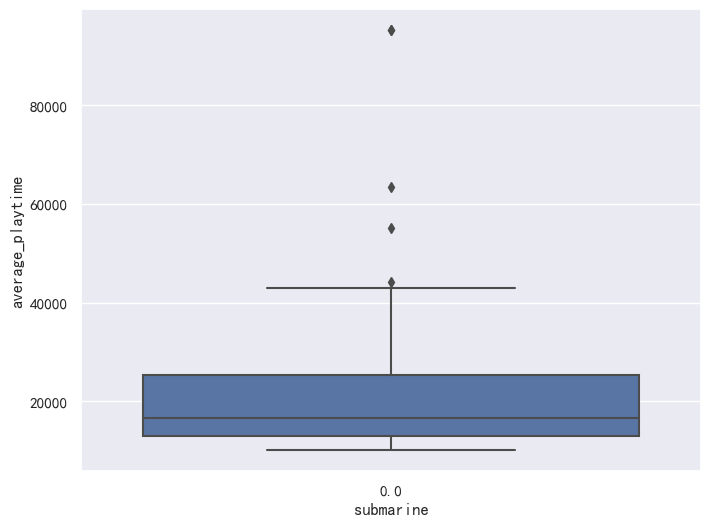

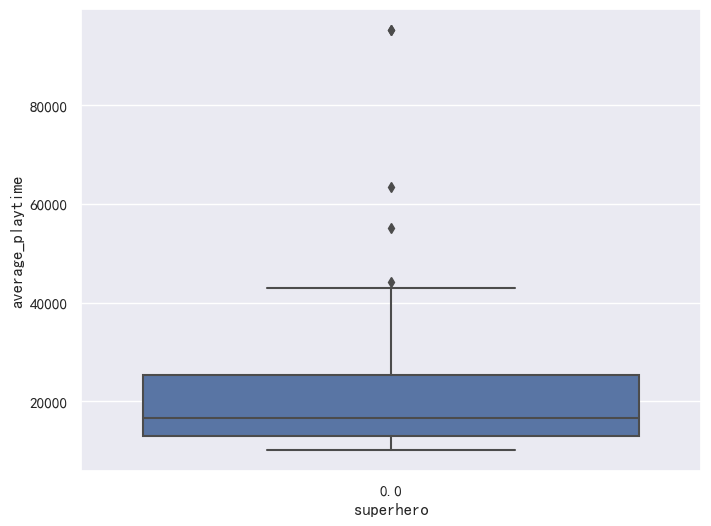

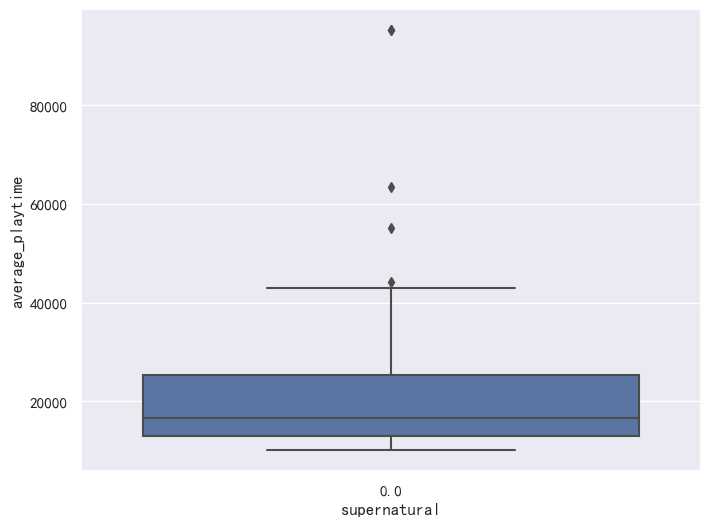

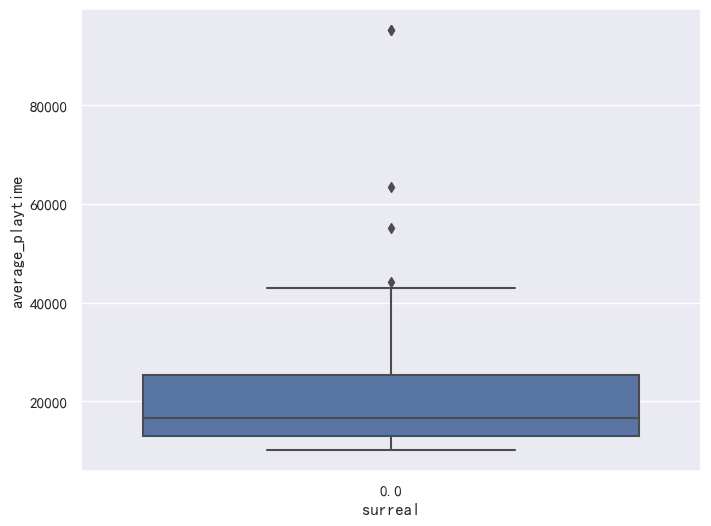

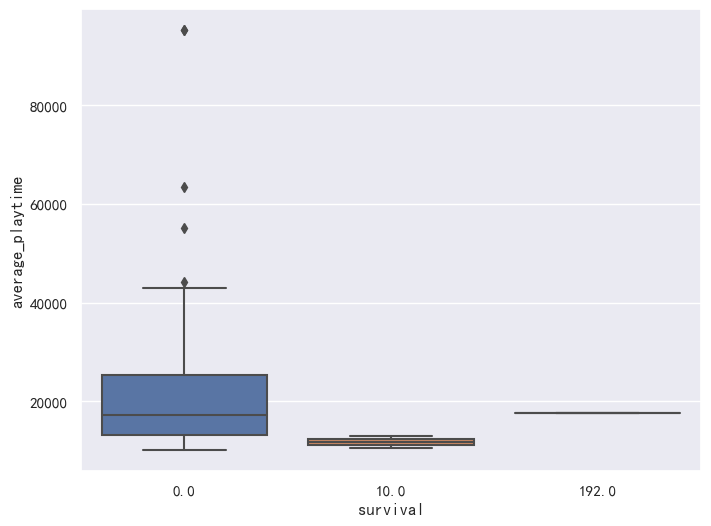

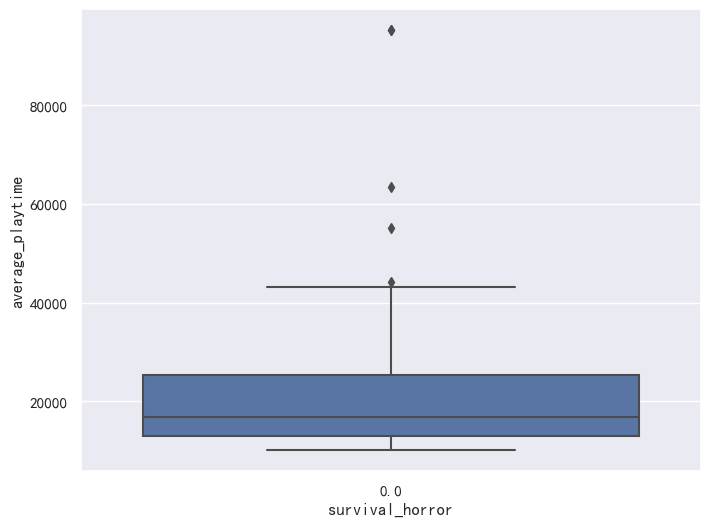

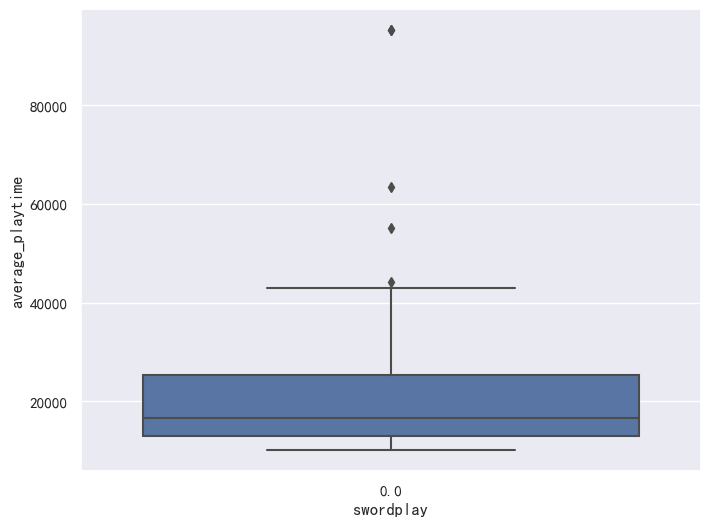

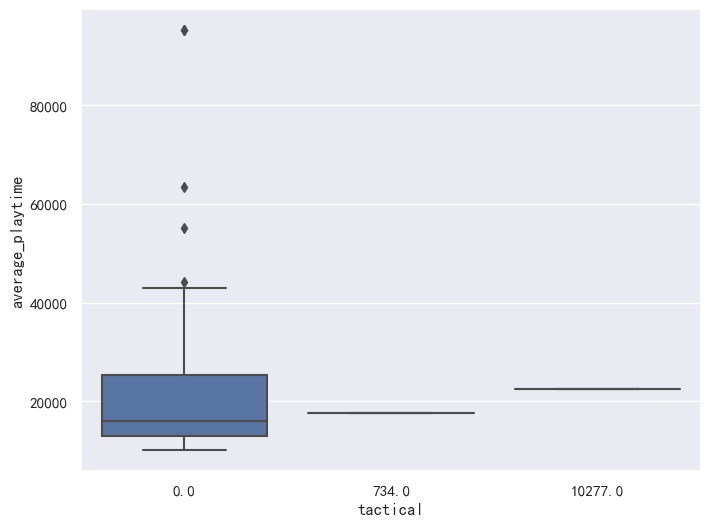

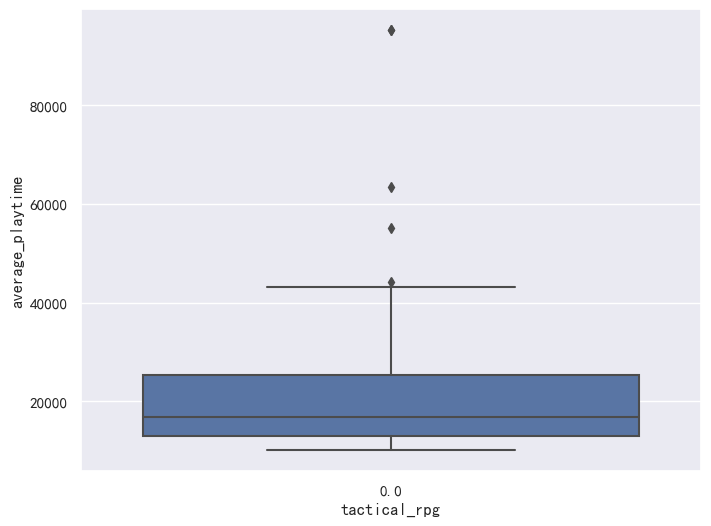

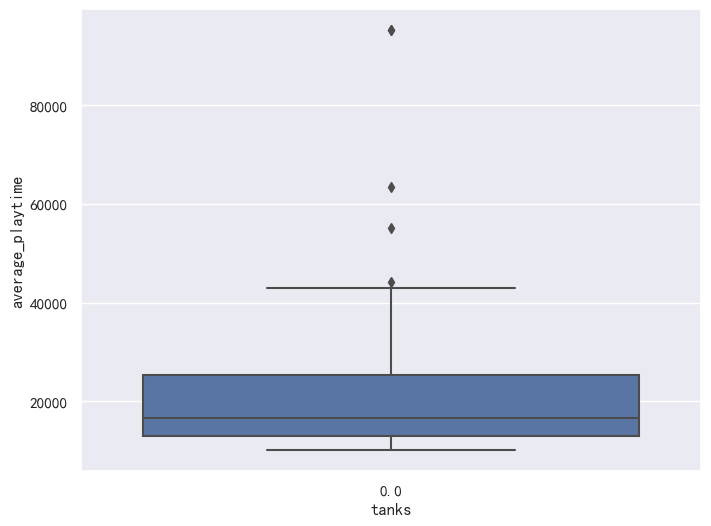

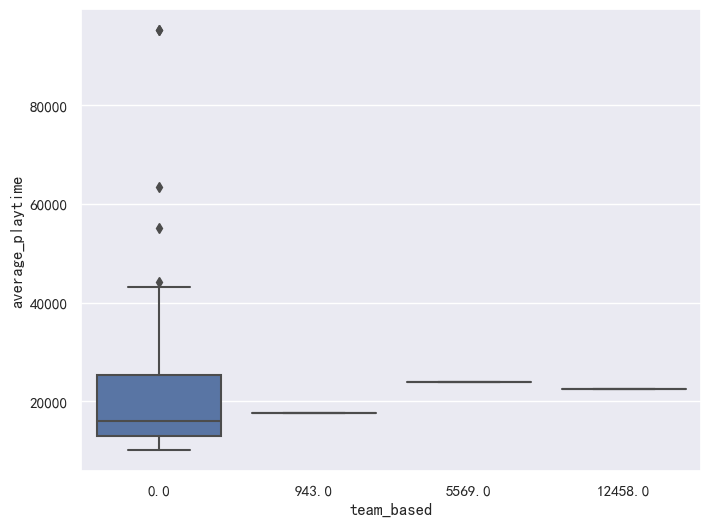

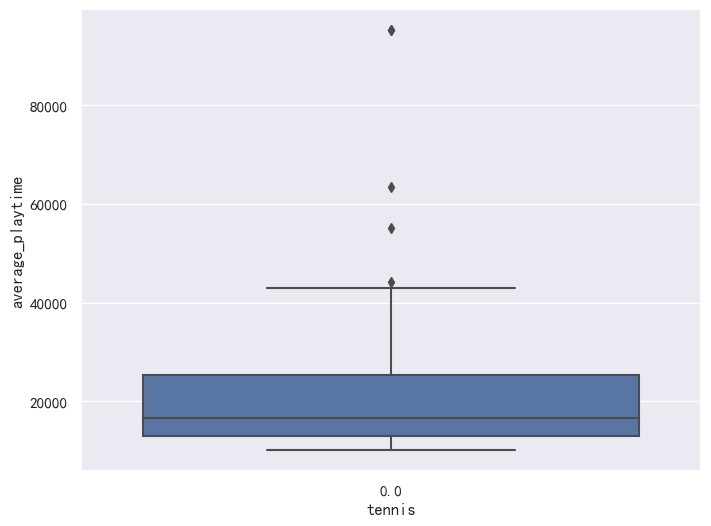

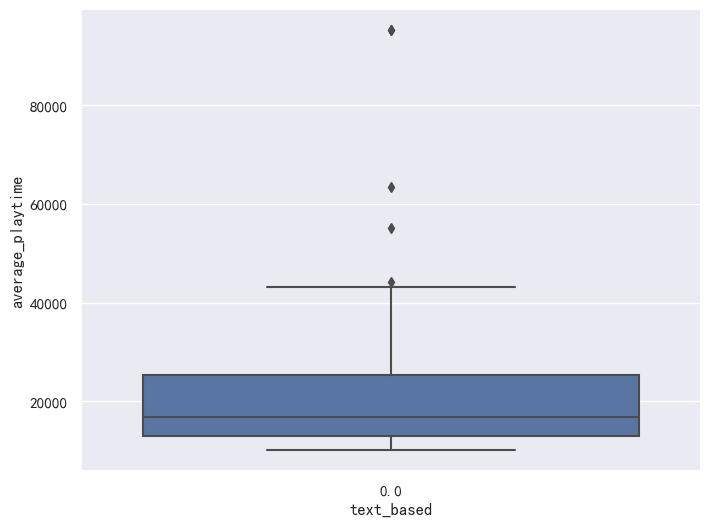

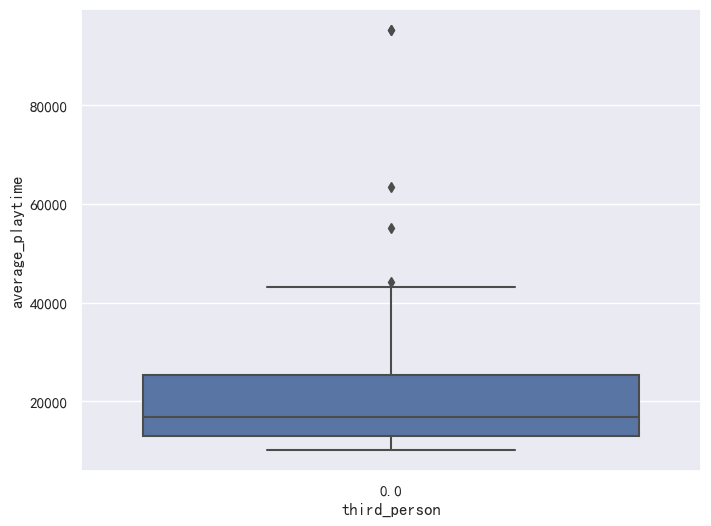

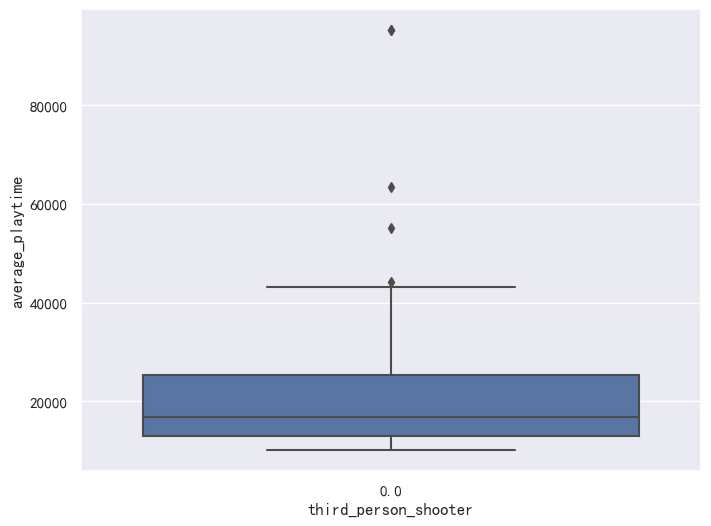

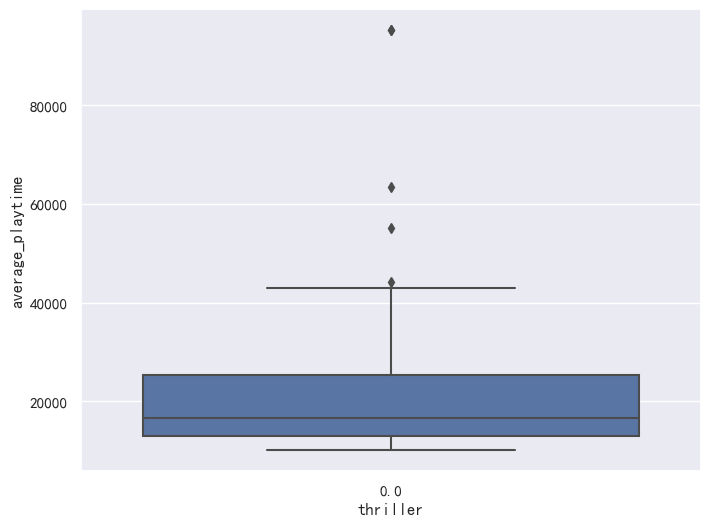

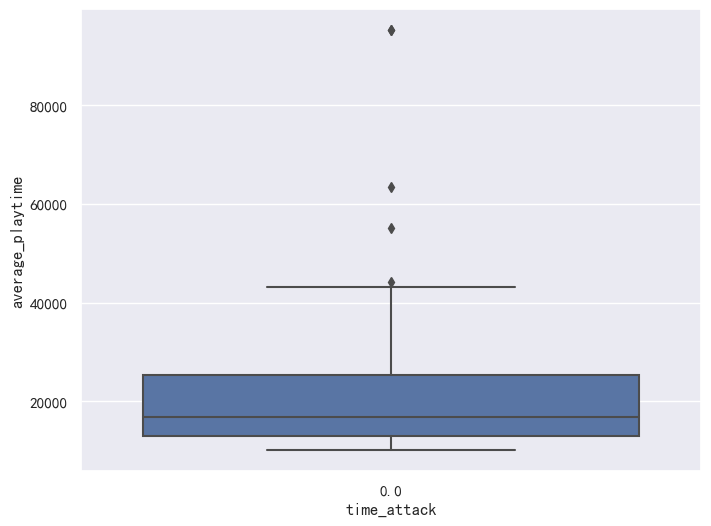

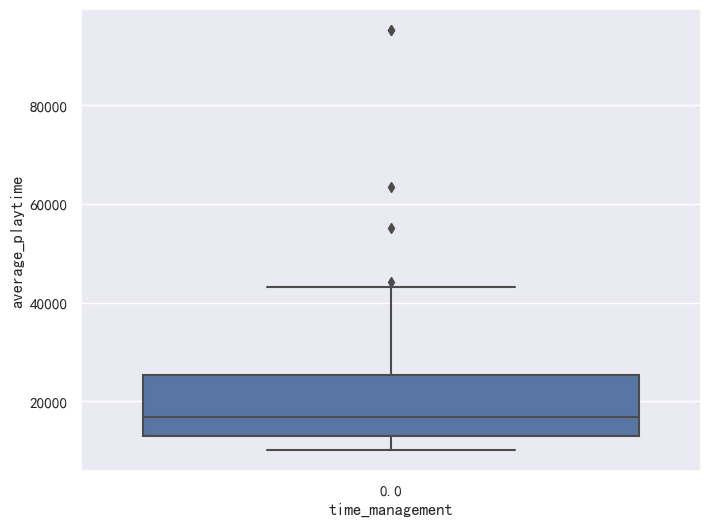

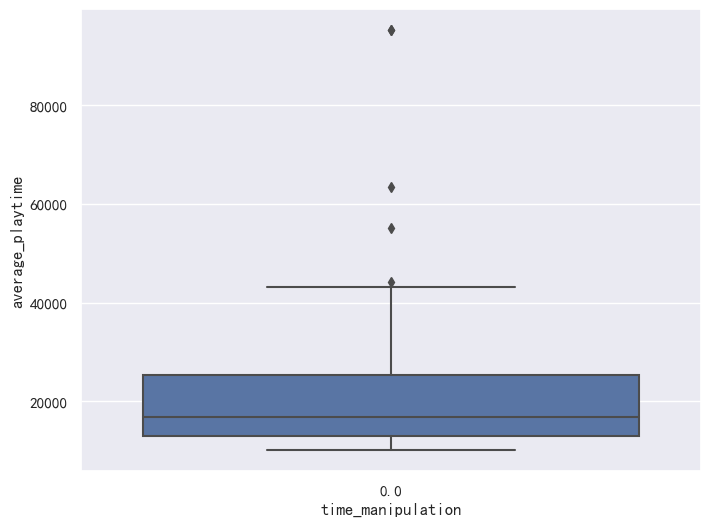

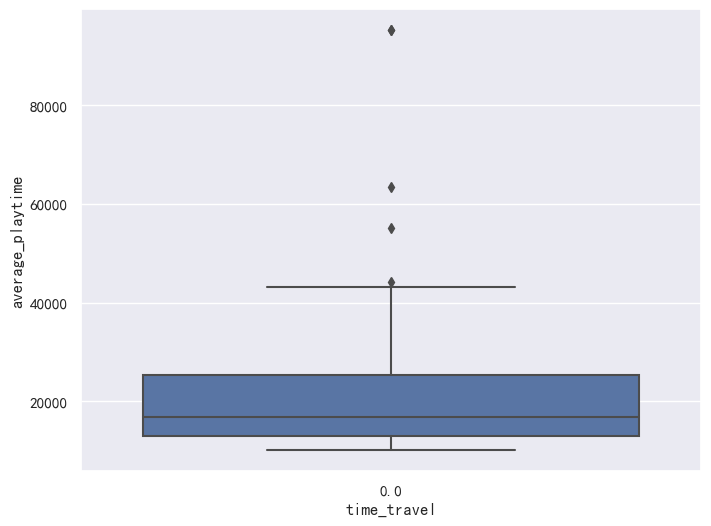

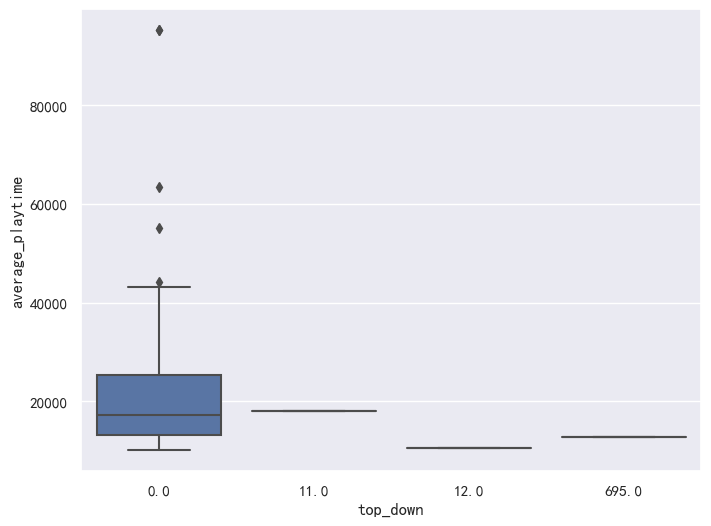

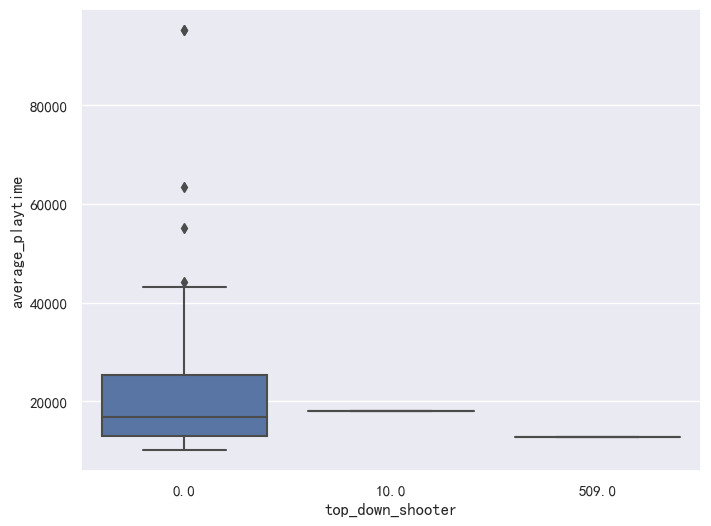

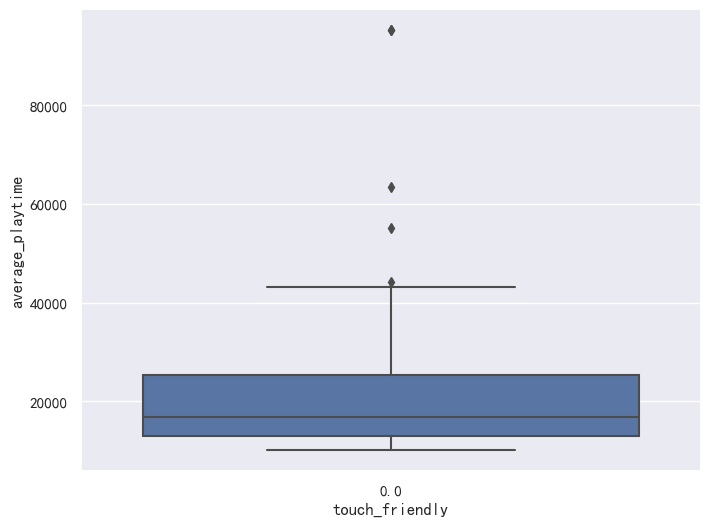

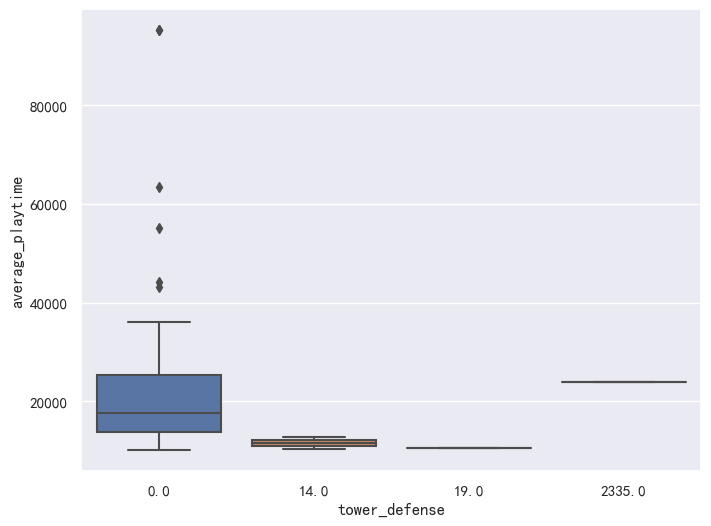

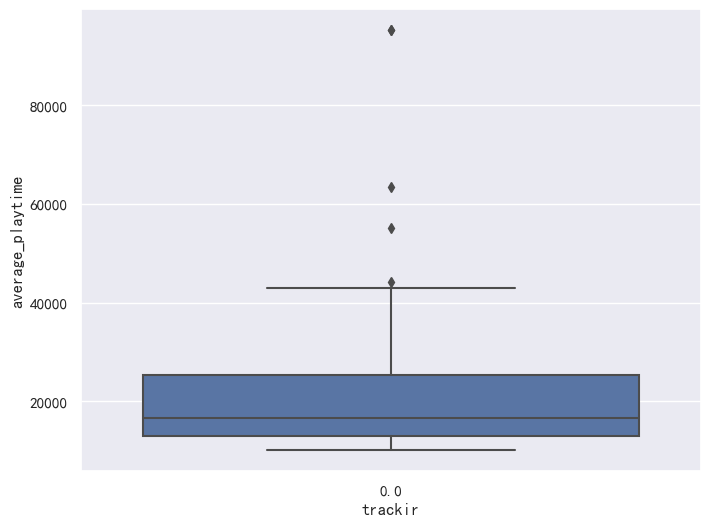

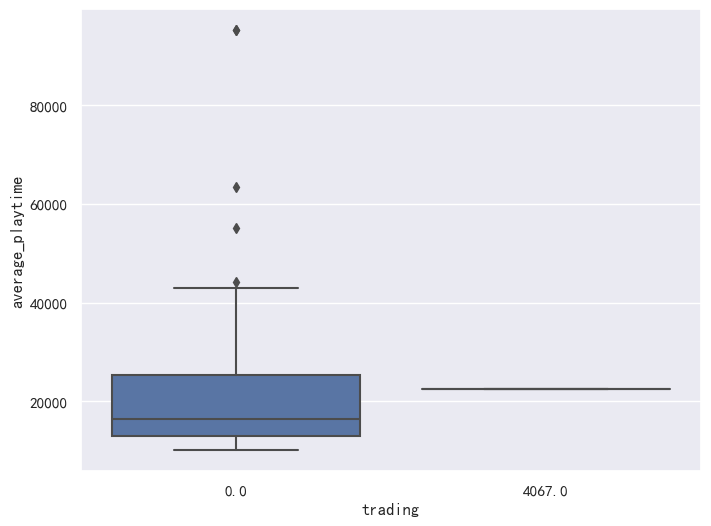

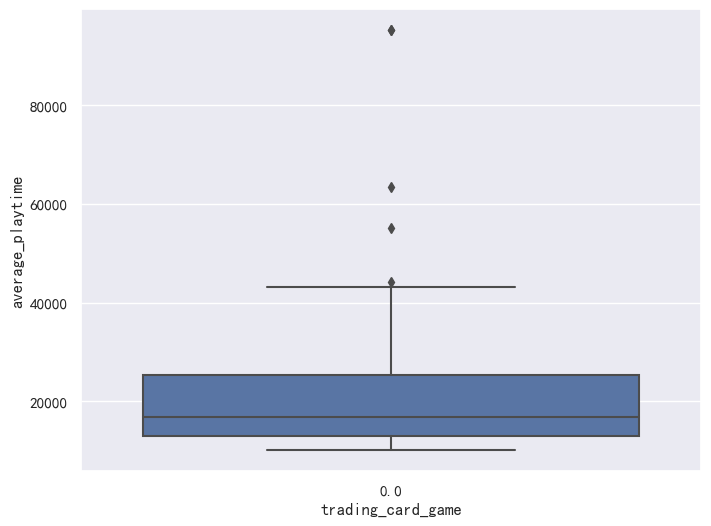

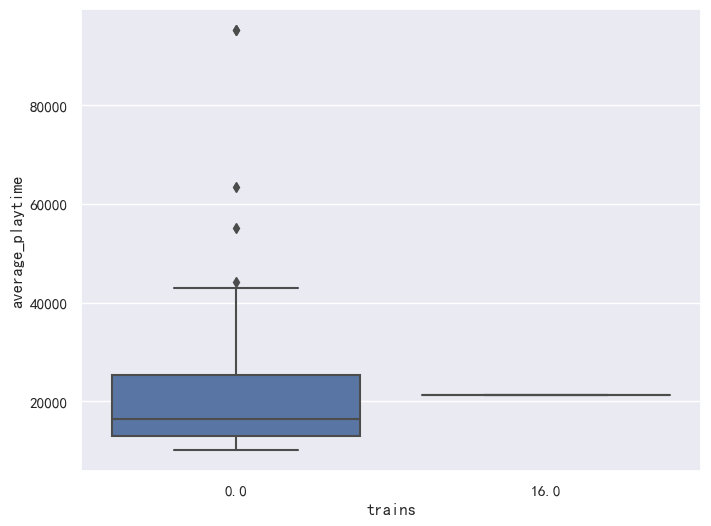

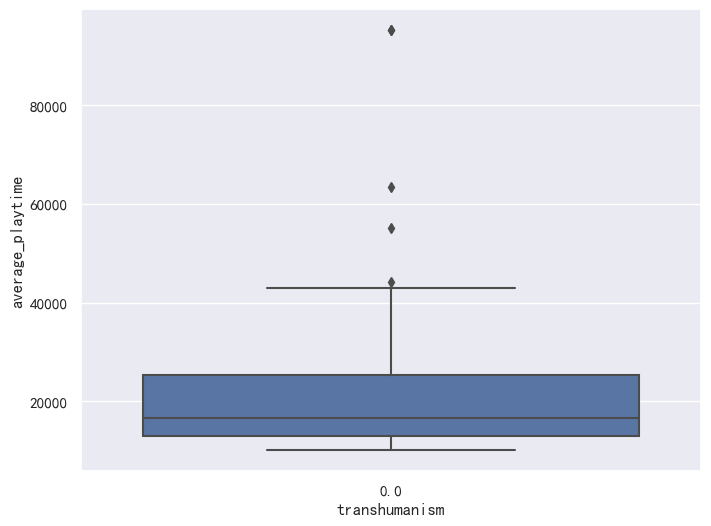

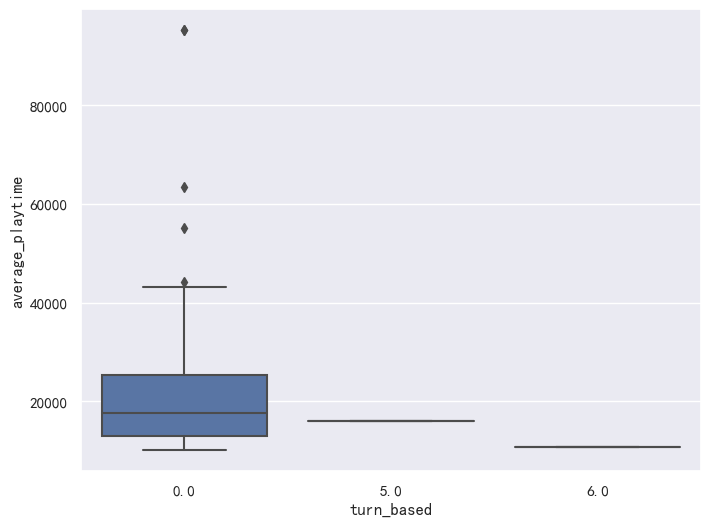

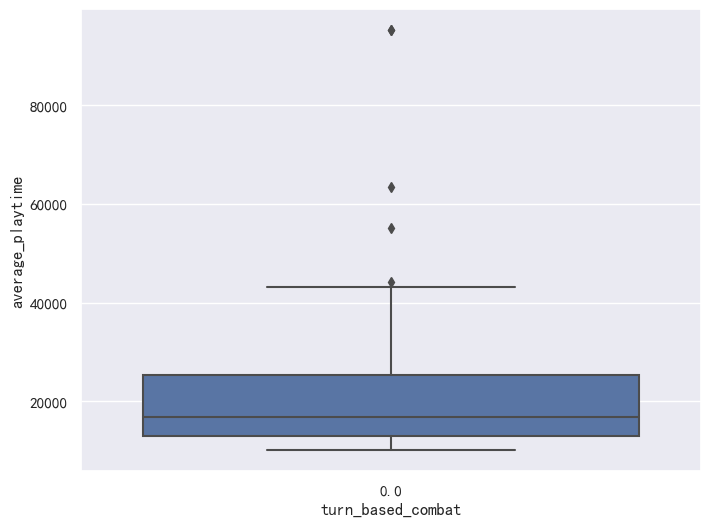

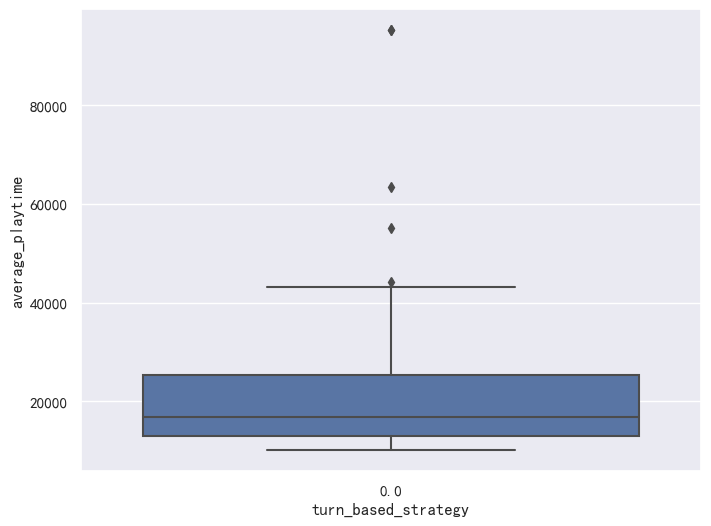

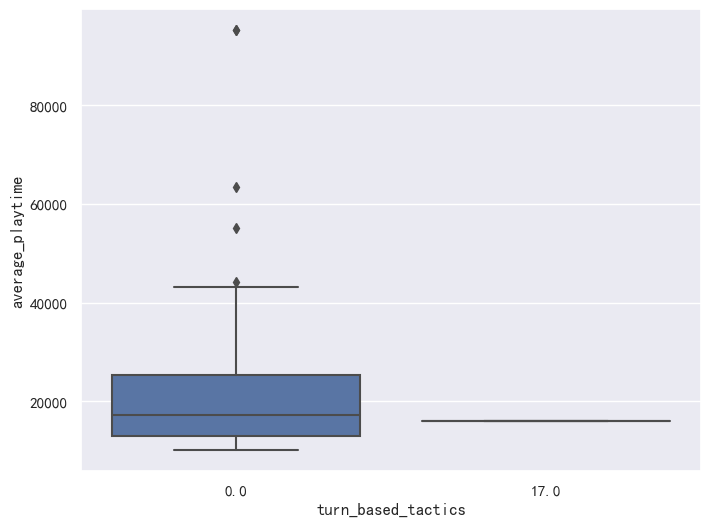

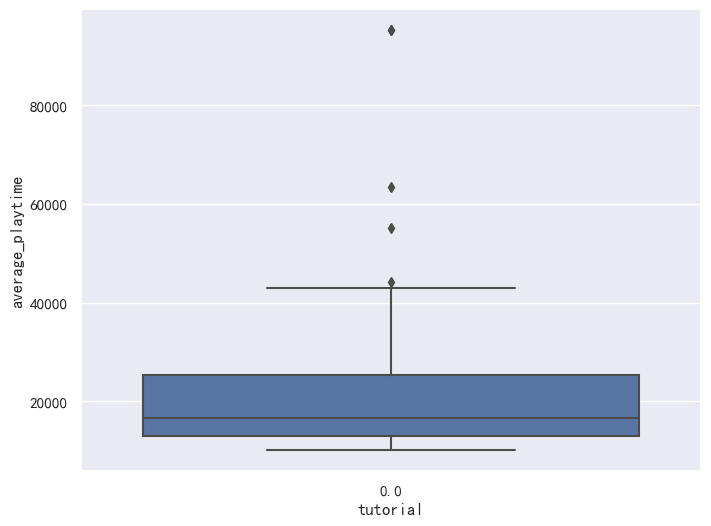

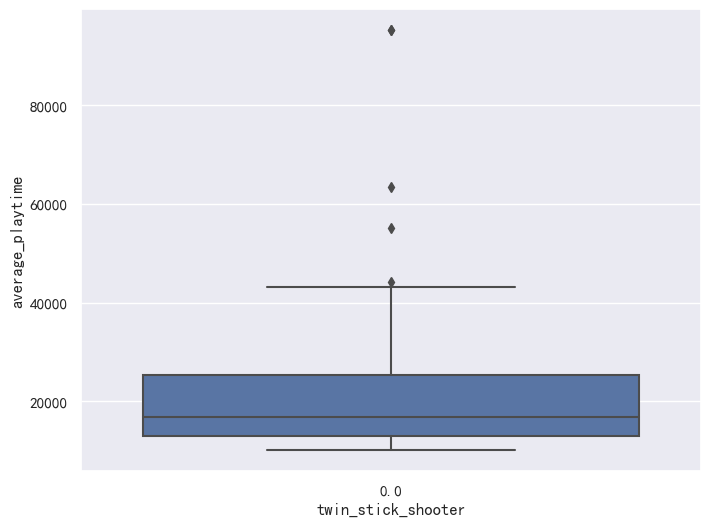

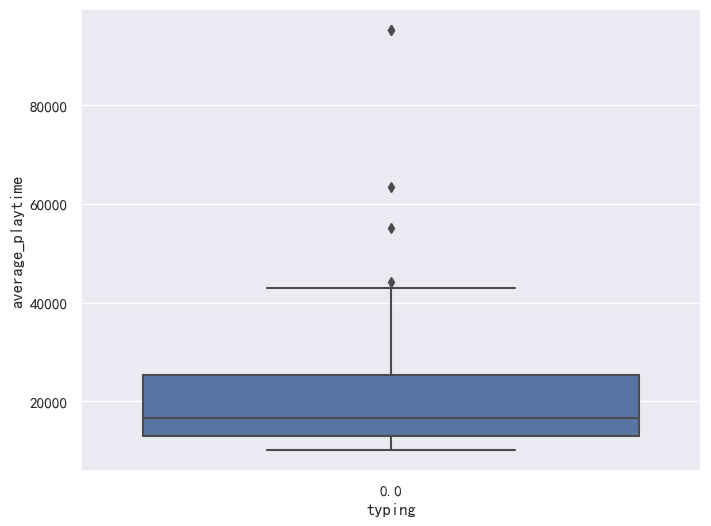

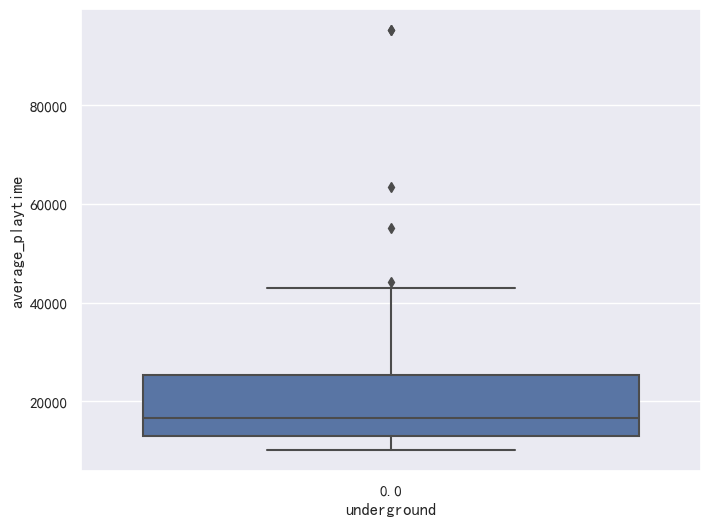

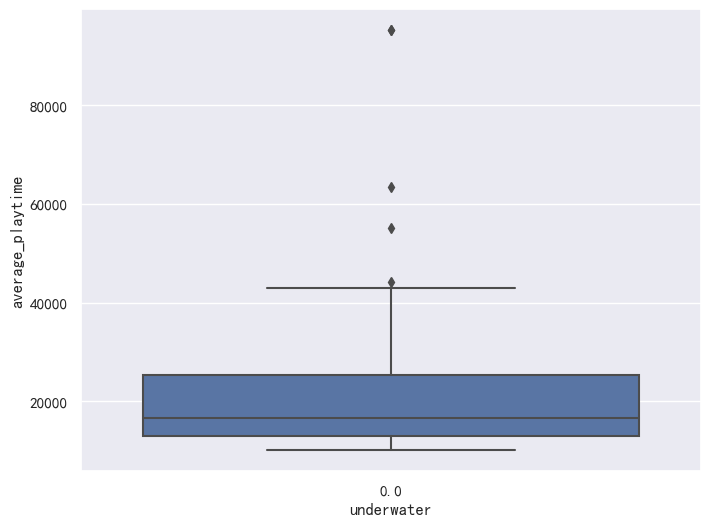

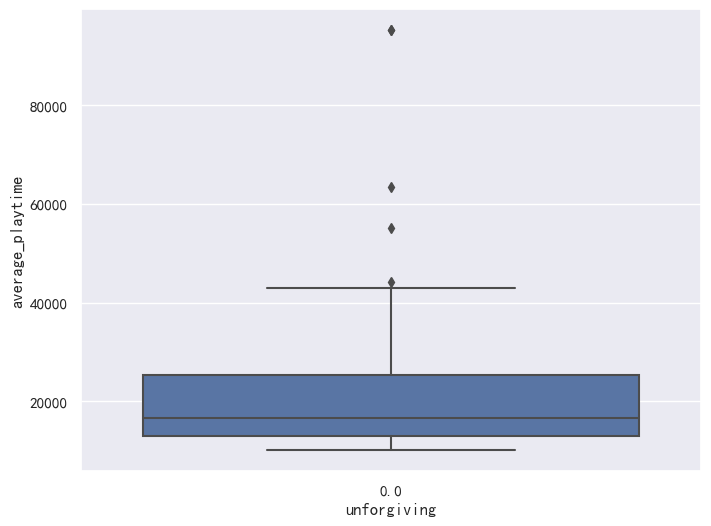

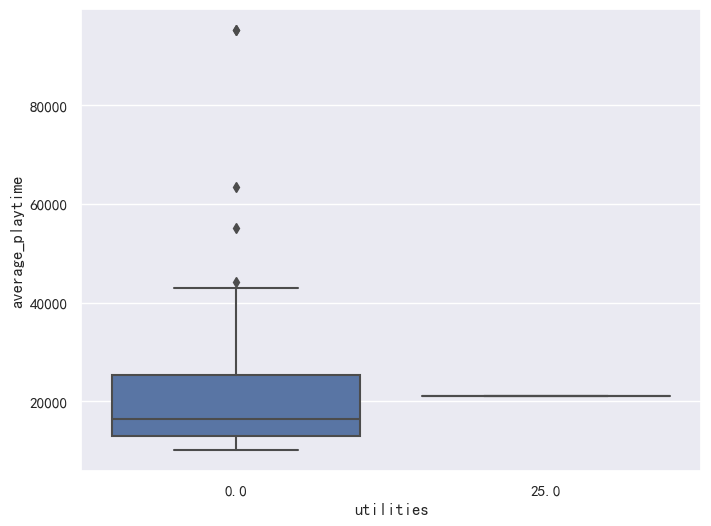

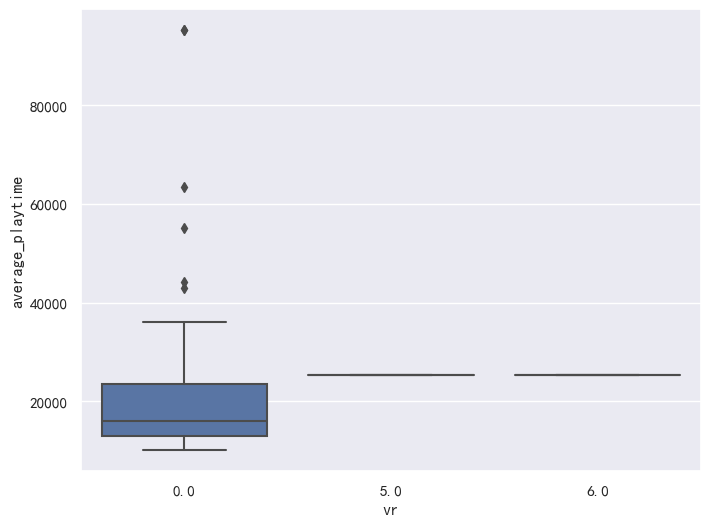

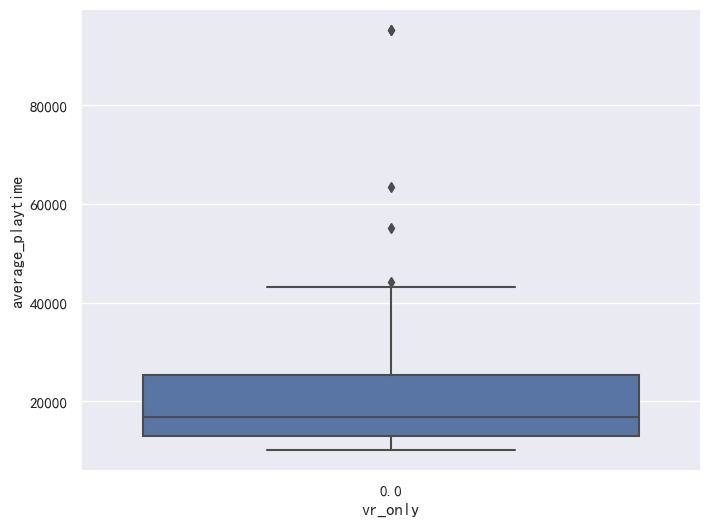

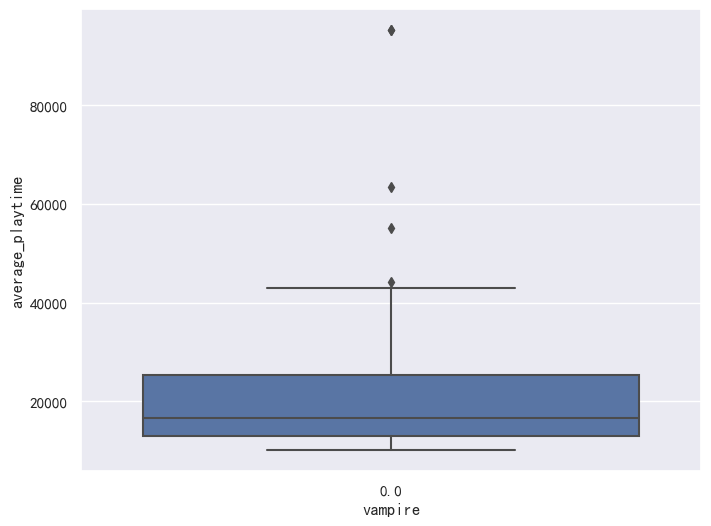

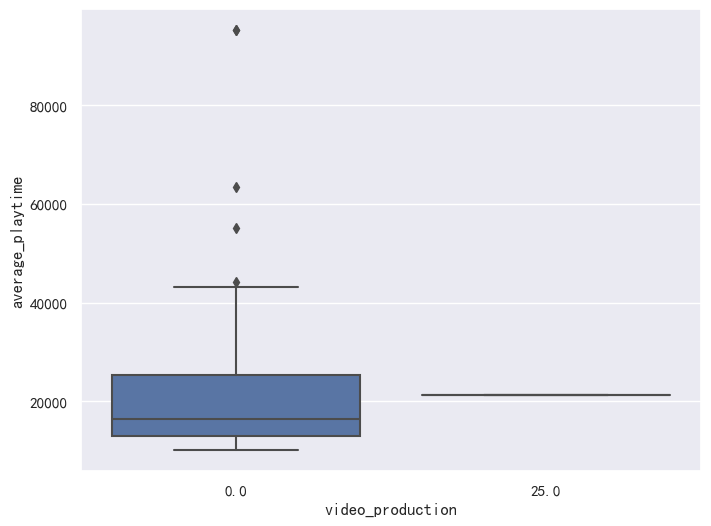

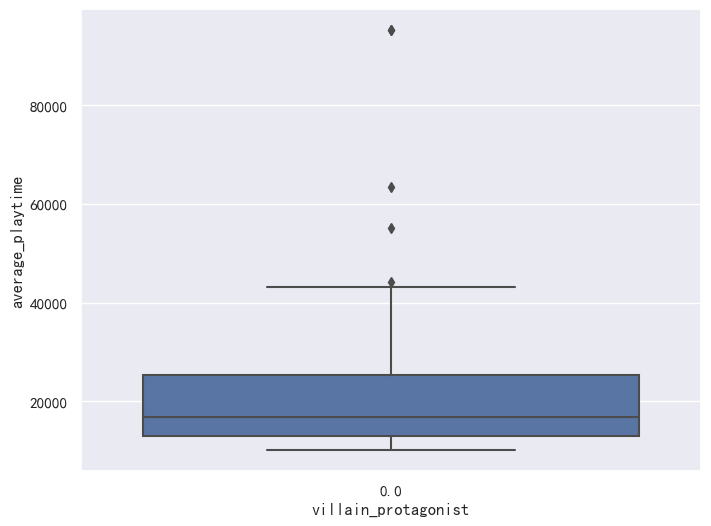

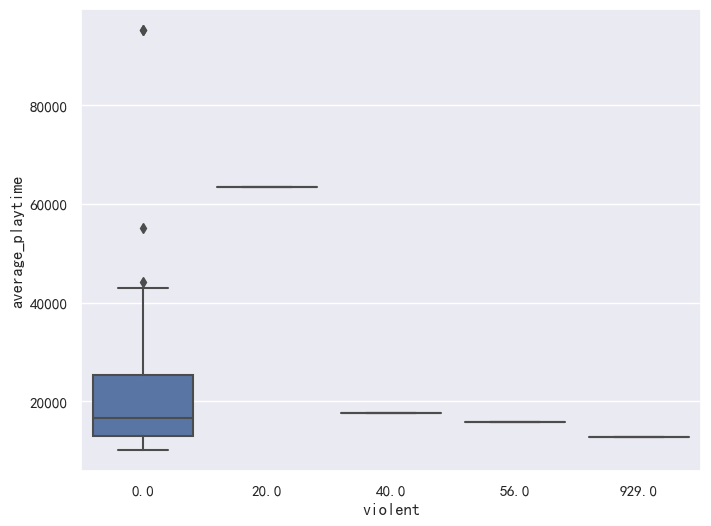

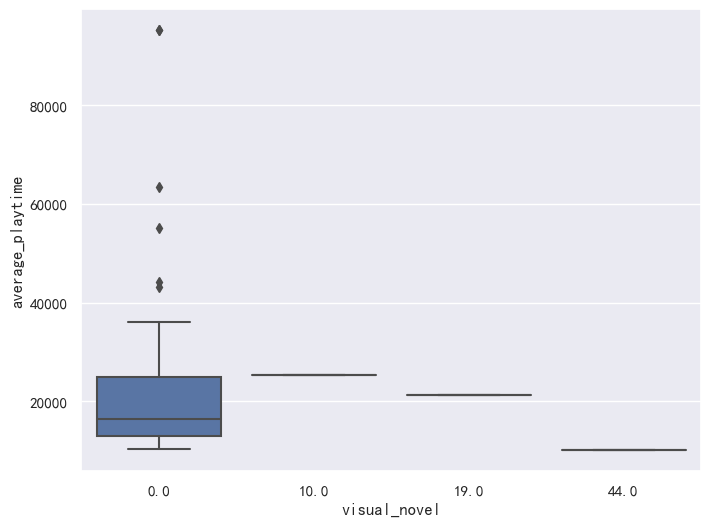

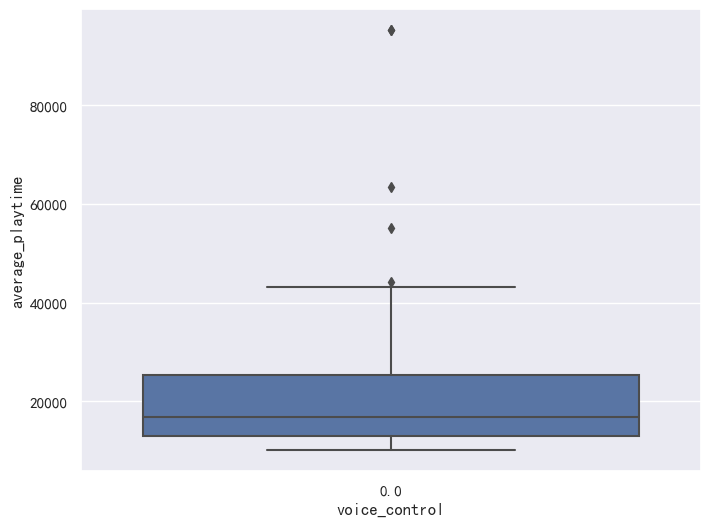

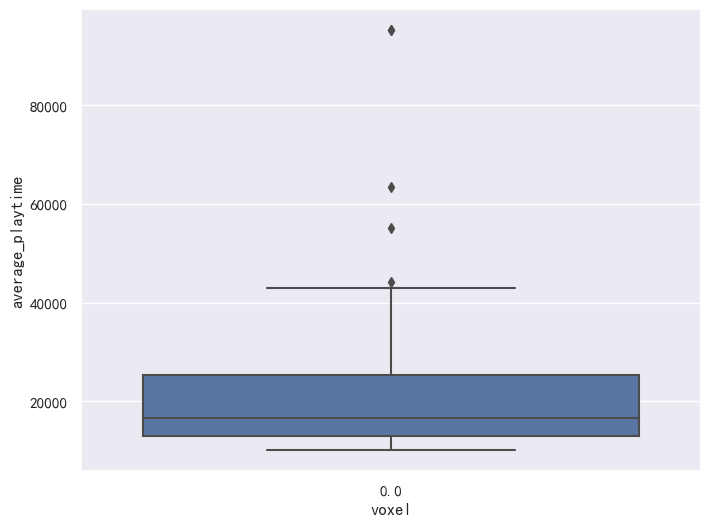

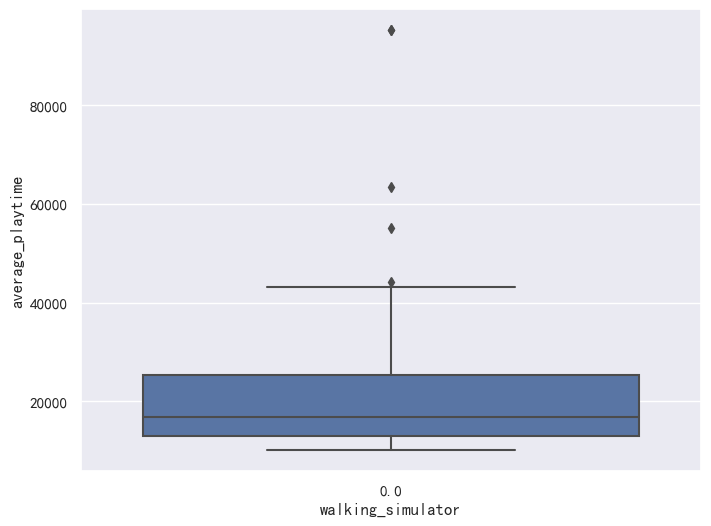

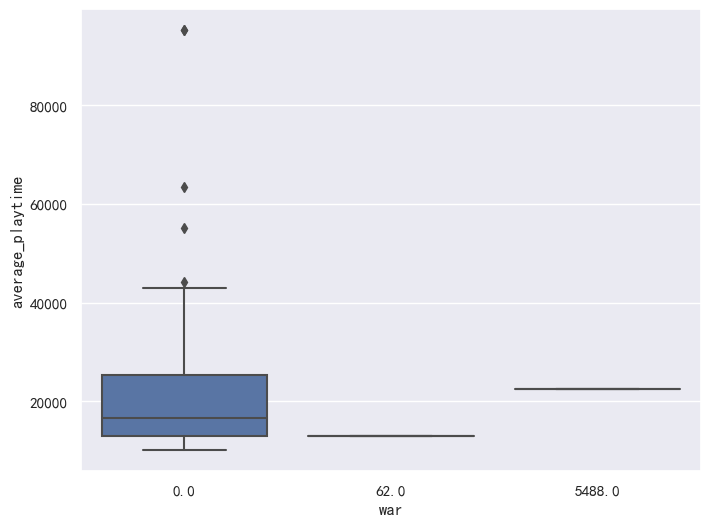

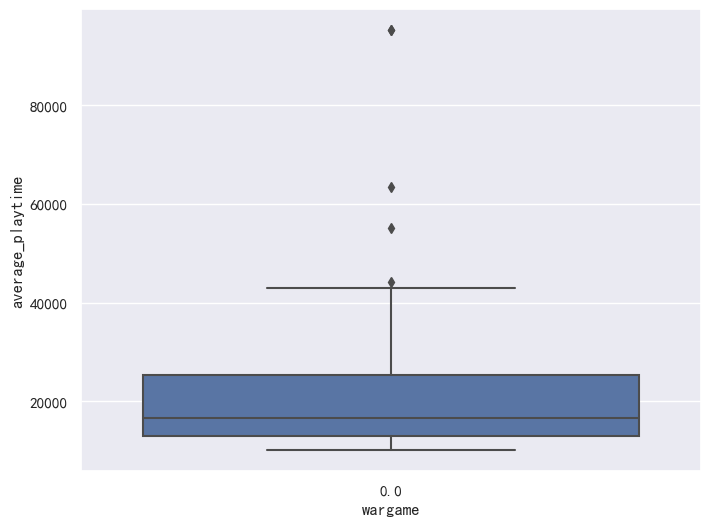

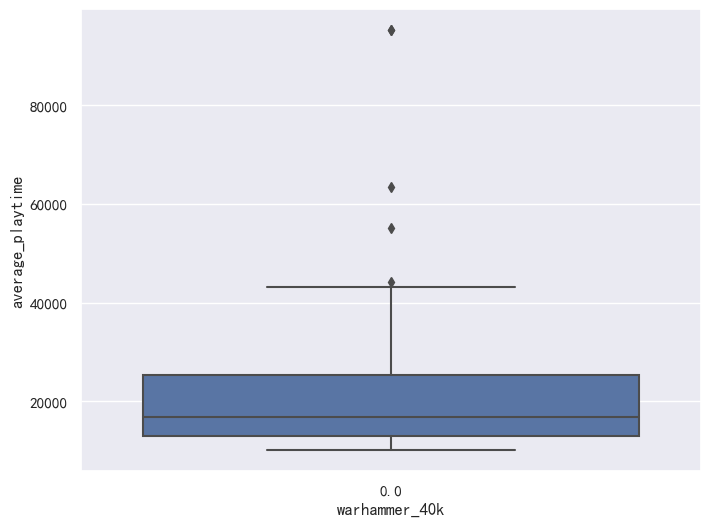

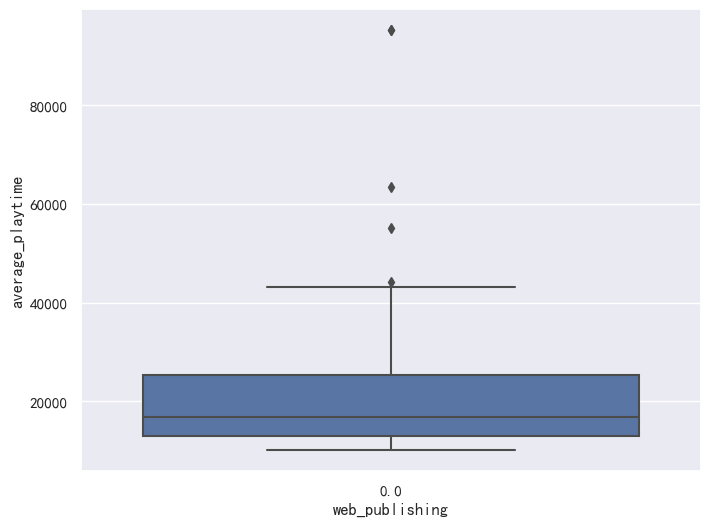

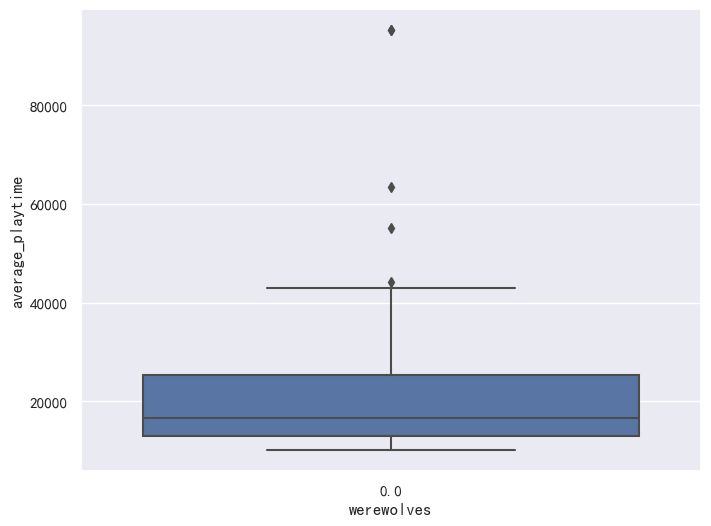

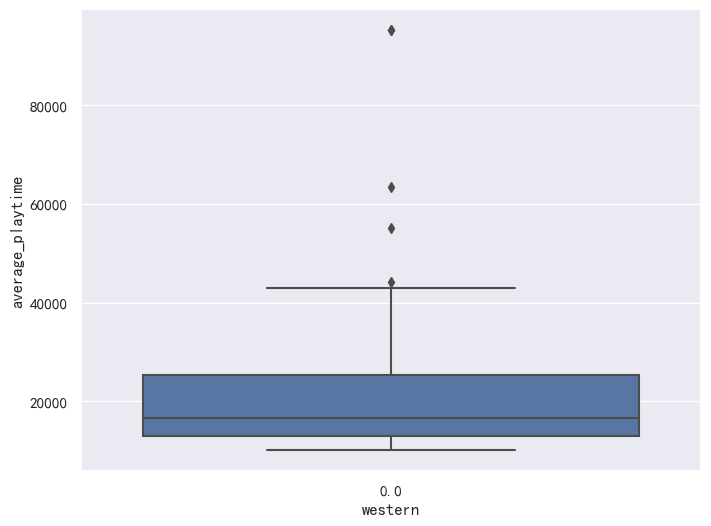

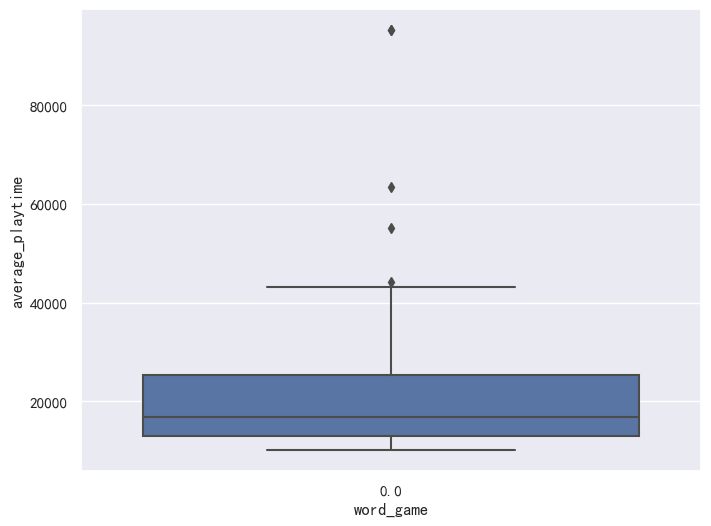

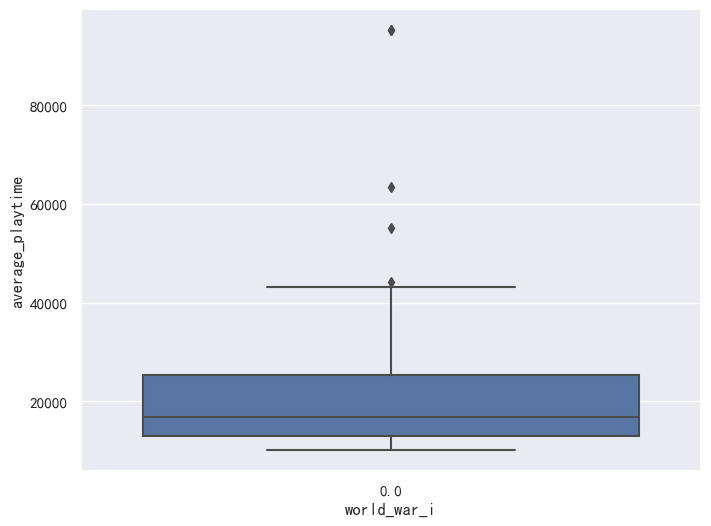

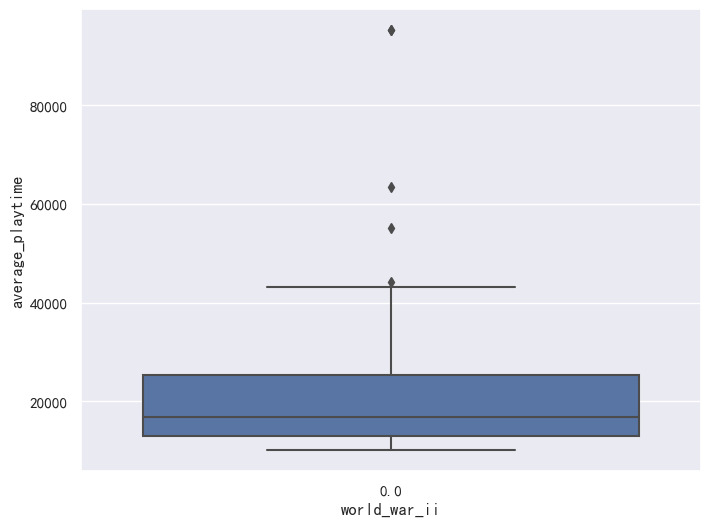

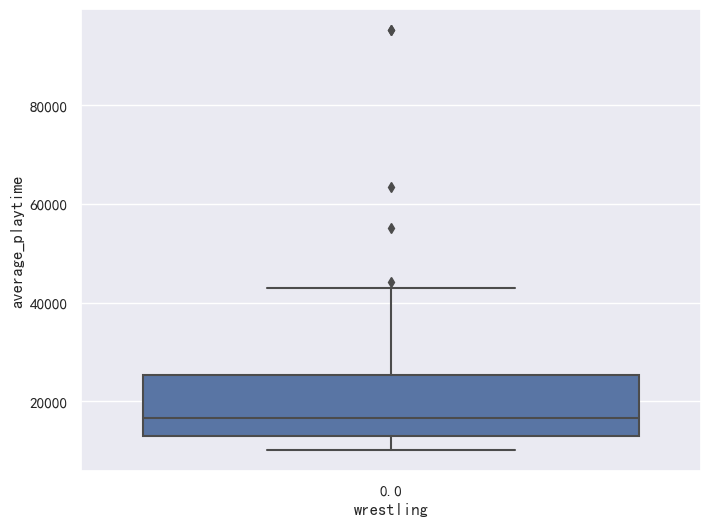

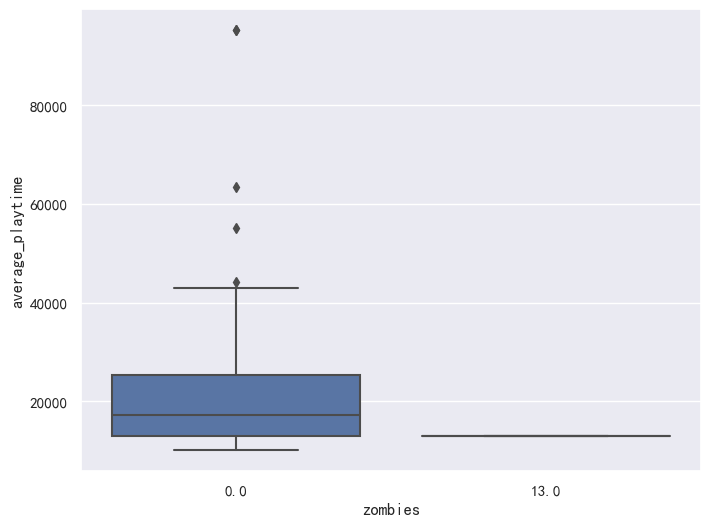

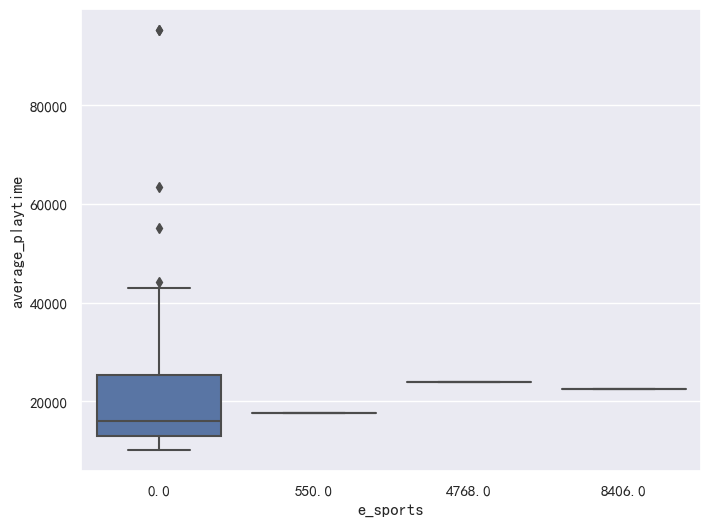

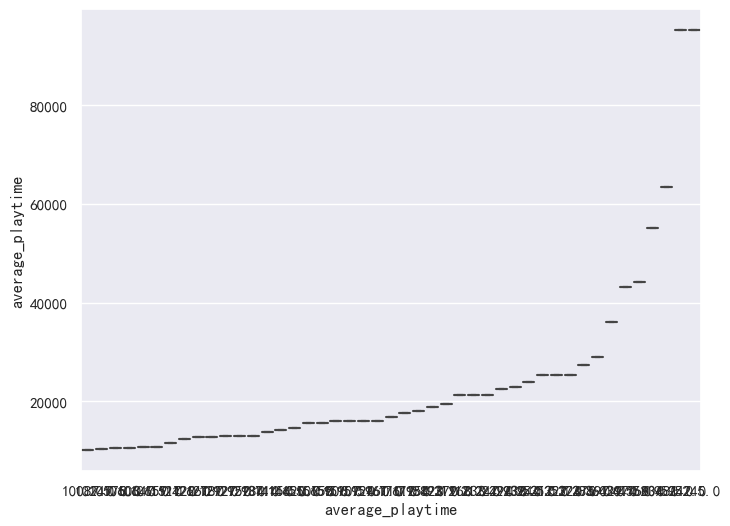

In [42]:
plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually

#i=0
for var in playtimeDF:
    # Box-plot of average playtime against each of the other variables
    f = plt.figure(figsize=(8, 6))
    sb.boxplot(x = var, y = 'average_playtime', data = playtimeDF)
    #i+=1
    #if i == 20:
        #break

check correlation table between steamspy tags.

In [43]:
steamspyCorr = steamspy.corr()
steamspyCorr

appid     1980s     1990s      2.5d        2d  \
appid             1.000000 -0.021100 -0.051036 -0.028542 -0.053489   
1980s            -0.021100  1.000000  0.240483 -0.000913  0.054873   
1990s            -0.051036  0.240483  1.000000  0.018120  0.021371   
2.5d             -0.028542 -0.000913  0.018120  1.000000  0.044978   
2d               -0.053489  0.054873  0.021371  0.044978  1.000000   
...                    ...       ...       ...       ...       ...   
world_war_ii     -0.039910 -0.000752  0.000544 -0.000961 -0.002297   
wrestling        -0.007720 -0.000462 -0.000642 -0.000839  0.002119   
zombies          -0.038215 -0.000674  0.000045  0.001235  0.002873   
e_sports         -0.021863  0.005809  0.036659  0.001801 -0.000679   
average_playtime -0.091736  0.034438  0.075856 -0.000141  0.008920   

                  2d_fighter  360_video        3d  3d_platformer  3d_vision  \
appid              -0.026457   0.003576  0.008996      -0.024940  -0.043087   
1980s              -0.000836  -0.000306 -0.001270      -0.001210  -0.000730   
1990s              -0.001161  -0.000426 -0.001764       0.006521  -0.001014   
2.5d                0.191554  -0.000556  0.004688       0.015776   0.005072   
2d                  0.084835  -0.001001  0.004271       0.002683   0.006549   
...                      ...        ...       ...            ...        ...   
world_war_ii       -0.001093  -0.000401  0.000055      -0.001582  -0.000955   
wrestling          -0.000672  -0.000246  0.013708      -0.000973  -0.000587   
zombies            -0.000913  -0.000386 -0.001576      -0.001316   0.010767   
e_sports            0.004422  -0.000133 -0.000522      -0.000411  -0.000193   
average_playtime   -0.000682  -0.000562 -0.001752       0.000750   0.001341   

                  ...  web_publishing  werewolves   western  word_game  \
appid             ...       -0.013983   -0.019417 -0.026116  -0.003929   
1980s             ...       -0.000656   -0.000471 -0.000537  -0.000551   
1990s             ...       -0.000912   -0.000199 -0.000746  -0.000765   
2.5d              ...       -0.001191    0.000890 -0.000846  -0.001000   
2d                ...        0.003881    0.000154  0.001849   0.004169   
...               ...             ...         ...       ...        ...   
world_war_ii      ...       -0.000859   -0.000617 -0.000702  -0.000721   
wrestling         ...       -0.000528   -0.000379 -0.000432  -0.000443   
zombies           ...       -0.000827   -0.000409  0.001644   0.000292   
e_sports          ...       -0.000286   -0.000205 -0.000200  -0.000240   
average_playtime  ...        0.002211   -0.001379 -0.000651  -0.000632   

                  world_war_i  world_war_ii  wrestling   zombies  e_sports  \
appid               -0.019339     -0.039910  -0.007720 -0.038215 -0.021863   
1980s               -0.000397     -0.000752  -0.000462 -0.000674  0.005809   
1990s               -0.000516      0.000544  -0.000642  0.000045  0.036659   
2.5d                -0.000721     -0.000961  -0.000839  0.001235  0.001801   
2d                   0.025291     -0.002297   0.002119  0.002873 -0.000679   
...                       ...           ...        ...       ...       ...   
world_war_ii         0.006270      1.000000  -0.000605  0.018459 -0.000327   
wrestling           -0.000319     -0.000605   1.000000 -0.000583 -0.000201   
zombies             -0.000443      0.018459  -0.000583  1.000000 -0.000316   
e_sports            -0.000173     -0.000327  -0.000201 -0.000316  1.000000   
average_playtime    -0.000245      0.003731  -0.000958  0.005880  0.149006   

                  average_playtime  
appid                    -0.091736  
1980s                     0.034438  
1990s                     0.075856  
2.5d                     -0.000141  
2d                        0.008920  
...                            ...  
world_war_ii              0.003731  
wrestling                -0.000958  
zombies                   0.005880  
e_sports                  0.149006 

In [44]:
'''
fig = ff.create_annotated_heatmap(
    z=steamspyCorr.values,
    x=list(steamspyCorr.columns),
    y=list(steamspyCorr.index),
    colorscale=px.colors.diverging.RdBu,
    annotation_text=steamspyCorr.round(2).values,
    showscale=True, reversescale=True)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 8

#plt.rcParams['figure.figsize'] = [100, 30]
fig.show()
'''

"\nfig = ff.create_annotated_heatmap(\n    z=steamspyCorr.values,\n    x=list(steamspyCorr.columns),\n    y=list(steamspyCorr.index),\n    colorscale=px.colors.diverging.RdBu,\n    annotation_text=steamspyCorr.round(2).values,\n    showscale=True, reversescale=True)\n\nfor i in range(len(fig.layout.annotations)):\n    fig.layout.annotations[i].font.size = 8\n\n#plt.rcParams['figure.figsize'] = [100, 30]\nfig.show()\n"

## Clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import networkx as nx
from ast import literal_eval
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

In [46]:
tagDF2 = steamspy.copy()
tagDF2 = tagDF2.loc[:,tagDF2.max() > 4500]
tagDF2.info()
tagDF2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 26564 entries, 0 to 29021
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appid                 26564 non-null  float64
 1   2d                    26564 non-null  float64
 2   action                26564 non-null  float64
 3   adventure             26564 non-null  float64
 4   atmospheric           26564 non-null  float64
 5   building              26564 non-null  float64
 6   choices_matter        26564 non-null  float64
 7   class_based           26564 non-null  float64
 8   co_op                 26564 non-null  float64
 9   comedy                26564 non-null  float64
 10  competitive           26564 non-null  float64
 11  crafting              26564 non-null  float64
 12  crime                 26564 non-null  float64
 13  dark_fantasy          26564 non-null  float64
 14  dinosaurs             26564 non-null  float64
 15  driving               26

appid   2d  action  adventure  atmospheric  building  choices_matter  \
0   10.0  0.0  2681.0        0.0          0.0       0.0             0.0   
1   20.0  0.0   208.0       15.0          0.0       0.0             0.0   
2   30.0  0.0    99.0        0.0          0.0       0.0             0.0   
3   40.0  0.0    85.0        0.0          0.0       0.0             0.0   
4   50.0  0.0   211.0       87.0         73.0       0.0             0.0   

   class_based  co_op  comedy  ...  survival  tactical  team_based  \
0          0.0    0.0     0.0  ...     192.0     734.0       943.0   
1        124.0   62.0     0.0  ...       0.0       0.0       115.0   
2         55.0   12.0     0.0  ...       0.0      14.0        79.0   
3          0.0    0.0     0.0  ...       0.0       0.0         0.0   
4          0.0   27.0     0.0  ...       0.0       0.0         0.0   

   third_person  third_person_shooter  trading   war  zombies  e_sports  \
0           0.0                   0.0      0.0   0.0      0.0     550.0   
1           0.0                   0.0      0.0   0.0      0.0       0.0   
2           0.0                   0.0      0.0  80.0      0.0       0.0   
3           0.0                   0.0      0.0   0.0      0.0       0.0   
4           0.0                   0.0      0.0   0.0      0.0       0.0   

   average_playtime  
0           17612.0  
1             277.0  
2             187.0  
3             258.0  
4             624.0  

[5 rows x 57 columns]

In [47]:
'''
fig = ff.create_annotated_heatmap(
    z=tagDF2.values,
    x=list(tagDF2.columns),
    y=list(tagDF2.index),
    colorscale=px.colors.diverging.RdBu,
    annotation_text=tagDF2.round(2).values,
    showscale=True, reversescale=True)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 8

#plt.rcParams['figure.figsize'] = [100, 30]
fig.show()
'''

"\nfig = ff.create_annotated_heatmap(\n    z=tagDF2.values,\n    x=list(tagDF2.columns),\n    y=list(tagDF2.index),\n    colorscale=px.colors.diverging.RdBu,\n    annotation_text=tagDF2.round(2).values,\n    showscale=True, reversescale=True)\n\nfor i in range(len(fig.layout.annotations)):\n    fig.layout.annotations[i].font.size = 8\n\n#plt.rcParams['figure.figsize'] = [100, 30]\nfig.show()\n"

In [48]:
topTags = pd.DataFrame(tagDF2.apply(lambda x:list(tagDF2.columns[np.array(x).argsort()[::-1][:10]]), 
    axis=1).astype('string')
,  columns=['Top10'])

topTags = pd.concat([topTags, tagDF2[['appid']]], axis=1)
topTags.head()

Top10  appid
0  ['average_playtime', 'action', 'fps', 'multipl...   10.0
1  ['average_playtime', 'action', 'fps', 'multipl...   20.0
2  ['average_playtime', 'fps', 'multiplayer', 'ac...   30.0
3  ['average_playtime', 'action', 'fps', 'multipl...   40.0
4  ['average_playtime', 'fps', 'action', 'singlep...   50.0

In [49]:
tagDF3 = tagDF2.T
tagDF3 = tagDF3.drop('appid')

pairwise = pd.DataFrame(
    squareform(pdist(tagDF3)),
    columns = tagDF3.index,
    index = tagDF3.index
)
pairwise.head()

2d        action     adventure   atmospheric  \
2d               0.000000  32059.304063  20750.725891  15331.062357   
action       32059.304063      0.000000  23104.559377  25531.944266   
adventure    20750.725891  23104.559377      0.000000  13259.499538   
atmospheric  15331.062357  25531.944266  13259.499538      0.000000   
building     13055.332665  31482.233974  19295.798247  18389.162841   

                 building  choices_matter   class_based         co_op  \
2d           13055.332665     9369.421860  10078.507181  19909.442935   
action       31482.233974    32799.108113  31018.490066  19009.749841   
adventure    19295.798247    22063.806494  22329.115791  17922.785024   
atmospheric  18389.162841    14974.101476  15531.215664  18378.874095   
building         0.000000    15977.754504  14769.061446  18923.629065   

                   comedy   competitive  ...      survival      tactical  \
2d           12885.077997  15626.621164  ...  27337.534655  14940.263753   
action       27878.024822  27606.973576  ...  33773.445368  27539.174679   
adventure    19409.820710  25322.643345  ...  23495.917901  24618.491221   
atmospheric  14806.695918  19522.972981  ...  26641.805382  18670.386713   
building     15285.290249  19014.335329  ...  24093.377928  18449.189250   

               team_based  third_person  third_person_shooter       trading  \
2d           17700.860629  18259.990553          14394.670472  10054.267751   
action       26474.610365  24912.504370          26478.026645  29727.187068   
adventure    26429.097071  17145.857109          19123.032526  22314.987228   
atmospheric  21071.675491  11219.438043          12818.028437  15518.292013   
building     20732.989944  21073.955253          17885.601276  14756.897946   

                      war       zombies      e_sports  average_playtime  
2d           10891.046231  19090.776909  12571.792633               NaN  
action       29828.239925  31525.172862  29119.814817               NaN  
adventure    22548.091471  22142.128805  23560.424211               NaN  
atmospheric  15851.331080  19459.493159  17252.078976               NaN  
building     15369.634056  21483.189893  16576.059936               NaN  

[5 rows x 56 columns]

In [50]:
fig = px.imshow(pairwise.values, x=pairwise.columns, y=pairwise.index, color_continuous_scale='Viridis', aspect="auto")
fig.update_layout(
    autosize=True,
    width=1000,
    height=800,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=2
    ),
    paper_bgcolor="LightBlue",
)
fig.show()

In [51]:
pairwise2 = pd.DataFrame(
    squareform(pdist(tagDF3, metric='cosine')),
    columns = tagDF3.index,
    index = tagDF3.index
)

fig = px.imshow(pairwise2.values, x=pairwise2.columns, y=pairwise2.index, color_continuous_scale='viridis', aspect="auto")
fig.update_layout(
    autosize=True,
    width=1000,
    height=800,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=2
    ),
    paper_bgcolor="LightBlue",
)
fig.show()

In [52]:
# condense the distance matrix
condensedPairwise = squareform(pairwise2)
# getting labels for the dendrogram from the dataframe index
labels = list(tagDF3.index.values)

plt.figure(figsize =(15, 10))
plt.title('Hierarchal Dendrogram with Ward linkage')
Dendrogram = shc.dendrogram((shc.linkage(condensedPairwise, method ='ward')), labels=labels, leaf_font_size=12.)

# threshold for dendrogram cut
cut = 1.5
plt.axhline(y=cut, c='k')

ValueError: Distance matrix 'X' must be symmetric.

In [ ]:
topTags['Top10'] = topTags['Top10'].apply(literal_eval)

cluster1 = ['strategy', 'free_to_play', 'moba', 'class_based', 'trading', 'military', 'war', 'online_co_op',
        'tactical', 'fps', 'shooter', 'pvp', 'e_sports', 'competitive', 'team_based']
cluster2 = ['dark_fantasy', 'fantasy', 'rpg', '2d', 'pixel_graphics', 'choices_matter', 'multiple_endings',
        'great_soundtrack', 'story_rich']
cluster3 = ['mod', 'physics', 'moddable', 'comedy', 'funny', 'horror', 'psychological_horror', 'heist',
        'driving', 'simulation']
cluster4 = ['third_person_shooter', 'crime', 'racing', 'mature', 'third_person']
cluster5 = ['dinosaurs', 'crafting', 'survival', 'building', 'sandbox', 'post_apocalyptic', 'zombies',
        'co_op', 'multiplayer', 'action', 'first_person', 'exploration', 'adventure', 'open_world',
        'atmospheric', 'singleplayer']


tagsDict = topTags.to_dict('records')
# print(type(tagsDict[1]['Top10']))

for row in tagsDict:
    tempTags = row['Top10']
    tempL = []

    tempL.append(len(set(tempTags).intersection(cluster1)))
    tempL.append(len(set(tempTags).intersection(cluster2)))
    tempL.append(len(set(tempTags).intersection(cluster3)))
    tempL.append(len(set(tempTags).intersection(cluster4)))
    tempL.append(len(set(tempTags).intersection(cluster5)))
    
    maxV = __builtin__.max(tempL)
    maxIndex = tempL.index(maxV)
    row['cluster'] = "cluster_{}".format(maxIndex+1)
    tempL.clear()

tagsDict = pd.DataFrame.from_records(tagsDict)

gameDF = pd.merge(left=gameDF, right=tagsDict, left_on='Unnamed: 0', right_on='appid')
gameDF.head()

In [ ]:
gameDF.to_csv('dataset/steam_cleaned_cluster.csv')